In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_train = pd.read_csv(r'C:\Users\Admin\Desktop\data\ttb/datascience-full.csv')
df_test = pd.read_csv(r'C:\Users\Admin\Desktop\data\ttb/datascience.csv')

In [3]:
print(df_train.shape)
print(df_test.shape)
print(df_train.isnull().sum())
df_train['y'] = df_train['y'].map({'no': 0 , 'yes': 1})
df_test['y'] = df_test['y'].map({'no': 0 , 'yes': 1})

(45211, 17)
(4521, 22)
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


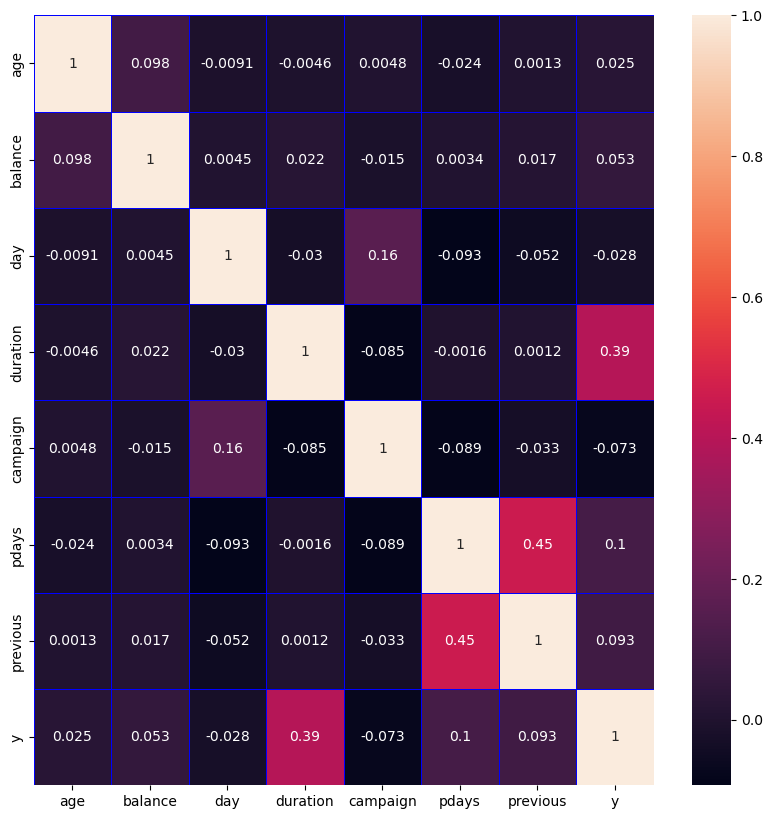

In [4]:
fig , ax = plt.subplots(figsize=(10,10)) # ไม่จำเป็น ทำ PCA
sns.heatmap(df_train.corr(),annot=True,linewidth=0.5,linecolor='blue')
plt.show()

<AxesSubplot:ylabel='y'>

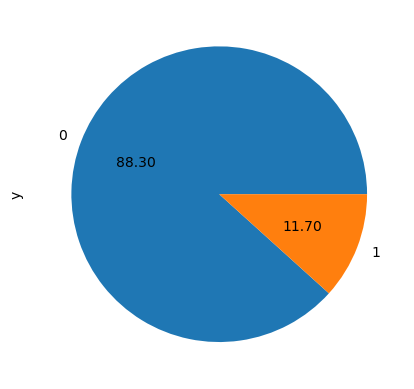

In [5]:
df_train.y.value_counts().plot.pie(autopct='%.2f') #class_weight

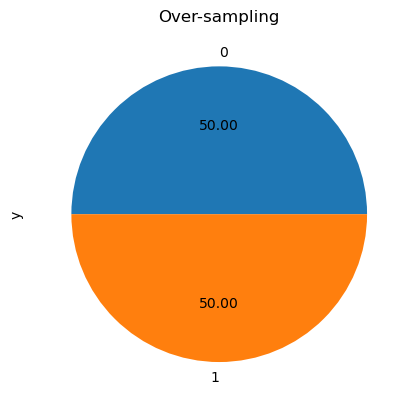

In [6]:
X = df_train.drop(['y'],axis=1)
y = df_train['y']
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='not majority')
X, y = ros.fit_resample(X,y)
ax = y.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title('Over-sampling')

In [7]:
from catboost import CatBoostClassifier , Pool
pool = Pool(data=X, label=y,cat_features=['job','marital','education','default','housing','loan','contact','month','poutcome'])

In [8]:
from sklearn.model_selection import train_test_split
data = train_test_split(X, y, test_size=0.2, random_state=42)
X_train,X_validation,y_train,y_validation = data
train_pool = Pool(data = X_train, label = y_train, cat_features=['job','marital','education','default','housing','loan','contact','month','poutcome'])
validation_pool = Pool(data = X_validation, label = y_validation, cat_features=['job','marital','education','default','housing','loan','contact','month','poutcome'])

In [9]:
model = CatBoostClassifier(iterations = 50 , learning_rate= 0.5, custom_loss = ['AUC','Accuracy'])
model.fit(train_pool, eval_set = validation_pool, verbose=False,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [11]:
model = CatBoostClassifier(iterations=1063, learning_rate = 0.5,random_state=1500)
model.fit(train_pool)

0:	learn: 0.4812090	total: 66.2ms	remaining: 1m 10s
1:	learn: 0.4024738	total: 127ms	remaining: 1m 7s
2:	learn: 0.3781622	total: 181ms	remaining: 1m 4s
3:	learn: 0.3661099	total: 243ms	remaining: 1m 4s
4:	learn: 0.3529157	total: 307ms	remaining: 1m 4s
5:	learn: 0.3461089	total: 362ms	remaining: 1m 3s
6:	learn: 0.3415310	total: 418ms	remaining: 1m 3s
7:	learn: 0.3362266	total: 473ms	remaining: 1m 2s
8:	learn: 0.3335327	total: 544ms	remaining: 1m 3s
9:	learn: 0.3263805	total: 605ms	remaining: 1m 3s
10:	learn: 0.3203006	total: 689ms	remaining: 1m 5s
11:	learn: 0.3171044	total: 784ms	remaining: 1m 8s
12:	learn: 0.3158636	total: 884ms	remaining: 1m 11s
13:	learn: 0.3129538	total: 944ms	remaining: 1m 10s
14:	learn: 0.3099028	total: 1s	remaining: 1m 10s
15:	learn: 0.3077983	total: 1.06s	remaining: 1m 9s
16:	learn: 0.3032352	total: 1.12s	remaining: 1m 9s
17:	learn: 0.3019982	total: 1.18s	remaining: 1m 8s
18:	learn: 0.3003871	total: 1.24s	remaining: 1m 8s
19:	learn: 0.2972719	total: 1.31s	remai

164:	learn: 0.1877229	total: 10.3s	remaining: 56.2s
165:	learn: 0.1872479	total: 10.4s	remaining: 56.1s
166:	learn: 0.1867705	total: 10.4s	remaining: 56s
167:	learn: 0.1864592	total: 10.5s	remaining: 55.9s
168:	learn: 0.1860795	total: 10.5s	remaining: 55.8s
169:	learn: 0.1856049	total: 10.6s	remaining: 55.7s
170:	learn: 0.1849311	total: 10.7s	remaining: 55.6s
171:	learn: 0.1842286	total: 10.7s	remaining: 55.5s
172:	learn: 0.1833252	total: 10.8s	remaining: 55.5s
173:	learn: 0.1829530	total: 10.8s	remaining: 55.4s
174:	learn: 0.1825204	total: 10.9s	remaining: 55.3s
175:	learn: 0.1820445	total: 11s	remaining: 55.2s
176:	learn: 0.1810659	total: 11s	remaining: 55.1s
177:	learn: 0.1801983	total: 11.1s	remaining: 55.1s
178:	learn: 0.1798458	total: 11.1s	remaining: 55s
179:	learn: 0.1793933	total: 11.2s	remaining: 54.9s
180:	learn: 0.1789212	total: 11.2s	remaining: 54.8s
181:	learn: 0.1784621	total: 11.3s	remaining: 54.7s
182:	learn: 0.1780903	total: 11.4s	remaining: 54.7s
183:	learn: 0.177369

324:	learn: 0.1335360	total: 20.2s	remaining: 46s
325:	learn: 0.1334508	total: 20.3s	remaining: 45.9s
326:	learn: 0.1332121	total: 20.4s	remaining: 45.9s
327:	learn: 0.1330114	total: 20.5s	remaining: 45.9s
328:	learn: 0.1327348	total: 20.6s	remaining: 45.9s
329:	learn: 0.1324766	total: 20.6s	remaining: 45.8s
330:	learn: 0.1320650	total: 20.7s	remaining: 45.7s
331:	learn: 0.1317014	total: 20.7s	remaining: 45.7s
332:	learn: 0.1314076	total: 20.8s	remaining: 45.6s
333:	learn: 0.1312006	total: 20.9s	remaining: 45.6s
334:	learn: 0.1307858	total: 21s	remaining: 45.5s
335:	learn: 0.1304327	total: 21s	remaining: 45.5s
336:	learn: 0.1300713	total: 21.1s	remaining: 45.5s
337:	learn: 0.1299554	total: 21.2s	remaining: 45.4s
338:	learn: 0.1296513	total: 21.2s	remaining: 45.4s
339:	learn: 0.1294292	total: 21.3s	remaining: 45.3s
340:	learn: 0.1292232	total: 21.4s	remaining: 45.3s
341:	learn: 0.1288766	total: 21.4s	remaining: 45.2s
342:	learn: 0.1287729	total: 21.5s	remaining: 45.2s
343:	learn: 0.1283

483:	learn: 0.0973835	total: 31.8s	remaining: 38.1s
484:	learn: 0.0971905	total: 31.9s	remaining: 38s
485:	learn: 0.0970438	total: 31.9s	remaining: 37.9s
486:	learn: 0.0969528	total: 32s	remaining: 37.8s
487:	learn: 0.0968594	total: 32.1s	remaining: 37.8s
488:	learn: 0.0968466	total: 32.1s	remaining: 37.7s
489:	learn: 0.0968241	total: 32.2s	remaining: 37.6s
490:	learn: 0.0967038	total: 32.2s	remaining: 37.6s
491:	learn: 0.0964728	total: 32.3s	remaining: 37.5s
492:	learn: 0.0964209	total: 32.4s	remaining: 37.4s
493:	learn: 0.0961991	total: 32.4s	remaining: 37.4s
494:	learn: 0.0960949	total: 32.5s	remaining: 37.3s
495:	learn: 0.0959652	total: 32.6s	remaining: 37.2s
496:	learn: 0.0959433	total: 32.6s	remaining: 37.1s
497:	learn: 0.0956104	total: 32.7s	remaining: 37.1s
498:	learn: 0.0953985	total: 32.7s	remaining: 37s
499:	learn: 0.0951614	total: 32.8s	remaining: 36.9s
500:	learn: 0.0949131	total: 32.9s	remaining: 36.9s
501:	learn: 0.0946714	total: 32.9s	remaining: 36.8s
502:	learn: 0.0945

644:	learn: 0.0738566	total: 42s	remaining: 27.2s
645:	learn: 0.0736770	total: 42.1s	remaining: 27.2s
646:	learn: 0.0735795	total: 42.1s	remaining: 27.1s
647:	learn: 0.0734169	total: 42.2s	remaining: 27s
648:	learn: 0.0732439	total: 42.3s	remaining: 27s
649:	learn: 0.0731392	total: 42.3s	remaining: 26.9s
650:	learn: 0.0728616	total: 42.4s	remaining: 26.8s
651:	learn: 0.0727597	total: 42.4s	remaining: 26.8s
652:	learn: 0.0726869	total: 42.5s	remaining: 26.7s
653:	learn: 0.0726749	total: 42.6s	remaining: 26.6s
654:	learn: 0.0725473	total: 42.6s	remaining: 26.6s
655:	learn: 0.0724188	total: 42.7s	remaining: 26.5s
656:	learn: 0.0722685	total: 42.8s	remaining: 26.4s
657:	learn: 0.0720514	total: 42.8s	remaining: 26.3s
658:	learn: 0.0719487	total: 42.9s	remaining: 26.3s
659:	learn: 0.0719486	total: 42.9s	remaining: 26.2s
660:	learn: 0.0719016	total: 43s	remaining: 26.1s
661:	learn: 0.0718498	total: 43s	remaining: 26.1s
662:	learn: 0.0717494	total: 43.1s	remaining: 26s
663:	learn: 0.0715881	to

804:	learn: 0.0564716	total: 52s	remaining: 16.7s
805:	learn: 0.0564172	total: 52.1s	remaining: 16.6s
806:	learn: 0.0563131	total: 52.1s	remaining: 16.5s
807:	learn: 0.0561913	total: 52.2s	remaining: 16.5s
808:	learn: 0.0561438	total: 52.3s	remaining: 16.4s
809:	learn: 0.0560176	total: 52.3s	remaining: 16.3s
810:	learn: 0.0558940	total: 52.4s	remaining: 16.3s
811:	learn: 0.0558695	total: 52.4s	remaining: 16.2s
812:	learn: 0.0558158	total: 52.5s	remaining: 16.1s
813:	learn: 0.0558157	total: 52.6s	remaining: 16.1s
814:	learn: 0.0558113	total: 52.6s	remaining: 16s
815:	learn: 0.0557313	total: 52.7s	remaining: 16s
816:	learn: 0.0555384	total: 52.8s	remaining: 15.9s
817:	learn: 0.0555383	total: 52.8s	remaining: 15.8s
818:	learn: 0.0554654	total: 52.9s	remaining: 15.8s
819:	learn: 0.0553562	total: 53s	remaining: 15.7s
820:	learn: 0.0552202	total: 53s	remaining: 15.6s
821:	learn: 0.0550726	total: 53.1s	remaining: 15.6s
822:	learn: 0.0550489	total: 53.2s	remaining: 15.5s
823:	learn: 0.0550261	

964:	learn: 0.0438610	total: 1m 2s	remaining: 6.33s
965:	learn: 0.0437821	total: 1m 2s	remaining: 6.27s
966:	learn: 0.0437507	total: 1m 2s	remaining: 6.2s
967:	learn: 0.0437189	total: 1m 2s	remaining: 6.14s
968:	learn: 0.0436570	total: 1m 2s	remaining: 6.08s
969:	learn: 0.0435127	total: 1m 2s	remaining: 6.01s
970:	learn: 0.0434035	total: 1m 2s	remaining: 5.95s
971:	learn: 0.0433594	total: 1m 2s	remaining: 5.88s
972:	learn: 0.0432982	total: 1m 2s	remaining: 5.82s
973:	learn: 0.0432245	total: 1m 3s	remaining: 5.76s
974:	learn: 0.0431883	total: 1m 3s	remaining: 5.69s
975:	learn: 0.0431539	total: 1m 3s	remaining: 5.63s
976:	learn: 0.0430681	total: 1m 3s	remaining: 5.57s
977:	learn: 0.0430291	total: 1m 3s	remaining: 5.5s
978:	learn: 0.0429511	total: 1m 3s	remaining: 5.44s
979:	learn: 0.0428734	total: 1m 3s	remaining: 5.38s
980:	learn: 0.0427978	total: 1m 3s	remaining: 5.31s
981:	learn: 0.0427259	total: 1m 3s	remaining: 5.25s
982:	learn: 0.0426906	total: 1m 3s	remaining: 5.18s
983:	learn: 0.

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score , classification_report ,roc_curve
print(accuracy_score(y_train,model.predict(X_train)))
print(classification_report(y_train,model.predict(X_train)))

0.9942074363992173
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     32014
           1       0.99      1.00      0.99     31861

    accuracy                           0.99     63875
   macro avg       0.99      0.99      0.99     63875
weighted avg       0.99      0.99      0.99     63875



In [14]:
X_test = df_test.drop(['y'],axis=1)
y_test = df_test['y']
print(confusion_matrix(y_test,model.predict(X_test)))
print('Accuracy Score is {}'.format(accuracy_score(y_test,model.predict(X_test))))
print(classification_report(y_test,model.predict(X_test)))

[[3899  101]
 [   0  521]]
Accuracy Score is 0.977659809776598
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      4000
           1       0.84      1.00      0.91       521

    accuracy                           0.98      4521
   macro avg       0.92      0.99      0.95      4521
weighted avg       0.98      0.98      0.98      4521



In [15]:
y_test.value_counts()

0    4000
1     521
Name: y, dtype: int64

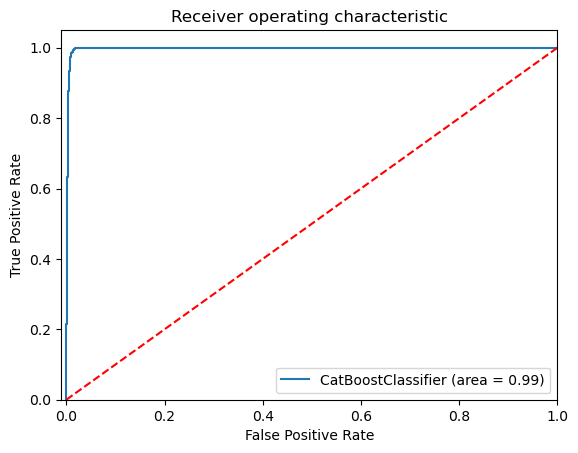

In [17]:
cat_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='CatBoostClassifier (area = %0.2f)' % cat_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [18]:
from sklearn.model_selection import GridSearchCV
params_select  = {}
for i in [0.01, 0.05, 0.1, 0.5]: #learning rates
    for j in [2,4,6,8]: #depth
        for k in [900,1000,1100,1200]: #iteration
            clf = CatBoostClassifier(iterations = k , depth = j, learning_rate = i, cat_features = ['job','marital','education','default','housing','loan','contact','month','poutcome'], verbose = True )
            results = clf.fit(X_train, y_train)
            params_select.update({'iterations = '+str(k)+' depth = '+str(j)+' learning_rate = '+str(i): accuracy_score(y_test,clf.predict(X_test))})
            print(classification_report(y_test,clf.predict(X_test)))

0:	learn: 0.6902285	total: 26.5ms	remaining: 23.8s
1:	learn: 0.6873661	total: 47.1ms	remaining: 21.2s
2:	learn: 0.6845988	total: 70ms	remaining: 20.9s
3:	learn: 0.6817957	total: 94ms	remaining: 21.1s
4:	learn: 0.6790230	total: 118ms	remaining: 21.2s
5:	learn: 0.6763442	total: 143ms	remaining: 21.3s
6:	learn: 0.6736549	total: 165ms	remaining: 21s
7:	learn: 0.6710270	total: 188ms	remaining: 21s
8:	learn: 0.6679221	total: 213ms	remaining: 21.1s
9:	learn: 0.6648716	total: 238ms	remaining: 21.2s
10:	learn: 0.6619210	total: 265ms	remaining: 21.4s
11:	learn: 0.6588443	total: 291ms	remaining: 21.5s
12:	learn: 0.6560577	total: 317ms	remaining: 21.7s
13:	learn: 0.6531015	total: 344ms	remaining: 21.8s
14:	learn: 0.6503032	total: 374ms	remaining: 22.1s
15:	learn: 0.6476210	total: 401ms	remaining: 22.2s
16:	learn: 0.6449946	total: 429ms	remaining: 22.3s
17:	learn: 0.6422880	total: 475ms	remaining: 23.3s
18:	learn: 0.6396570	total: 518ms	remaining: 24s
19:	learn: 0.6371059	total: 559ms	remaining: 24

169:	learn: 0.4624087	total: 4.46s	remaining: 19.2s
170:	learn: 0.4619280	total: 4.49s	remaining: 19.1s
171:	learn: 0.4612618	total: 4.51s	remaining: 19.1s
172:	learn: 0.4607758	total: 4.53s	remaining: 19s
173:	learn: 0.4603046	total: 4.55s	remaining: 19s
174:	learn: 0.4596767	total: 4.57s	remaining: 18.9s
175:	learn: 0.4592150	total: 4.6s	remaining: 18.9s
176:	learn: 0.4586711	total: 4.62s	remaining: 18.9s
177:	learn: 0.4581162	total: 4.64s	remaining: 18.8s
178:	learn: 0.4576698	total: 4.66s	remaining: 18.8s
179:	learn: 0.4572424	total: 4.69s	remaining: 18.7s
180:	learn: 0.4567836	total: 4.71s	remaining: 18.7s
181:	learn: 0.4562458	total: 4.73s	remaining: 18.7s
182:	learn: 0.4556707	total: 4.76s	remaining: 18.6s
183:	learn: 0.4552237	total: 4.78s	remaining: 18.6s
184:	learn: 0.4547994	total: 4.81s	remaining: 18.6s
185:	learn: 0.4543529	total: 4.83s	remaining: 18.5s
186:	learn: 0.4538440	total: 4.85s	remaining: 18.5s
187:	learn: 0.4533994	total: 4.87s	remaining: 18.5s
188:	learn: 0.452

329:	learn: 0.4129059	total: 8.14s	remaining: 14.1s
330:	learn: 0.4127558	total: 8.17s	remaining: 14s
331:	learn: 0.4125617	total: 8.19s	remaining: 14s
332:	learn: 0.4123475	total: 8.21s	remaining: 14s
333:	learn: 0.4121143	total: 8.23s	remaining: 14s
334:	learn: 0.4119678	total: 8.26s	remaining: 13.9s
335:	learn: 0.4117993	total: 8.28s	remaining: 13.9s
336:	learn: 0.4116663	total: 8.3s	remaining: 13.9s
337:	learn: 0.4115393	total: 8.31s	remaining: 13.8s
338:	learn: 0.4113107	total: 8.34s	remaining: 13.8s
339:	learn: 0.4111835	total: 8.36s	remaining: 13.8s
340:	learn: 0.4109875	total: 8.41s	remaining: 13.8s
341:	learn: 0.4108542	total: 8.44s	remaining: 13.8s
342:	learn: 0.4107017	total: 8.46s	remaining: 13.7s
343:	learn: 0.4105807	total: 8.48s	remaining: 13.7s
344:	learn: 0.4104510	total: 8.5s	remaining: 13.7s
345:	learn: 0.4102392	total: 8.52s	remaining: 13.6s
346:	learn: 0.4100936	total: 8.55s	remaining: 13.6s
347:	learn: 0.4099494	total: 8.57s	remaining: 13.6s
348:	learn: 0.4098254	

490:	learn: 0.3926053	total: 11.8s	remaining: 9.87s
491:	learn: 0.3925321	total: 11.9s	remaining: 9.84s
492:	learn: 0.3924595	total: 11.9s	remaining: 9.82s
493:	learn: 0.3923675	total: 11.9s	remaining: 9.8s
494:	learn: 0.3922864	total: 12s	remaining: 9.78s
495:	learn: 0.3921176	total: 12s	remaining: 9.76s
496:	learn: 0.3920480	total: 12s	remaining: 9.74s
497:	learn: 0.3918960	total: 12.1s	remaining: 9.73s
498:	learn: 0.3917244	total: 12.1s	remaining: 9.72s
499:	learn: 0.3916397	total: 12.1s	remaining: 9.71s
500:	learn: 0.3914870	total: 12.2s	remaining: 9.69s
501:	learn: 0.3914196	total: 12.2s	remaining: 9.67s
502:	learn: 0.3912756	total: 12.2s	remaining: 9.65s
503:	learn: 0.3911926	total: 12.3s	remaining: 9.63s
504:	learn: 0.3911174	total: 12.3s	remaining: 9.6s
505:	learn: 0.3910254	total: 12.3s	remaining: 9.57s
506:	learn: 0.3909297	total: 12.3s	remaining: 9.55s
507:	learn: 0.3908420	total: 12.3s	remaining: 9.52s
508:	learn: 0.3907782	total: 12.4s	remaining: 9.49s
509:	learn: 0.390702

651:	learn: 0.3795385	total: 16s	remaining: 6.09s
652:	learn: 0.3794964	total: 16s	remaining: 6.07s
653:	learn: 0.3794440	total: 16.1s	remaining: 6.04s
654:	learn: 0.3794028	total: 16.1s	remaining: 6.03s
655:	learn: 0.3793282	total: 16.2s	remaining: 6.01s
656:	learn: 0.3792836	total: 16.2s	remaining: 5.99s
657:	learn: 0.3792431	total: 16.2s	remaining: 5.96s
658:	learn: 0.3792042	total: 16.2s	remaining: 5.94s
659:	learn: 0.3791616	total: 16.3s	remaining: 5.92s
660:	learn: 0.3791131	total: 16.3s	remaining: 5.9s
661:	learn: 0.3790578	total: 16.4s	remaining: 5.88s
662:	learn: 0.3789676	total: 16.4s	remaining: 5.86s
663:	learn: 0.3789269	total: 16.4s	remaining: 5.83s
664:	learn: 0.3788885	total: 16.4s	remaining: 5.81s
665:	learn: 0.3788394	total: 16.5s	remaining: 5.78s
666:	learn: 0.3787805	total: 16.5s	remaining: 5.76s
667:	learn: 0.3787269	total: 16.5s	remaining: 5.73s
668:	learn: 0.3786872	total: 16.5s	remaining: 5.71s
669:	learn: 0.3786254	total: 16.6s	remaining: 5.68s
670:	learn: 0.378

816:	learn: 0.3715398	total: 20.5s	remaining: 2.08s
817:	learn: 0.3715123	total: 20.5s	remaining: 2.05s
818:	learn: 0.3714485	total: 20.5s	remaining: 2.03s
819:	learn: 0.3714033	total: 20.5s	remaining: 2s
820:	learn: 0.3713711	total: 20.5s	remaining: 1.98s
821:	learn: 0.3713428	total: 20.6s	remaining: 1.95s
822:	learn: 0.3713020	total: 20.6s	remaining: 1.93s
823:	learn: 0.3712715	total: 20.6s	remaining: 1.9s
824:	learn: 0.3712171	total: 20.6s	remaining: 1.88s
825:	learn: 0.3711655	total: 20.7s	remaining: 1.85s
826:	learn: 0.3711014	total: 20.7s	remaining: 1.82s
827:	learn: 0.3710705	total: 20.7s	remaining: 1.8s
828:	learn: 0.3710340	total: 20.7s	remaining: 1.77s
829:	learn: 0.3709688	total: 20.7s	remaining: 1.75s
830:	learn: 0.3709404	total: 20.8s	remaining: 1.72s
831:	learn: 0.3709023	total: 20.8s	remaining: 1.7s
832:	learn: 0.3708681	total: 20.8s	remaining: 1.67s
833:	learn: 0.3708416	total: 20.8s	remaining: 1.65s
834:	learn: 0.3707560	total: 20.9s	remaining: 1.62s
835:	learn: 0.3707

73:	learn: 0.5434967	total: 1.8s	remaining: 22.6s
74:	learn: 0.5424341	total: 1.83s	remaining: 22.5s
75:	learn: 0.5413598	total: 1.85s	remaining: 22.5s
76:	learn: 0.5402208	total: 1.88s	remaining: 22.5s
77:	learn: 0.5391542	total: 1.9s	remaining: 22.5s
78:	learn: 0.5380500	total: 1.93s	remaining: 22.4s
79:	learn: 0.5366071	total: 1.95s	remaining: 22.4s
80:	learn: 0.5351748	total: 1.97s	remaining: 22.4s
81:	learn: 0.5337638	total: 1.99s	remaining: 22.3s
82:	learn: 0.5324019	total: 2.02s	remaining: 22.3s
83:	learn: 0.5310641	total: 2.04s	remaining: 22.2s
84:	learn: 0.5296475	total: 2.06s	remaining: 22.2s
85:	learn: 0.5283399	total: 2.09s	remaining: 22.2s
86:	learn: 0.5271273	total: 2.11s	remaining: 22.1s
87:	learn: 0.5258625	total: 2.13s	remaining: 22.1s
88:	learn: 0.5246018	total: 2.15s	remaining: 22s
89:	learn: 0.5233531	total: 2.17s	remaining: 22s
90:	learn: 0.5220516	total: 2.19s	remaining: 21.9s
91:	learn: 0.5208774	total: 2.21s	remaining: 21.9s
92:	learn: 0.5196986	total: 2.24s	rem

241:	learn: 0.4328815	total: 6.03s	remaining: 18.9s
242:	learn: 0.4326084	total: 6.05s	remaining: 18.9s
243:	learn: 0.4323184	total: 6.08s	remaining: 18.8s
244:	learn: 0.4320262	total: 6.1s	remaining: 18.8s
245:	learn: 0.4317481	total: 6.12s	remaining: 18.8s
246:	learn: 0.4314646	total: 6.14s	remaining: 18.7s
247:	learn: 0.4311860	total: 6.17s	remaining: 18.7s
248:	learn: 0.4308833	total: 6.19s	remaining: 18.7s
249:	learn: 0.4306070	total: 6.22s	remaining: 18.6s
250:	learn: 0.4303761	total: 6.24s	remaining: 18.6s
251:	learn: 0.4301019	total: 6.27s	remaining: 18.6s
252:	learn: 0.4298521	total: 6.3s	remaining: 18.6s
253:	learn: 0.4296157	total: 6.34s	remaining: 18.6s
254:	learn: 0.4292622	total: 6.37s	remaining: 18.6s
255:	learn: 0.4290110	total: 6.4s	remaining: 18.6s
256:	learn: 0.4286808	total: 6.43s	remaining: 18.6s
257:	learn: 0.4283575	total: 6.47s	remaining: 18.6s
258:	learn: 0.4280920	total: 6.49s	remaining: 18.6s
259:	learn: 0.4277913	total: 6.51s	remaining: 18.5s
260:	learn: 0.4

407:	learn: 0.4021800	total: 10s	remaining: 14.6s
408:	learn: 0.4019170	total: 10.1s	remaining: 14.5s
409:	learn: 0.4017941	total: 10.1s	remaining: 14.5s
410:	learn: 0.4017016	total: 10.1s	remaining: 14.5s
411:	learn: 0.4015873	total: 10.1s	remaining: 14.5s
412:	learn: 0.4014685	total: 10.2s	remaining: 14.4s
413:	learn: 0.4012959	total: 10.2s	remaining: 14.4s
414:	learn: 0.4011962	total: 10.2s	remaining: 14.4s
415:	learn: 0.4010723	total: 10.2s	remaining: 14.3s
416:	learn: 0.4009658	total: 10.2s	remaining: 14.3s
417:	learn: 0.4008648	total: 10.3s	remaining: 14.3s
418:	learn: 0.4007587	total: 10.3s	remaining: 14.3s
419:	learn: 0.4006452	total: 10.3s	remaining: 14.2s
420:	learn: 0.4005417	total: 10.3s	remaining: 14.2s
421:	learn: 0.4004434	total: 10.4s	remaining: 14.2s
422:	learn: 0.4003323	total: 10.4s	remaining: 14.2s
423:	learn: 0.4002307	total: 10.4s	remaining: 14.1s
424:	learn: 0.4001234	total: 10.4s	remaining: 14.1s
425:	learn: 0.4000477	total: 10.4s	remaining: 14.1s
426:	learn: 0.

570:	learn: 0.3851817	total: 13.7s	remaining: 10.3s
571:	learn: 0.3850850	total: 13.8s	remaining: 10.3s
572:	learn: 0.3850239	total: 13.8s	remaining: 10.3s
573:	learn: 0.3849666	total: 13.8s	remaining: 10.2s
574:	learn: 0.3849133	total: 13.8s	remaining: 10.2s
575:	learn: 0.3848471	total: 13.8s	remaining: 10.2s
576:	learn: 0.3847976	total: 13.9s	remaining: 10.2s
577:	learn: 0.3847417	total: 13.9s	remaining: 10.1s
578:	learn: 0.3846904	total: 13.9s	remaining: 10.1s
579:	learn: 0.3846352	total: 13.9s	remaining: 10.1s
580:	learn: 0.3845809	total: 14s	remaining: 10.1s
581:	learn: 0.3844887	total: 14s	remaining: 10s
582:	learn: 0.3844259	total: 14s	remaining: 10s
583:	learn: 0.3843636	total: 14s	remaining: 9.99s
584:	learn: 0.3842967	total: 14s	remaining: 9.96s
585:	learn: 0.3842215	total: 14.1s	remaining: 9.94s
586:	learn: 0.3840766	total: 14.1s	remaining: 9.91s
587:	learn: 0.3839654	total: 14.1s	remaining: 9.89s
588:	learn: 0.3838949	total: 14.1s	remaining: 9.86s
589:	learn: 0.3838356	tota

738:	learn: 0.3752100	total: 17.7s	remaining: 6.27s
739:	learn: 0.3750990	total: 17.8s	remaining: 6.24s
740:	learn: 0.3750538	total: 17.8s	remaining: 6.22s
741:	learn: 0.3750068	total: 17.8s	remaining: 6.19s
742:	learn: 0.3749354	total: 17.8s	remaining: 6.17s
743:	learn: 0.3748267	total: 17.9s	remaining: 6.14s
744:	learn: 0.3747936	total: 17.9s	remaining: 6.12s
745:	learn: 0.3747544	total: 17.9s	remaining: 6.09s
746:	learn: 0.3747221	total: 17.9s	remaining: 6.07s
747:	learn: 0.3746753	total: 17.9s	remaining: 6.04s
748:	learn: 0.3746375	total: 18s	remaining: 6.02s
749:	learn: 0.3745889	total: 18s	remaining: 6s
750:	learn: 0.3745520	total: 18s	remaining: 5.97s
751:	learn: 0.3744559	total: 18s	remaining: 5.95s
752:	learn: 0.3744122	total: 18.1s	remaining: 5.92s
753:	learn: 0.3743773	total: 18.1s	remaining: 5.9s
754:	learn: 0.3743418	total: 18.1s	remaining: 5.87s
755:	learn: 0.3742941	total: 18.1s	remaining: 5.85s
756:	learn: 0.3742474	total: 18.1s	remaining: 5.82s
757:	learn: 0.3741864	to

900:	learn: 0.3682249	total: 21.6s	remaining: 2.37s
901:	learn: 0.3680888	total: 21.6s	remaining: 2.35s
902:	learn: 0.3680560	total: 21.6s	remaining: 2.32s
903:	learn: 0.3680336	total: 21.6s	remaining: 2.3s
904:	learn: 0.3680066	total: 21.6s	remaining: 2.27s
905:	learn: 0.3679517	total: 21.7s	remaining: 2.25s
906:	learn: 0.3679170	total: 21.7s	remaining: 2.22s
907:	learn: 0.3678808	total: 21.7s	remaining: 2.2s
908:	learn: 0.3678256	total: 21.7s	remaining: 2.18s
909:	learn: 0.3678041	total: 21.8s	remaining: 2.15s
910:	learn: 0.3677093	total: 21.8s	remaining: 2.13s
911:	learn: 0.3676621	total: 21.8s	remaining: 2.1s
912:	learn: 0.3676331	total: 21.8s	remaining: 2.08s
913:	learn: 0.3676144	total: 21.9s	remaining: 2.06s
914:	learn: 0.3675922	total: 21.9s	remaining: 2.03s
915:	learn: 0.3675251	total: 21.9s	remaining: 2.01s
916:	learn: 0.3674961	total: 21.9s	remaining: 1.98s
917:	learn: 0.3674488	total: 21.9s	remaining: 1.96s
918:	learn: 0.3674237	total: 22s	remaining: 1.94s
919:	learn: 0.367

54:	learn: 0.5688796	total: 1.55s	remaining: 29.5s
55:	learn: 0.5674168	total: 1.58s	remaining: 29.5s
56:	learn: 0.5659438	total: 1.61s	remaining: 29.5s
57:	learn: 0.5641215	total: 1.64s	remaining: 29.5s
58:	learn: 0.5627177	total: 1.68s	remaining: 29.6s
59:	learn: 0.5614017	total: 1.71s	remaining: 29.7s
60:	learn: 0.5600460	total: 1.74s	remaining: 29.7s
61:	learn: 0.5586710	total: 1.78s	remaining: 29.7s
62:	learn: 0.5573572	total: 1.8s	remaining: 29.6s
63:	learn: 0.5560392	total: 1.82s	remaining: 29.5s
64:	learn: 0.5547065	total: 1.84s	remaining: 29.4s
65:	learn: 0.5534613	total: 1.87s	remaining: 29.3s
66:	learn: 0.5521685	total: 1.9s	remaining: 29.3s
67:	learn: 0.5509033	total: 1.93s	remaining: 29.3s
68:	learn: 0.5497107	total: 1.97s	remaining: 29.4s
69:	learn: 0.5485044	total: 2s	remaining: 29.4s
70:	learn: 0.5469652	total: 2.03s	remaining: 29.4s
71:	learn: 0.5457778	total: 2.05s	remaining: 29.3s
72:	learn: 0.5446215	total: 2.08s	remaining: 29.2s
73:	learn: 0.5434967	total: 2.1s	rem

216:	learn: 0.4413773	total: 5.78s	remaining: 23.5s
217:	learn: 0.4410325	total: 5.8s	remaining: 23.5s
218:	learn: 0.4407063	total: 5.83s	remaining: 23.4s
219:	learn: 0.4403762	total: 5.85s	remaining: 23.4s
220:	learn: 0.4400366	total: 5.88s	remaining: 23.4s
221:	learn: 0.4397003	total: 5.9s	remaining: 23.3s
222:	learn: 0.4393646	total: 5.92s	remaining: 23.3s
223:	learn: 0.4390365	total: 5.95s	remaining: 23.3s
224:	learn: 0.4386131	total: 5.97s	remaining: 23.2s
225:	learn: 0.4382117	total: 6s	remaining: 23.2s
226:	learn: 0.4378858	total: 6.02s	remaining: 23.2s
227:	learn: 0.4374756	total: 6.04s	remaining: 23.1s
228:	learn: 0.4371667	total: 6.07s	remaining: 23.1s
229:	learn: 0.4367700	total: 6.09s	remaining: 23.1s
230:	learn: 0.4364383	total: 6.12s	remaining: 23s
231:	learn: 0.4361537	total: 6.15s	remaining: 23s
232:	learn: 0.4357961	total: 6.17s	remaining: 23s
233:	learn: 0.4354121	total: 6.19s	remaining: 22.9s
234:	learn: 0.4350255	total: 6.22s	remaining: 22.9s
235:	learn: 0.4347098	t

379:	learn: 0.4055069	total: 9.81s	remaining: 18.6s
380:	learn: 0.4053983	total: 9.84s	remaining: 18.6s
381:	learn: 0.4052701	total: 9.87s	remaining: 18.5s
382:	learn: 0.4051633	total: 9.89s	remaining: 18.5s
383:	learn: 0.4050661	total: 9.91s	remaining: 18.5s
384:	learn: 0.4048668	total: 9.93s	remaining: 18.4s
385:	learn: 0.4046977	total: 9.95s	remaining: 18.4s
386:	learn: 0.4045959	total: 9.97s	remaining: 18.4s
387:	learn: 0.4044923	total: 9.99s	remaining: 18.3s
388:	learn: 0.4043929	total: 10s	remaining: 18.3s
389:	learn: 0.4042594	total: 10s	remaining: 18.3s
390:	learn: 0.4041643	total: 10.1s	remaining: 18.2s
391:	learn: 0.4040707	total: 10.1s	remaining: 18.2s
392:	learn: 0.4039462	total: 10.1s	remaining: 18.2s
393:	learn: 0.4038410	total: 10.1s	remaining: 18.1s
394:	learn: 0.4037122	total: 10.1s	remaining: 18.1s
395:	learn: 0.4036103	total: 10.2s	remaining: 18.1s
396:	learn: 0.4035278	total: 10.2s	remaining: 18s
397:	learn: 0.4034186	total: 10.2s	remaining: 18s
398:	learn: 0.403241

546:	learn: 0.3872157	total: 13.6s	remaining: 13.7s
547:	learn: 0.3870903	total: 13.6s	remaining: 13.7s
548:	learn: 0.3870142	total: 13.6s	remaining: 13.7s
549:	learn: 0.3869125	total: 13.7s	remaining: 13.7s
550:	learn: 0.3868294	total: 13.7s	remaining: 13.6s
551:	learn: 0.3867676	total: 13.7s	remaining: 13.6s
552:	learn: 0.3867070	total: 13.7s	remaining: 13.6s
553:	learn: 0.3866242	total: 13.7s	remaining: 13.5s
554:	learn: 0.3865504	total: 13.8s	remaining: 13.5s
555:	learn: 0.3864910	total: 13.8s	remaining: 13.5s
556:	learn: 0.3864242	total: 13.8s	remaining: 13.5s
557:	learn: 0.3863048	total: 13.8s	remaining: 13.4s
558:	learn: 0.3862237	total: 13.9s	remaining: 13.4s
559:	learn: 0.3861608	total: 13.9s	remaining: 13.4s
560:	learn: 0.3860895	total: 13.9s	remaining: 13.4s
561:	learn: 0.3859874	total: 13.9s	remaining: 13.3s
562:	learn: 0.3859418	total: 14s	remaining: 13.3s
563:	learn: 0.3858839	total: 14s	remaining: 13.3s
564:	learn: 0.3858194	total: 14s	remaining: 13.3s
565:	learn: 0.3857

710:	learn: 0.3765219	total: 17.6s	remaining: 9.61s
711:	learn: 0.3764886	total: 17.6s	remaining: 9.58s
712:	learn: 0.3764444	total: 17.6s	remaining: 9.55s
713:	learn: 0.3763940	total: 17.6s	remaining: 9.53s
714:	learn: 0.3763563	total: 17.6s	remaining: 9.5s
715:	learn: 0.3763149	total: 17.7s	remaining: 9.47s
716:	learn: 0.3762555	total: 17.7s	remaining: 9.45s
717:	learn: 0.3762105	total: 17.7s	remaining: 9.42s
718:	learn: 0.3761511	total: 17.7s	remaining: 9.39s
719:	learn: 0.3761126	total: 17.7s	remaining: 9.37s
720:	learn: 0.3760740	total: 17.8s	remaining: 9.34s
721:	learn: 0.3760355	total: 17.8s	remaining: 9.31s
722:	learn: 0.3759963	total: 17.8s	remaining: 9.29s
723:	learn: 0.3759501	total: 17.8s	remaining: 9.27s
724:	learn: 0.3759019	total: 17.9s	remaining: 9.24s
725:	learn: 0.3758621	total: 17.9s	remaining: 9.22s
726:	learn: 0.3758146	total: 17.9s	remaining: 9.19s
727:	learn: 0.3757619	total: 17.9s	remaining: 9.17s
728:	learn: 0.3757187	total: 18s	remaining: 9.14s
729:	learn: 0.3

875:	learn: 0.3693060	total: 21.5s	remaining: 5.49s
876:	learn: 0.3692787	total: 21.5s	remaining: 5.46s
877:	learn: 0.3692421	total: 21.5s	remaining: 5.44s
878:	learn: 0.3692120	total: 21.5s	remaining: 5.41s
879:	learn: 0.3691863	total: 21.6s	remaining: 5.39s
880:	learn: 0.3690830	total: 21.6s	remaining: 5.36s
881:	learn: 0.3690416	total: 21.6s	remaining: 5.34s
882:	learn: 0.3690085	total: 21.6s	remaining: 5.31s
883:	learn: 0.3689074	total: 21.6s	remaining: 5.29s
884:	learn: 0.3688813	total: 21.7s	remaining: 5.26s
885:	learn: 0.3688522	total: 21.7s	remaining: 5.24s
886:	learn: 0.3688260	total: 21.7s	remaining: 5.21s
887:	learn: 0.3687944	total: 21.7s	remaining: 5.19s
888:	learn: 0.3686526	total: 21.8s	remaining: 5.16s
889:	learn: 0.3686241	total: 21.8s	remaining: 5.14s
890:	learn: 0.3685992	total: 21.8s	remaining: 5.11s
891:	learn: 0.3685532	total: 21.8s	remaining: 5.09s
892:	learn: 0.3684715	total: 21.8s	remaining: 5.06s
893:	learn: 0.3684506	total: 21.9s	remaining: 5.04s
894:	learn: 

1040:	learn: 0.3629746	total: 25.2s	remaining: 1.43s
1041:	learn: 0.3629438	total: 25.2s	remaining: 1.4s
1042:	learn: 0.3629149	total: 25.3s	remaining: 1.38s
1043:	learn: 0.3628971	total: 25.3s	remaining: 1.35s
1044:	learn: 0.3628751	total: 25.3s	remaining: 1.33s
1045:	learn: 0.3628567	total: 25.3s	remaining: 1.31s
1046:	learn: 0.3628397	total: 25.3s	remaining: 1.28s
1047:	learn: 0.3628217	total: 25.4s	remaining: 1.26s
1048:	learn: 0.3628054	total: 25.4s	remaining: 1.23s
1049:	learn: 0.3627820	total: 25.4s	remaining: 1.21s
1050:	learn: 0.3627472	total: 25.4s	remaining: 1.19s
1051:	learn: 0.3627279	total: 25.5s	remaining: 1.16s
1052:	learn: 0.3627078	total: 25.5s	remaining: 1.14s
1053:	learn: 0.3626739	total: 25.5s	remaining: 1.11s
1054:	learn: 0.3625763	total: 25.5s	remaining: 1.09s
1055:	learn: 0.3625541	total: 25.6s	remaining: 1.06s
1056:	learn: 0.3625301	total: 25.6s	remaining: 1.04s
1057:	learn: 0.3625142	total: 25.6s	remaining: 1.02s
1058:	learn: 0.3624735	total: 25.6s	remaining: 

101:	learn: 0.5097965	total: 2.41s	remaining: 26s
102:	learn: 0.5086940	total: 2.44s	remaining: 26s
103:	learn: 0.5077014	total: 2.46s	remaining: 26s
104:	learn: 0.5067233	total: 2.49s	remaining: 26s
105:	learn: 0.5058170	total: 2.51s	remaining: 25.9s
106:	learn: 0.5048890	total: 2.54s	remaining: 25.9s
107:	learn: 0.5039375	total: 2.56s	remaining: 25.9s
108:	learn: 0.5031363	total: 2.58s	remaining: 25.8s
109:	learn: 0.5022261	total: 2.6s	remaining: 25.8s
110:	learn: 0.5013491	total: 2.63s	remaining: 25.8s
111:	learn: 0.5004637	total: 2.66s	remaining: 25.8s
112:	learn: 0.4996977	total: 2.68s	remaining: 25.8s
113:	learn: 0.4988851	total: 2.71s	remaining: 25.8s
114:	learn: 0.4980316	total: 2.73s	remaining: 25.8s
115:	learn: 0.4972001	total: 2.75s	remaining: 25.7s
116:	learn: 0.4964029	total: 2.77s	remaining: 25.7s
117:	learn: 0.4956702	total: 2.8s	remaining: 25.7s
118:	learn: 0.4948765	total: 2.82s	remaining: 25.6s
119:	learn: 0.4941506	total: 2.85s	remaining: 25.6s
120:	learn: 0.4934501	

260:	learn: 0.4275345	total: 6.1s	remaining: 22s
261:	learn: 0.4273131	total: 6.13s	remaining: 21.9s
262:	learn: 0.4270849	total: 6.15s	remaining: 21.9s
263:	learn: 0.4268312	total: 6.17s	remaining: 21.9s
264:	learn: 0.4265904	total: 6.19s	remaining: 21.8s
265:	learn: 0.4263203	total: 6.21s	remaining: 21.8s
266:	learn: 0.4261128	total: 6.24s	remaining: 21.8s
267:	learn: 0.4258009	total: 6.25s	remaining: 21.8s
268:	learn: 0.4255533	total: 6.28s	remaining: 21.7s
269:	learn: 0.4253228	total: 6.3s	remaining: 21.7s
270:	learn: 0.4250071	total: 6.32s	remaining: 21.7s
271:	learn: 0.4247869	total: 6.35s	remaining: 21.7s
272:	learn: 0.4245658	total: 6.37s	remaining: 21.6s
273:	learn: 0.4243248	total: 6.39s	remaining: 21.6s
274:	learn: 0.4240928	total: 6.41s	remaining: 21.6s
275:	learn: 0.4237848	total: 6.43s	remaining: 21.5s
276:	learn: 0.4235595	total: 6.46s	remaining: 21.5s
277:	learn: 0.4233422	total: 6.49s	remaining: 21.5s
278:	learn: 0.4231351	total: 6.51s	remaining: 21.5s
279:	learn: 0.42

420:	learn: 0.4005417	total: 9.81s	remaining: 18.2s
421:	learn: 0.4004434	total: 9.83s	remaining: 18.1s
422:	learn: 0.4003323	total: 9.86s	remaining: 18.1s
423:	learn: 0.4002307	total: 9.88s	remaining: 18.1s
424:	learn: 0.4001234	total: 9.9s	remaining: 18.1s
425:	learn: 0.4000477	total: 9.92s	remaining: 18s
426:	learn: 0.3999611	total: 9.94s	remaining: 18s
427:	learn: 0.3998553	total: 9.96s	remaining: 18s
428:	learn: 0.3997625	total: 9.98s	remaining: 17.9s
429:	learn: 0.3996464	total: 10s	remaining: 17.9s
430:	learn: 0.3995500	total: 10s	remaining: 17.9s
431:	learn: 0.3993689	total: 10.1s	remaining: 17.9s
432:	learn: 0.3992777	total: 10.1s	remaining: 17.9s
433:	learn: 0.3991602	total: 10.1s	remaining: 17.8s
434:	learn: 0.3990598	total: 10.1s	remaining: 17.8s
435:	learn: 0.3989433	total: 10.1s	remaining: 17.8s
436:	learn: 0.3988524	total: 10.2s	remaining: 17.7s
437:	learn: 0.3987375	total: 10.2s	remaining: 17.7s
438:	learn: 0.3986238	total: 10.2s	remaining: 17.7s
439:	learn: 0.3985203	t

587:	learn: 0.3839654	total: 13.5s	remaining: 14.1s
588:	learn: 0.3838949	total: 13.5s	remaining: 14s
589:	learn: 0.3838356	total: 13.6s	remaining: 14s
590:	learn: 0.3837137	total: 13.6s	remaining: 14s
591:	learn: 0.3836654	total: 13.6s	remaining: 14s
592:	learn: 0.3836125	total: 13.6s	remaining: 13.9s
593:	learn: 0.3835556	total: 13.6s	remaining: 13.9s
594:	learn: 0.3834669	total: 13.7s	remaining: 13.9s
595:	learn: 0.3833574	total: 13.7s	remaining: 13.9s
596:	learn: 0.3832724	total: 13.7s	remaining: 13.9s
597:	learn: 0.3832105	total: 13.8s	remaining: 13.9s
598:	learn: 0.3831644	total: 13.8s	remaining: 13.8s
599:	learn: 0.3831086	total: 13.8s	remaining: 13.8s
600:	learn: 0.3830418	total: 13.8s	remaining: 13.8s
601:	learn: 0.3829479	total: 13.8s	remaining: 13.8s
602:	learn: 0.3828566	total: 13.9s	remaining: 13.7s
603:	learn: 0.3828048	total: 13.9s	remaining: 13.7s
604:	learn: 0.3827495	total: 13.9s	remaining: 13.7s
605:	learn: 0.3827024	total: 13.9s	remaining: 13.6s
606:	learn: 0.382648

751:	learn: 0.3744559	total: 18s	remaining: 10.7s
752:	learn: 0.3744122	total: 18s	remaining: 10.7s
753:	learn: 0.3743773	total: 18.1s	remaining: 10.7s
754:	learn: 0.3743418	total: 18.1s	remaining: 10.7s
755:	learn: 0.3742941	total: 18.2s	remaining: 10.7s
756:	learn: 0.3742474	total: 18.2s	remaining: 10.7s
757:	learn: 0.3741864	total: 18.2s	remaining: 10.6s
758:	learn: 0.3741147	total: 18.3s	remaining: 10.6s
759:	learn: 0.3740709	total: 18.3s	remaining: 10.6s
760:	learn: 0.3740282	total: 18.3s	remaining: 10.6s
761:	learn: 0.3739921	total: 18.4s	remaining: 10.6s
762:	learn: 0.3739543	total: 18.4s	remaining: 10.5s
763:	learn: 0.3739233	total: 18.4s	remaining: 10.5s
764:	learn: 0.3738867	total: 18.5s	remaining: 10.5s
765:	learn: 0.3738264	total: 18.5s	remaining: 10.5s
766:	learn: 0.3737802	total: 18.6s	remaining: 10.5s
767:	learn: 0.3737483	total: 18.6s	remaining: 10.5s
768:	learn: 0.3737109	total: 18.7s	remaining: 10.5s
769:	learn: 0.3736416	total: 18.7s	remaining: 10.4s
770:	learn: 0.37

912:	learn: 0.3676331	total: 22.2s	remaining: 6.97s
913:	learn: 0.3676144	total: 22.2s	remaining: 6.94s
914:	learn: 0.3675922	total: 22.2s	remaining: 6.92s
915:	learn: 0.3675251	total: 22.2s	remaining: 6.89s
916:	learn: 0.3674961	total: 22.3s	remaining: 6.87s
917:	learn: 0.3674488	total: 22.3s	remaining: 6.84s
918:	learn: 0.3674237	total: 22.3s	remaining: 6.82s
919:	learn: 0.3672933	total: 22.3s	remaining: 6.8s
920:	learn: 0.3672682	total: 22.4s	remaining: 6.77s
921:	learn: 0.3672363	total: 22.4s	remaining: 6.75s
922:	learn: 0.3672041	total: 22.4s	remaining: 6.72s
923:	learn: 0.3671760	total: 22.4s	remaining: 6.7s
924:	learn: 0.3670495	total: 22.4s	remaining: 6.67s
925:	learn: 0.3670194	total: 22.5s	remaining: 6.65s
926:	learn: 0.3669883	total: 22.5s	remaining: 6.63s
927:	learn: 0.3669685	total: 22.5s	remaining: 6.6s
928:	learn: 0.3669221	total: 22.5s	remaining: 6.58s
929:	learn: 0.3668917	total: 22.6s	remaining: 6.55s
930:	learn: 0.3668505	total: 22.6s	remaining: 6.53s
931:	learn: 0.3

1074:	learn: 0.3620785	total: 25.9s	remaining: 3.01s
1075:	learn: 0.3620424	total: 25.9s	remaining: 2.98s
1076:	learn: 0.3620226	total: 25.9s	remaining: 2.96s
1077:	learn: 0.3619647	total: 25.9s	remaining: 2.93s
1078:	learn: 0.3619470	total: 26s	remaining: 2.91s
1079:	learn: 0.3619060	total: 26s	remaining: 2.89s
1080:	learn: 0.3618848	total: 26s	remaining: 2.86s
1081:	learn: 0.3618660	total: 26s	remaining: 2.84s
1082:	learn: 0.3618490	total: 26.1s	remaining: 2.82s
1083:	learn: 0.3618254	total: 26.1s	remaining: 2.79s
1084:	learn: 0.3618010	total: 26.1s	remaining: 2.77s
1085:	learn: 0.3617809	total: 26.1s	remaining: 2.74s
1086:	learn: 0.3617590	total: 26.2s	remaining: 2.72s
1087:	learn: 0.3617435	total: 26.2s	remaining: 2.69s
1088:	learn: 0.3617292	total: 26.2s	remaining: 2.67s
1089:	learn: 0.3617118	total: 26.2s	remaining: 2.65s
1090:	learn: 0.3616929	total: 26.2s	remaining: 2.62s
1091:	learn: 0.3616651	total: 26.3s	remaining: 2.6s
1092:	learn: 0.3616425	total: 26.3s	remaining: 2.57s
10

30:	learn: 0.5740066	total: 1.25s	remaining: 35s
31:	learn: 0.5706168	total: 1.28s	remaining: 34.9s
32:	learn: 0.5674780	total: 1.32s	remaining: 34.7s
33:	learn: 0.5645059	total: 1.36s	remaining: 34.7s
34:	learn: 0.5614523	total: 1.4s	remaining: 34.5s
35:	learn: 0.5585638	total: 1.44s	remaining: 34.5s
36:	learn: 0.5558965	total: 1.47s	remaining: 34.4s
37:	learn: 0.5531452	total: 1.51s	remaining: 34.3s
38:	learn: 0.5506511	total: 1.55s	remaining: 34.2s
39:	learn: 0.5482227	total: 1.59s	remaining: 34.1s
40:	learn: 0.5455724	total: 1.62s	remaining: 34s
41:	learn: 0.5428023	total: 1.66s	remaining: 34s
42:	learn: 0.5401833	total: 1.7s	remaining: 34s
43:	learn: 0.5377259	total: 1.74s	remaining: 33.9s
44:	learn: 0.5353663	total: 1.77s	remaining: 33.7s
45:	learn: 0.5329687	total: 1.81s	remaining: 33.6s
46:	learn: 0.5304809	total: 1.85s	remaining: 33.5s
47:	learn: 0.5283045	total: 1.89s	remaining: 33.5s
48:	learn: 0.5260030	total: 1.93s	remaining: 33.4s
49:	learn: 0.5237530	total: 1.97s	remaini

192:	learn: 0.3890330	total: 7.6s	remaining: 27.8s
193:	learn: 0.3886697	total: 7.64s	remaining: 27.8s
194:	learn: 0.3883986	total: 7.68s	remaining: 27.8s
195:	learn: 0.3881126	total: 7.72s	remaining: 27.7s
196:	learn: 0.3878689	total: 7.75s	remaining: 27.7s
197:	learn: 0.3875459	total: 7.79s	remaining: 27.6s
198:	learn: 0.3870781	total: 7.84s	remaining: 27.6s
199:	learn: 0.3868153	total: 7.88s	remaining: 27.6s
200:	learn: 0.3865584	total: 7.92s	remaining: 27.5s
201:	learn: 0.3862985	total: 7.96s	remaining: 27.5s
202:	learn: 0.3859808	total: 8s	remaining: 27.5s
203:	learn: 0.3856704	total: 8.04s	remaining: 27.4s
204:	learn: 0.3854312	total: 8.07s	remaining: 27.4s
205:	learn: 0.3851755	total: 8.12s	remaining: 27.3s
206:	learn: 0.3849129	total: 8.15s	remaining: 27.3s
207:	learn: 0.3846418	total: 8.2s	remaining: 27.3s
208:	learn: 0.3843781	total: 8.23s	remaining: 27.2s
209:	learn: 0.3841557	total: 8.28s	remaining: 27.2s
210:	learn: 0.3838827	total: 8.32s	remaining: 27.2s
211:	learn: 0.383

355:	learn: 0.3599767	total: 14.1s	remaining: 21.6s
356:	learn: 0.3598956	total: 14.2s	remaining: 21.5s
357:	learn: 0.3598012	total: 14.2s	remaining: 21.5s
358:	learn: 0.3596826	total: 14.2s	remaining: 21.5s
359:	learn: 0.3595559	total: 14.3s	remaining: 21.4s
360:	learn: 0.3594598	total: 14.3s	remaining: 21.4s
361:	learn: 0.3592747	total: 14.4s	remaining: 21.4s
362:	learn: 0.3591973	total: 14.4s	remaining: 21.4s
363:	learn: 0.3590463	total: 14.5s	remaining: 21.3s
364:	learn: 0.3589729	total: 14.5s	remaining: 21.3s
365:	learn: 0.3588822	total: 14.6s	remaining: 21.2s
366:	learn: 0.3587618	total: 14.6s	remaining: 21.2s
367:	learn: 0.3585943	total: 14.6s	remaining: 21.2s
368:	learn: 0.3584989	total: 14.7s	remaining: 21.1s
369:	learn: 0.3583800	total: 14.7s	remaining: 21.1s
370:	learn: 0.3583156	total: 14.7s	remaining: 21s
371:	learn: 0.3582080	total: 14.8s	remaining: 21s
372:	learn: 0.3581289	total: 14.8s	remaining: 21s
373:	learn: 0.3579626	total: 14.9s	remaining: 20.9s
374:	learn: 0.3578

515:	learn: 0.3457106	total: 20.5s	remaining: 15.3s
516:	learn: 0.3456761	total: 20.6s	remaining: 15.2s
517:	learn: 0.3455510	total: 20.6s	remaining: 15.2s
518:	learn: 0.3453770	total: 20.7s	remaining: 15.2s
519:	learn: 0.3453279	total: 20.7s	remaining: 15.1s
520:	learn: 0.3452796	total: 20.7s	remaining: 15.1s
521:	learn: 0.3452122	total: 20.8s	remaining: 15s
522:	learn: 0.3451522	total: 20.8s	remaining: 15s
523:	learn: 0.3450911	total: 20.8s	remaining: 15s
524:	learn: 0.3450422	total: 20.9s	remaining: 14.9s
525:	learn: 0.3448389	total: 20.9s	remaining: 14.9s
526:	learn: 0.3447948	total: 21s	remaining: 14.8s
527:	learn: 0.3447205	total: 21s	remaining: 14.8s
528:	learn: 0.3446723	total: 21s	remaining: 14.8s
529:	learn: 0.3445582	total: 21.1s	remaining: 14.7s
530:	learn: 0.3445186	total: 21.1s	remaining: 14.7s
531:	learn: 0.3444524	total: 21.2s	remaining: 14.6s
532:	learn: 0.3443792	total: 21.2s	remaining: 14.6s
533:	learn: 0.3443046	total: 21.2s	remaining: 14.6s
534:	learn: 0.3442764	to

674:	learn: 0.3355791	total: 26.8s	remaining: 8.95s
675:	learn: 0.3355519	total: 26.9s	remaining: 8.91s
676:	learn: 0.3355207	total: 26.9s	remaining: 8.87s
677:	learn: 0.3354655	total: 27s	remaining: 8.83s
678:	learn: 0.3354207	total: 27s	remaining: 8.79s
679:	learn: 0.3353620	total: 27s	remaining: 8.75s
680:	learn: 0.3352911	total: 27.1s	remaining: 8.71s
681:	learn: 0.3352485	total: 27.1s	remaining: 8.67s
682:	learn: 0.3351793	total: 27.2s	remaining: 8.63s
683:	learn: 0.3351260	total: 27.2s	remaining: 8.59s
684:	learn: 0.3350492	total: 27.2s	remaining: 8.55s
685:	learn: 0.3350212	total: 27.3s	remaining: 8.51s
686:	learn: 0.3349859	total: 27.3s	remaining: 8.47s
687:	learn: 0.3349566	total: 27.4s	remaining: 8.43s
688:	learn: 0.3349293	total: 27.4s	remaining: 8.39s
689:	learn: 0.3348737	total: 27.4s	remaining: 8.35s
690:	learn: 0.3348515	total: 27.5s	remaining: 8.31s
691:	learn: 0.3347457	total: 27.5s	remaining: 8.27s
692:	learn: 0.3347039	total: 27.6s	remaining: 8.23s
693:	learn: 0.3346

835:	learn: 0.3272556	total: 33.2s	remaining: 2.54s
836:	learn: 0.3272318	total: 33.2s	remaining: 2.5s
837:	learn: 0.3271699	total: 33.2s	remaining: 2.46s
838:	learn: 0.3271119	total: 33.3s	remaining: 2.42s
839:	learn: 0.3270754	total: 33.3s	remaining: 2.38s
840:	learn: 0.3270223	total: 33.4s	remaining: 2.34s
841:	learn: 0.3269606	total: 33.4s	remaining: 2.3s
842:	learn: 0.3269281	total: 33.4s	remaining: 2.26s
843:	learn: 0.3268408	total: 33.5s	remaining: 2.22s
844:	learn: 0.3267294	total: 33.5s	remaining: 2.18s
845:	learn: 0.3266720	total: 33.6s	remaining: 2.14s
846:	learn: 0.3266268	total: 33.6s	remaining: 2.1s
847:	learn: 0.3266123	total: 33.6s	remaining: 2.06s
848:	learn: 0.3265905	total: 33.7s	remaining: 2.02s
849:	learn: 0.3265587	total: 33.7s	remaining: 1.98s
850:	learn: 0.3265227	total: 33.8s	remaining: 1.94s
851:	learn: 0.3264909	total: 33.8s	remaining: 1.9s
852:	learn: 0.3264649	total: 33.8s	remaining: 1.86s
853:	learn: 0.3264257	total: 33.9s	remaining: 1.82s
854:	learn: 0.32

89:	learn: 0.4560908	total: 3.55s	remaining: 35.9s
90:	learn: 0.4547831	total: 3.59s	remaining: 35.9s
91:	learn: 0.4533706	total: 3.63s	remaining: 35.8s
92:	learn: 0.4520907	total: 3.66s	remaining: 35.7s
93:	learn: 0.4507548	total: 3.7s	remaining: 35.6s
94:	learn: 0.4494243	total: 3.73s	remaining: 35.6s
95:	learn: 0.4481497	total: 3.77s	remaining: 35.5s
96:	learn: 0.4468970	total: 3.8s	remaining: 35.4s
97:	learn: 0.4456861	total: 3.84s	remaining: 35.3s
98:	learn: 0.4444924	total: 3.87s	remaining: 35.2s
99:	learn: 0.4433099	total: 3.91s	remaining: 35.2s
100:	learn: 0.4423999	total: 3.94s	remaining: 35.1s
101:	learn: 0.4412300	total: 3.98s	remaining: 35.1s
102:	learn: 0.4401679	total: 4.03s	remaining: 35.1s
103:	learn: 0.4390286	total: 4.06s	remaining: 35s
104:	learn: 0.4379012	total: 4.1s	remaining: 35s
105:	learn: 0.4369642	total: 4.14s	remaining: 34.9s
106:	learn: 0.4359504	total: 4.18s	remaining: 34.9s
107:	learn: 0.4349196	total: 4.21s	remaining: 34.8s
108:	learn: 0.4338808	total: 4

248:	learn: 0.3753520	total: 9.81s	remaining: 29.6s
249:	learn: 0.3751273	total: 9.85s	remaining: 29.6s
250:	learn: 0.3749701	total: 9.89s	remaining: 29.5s
251:	learn: 0.3747211	total: 9.93s	remaining: 29.5s
252:	learn: 0.3745695	total: 9.97s	remaining: 29.4s
253:	learn: 0.3743853	total: 10s	remaining: 29.4s
254:	learn: 0.3742192	total: 10.1s	remaining: 29.4s
255:	learn: 0.3740431	total: 10.1s	remaining: 29.3s
256:	learn: 0.3738639	total: 10.1s	remaining: 29.3s
257:	learn: 0.3737206	total: 10.2s	remaining: 29.2s
258:	learn: 0.3735361	total: 10.2s	remaining: 29.2s
259:	learn: 0.3733727	total: 10.2s	remaining: 29.1s
260:	learn: 0.3731336	total: 10.3s	remaining: 29.1s
261:	learn: 0.3730138	total: 10.3s	remaining: 29.1s
262:	learn: 0.3728558	total: 10.4s	remaining: 29s
263:	learn: 0.3727019	total: 10.4s	remaining: 29s
264:	learn: 0.3725349	total: 10.4s	remaining: 29s
265:	learn: 0.3723843	total: 10.5s	remaining: 28.9s
266:	learn: 0.3722397	total: 10.5s	remaining: 28.9s
267:	learn: 0.372070

410:	learn: 0.3536740	total: 16.3s	remaining: 23.3s
411:	learn: 0.3535933	total: 16.3s	remaining: 23.3s
412:	learn: 0.3535187	total: 16.3s	remaining: 23.2s
413:	learn: 0.3534231	total: 16.4s	remaining: 23.2s
414:	learn: 0.3532707	total: 16.4s	remaining: 23.1s
415:	learn: 0.3531441	total: 16.5s	remaining: 23.1s
416:	learn: 0.3530660	total: 16.5s	remaining: 23.1s
417:	learn: 0.3529972	total: 16.5s	remaining: 23s
418:	learn: 0.3529288	total: 16.6s	remaining: 23s
419:	learn: 0.3528304	total: 16.6s	remaining: 22.9s
420:	learn: 0.3527439	total: 16.7s	remaining: 22.9s
421:	learn: 0.3526852	total: 16.7s	remaining: 22.9s
422:	learn: 0.3525871	total: 16.7s	remaining: 22.8s
423:	learn: 0.3525063	total: 16.8s	remaining: 22.8s
424:	learn: 0.3524396	total: 16.8s	remaining: 22.7s
425:	learn: 0.3523312	total: 16.8s	remaining: 22.7s
426:	learn: 0.3522426	total: 16.9s	remaining: 22.7s
427:	learn: 0.3521498	total: 16.9s	remaining: 22.6s
428:	learn: 0.3520803	total: 17s	remaining: 22.6s
429:	learn: 0.3520

573:	learn: 0.3415645	total: 22.7s	remaining: 16.8s
574:	learn: 0.3415013	total: 22.7s	remaining: 16.8s
575:	learn: 0.3414549	total: 22.8s	remaining: 16.8s
576:	learn: 0.3414081	total: 22.8s	remaining: 16.7s
577:	learn: 0.3413679	total: 22.9s	remaining: 16.7s
578:	learn: 0.3413309	total: 22.9s	remaining: 16.7s
579:	learn: 0.3412914	total: 23s	remaining: 16.6s
580:	learn: 0.3412281	total: 23s	remaining: 16.6s
581:	learn: 0.3411446	total: 23s	remaining: 16.5s
582:	learn: 0.3410949	total: 23.1s	remaining: 16.5s
583:	learn: 0.3410539	total: 23.1s	remaining: 16.5s
584:	learn: 0.3410004	total: 23.2s	remaining: 16.4s
585:	learn: 0.3409392	total: 23.2s	remaining: 16.4s
586:	learn: 0.3408418	total: 23.2s	remaining: 16.3s
587:	learn: 0.3408035	total: 23.3s	remaining: 16.3s
588:	learn: 0.3407717	total: 23.3s	remaining: 16.3s
589:	learn: 0.3407284	total: 23.3s	remaining: 16.2s
590:	learn: 0.3406926	total: 23.4s	remaining: 16.2s
591:	learn: 0.3406366	total: 23.4s	remaining: 16.1s
592:	learn: 0.3405

737:	learn: 0.3323035	total: 29.1s	remaining: 10.3s
738:	learn: 0.3322739	total: 29.1s	remaining: 10.3s
739:	learn: 0.3322430	total: 29.1s	remaining: 10.2s
740:	learn: 0.3321843	total: 29.2s	remaining: 10.2s
741:	learn: 0.3321655	total: 29.2s	remaining: 10.2s
742:	learn: 0.3321249	total: 29.3s	remaining: 10.1s
743:	learn: 0.3320725	total: 29.3s	remaining: 10.1s
744:	learn: 0.3320061	total: 29.3s	remaining: 10s
745:	learn: 0.3319672	total: 29.4s	remaining: 10s
746:	learn: 0.3319309	total: 29.4s	remaining: 9.96s
747:	learn: 0.3319024	total: 29.4s	remaining: 9.92s
748:	learn: 0.3318730	total: 29.5s	remaining: 9.88s
749:	learn: 0.3318330	total: 29.5s	remaining: 9.84s
750:	learn: 0.3318052	total: 29.6s	remaining: 9.8s
751:	learn: 0.3316384	total: 29.6s	remaining: 9.76s
752:	learn: 0.3316030	total: 29.6s	remaining: 9.72s
753:	learn: 0.3315750	total: 29.7s	remaining: 9.69s
754:	learn: 0.3315295	total: 29.7s	remaining: 9.65s
755:	learn: 0.3314545	total: 29.8s	remaining: 9.61s
756:	learn: 0.331

897:	learn: 0.3242667	total: 35.4s	remaining: 4.01s
898:	learn: 0.3242293	total: 35.4s	remaining: 3.98s
899:	learn: 0.3241772	total: 35.4s	remaining: 3.94s
900:	learn: 0.3241490	total: 35.5s	remaining: 3.9s
901:	learn: 0.3241302	total: 35.5s	remaining: 3.86s
902:	learn: 0.3241130	total: 35.6s	remaining: 3.82s
903:	learn: 0.3240571	total: 35.6s	remaining: 3.78s
904:	learn: 0.3240228	total: 35.6s	remaining: 3.74s
905:	learn: 0.3239507	total: 35.7s	remaining: 3.7s
906:	learn: 0.3238311	total: 35.7s	remaining: 3.66s
907:	learn: 0.3237852	total: 35.7s	remaining: 3.62s
908:	learn: 0.3237204	total: 35.8s	remaining: 3.58s
909:	learn: 0.3236923	total: 35.8s	remaining: 3.54s
910:	learn: 0.3236600	total: 35.9s	remaining: 3.5s
911:	learn: 0.3236327	total: 35.9s	remaining: 3.46s
912:	learn: 0.3235960	total: 35.9s	remaining: 3.42s
913:	learn: 0.3235713	total: 36s	remaining: 3.38s
914:	learn: 0.3235400	total: 36s	remaining: 3.35s
915:	learn: 0.3234906	total: 36.1s	remaining: 3.31s
916:	learn: 0.32346

53:	learn: 0.5154982	total: 2.13s	remaining: 41.3s
54:	learn: 0.5137415	total: 2.17s	remaining: 41.1s
55:	learn: 0.5119264	total: 2.2s	remaining: 41.1s
56:	learn: 0.5102191	total: 2.24s	remaining: 41s
57:	learn: 0.5082402	total: 2.28s	remaining: 40.9s
58:	learn: 0.5063542	total: 2.31s	remaining: 40.9s
59:	learn: 0.5043136	total: 2.35s	remaining: 40.8s
60:	learn: 0.5023873	total: 2.39s	remaining: 40.7s
61:	learn: 0.5004086	total: 2.43s	remaining: 40.7s
62:	learn: 0.4985531	total: 2.48s	remaining: 40.7s
63:	learn: 0.4968207	total: 2.51s	remaining: 40.7s
64:	learn: 0.4951503	total: 2.55s	remaining: 40.6s
65:	learn: 0.4934919	total: 2.59s	remaining: 40.6s
66:	learn: 0.4916899	total: 2.63s	remaining: 40.5s
67:	learn: 0.4902019	total: 2.67s	remaining: 40.5s
68:	learn: 0.4887180	total: 2.71s	remaining: 40.5s
69:	learn: 0.4872500	total: 2.74s	remaining: 40.4s
70:	learn: 0.4856292	total: 2.78s	remaining: 40.3s
71:	learn: 0.4839425	total: 2.81s	remaining: 40.2s
72:	learn: 0.4821873	total: 2.85s	

217:	learn: 0.3820848	total: 8.47s	remaining: 34.3s
218:	learn: 0.3818382	total: 8.51s	remaining: 34.2s
219:	learn: 0.3816056	total: 8.55s	remaining: 34.2s
220:	learn: 0.3814094	total: 8.59s	remaining: 34.2s
221:	learn: 0.3811111	total: 8.63s	remaining: 34.1s
222:	learn: 0.3808950	total: 8.67s	remaining: 34.1s
223:	learn: 0.3807026	total: 8.71s	remaining: 34s
224:	learn: 0.3804592	total: 8.75s	remaining: 34s
225:	learn: 0.3801585	total: 8.79s	remaining: 34s
226:	learn: 0.3798753	total: 8.83s	remaining: 34s
227:	learn: 0.3796720	total: 8.87s	remaining: 33.9s
228:	learn: 0.3794561	total: 8.9s	remaining: 33.9s
229:	learn: 0.3792361	total: 8.95s	remaining: 33.8s
230:	learn: 0.3790021	total: 8.99s	remaining: 33.8s
231:	learn: 0.3787961	total: 9.03s	remaining: 33.8s
232:	learn: 0.3785989	total: 9.07s	remaining: 33.8s
233:	learn: 0.3783958	total: 9.11s	remaining: 33.7s
234:	learn: 0.3782032	total: 9.15s	remaining: 33.7s
235:	learn: 0.3780017	total: 9.18s	remaining: 33.6s
236:	learn: 0.3776669

380:	learn: 0.3572699	total: 14.9s	remaining: 28.2s
381:	learn: 0.3571117	total: 15s	remaining: 28.1s
382:	learn: 0.3570252	total: 15s	remaining: 28.1s
383:	learn: 0.3568286	total: 15.1s	remaining: 28.1s
384:	learn: 0.3567394	total: 15.1s	remaining: 28s
385:	learn: 0.3566559	total: 15.1s	remaining: 28s
386:	learn: 0.3565461	total: 15.2s	remaining: 28s
387:	learn: 0.3564666	total: 15.2s	remaining: 27.9s
388:	learn: 0.3563850	total: 15.2s	remaining: 27.9s
389:	learn: 0.3562995	total: 15.3s	remaining: 27.8s
390:	learn: 0.3561651	total: 15.3s	remaining: 27.8s
391:	learn: 0.3560863	total: 15.4s	remaining: 27.7s
392:	learn: 0.3560050	total: 15.4s	remaining: 27.7s
393:	learn: 0.3558807	total: 15.4s	remaining: 27.7s
394:	learn: 0.3557864	total: 15.5s	remaining: 27.6s
395:	learn: 0.3556105	total: 15.5s	remaining: 27.6s
396:	learn: 0.3555037	total: 15.6s	remaining: 27.5s
397:	learn: 0.3553462	total: 15.6s	remaining: 27.5s
398:	learn: 0.3552669	total: 15.6s	remaining: 27.5s
399:	learn: 0.3551939	

543:	learn: 0.3436337	total: 21.4s	remaining: 21.9s
544:	learn: 0.3435860	total: 21.4s	remaining: 21.8s
545:	learn: 0.3434949	total: 21.5s	remaining: 21.8s
546:	learn: 0.3434263	total: 21.5s	remaining: 21.8s
547:	learn: 0.3433813	total: 21.6s	remaining: 21.7s
548:	learn: 0.3433465	total: 21.6s	remaining: 21.7s
549:	learn: 0.3432589	total: 21.6s	remaining: 21.6s
550:	learn: 0.3431720	total: 21.7s	remaining: 21.6s
551:	learn: 0.3430749	total: 21.7s	remaining: 21.6s
552:	learn: 0.3430451	total: 21.8s	remaining: 21.5s
553:	learn: 0.3429885	total: 21.8s	remaining: 21.5s
554:	learn: 0.3428613	total: 21.8s	remaining: 21.5s
555:	learn: 0.3427791	total: 21.9s	remaining: 21.4s
556:	learn: 0.3427438	total: 21.9s	remaining: 21.4s
557:	learn: 0.3426628	total: 22s	remaining: 21.3s
558:	learn: 0.3426235	total: 22s	remaining: 21.3s
559:	learn: 0.3425838	total: 22s	remaining: 21.3s
560:	learn: 0.3425451	total: 22.1s	remaining: 21.2s
561:	learn: 0.3425002	total: 22.1s	remaining: 21.2s
562:	learn: 0.3424

703:	learn: 0.3340711	total: 27.7s	remaining: 15.6s
704:	learn: 0.3339921	total: 27.7s	remaining: 15.5s
705:	learn: 0.3339393	total: 27.7s	remaining: 15.5s
706:	learn: 0.3339137	total: 27.8s	remaining: 15.4s
707:	learn: 0.3338893	total: 27.8s	remaining: 15.4s
708:	learn: 0.3338494	total: 27.8s	remaining: 15.3s
709:	learn: 0.3336581	total: 27.9s	remaining: 15.3s
710:	learn: 0.3336398	total: 27.9s	remaining: 15.3s
711:	learn: 0.3336109	total: 28s	remaining: 15.2s
712:	learn: 0.3335768	total: 28s	remaining: 15.2s
713:	learn: 0.3335321	total: 28s	remaining: 15.1s
714:	learn: 0.3334845	total: 28.1s	remaining: 15.1s
715:	learn: 0.3334428	total: 28.1s	remaining: 15.1s
716:	learn: 0.3333701	total: 28.1s	remaining: 15s
717:	learn: 0.3333443	total: 28.2s	remaining: 15s
718:	learn: 0.3333175	total: 28.2s	remaining: 15s
719:	learn: 0.3332587	total: 28.3s	remaining: 14.9s
720:	learn: 0.3331965	total: 28.3s	remaining: 14.9s
721:	learn: 0.3331678	total: 28.3s	remaining: 14.8s
722:	learn: 0.3331402	to

863:	learn: 0.3259272	total: 33.9s	remaining: 9.27s
864:	learn: 0.3259068	total: 34s	remaining: 9.22s
865:	learn: 0.3258805	total: 34s	remaining: 9.19s
866:	learn: 0.3258463	total: 34s	remaining: 9.15s
867:	learn: 0.3257931	total: 34.1s	remaining: 9.11s
868:	learn: 0.3257711	total: 34.1s	remaining: 9.07s
869:	learn: 0.3257524	total: 34.2s	remaining: 9.03s
870:	learn: 0.3257238	total: 34.2s	remaining: 8.99s
871:	learn: 0.3256810	total: 34.2s	remaining: 8.95s
872:	learn: 0.3256294	total: 34.3s	remaining: 8.91s
873:	learn: 0.3255978	total: 34.3s	remaining: 8.88s
874:	learn: 0.3255274	total: 34.4s	remaining: 8.84s
875:	learn: 0.3255054	total: 34.4s	remaining: 8.8s
876:	learn: 0.3254857	total: 34.5s	remaining: 8.76s
877:	learn: 0.3254508	total: 34.5s	remaining: 8.72s
878:	learn: 0.3253247	total: 34.5s	remaining: 8.68s
879:	learn: 0.3253076	total: 34.6s	remaining: 8.64s
880:	learn: 0.3252510	total: 34.6s	remaining: 8.61s
881:	learn: 0.3252268	total: 34.7s	remaining: 8.56s
882:	learn: 0.32520

1026:	learn: 0.3189999	total: 40.4s	remaining: 2.87s
1027:	learn: 0.3189758	total: 40.5s	remaining: 2.83s
1028:	learn: 0.3189583	total: 40.5s	remaining: 2.79s
1029:	learn: 0.3189031	total: 40.5s	remaining: 2.75s
1030:	learn: 0.3188470	total: 40.6s	remaining: 2.71s
1031:	learn: 0.3188169	total: 40.6s	remaining: 2.68s
1032:	learn: 0.3187887	total: 40.7s	remaining: 2.64s
1033:	learn: 0.3187103	total: 40.7s	remaining: 2.6s
1034:	learn: 0.3186889	total: 40.7s	remaining: 2.56s
1035:	learn: 0.3186672	total: 40.8s	remaining: 2.52s
1036:	learn: 0.3186384	total: 40.8s	remaining: 2.48s
1037:	learn: 0.3186107	total: 40.9s	remaining: 2.44s
1038:	learn: 0.3185729	total: 40.9s	remaining: 2.4s
1039:	learn: 0.3185567	total: 40.9s	remaining: 2.36s
1040:	learn: 0.3185147	total: 41s	remaining: 2.32s
1041:	learn: 0.3184983	total: 41s	remaining: 2.28s
1042:	learn: 0.3184661	total: 41.1s	remaining: 2.24s
1043:	learn: 0.3184413	total: 41.1s	remaining: 2.2s
1044:	learn: 0.3184006	total: 41.1s	remaining: 2.17s


81:	learn: 0.4678428	total: 3.18s	remaining: 43.3s
82:	learn: 0.4662200	total: 3.22s	remaining: 43.3s
83:	learn: 0.4647324	total: 3.26s	remaining: 43.3s
84:	learn: 0.4633169	total: 3.3s	remaining: 43.2s
85:	learn: 0.4617992	total: 3.33s	remaining: 43.1s
86:	learn: 0.4603086	total: 3.37s	remaining: 43.1s
87:	learn: 0.4589083	total: 3.4s	remaining: 43s
88:	learn: 0.4574313	total: 3.44s	remaining: 43s
89:	learn: 0.4560908	total: 3.48s	remaining: 42.9s
90:	learn: 0.4547831	total: 3.51s	remaining: 42.8s
91:	learn: 0.4533706	total: 3.55s	remaining: 42.8s
92:	learn: 0.4520907	total: 3.59s	remaining: 42.7s
93:	learn: 0.4507548	total: 3.62s	remaining: 42.6s
94:	learn: 0.4494243	total: 3.66s	remaining: 42.6s
95:	learn: 0.4481497	total: 3.69s	remaining: 42.4s
96:	learn: 0.4468970	total: 3.72s	remaining: 42.4s
97:	learn: 0.4456861	total: 3.77s	remaining: 42.3s
98:	learn: 0.4444924	total: 3.8s	remaining: 42.3s
99:	learn: 0.4433099	total: 3.84s	remaining: 42.2s
100:	learn: 0.4423999	total: 3.88s	rem

245:	learn: 0.3759872	total: 9.85s	remaining: 38.2s
246:	learn: 0.3756970	total: 9.9s	remaining: 38.2s
247:	learn: 0.3755287	total: 9.94s	remaining: 38.1s
248:	learn: 0.3753520	total: 9.98s	remaining: 38.1s
249:	learn: 0.3751273	total: 10s	remaining: 38.1s
250:	learn: 0.3749701	total: 10.1s	remaining: 38.1s
251:	learn: 0.3747211	total: 10.1s	remaining: 38s
252:	learn: 0.3745695	total: 10.1s	remaining: 38s
253:	learn: 0.3743853	total: 10.2s	remaining: 37.9s
254:	learn: 0.3742192	total: 10.2s	remaining: 37.9s
255:	learn: 0.3740431	total: 10.3s	remaining: 37.8s
256:	learn: 0.3738639	total: 10.3s	remaining: 37.8s
257:	learn: 0.3737206	total: 10.3s	remaining: 37.8s
258:	learn: 0.3735361	total: 10.4s	remaining: 37.7s
259:	learn: 0.3733727	total: 10.4s	remaining: 37.7s
260:	learn: 0.3731336	total: 10.5s	remaining: 37.6s
261:	learn: 0.3730138	total: 10.5s	remaining: 37.6s
262:	learn: 0.3728558	total: 10.5s	remaining: 37.6s
263:	learn: 0.3727019	total: 10.6s	remaining: 37.6s
264:	learn: 0.37253

407:	learn: 0.3539581	total: 16.3s	remaining: 31.7s
408:	learn: 0.3538642	total: 16.4s	remaining: 31.6s
409:	learn: 0.3537807	total: 16.4s	remaining: 31.6s
410:	learn: 0.3536740	total: 16.4s	remaining: 31.6s
411:	learn: 0.3535933	total: 16.5s	remaining: 31.5s
412:	learn: 0.3535187	total: 16.5s	remaining: 31.5s
413:	learn: 0.3534231	total: 16.6s	remaining: 31.4s
414:	learn: 0.3532707	total: 16.6s	remaining: 31.4s
415:	learn: 0.3531441	total: 16.6s	remaining: 31.3s
416:	learn: 0.3530660	total: 16.7s	remaining: 31.3s
417:	learn: 0.3529972	total: 16.7s	remaining: 31.3s
418:	learn: 0.3529288	total: 16.7s	remaining: 31.2s
419:	learn: 0.3528304	total: 16.8s	remaining: 31.2s
420:	learn: 0.3527439	total: 16.8s	remaining: 31.1s
421:	learn: 0.3526852	total: 16.9s	remaining: 31.1s
422:	learn: 0.3525871	total: 16.9s	remaining: 31s
423:	learn: 0.3525063	total: 16.9s	remaining: 31s
424:	learn: 0.3524396	total: 17s	remaining: 31s
425:	learn: 0.3523312	total: 17s	remaining: 30.9s
426:	learn: 0.3522426	

567:	learn: 0.3421378	total: 22.7s	remaining: 25.3s
568:	learn: 0.3419996	total: 22.7s	remaining: 25.2s
569:	learn: 0.3419504	total: 22.8s	remaining: 25.2s
570:	learn: 0.3417582	total: 22.8s	remaining: 25.1s
571:	learn: 0.3417186	total: 22.9s	remaining: 25.1s
572:	learn: 0.3415983	total: 22.9s	remaining: 25.1s
573:	learn: 0.3415645	total: 22.9s	remaining: 25s
574:	learn: 0.3415013	total: 23s	remaining: 25s
575:	learn: 0.3414549	total: 23s	remaining: 24.9s
576:	learn: 0.3414081	total: 23.1s	remaining: 24.9s
577:	learn: 0.3413679	total: 23.1s	remaining: 24.9s
578:	learn: 0.3413309	total: 23.1s	remaining: 24.8s
579:	learn: 0.3412914	total: 23.2s	remaining: 24.8s
580:	learn: 0.3412281	total: 23.2s	remaining: 24.7s
581:	learn: 0.3411446	total: 23.3s	remaining: 24.7s
582:	learn: 0.3410949	total: 23.3s	remaining: 24.7s
583:	learn: 0.3410539	total: 23.3s	remaining: 24.6s
584:	learn: 0.3410004	total: 23.4s	remaining: 24.6s
585:	learn: 0.3409392	total: 23.5s	remaining: 24.6s
586:	learn: 0.340841

728:	learn: 0.3327475	total: 29s	remaining: 18.7s
729:	learn: 0.3327007	total: 29s	remaining: 18.7s
730:	learn: 0.3326784	total: 29.1s	remaining: 18.6s
731:	learn: 0.3326481	total: 29.1s	remaining: 18.6s
732:	learn: 0.3325625	total: 29.1s	remaining: 18.6s
733:	learn: 0.3325059	total: 29.2s	remaining: 18.5s
734:	learn: 0.3324428	total: 29.2s	remaining: 18.5s
735:	learn: 0.3324021	total: 29.3s	remaining: 18.5s
736:	learn: 0.3323255	total: 29.3s	remaining: 18.4s
737:	learn: 0.3323035	total: 29.4s	remaining: 18.4s
738:	learn: 0.3322739	total: 29.4s	remaining: 18.3s
739:	learn: 0.3322430	total: 29.4s	remaining: 18.3s
740:	learn: 0.3321843	total: 29.5s	remaining: 18.3s
741:	learn: 0.3321655	total: 29.5s	remaining: 18.2s
742:	learn: 0.3321249	total: 29.6s	remaining: 18.2s
743:	learn: 0.3320725	total: 29.6s	remaining: 18.1s
744:	learn: 0.3320061	total: 29.6s	remaining: 18.1s
745:	learn: 0.3319672	total: 29.7s	remaining: 18.1s
746:	learn: 0.3319309	total: 29.7s	remaining: 18s
747:	learn: 0.3319

890:	learn: 0.3247104	total: 35.5s	remaining: 12.3s
891:	learn: 0.3246491	total: 35.5s	remaining: 12.3s
892:	learn: 0.3245984	total: 35.5s	remaining: 12.2s
893:	learn: 0.3245626	total: 35.6s	remaining: 12.2s
894:	learn: 0.3244828	total: 35.6s	remaining: 12.1s
895:	learn: 0.3244207	total: 35.7s	remaining: 12.1s
896:	learn: 0.3243566	total: 35.7s	remaining: 12.1s
897:	learn: 0.3242667	total: 35.7s	remaining: 12s
898:	learn: 0.3242293	total: 35.8s	remaining: 12s
899:	learn: 0.3241772	total: 35.8s	remaining: 11.9s
900:	learn: 0.3241490	total: 35.9s	remaining: 11.9s
901:	learn: 0.3241302	total: 35.9s	remaining: 11.9s
902:	learn: 0.3241130	total: 35.9s	remaining: 11.8s
903:	learn: 0.3240571	total: 36s	remaining: 11.8s
904:	learn: 0.3240228	total: 36s	remaining: 11.7s
905:	learn: 0.3239507	total: 36.1s	remaining: 11.7s
906:	learn: 0.3238311	total: 36.1s	remaining: 11.7s
907:	learn: 0.3237852	total: 36.1s	remaining: 11.6s
908:	learn: 0.3237204	total: 36.2s	remaining: 11.6s
909:	learn: 0.323692

1052:	learn: 0.3180361	total: 42s	remaining: 5.86s
1053:	learn: 0.3180114	total: 42s	remaining: 5.82s
1054:	learn: 0.3179167	total: 42.1s	remaining: 5.78s
1055:	learn: 0.3178778	total: 42.1s	remaining: 5.74s
1056:	learn: 0.3178294	total: 42.1s	remaining: 5.7s
1057:	learn: 0.3177276	total: 42.2s	remaining: 5.66s
1058:	learn: 0.3177102	total: 42.2s	remaining: 5.62s
1059:	learn: 0.3176490	total: 42.2s	remaining: 5.58s
1060:	learn: 0.3176156	total: 42.3s	remaining: 5.54s
1061:	learn: 0.3175880	total: 42.3s	remaining: 5.5s
1062:	learn: 0.3175570	total: 42.4s	remaining: 5.46s
1063:	learn: 0.3175397	total: 42.4s	remaining: 5.42s
1064:	learn: 0.3175158	total: 42.4s	remaining: 5.38s
1065:	learn: 0.3174274	total: 42.5s	remaining: 5.34s
1066:	learn: 0.3174072	total: 42.5s	remaining: 5.3s
1067:	learn: 0.3173897	total: 42.6s	remaining: 5.26s
1068:	learn: 0.3173534	total: 42.6s	remaining: 5.22s
1069:	learn: 0.3173284	total: 42.7s	remaining: 5.18s
1070:	learn: 0.3172655	total: 42.7s	remaining: 5.14s


4:	learn: 0.6603005	total: 297ms	remaining: 53.2s
5:	learn: 0.6540174	total: 350ms	remaining: 52.2s
6:	learn: 0.6478618	total: 405ms	remaining: 51.7s
7:	learn: 0.6419560	total: 465ms	remaining: 51.8s
8:	learn: 0.6362067	total: 514ms	remaining: 50.9s
9:	learn: 0.6304261	total: 565ms	remaining: 50.3s
10:	learn: 0.6248474	total: 620ms	remaining: 50.1s
11:	learn: 0.6196629	total: 673ms	remaining: 49.8s
12:	learn: 0.6144936	total: 733ms	remaining: 50s
13:	learn: 0.6089873	total: 789ms	remaining: 49.9s
14:	learn: 0.6040492	total: 844ms	remaining: 49.8s
15:	learn: 0.5991522	total: 897ms	remaining: 49.5s
16:	learn: 0.5944458	total: 948ms	remaining: 49.2s
17:	learn: 0.5898867	total: 1.01s	remaining: 49.3s
18:	learn: 0.5853931	total: 1.06s	remaining: 49.4s
19:	learn: 0.5810049	total: 1.12s	remaining: 49.4s
20:	learn: 0.5766045	total: 1.18s	remaining: 49.5s
21:	learn: 0.5725832	total: 1.25s	remaining: 49.8s
22:	learn: 0.5682992	total: 1.31s	remaining: 49.9s
23:	learn: 0.5641564	total: 1.38s	remai

165:	learn: 0.3706973	total: 9.54s	remaining: 42.2s
166:	learn: 0.3703820	total: 9.6s	remaining: 42.1s
167:	learn: 0.3698705	total: 9.66s	remaining: 42.1s
168:	learn: 0.3695489	total: 9.72s	remaining: 42s
169:	learn: 0.3691946	total: 9.77s	remaining: 42s
170:	learn: 0.3688709	total: 9.83s	remaining: 41.9s
171:	learn: 0.3683407	total: 9.89s	remaining: 41.9s
172:	learn: 0.3679763	total: 9.95s	remaining: 41.8s
173:	learn: 0.3675208	total: 10s	remaining: 41.8s
174:	learn: 0.3670710	total: 10.1s	remaining: 41.7s
175:	learn: 0.3667029	total: 10.1s	remaining: 41.6s
176:	learn: 0.3664277	total: 10.2s	remaining: 41.6s
177:	learn: 0.3660072	total: 10.2s	remaining: 41.5s
178:	learn: 0.3657048	total: 10.3s	remaining: 41.5s
179:	learn: 0.3653702	total: 10.4s	remaining: 41.4s
180:	learn: 0.3650535	total: 10.4s	remaining: 41.4s
181:	learn: 0.3647643	total: 10.5s	remaining: 41.3s
182:	learn: 0.3644827	total: 10.5s	remaining: 41.2s
183:	learn: 0.3641860	total: 10.6s	remaining: 41.2s
184:	learn: 0.36391

325:	learn: 0.3367712	total: 18.8s	remaining: 33s
326:	learn: 0.3366420	total: 18.8s	remaining: 33s
327:	learn: 0.3364683	total: 18.9s	remaining: 32.9s
328:	learn: 0.3362372	total: 18.9s	remaining: 32.9s
329:	learn: 0.3361395	total: 19s	remaining: 32.8s
330:	learn: 0.3360338	total: 19.1s	remaining: 32.7s
331:	learn: 0.3359279	total: 19.1s	remaining: 32.7s
332:	learn: 0.3358146	total: 19.2s	remaining: 32.6s
333:	learn: 0.3356836	total: 19.2s	remaining: 32.6s
334:	learn: 0.3355412	total: 19.3s	remaining: 32.5s
335:	learn: 0.3354263	total: 19.3s	remaining: 32.5s
336:	learn: 0.3352876	total: 19.4s	remaining: 32.4s
337:	learn: 0.3350472	total: 19.4s	remaining: 32.3s
338:	learn: 0.3349140	total: 19.5s	remaining: 32.3s
339:	learn: 0.3348410	total: 19.6s	remaining: 32.2s
340:	learn: 0.3347492	total: 19.6s	remaining: 32.2s
341:	learn: 0.3346173	total: 19.7s	remaining: 32.1s
342:	learn: 0.3345211	total: 19.7s	remaining: 32.1s
343:	learn: 0.3344298	total: 19.8s	remaining: 32s
344:	learn: 0.334350

485:	learn: 0.3193947	total: 27.9s	remaining: 23.8s
486:	learn: 0.3192242	total: 28s	remaining: 23.7s
487:	learn: 0.3191201	total: 28s	remaining: 23.6s
488:	learn: 0.3190416	total: 28.1s	remaining: 23.6s
489:	learn: 0.3189668	total: 28.1s	remaining: 23.5s
490:	learn: 0.3188497	total: 28.2s	remaining: 23.5s
491:	learn: 0.3187748	total: 28.2s	remaining: 23.4s
492:	learn: 0.3186969	total: 28.3s	remaining: 23.3s
493:	learn: 0.3186506	total: 28.3s	remaining: 23.3s
494:	learn: 0.3185693	total: 28.4s	remaining: 23.2s
495:	learn: 0.3185304	total: 28.5s	remaining: 23.2s
496:	learn: 0.3184312	total: 28.5s	remaining: 23.1s
497:	learn: 0.3183040	total: 28.6s	remaining: 23.1s
498:	learn: 0.3182084	total: 28.6s	remaining: 23s
499:	learn: 0.3181395	total: 28.7s	remaining: 23s
500:	learn: 0.3180784	total: 28.7s	remaining: 22.9s
501:	learn: 0.3178838	total: 28.8s	remaining: 22.8s
502:	learn: 0.3178200	total: 28.9s	remaining: 22.8s
503:	learn: 0.3177116	total: 28.9s	remaining: 22.7s
504:	learn: 0.317671

645:	learn: 0.3071735	total: 37s	remaining: 14.5s
646:	learn: 0.3071267	total: 37s	remaining: 14.5s
647:	learn: 0.3070953	total: 37.1s	remaining: 14.4s
648:	learn: 0.3070619	total: 37.1s	remaining: 14.4s
649:	learn: 0.3069962	total: 37.2s	remaining: 14.3s
650:	learn: 0.3068841	total: 37.3s	remaining: 14.3s
651:	learn: 0.3067753	total: 37.3s	remaining: 14.2s
652:	learn: 0.3067267	total: 37.4s	remaining: 14.1s
653:	learn: 0.3065971	total: 37.4s	remaining: 14.1s
654:	learn: 0.3065385	total: 37.5s	remaining: 14s
655:	learn: 0.3064618	total: 37.5s	remaining: 14s
656:	learn: 0.3063907	total: 37.6s	remaining: 13.9s
657:	learn: 0.3063393	total: 37.7s	remaining: 13.8s
658:	learn: 0.3062029	total: 37.7s	remaining: 13.8s
659:	learn: 0.3061012	total: 37.8s	remaining: 13.7s
660:	learn: 0.3060570	total: 37.8s	remaining: 13.7s
661:	learn: 0.3060146	total: 37.9s	remaining: 13.6s
662:	learn: 0.3059858	total: 37.9s	remaining: 13.6s
663:	learn: 0.3059485	total: 38s	remaining: 13.5s
664:	learn: 0.3058994	

805:	learn: 0.2982795	total: 46s	remaining: 5.36s
806:	learn: 0.2982076	total: 46s	remaining: 5.3s
807:	learn: 0.2981700	total: 46.1s	remaining: 5.25s
808:	learn: 0.2981020	total: 46.2s	remaining: 5.19s
809:	learn: 0.2980847	total: 46.2s	remaining: 5.13s
810:	learn: 0.2979978	total: 46.3s	remaining: 5.08s
811:	learn: 0.2979747	total: 46.3s	remaining: 5.02s
812:	learn: 0.2979423	total: 46.4s	remaining: 4.96s
813:	learn: 0.2979003	total: 46.5s	remaining: 4.91s
814:	learn: 0.2978512	total: 46.5s	remaining: 4.85s
815:	learn: 0.2978189	total: 46.6s	remaining: 4.79s
816:	learn: 0.2977505	total: 46.7s	remaining: 4.74s
817:	learn: 0.2977306	total: 46.7s	remaining: 4.68s
818:	learn: 0.2976940	total: 46.8s	remaining: 4.63s
819:	learn: 0.2976539	total: 46.8s	remaining: 4.57s
820:	learn: 0.2976109	total: 46.9s	remaining: 4.51s
821:	learn: 0.2975541	total: 46.9s	remaining: 4.45s
822:	learn: 0.2975490	total: 47s	remaining: 4.4s
823:	learn: 0.2975261	total: 47.1s	remaining: 4.34s
824:	learn: 0.297485

61:	learn: 0.4637832	total: 3.4s	remaining: 51.5s
62:	learn: 0.4620090	total: 3.46s	remaining: 51.4s
63:	learn: 0.4601360	total: 3.51s	remaining: 51.3s
64:	learn: 0.4584216	total: 3.56s	remaining: 51.2s
65:	learn: 0.4564413	total: 3.61s	remaining: 51.1s
66:	learn: 0.4546025	total: 3.66s	remaining: 51s
67:	learn: 0.4527771	total: 3.71s	remaining: 50.9s
68:	learn: 0.4510573	total: 3.76s	remaining: 50.8s
69:	learn: 0.4493087	total: 3.82s	remaining: 50.8s
70:	learn: 0.4476645	total: 3.88s	remaining: 50.7s
71:	learn: 0.4460801	total: 3.93s	remaining: 50.7s
72:	learn: 0.4445055	total: 3.99s	remaining: 50.7s
73:	learn: 0.4426852	total: 4.05s	remaining: 50.6s
74:	learn: 0.4412462	total: 4.1s	remaining: 50.6s
75:	learn: 0.4396097	total: 4.16s	remaining: 50.5s
76:	learn: 0.4382995	total: 4.21s	remaining: 50.5s
77:	learn: 0.4370178	total: 4.27s	remaining: 50.4s
78:	learn: 0.4356465	total: 4.32s	remaining: 50.4s
79:	learn: 0.4343323	total: 4.38s	remaining: 50.3s
80:	learn: 0.4330781	total: 4.43s	r

224:	learn: 0.3535031	total: 12.7s	remaining: 43.9s
225:	learn: 0.3533049	total: 12.8s	remaining: 43.8s
226:	learn: 0.3530884	total: 12.9s	remaining: 43.8s
227:	learn: 0.3529244	total: 12.9s	remaining: 43.7s
228:	learn: 0.3527474	total: 13s	remaining: 43.7s
229:	learn: 0.3525731	total: 13s	remaining: 43.6s
230:	learn: 0.3523587	total: 13.1s	remaining: 43.5s
231:	learn: 0.3521000	total: 13.1s	remaining: 43.5s
232:	learn: 0.3518811	total: 13.2s	remaining: 43.4s
233:	learn: 0.3516944	total: 13.2s	remaining: 43.4s
234:	learn: 0.3515045	total: 13.3s	remaining: 43.3s
235:	learn: 0.3513209	total: 13.4s	remaining: 43.2s
236:	learn: 0.3511330	total: 13.4s	remaining: 43.2s
237:	learn: 0.3508627	total: 13.5s	remaining: 43.2s
238:	learn: 0.3505849	total: 13.5s	remaining: 43.1s
239:	learn: 0.3504189	total: 13.6s	remaining: 43s
240:	learn: 0.3501985	total: 13.6s	remaining: 43s
241:	learn: 0.3500198	total: 13.7s	remaining: 42.9s
242:	learn: 0.3498850	total: 13.8s	remaining: 42.9s
243:	learn: 0.349661

383:	learn: 0.3298914	total: 21.9s	remaining: 35.2s
384:	learn: 0.3298166	total: 22s	remaining: 35.1s
385:	learn: 0.3297291	total: 22s	remaining: 35s
386:	learn: 0.3296538	total: 22.1s	remaining: 35s
387:	learn: 0.3295773	total: 22.1s	remaining: 34.9s
388:	learn: 0.3294000	total: 22.2s	remaining: 34.9s
389:	learn: 0.3293356	total: 22.2s	remaining: 34.8s
390:	learn: 0.3292065	total: 22.3s	remaining: 34.7s
391:	learn: 0.3291126	total: 22.4s	remaining: 34.7s
392:	learn: 0.3289927	total: 22.4s	remaining: 34.6s
393:	learn: 0.3289368	total: 22.5s	remaining: 34.6s
394:	learn: 0.3288623	total: 22.5s	remaining: 34.5s
395:	learn: 0.3286586	total: 22.6s	remaining: 34.5s
396:	learn: 0.3285160	total: 22.7s	remaining: 34.4s
397:	learn: 0.3283900	total: 22.7s	remaining: 34.3s
398:	learn: 0.3283123	total: 22.8s	remaining: 34.3s
399:	learn: 0.3281799	total: 22.8s	remaining: 34.2s
400:	learn: 0.3279344	total: 22.9s	remaining: 34.2s
401:	learn: 0.3278265	total: 22.9s	remaining: 34.1s
402:	learn: 0.327744

545:	learn: 0.3142135	total: 31.1s	remaining: 25.9s
546:	learn: 0.3140957	total: 31.1s	remaining: 25.8s
547:	learn: 0.3140457	total: 31.2s	remaining: 25.7s
548:	learn: 0.3140150	total: 31.3s	remaining: 25.7s
549:	learn: 0.3139815	total: 31.3s	remaining: 25.6s
550:	learn: 0.3139039	total: 31.4s	remaining: 25.6s
551:	learn: 0.3137854	total: 31.4s	remaining: 25.5s
552:	learn: 0.3137258	total: 31.5s	remaining: 25.5s
553:	learn: 0.3136715	total: 31.5s	remaining: 25.4s
554:	learn: 0.3136103	total: 31.6s	remaining: 25.3s
555:	learn: 0.3134895	total: 31.7s	remaining: 25.3s
556:	learn: 0.3134365	total: 31.7s	remaining: 25.2s
557:	learn: 0.3133896	total: 31.8s	remaining: 25.2s
558:	learn: 0.3133195	total: 31.8s	remaining: 25.1s
559:	learn: 0.3132223	total: 31.9s	remaining: 25.1s
560:	learn: 0.3131759	total: 31.9s	remaining: 25s
561:	learn: 0.3131342	total: 32s	remaining: 24.9s
562:	learn: 0.3130700	total: 32.1s	remaining: 24.9s
563:	learn: 0.3130263	total: 32.1s	remaining: 24.8s
564:	learn: 0.31

705:	learn: 0.3034439	total: 40.3s	remaining: 16.8s
706:	learn: 0.3033364	total: 40.3s	remaining: 16.7s
707:	learn: 0.3032608	total: 40.4s	remaining: 16.7s
708:	learn: 0.3032165	total: 40.4s	remaining: 16.6s
709:	learn: 0.3031054	total: 40.5s	remaining: 16.5s
710:	learn: 0.3030665	total: 40.6s	remaining: 16.5s
711:	learn: 0.3029963	total: 40.6s	remaining: 16.4s
712:	learn: 0.3029159	total: 40.7s	remaining: 16.4s
713:	learn: 0.3028273	total: 40.7s	remaining: 16.3s
714:	learn: 0.3028070	total: 40.8s	remaining: 16.3s
715:	learn: 0.3027516	total: 40.8s	remaining: 16.2s
716:	learn: 0.3026578	total: 40.9s	remaining: 16.1s
717:	learn: 0.3026187	total: 40.9s	remaining: 16.1s
718:	learn: 0.3025689	total: 41s	remaining: 16s
719:	learn: 0.3025349	total: 41.1s	remaining: 16s
720:	learn: 0.3024565	total: 41.1s	remaining: 15.9s
721:	learn: 0.3024276	total: 41.2s	remaining: 15.9s
722:	learn: 0.3023877	total: 41.2s	remaining: 15.8s
723:	learn: 0.3023059	total: 41.3s	remaining: 15.7s
724:	learn: 0.3022

864:	learn: 0.2955546	total: 49.2s	remaining: 7.68s
865:	learn: 0.2954977	total: 49.3s	remaining: 7.62s
866:	learn: 0.2954781	total: 49.3s	remaining: 7.57s
867:	learn: 0.2954373	total: 49.4s	remaining: 7.51s
868:	learn: 0.2954025	total: 49.4s	remaining: 7.45s
869:	learn: 0.2953757	total: 49.5s	remaining: 7.4s
870:	learn: 0.2953200	total: 49.6s	remaining: 7.34s
871:	learn: 0.2952632	total: 49.6s	remaining: 7.28s
872:	learn: 0.2952243	total: 49.7s	remaining: 7.23s
873:	learn: 0.2952022	total: 49.7s	remaining: 7.17s
874:	learn: 0.2951439	total: 49.8s	remaining: 7.11s
875:	learn: 0.2951154	total: 49.8s	remaining: 7.05s
876:	learn: 0.2950691	total: 49.9s	remaining: 7s
877:	learn: 0.2950137	total: 50s	remaining: 6.94s
878:	learn: 0.2949699	total: 50s	remaining: 6.88s
879:	learn: 0.2949088	total: 50.1s	remaining: 6.83s
880:	learn: 0.2948623	total: 50.1s	remaining: 6.77s
881:	learn: 0.2948218	total: 50.2s	remaining: 6.71s
882:	learn: 0.2947942	total: 50.2s	remaining: 6.66s
883:	learn: 0.294762

20:	learn: 0.5766045	total: 1.17s	remaining: 1m
21:	learn: 0.5725832	total: 1.23s	remaining: 1m
22:	learn: 0.5682992	total: 1.28s	remaining: 59.9s
23:	learn: 0.5641564	total: 1.34s	remaining: 60s
24:	learn: 0.5601798	total: 1.39s	remaining: 59.8s
25:	learn: 0.5567427	total: 1.45s	remaining: 59.7s
26:	learn: 0.5529471	total: 1.5s	remaining: 59.5s
27:	learn: 0.5496062	total: 1.55s	remaining: 59.5s
28:	learn: 0.5460656	total: 1.61s	remaining: 59.4s
29:	learn: 0.5429390	total: 1.66s	remaining: 59.4s
30:	learn: 0.5397688	total: 1.72s	remaining: 59.2s
31:	learn: 0.5366522	total: 1.77s	remaining: 59.2s
32:	learn: 0.5334074	total: 1.83s	remaining: 59s
33:	learn: 0.5302106	total: 1.88s	remaining: 58.8s
34:	learn: 0.5273235	total: 1.93s	remaining: 58.7s
35:	learn: 0.5241538	total: 1.99s	remaining: 58.7s
36:	learn: 0.5210376	total: 2.04s	remaining: 58.5s
37:	learn: 0.5184585	total: 2.08s	remaining: 58.3s
38:	learn: 0.5156972	total: 2.14s	remaining: 58.2s
39:	learn: 0.5129383	total: 2.19s	remainin

183:	learn: 0.3641860	total: 10.6s	remaining: 52.7s
184:	learn: 0.3639132	total: 10.6s	remaining: 52.6s
185:	learn: 0.3636001	total: 10.7s	remaining: 52.6s
186:	learn: 0.3632859	total: 10.8s	remaining: 52.5s
187:	learn: 0.3629634	total: 10.8s	remaining: 52.5s
188:	learn: 0.3627270	total: 10.9s	remaining: 52.4s
189:	learn: 0.3624148	total: 10.9s	remaining: 52.4s
190:	learn: 0.3621062	total: 11s	remaining: 52.3s
191:	learn: 0.3617485	total: 11s	remaining: 52.2s
192:	learn: 0.3615014	total: 11.1s	remaining: 52.2s
193:	learn: 0.3612058	total: 11.2s	remaining: 52.1s
194:	learn: 0.3609498	total: 11.2s	remaining: 52.1s
195:	learn: 0.3606929	total: 11.3s	remaining: 52.1s
196:	learn: 0.3603599	total: 11.3s	remaining: 52s
197:	learn: 0.3600540	total: 11.4s	remaining: 51.9s
198:	learn: 0.3597626	total: 11.5s	remaining: 51.9s
199:	learn: 0.3595049	total: 11.5s	remaining: 51.8s
200:	learn: 0.3591623	total: 11.6s	remaining: 51.7s
201:	learn: 0.3589408	total: 11.6s	remaining: 51.7s
202:	learn: 0.3586

342:	learn: 0.3345211	total: 20.6s	remaining: 45.4s
343:	learn: 0.3344298	total: 20.6s	remaining: 45.3s
344:	learn: 0.3343506	total: 20.7s	remaining: 45.2s
345:	learn: 0.3342333	total: 20.7s	remaining: 45.2s
346:	learn: 0.3341374	total: 20.8s	remaining: 45.1s
347:	learn: 0.3339882	total: 20.8s	remaining: 45s
348:	learn: 0.3338991	total: 20.9s	remaining: 45s
349:	learn: 0.3337166	total: 21s	remaining: 44.9s
350:	learn: 0.3336043	total: 21s	remaining: 44.8s
351:	learn: 0.3335159	total: 21.1s	remaining: 44.8s
352:	learn: 0.3334153	total: 21.1s	remaining: 44.7s
353:	learn: 0.3333453	total: 21.2s	remaining: 44.6s
354:	learn: 0.3332609	total: 21.2s	remaining: 44.6s
355:	learn: 0.3331890	total: 21.3s	remaining: 44.5s
356:	learn: 0.3330667	total: 21.3s	remaining: 44.4s
357:	learn: 0.3329785	total: 21.4s	remaining: 44.4s
358:	learn: 0.3329044	total: 21.5s	remaining: 44.3s
359:	learn: 0.3328013	total: 21.5s	remaining: 44.2s
360:	learn: 0.3325841	total: 21.6s	remaining: 44.2s
361:	learn: 0.332484

503:	learn: 0.3177116	total: 29.5s	remaining: 34.9s
504:	learn: 0.3176712	total: 29.6s	remaining: 34.9s
505:	learn: 0.3176259	total: 29.6s	remaining: 34.8s
506:	learn: 0.3175187	total: 29.7s	remaining: 34.7s
507:	learn: 0.3173820	total: 29.8s	remaining: 34.7s
508:	learn: 0.3172691	total: 29.8s	remaining: 34.6s
509:	learn: 0.3171984	total: 29.9s	remaining: 34.6s
510:	learn: 0.3171195	total: 29.9s	remaining: 34.5s
511:	learn: 0.3170456	total: 30s	remaining: 34.4s
512:	learn: 0.3169687	total: 30s	remaining: 34.4s
513:	learn: 0.3167902	total: 30.1s	remaining: 34.3s
514:	learn: 0.3167461	total: 30.1s	remaining: 34.2s
515:	learn: 0.3166466	total: 30.2s	remaining: 34.2s
516:	learn: 0.3165741	total: 30.3s	remaining: 34.1s
517:	learn: 0.3164593	total: 30.3s	remaining: 34.1s
518:	learn: 0.3164093	total: 30.4s	remaining: 34s
519:	learn: 0.3163195	total: 30.4s	remaining: 33.9s
520:	learn: 0.3162625	total: 30.5s	remaining: 33.9s
521:	learn: 0.3161924	total: 30.5s	remaining: 33.8s
522:	learn: 0.3160

664:	learn: 0.3058994	total: 38.5s	remaining: 25.2s
665:	learn: 0.3057861	total: 38.6s	remaining: 25.1s
666:	learn: 0.3057473	total: 38.6s	remaining: 25.1s
667:	learn: 0.3056359	total: 38.7s	remaining: 25s
668:	learn: 0.3055392	total: 38.7s	remaining: 24.9s
669:	learn: 0.3054775	total: 38.8s	remaining: 24.9s
670:	learn: 0.3054085	total: 38.8s	remaining: 24.8s
671:	learn: 0.3053505	total: 38.9s	remaining: 24.8s
672:	learn: 0.3053159	total: 38.9s	remaining: 24.7s
673:	learn: 0.3052744	total: 39s	remaining: 24.6s
674:	learn: 0.3052040	total: 39s	remaining: 24.6s
675:	learn: 0.3051431	total: 39.1s	remaining: 24.5s
676:	learn: 0.3050747	total: 39.2s	remaining: 24.5s
677:	learn: 0.3050436	total: 39.2s	remaining: 24.4s
678:	learn: 0.3049648	total: 39.3s	remaining: 24.3s
679:	learn: 0.3049295	total: 39.3s	remaining: 24.3s
680:	learn: 0.3048825	total: 39.4s	remaining: 24.2s
681:	learn: 0.3048540	total: 39.4s	remaining: 24.2s
682:	learn: 0.3047869	total: 39.5s	remaining: 24.1s
683:	learn: 0.3047

823:	learn: 0.2975261	total: 47.2s	remaining: 15.8s
824:	learn: 0.2974859	total: 47.3s	remaining: 15.8s
825:	learn: 0.2973925	total: 47.3s	remaining: 15.7s
826:	learn: 0.2973469	total: 47.4s	remaining: 15.6s
827:	learn: 0.2972818	total: 47.5s	remaining: 15.6s
828:	learn: 0.2972806	total: 47.5s	remaining: 15.5s
829:	learn: 0.2972696	total: 47.6s	remaining: 15.5s
830:	learn: 0.2972262	total: 47.6s	remaining: 15.4s
831:	learn: 0.2971790	total: 47.7s	remaining: 15.4s
832:	learn: 0.2971088	total: 47.8s	remaining: 15.3s
833:	learn: 0.2970114	total: 47.8s	remaining: 15.2s
834:	learn: 0.2969432	total: 47.9s	remaining: 15.2s
835:	learn: 0.2969249	total: 47.9s	remaining: 15.1s
836:	learn: 0.2968887	total: 48s	remaining: 15.1s
837:	learn: 0.2968405	total: 48s	remaining: 15s
838:	learn: 0.2967709	total: 48.1s	remaining: 15s
839:	learn: 0.2967542	total: 48.1s	remaining: 14.9s
840:	learn: 0.2967019	total: 48.2s	remaining: 14.8s
841:	learn: 0.2966654	total: 48.3s	remaining: 14.8s
842:	learn: 0.296610

986:	learn: 0.2906049	total: 56.3s	remaining: 6.44s
987:	learn: 0.2905367	total: 56.3s	remaining: 6.39s
988:	learn: 0.2905084	total: 56.4s	remaining: 6.33s
989:	learn: 0.2904718	total: 56.5s	remaining: 6.27s
990:	learn: 0.2904497	total: 56.5s	remaining: 6.21s
991:	learn: 0.2904122	total: 56.6s	remaining: 6.16s
992:	learn: 0.2903760	total: 56.6s	remaining: 6.1s
993:	learn: 0.2903422	total: 56.7s	remaining: 6.04s
994:	learn: 0.2903029	total: 56.7s	remaining: 5.99s
995:	learn: 0.2902526	total: 56.8s	remaining: 5.93s
996:	learn: 0.2902110	total: 56.8s	remaining: 5.87s
997:	learn: 0.2901862	total: 56.9s	remaining: 5.81s
998:	learn: 0.2901586	total: 56.9s	remaining: 5.76s
999:	learn: 0.2901351	total: 57s	remaining: 5.7s
1000:	learn: 0.2900722	total: 57s	remaining: 5.64s
1001:	learn: 0.2900594	total: 57.1s	remaining: 5.58s
1002:	learn: 0.2900297	total: 57.2s	remaining: 5.53s
1003:	learn: 0.2899813	total: 57.2s	remaining: 5.47s
1004:	learn: 0.2899413	total: 57.3s	remaining: 5.41s
1005:	learn: 

39:	learn: 0.5129383	total: 2.52s	remaining: 1m 13s
40:	learn: 0.5103531	total: 2.64s	remaining: 1m 14s
41:	learn: 0.5076307	total: 2.72s	remaining: 1m 15s
42:	learn: 0.5050774	total: 2.78s	remaining: 1m 14s
43:	learn: 0.5026436	total: 2.84s	remaining: 1m 14s
44:	learn: 0.5002227	total: 2.9s	remaining: 1m 14s
45:	learn: 0.4980608	total: 2.95s	remaining: 1m 14s
46:	learn: 0.4957636	total: 3.04s	remaining: 1m 14s
47:	learn: 0.4934655	total: 3.11s	remaining: 1m 14s
48:	learn: 0.4912002	total: 3.16s	remaining: 1m 14s
49:	learn: 0.4889497	total: 3.22s	remaining: 1m 14s
50:	learn: 0.4866556	total: 3.28s	remaining: 1m 13s
51:	learn: 0.4844630	total: 3.34s	remaining: 1m 13s
52:	learn: 0.4824998	total: 3.41s	remaining: 1m 13s
53:	learn: 0.4801652	total: 3.49s	remaining: 1m 14s
54:	learn: 0.4780692	total: 3.58s	remaining: 1m 14s
55:	learn: 0.4758847	total: 3.69s	remaining: 1m 15s
56:	learn: 0.4740677	total: 3.82s	remaining: 1m 16s
57:	learn: 0.4720110	total: 3.93s	remaining: 1m 17s
58:	learn: 0.

200:	learn: 0.3591623	total: 13.2s	remaining: 1m 5s
201:	learn: 0.3589408	total: 13.3s	remaining: 1m 5s
202:	learn: 0.3586886	total: 13.4s	remaining: 1m 5s
203:	learn: 0.3584050	total: 13.4s	remaining: 1m 5s
204:	learn: 0.3581625	total: 13.5s	remaining: 1m 5s
205:	learn: 0.3579489	total: 13.6s	remaining: 1m 5s
206:	learn: 0.3576663	total: 13.6s	remaining: 1m 5s
207:	learn: 0.3573999	total: 13.7s	remaining: 1m 5s
208:	learn: 0.3571754	total: 13.7s	remaining: 1m 5s
209:	learn: 0.3569965	total: 13.8s	remaining: 1m 5s
210:	learn: 0.3567721	total: 13.8s	remaining: 1m 4s
211:	learn: 0.3565194	total: 13.9s	remaining: 1m 4s
212:	learn: 0.3562829	total: 14s	remaining: 1m 4s
213:	learn: 0.3560819	total: 14s	remaining: 1m 4s
214:	learn: 0.3558605	total: 14.1s	remaining: 1m 4s
215:	learn: 0.3555713	total: 14.1s	remaining: 1m 4s
216:	learn: 0.3552977	total: 14.2s	remaining: 1m 4s
217:	learn: 0.3550872	total: 14.3s	remaining: 1m 4s
218:	learn: 0.3548772	total: 14.3s	remaining: 1m 4s
219:	learn: 0.35

360:	learn: 0.3325841	total: 23.8s	remaining: 55.3s
361:	learn: 0.3324843	total: 23.9s	remaining: 55.3s
362:	learn: 0.3323782	total: 23.9s	remaining: 55.2s
363:	learn: 0.3322764	total: 24s	remaining: 55.1s
364:	learn: 0.3321591	total: 24.1s	remaining: 55s
365:	learn: 0.3320970	total: 24.1s	remaining: 55s
366:	learn: 0.3320228	total: 24.2s	remaining: 54.9s
367:	learn: 0.3319486	total: 24.3s	remaining: 54.9s
368:	learn: 0.3318367	total: 24.3s	remaining: 54.8s
369:	learn: 0.3317472	total: 24.4s	remaining: 54.7s
370:	learn: 0.3316257	total: 24.4s	remaining: 54.6s
371:	learn: 0.3315445	total: 24.5s	remaining: 54.5s
372:	learn: 0.3312364	total: 24.6s	remaining: 54.5s
373:	learn: 0.3311576	total: 24.7s	remaining: 54.5s
374:	learn: 0.3310739	total: 24.7s	remaining: 54.4s
375:	learn: 0.3309994	total: 24.8s	remaining: 54.3s
376:	learn: 0.3309366	total: 24.9s	remaining: 54.3s
377:	learn: 0.3308379	total: 24.9s	remaining: 54.2s
378:	learn: 0.3306954	total: 25s	remaining: 54.2s
379:	learn: 0.330579

521:	learn: 0.3161924	total: 33.5s	remaining: 43.5s
522:	learn: 0.3160379	total: 33.5s	remaining: 43.4s
523:	learn: 0.3159837	total: 33.6s	remaining: 43.3s
524:	learn: 0.3158273	total: 33.6s	remaining: 43.2s
525:	learn: 0.3157811	total: 33.7s	remaining: 43.2s
526:	learn: 0.3156974	total: 33.8s	remaining: 43.1s
527:	learn: 0.3156211	total: 33.9s	remaining: 43.1s
528:	learn: 0.3155235	total: 33.9s	remaining: 43s
529:	learn: 0.3154067	total: 34s	remaining: 43s
530:	learn: 0.3153218	total: 34s	remaining: 42.9s
531:	learn: 0.3152791	total: 34.1s	remaining: 42.8s
532:	learn: 0.3152088	total: 34.2s	remaining: 42.7s
533:	learn: 0.3151083	total: 34.2s	remaining: 42.7s
534:	learn: 0.3149989	total: 34.3s	remaining: 42.6s
535:	learn: 0.3149123	total: 34.4s	remaining: 42.6s
536:	learn: 0.3148537	total: 34.4s	remaining: 42.5s
537:	learn: 0.3147944	total: 34.5s	remaining: 42.4s
538:	learn: 0.3147225	total: 34.5s	remaining: 42.4s
539:	learn: 0.3146243	total: 34.6s	remaining: 42.3s
540:	learn: 0.314571

680:	learn: 0.3048825	total: 43.4s	remaining: 33.1s
681:	learn: 0.3048540	total: 43.5s	remaining: 33s
682:	learn: 0.3047869	total: 43.5s	remaining: 32.9s
683:	learn: 0.3047347	total: 43.6s	remaining: 32.9s
684:	learn: 0.3046979	total: 43.7s	remaining: 32.8s
685:	learn: 0.3046667	total: 43.7s	remaining: 32.8s
686:	learn: 0.3046344	total: 43.8s	remaining: 32.7s
687:	learn: 0.3045985	total: 43.9s	remaining: 32.6s
688:	learn: 0.3045375	total: 43.9s	remaining: 32.6s
689:	learn: 0.3044976	total: 44s	remaining: 32.5s
690:	learn: 0.3043949	total: 44.1s	remaining: 32.5s
691:	learn: 0.3043711	total: 44.1s	remaining: 32.4s
692:	learn: 0.3043292	total: 44.2s	remaining: 32.3s
693:	learn: 0.3042456	total: 44.3s	remaining: 32.3s
694:	learn: 0.3041479	total: 44.3s	remaining: 32.2s
695:	learn: 0.3040213	total: 44.4s	remaining: 32.2s
696:	learn: 0.3039963	total: 44.5s	remaining: 32.1s
697:	learn: 0.3039577	total: 44.5s	remaining: 32s
698:	learn: 0.3038827	total: 44.6s	remaining: 32s
699:	learn: 0.303807

839:	learn: 0.2967542	total: 53.3s	remaining: 22.8s
840:	learn: 0.2967019	total: 53.4s	remaining: 22.8s
841:	learn: 0.2966654	total: 53.4s	remaining: 22.7s
842:	learn: 0.2966103	total: 53.5s	remaining: 22.7s
843:	learn: 0.2965994	total: 53.5s	remaining: 22.6s
844:	learn: 0.2965459	total: 53.6s	remaining: 22.5s
845:	learn: 0.2964897	total: 53.7s	remaining: 22.5s
846:	learn: 0.2964512	total: 53.7s	remaining: 22.4s
847:	learn: 0.2963971	total: 53.8s	remaining: 22.3s
848:	learn: 0.2963640	total: 53.8s	remaining: 22.3s
849:	learn: 0.2963252	total: 53.9s	remaining: 22.2s
850:	learn: 0.2963042	total: 54s	remaining: 22.1s
851:	learn: 0.2962499	total: 54s	remaining: 22.1s
852:	learn: 0.2962240	total: 54.1s	remaining: 22s
853:	learn: 0.2961489	total: 54.1s	remaining: 21.9s
854:	learn: 0.2961143	total: 54.2s	remaining: 21.9s
855:	learn: 0.2960364	total: 54.2s	remaining: 21.8s
856:	learn: 0.2960025	total: 54.3s	remaining: 21.7s
857:	learn: 0.2959473	total: 54.3s	remaining: 21.7s
858:	learn: 0.2958

1001:	learn: 0.2900594	total: 1m 5s	remaining: 13s
1002:	learn: 0.2900297	total: 1m 5s	remaining: 12.9s
1003:	learn: 0.2899813	total: 1m 6s	remaining: 12.9s
1004:	learn: 0.2899413	total: 1m 6s	remaining: 12.8s
1005:	learn: 0.2898942	total: 1m 6s	remaining: 12.8s
1006:	learn: 0.2898649	total: 1m 6s	remaining: 12.7s
1007:	learn: 0.2898368	total: 1m 6s	remaining: 12.7s
1008:	learn: 0.2897859	total: 1m 6s	remaining: 12.6s
1009:	learn: 0.2897598	total: 1m 6s	remaining: 12.5s
1010:	learn: 0.2897457	total: 1m 6s	remaining: 12.5s
1011:	learn: 0.2897207	total: 1m 6s	remaining: 12.4s
1012:	learn: 0.2896400	total: 1m 6s	remaining: 12.4s
1013:	learn: 0.2896232	total: 1m 6s	remaining: 12.3s
1014:	learn: 0.2895954	total: 1m 7s	remaining: 12.2s
1015:	learn: 0.2895329	total: 1m 7s	remaining: 12.2s
1016:	learn: 0.2895014	total: 1m 7s	remaining: 12.1s
1017:	learn: 0.2894738	total: 1m 7s	remaining: 12.1s
1018:	learn: 0.2894316	total: 1m 7s	remaining: 12s
1019:	learn: 0.2893894	total: 1m 7s	remaining: 11.

1158:	learn: 0.2839649	total: 1m 16s	remaining: 2.7s
1159:	learn: 0.2839374	total: 1m 16s	remaining: 2.64s
1160:	learn: 0.2838917	total: 1m 16s	remaining: 2.57s
1161:	learn: 0.2838611	total: 1m 16s	remaining: 2.5s
1162:	learn: 0.2838284	total: 1m 16s	remaining: 2.44s
1163:	learn: 0.2837970	total: 1m 16s	remaining: 2.37s
1164:	learn: 0.2837618	total: 1m 16s	remaining: 2.31s
1165:	learn: 0.2837154	total: 1m 16s	remaining: 2.24s
1166:	learn: 0.2836776	total: 1m 16s	remaining: 2.17s
1167:	learn: 0.2836108	total: 1m 16s	remaining: 2.11s
1168:	learn: 0.2835485	total: 1m 17s	remaining: 2.04s
1169:	learn: 0.2835018	total: 1m 17s	remaining: 1.98s
1170:	learn: 0.2834753	total: 1m 17s	remaining: 1.91s
1171:	learn: 0.2834408	total: 1m 17s	remaining: 1.84s
1172:	learn: 0.2834064	total: 1m 17s	remaining: 1.78s
1173:	learn: 0.2833885	total: 1m 17s	remaining: 1.71s
1174:	learn: 0.2833638	total: 1m 17s	remaining: 1.65s
1175:	learn: 0.2832998	total: 1m 17s	remaining: 1.58s
1176:	learn: 0.2832512	total: 

108:	learn: 0.3807029	total: 10.2s	remaining: 1m 14s
109:	learn: 0.3796469	total: 10.3s	remaining: 1m 14s
110:	learn: 0.3788181	total: 10.4s	remaining: 1m 14s
111:	learn: 0.3778848	total: 10.5s	remaining: 1m 13s
112:	learn: 0.3769718	total: 10.6s	remaining: 1m 13s
113:	learn: 0.3761743	total: 10.7s	remaining: 1m 13s
114:	learn: 0.3754306	total: 10.8s	remaining: 1m 13s
115:	learn: 0.3747526	total: 10.9s	remaining: 1m 13s
116:	learn: 0.3739989	total: 11s	remaining: 1m 13s
117:	learn: 0.3731363	total: 11.1s	remaining: 1m 13s
118:	learn: 0.3724608	total: 11.2s	remaining: 1m 13s
119:	learn: 0.3717983	total: 11.2s	remaining: 1m 13s
120:	learn: 0.3707894	total: 11.3s	remaining: 1m 13s
121:	learn: 0.3699988	total: 11.4s	remaining: 1m 12s
122:	learn: 0.3693758	total: 11.5s	remaining: 1m 12s
123:	learn: 0.3686496	total: 11.6s	remaining: 1m 12s
124:	learn: 0.3679398	total: 11.7s	remaining: 1m 12s
125:	learn: 0.3673660	total: 11.8s	remaining: 1m 12s
126:	learn: 0.3668118	total: 11.9s	remaining: 1m

267:	learn: 0.3176321	total: 24.5s	remaining: 57.7s
268:	learn: 0.3174418	total: 24.6s	remaining: 57.6s
269:	learn: 0.3173076	total: 24.6s	remaining: 57.5s
270:	learn: 0.3171537	total: 24.7s	remaining: 57.4s
271:	learn: 0.3170293	total: 24.8s	remaining: 57.3s
272:	learn: 0.3167548	total: 24.9s	remaining: 57.2s
273:	learn: 0.3166284	total: 25s	remaining: 57.1s
274:	learn: 0.3164081	total: 25.1s	remaining: 57s
275:	learn: 0.3162331	total: 25.1s	remaining: 56.9s
276:	learn: 0.3161292	total: 25.2s	remaining: 56.7s
277:	learn: 0.3159765	total: 25.3s	remaining: 56.6s
278:	learn: 0.3156976	total: 25.4s	remaining: 56.5s
279:	learn: 0.3154569	total: 25.5s	remaining: 56.4s
280:	learn: 0.3152290	total: 25.6s	remaining: 56.3s
281:	learn: 0.3150709	total: 25.7s	remaining: 56.2s
282:	learn: 0.3148977	total: 25.7s	remaining: 56.1s
283:	learn: 0.3147719	total: 25.8s	remaining: 56s
284:	learn: 0.3145435	total: 25.9s	remaining: 55.9s
285:	learn: 0.3143660	total: 26s	remaining: 55.8s
286:	learn: 0.314166

427:	learn: 0.2945539	total: 41.5s	remaining: 45.8s
428:	learn: 0.2944656	total: 41.6s	remaining: 45.7s
429:	learn: 0.2943194	total: 41.7s	remaining: 45.6s
430:	learn: 0.2942590	total: 41.8s	remaining: 45.5s
431:	learn: 0.2942557	total: 41.8s	remaining: 45.3s
432:	learn: 0.2941694	total: 41.9s	remaining: 45.2s
433:	learn: 0.2940668	total: 42s	remaining: 45.1s
434:	learn: 0.2939525	total: 42.1s	remaining: 45s
435:	learn: 0.2938170	total: 42.2s	remaining: 44.9s
436:	learn: 0.2937332	total: 42.3s	remaining: 44.8s
437:	learn: 0.2936303	total: 42.4s	remaining: 44.7s
438:	learn: 0.2935116	total: 42.6s	remaining: 44.7s
439:	learn: 0.2933563	total: 42.7s	remaining: 44.7s
440:	learn: 0.2931837	total: 42.8s	remaining: 44.6s
441:	learn: 0.2930508	total: 42.9s	remaining: 44.5s
442:	learn: 0.2929890	total: 43s	remaining: 44.4s
443:	learn: 0.2928982	total: 43.1s	remaining: 44.3s
444:	learn: 0.2928035	total: 43.2s	remaining: 44.1s
445:	learn: 0.2926625	total: 43.3s	remaining: 44.1s
446:	learn: 0.2925

586:	learn: 0.2799090	total: 57s	remaining: 30.4s
587:	learn: 0.2798192	total: 57.1s	remaining: 30.3s
588:	learn: 0.2798191	total: 57.1s	remaining: 30.2s
589:	learn: 0.2797197	total: 57.2s	remaining: 30.1s
590:	learn: 0.2796482	total: 57.3s	remaining: 30s
591:	learn: 0.2795733	total: 57.4s	remaining: 29.9s
592:	learn: 0.2794686	total: 57.5s	remaining: 29.8s
593:	learn: 0.2793777	total: 57.6s	remaining: 29.6s
594:	learn: 0.2793155	total: 57.6s	remaining: 29.5s
595:	learn: 0.2792866	total: 57.7s	remaining: 29.4s
596:	learn: 0.2791857	total: 57.9s	remaining: 29.4s
597:	learn: 0.2791013	total: 58s	remaining: 29.3s
598:	learn: 0.2790137	total: 58.1s	remaining: 29.2s
599:	learn: 0.2788805	total: 58.2s	remaining: 29.1s
600:	learn: 0.2787805	total: 58.3s	remaining: 29s
601:	learn: 0.2786858	total: 58.3s	remaining: 28.9s
602:	learn: 0.2786189	total: 58.4s	remaining: 28.8s
603:	learn: 0.2785373	total: 58.5s	remaining: 28.7s
604:	learn: 0.2784113	total: 58.6s	remaining: 28.6s
605:	learn: 0.278366

747:	learn: 0.2684650	total: 1m 10s	remaining: 14.3s
748:	learn: 0.2683919	total: 1m 10s	remaining: 14.2s
749:	learn: 0.2683190	total: 1m 10s	remaining: 14.1s
750:	learn: 0.2682229	total: 1m 10s	remaining: 14s
751:	learn: 0.2681635	total: 1m 10s	remaining: 13.9s
752:	learn: 0.2680560	total: 1m 10s	remaining: 13.8s
753:	learn: 0.2679874	total: 1m 10s	remaining: 13.7s
754:	learn: 0.2679478	total: 1m 10s	remaining: 13.6s
755:	learn: 0.2679072	total: 1m 11s	remaining: 13.5s
756:	learn: 0.2678868	total: 1m 11s	remaining: 13.4s
757:	learn: 0.2678252	total: 1m 11s	remaining: 13.3s
758:	learn: 0.2677712	total: 1m 11s	remaining: 13.2s
759:	learn: 0.2676995	total: 1m 11s	remaining: 13.1s
760:	learn: 0.2676479	total: 1m 11s	remaining: 13s
761:	learn: 0.2675962	total: 1m 11s	remaining: 12.9s
762:	learn: 0.2675227	total: 1m 11s	remaining: 12.8s
763:	learn: 0.2674533	total: 1m 11s	remaining: 12.8s
764:	learn: 0.2673773	total: 1m 11s	remaining: 12.7s
765:	learn: 0.2673054	total: 1m 11s	remaining: 12.

0:	learn: 0.6855314	total: 107ms	remaining: 1m 46s
1:	learn: 0.6775957	total: 240ms	remaining: 1m 59s
2:	learn: 0.6704585	total: 337ms	remaining: 1m 51s
3:	learn: 0.6627022	total: 436ms	remaining: 1m 48s
4:	learn: 0.6556377	total: 540ms	remaining: 1m 47s
5:	learn: 0.6489426	total: 621ms	remaining: 1m 42s
6:	learn: 0.6423189	total: 716ms	remaining: 1m 41s
7:	learn: 0.6355838	total: 815ms	remaining: 1m 41s
8:	learn: 0.6294967	total: 899ms	remaining: 1m 39s
9:	learn: 0.6232975	total: 982ms	remaining: 1m 37s
10:	learn: 0.6171264	total: 1.09s	remaining: 1m 37s
11:	learn: 0.6113689	total: 1.18s	remaining: 1m 37s
12:	learn: 0.6056106	total: 1.26s	remaining: 1m 35s
13:	learn: 0.5999314	total: 1.35s	remaining: 1m 35s
14:	learn: 0.5942294	total: 1.43s	remaining: 1m 33s
15:	learn: 0.5890127	total: 1.53s	remaining: 1m 34s
16:	learn: 0.5837529	total: 1.66s	remaining: 1m 35s
17:	learn: 0.5789516	total: 1.74s	remaining: 1m 35s
18:	learn: 0.5739183	total: 1.81s	remaining: 1m 33s
19:	learn: 0.5686955	t

158:	learn: 0.3485791	total: 13.5s	remaining: 1m 11s
159:	learn: 0.3480759	total: 13.6s	remaining: 1m 11s
160:	learn: 0.3476294	total: 13.6s	remaining: 1m 11s
161:	learn: 0.3472097	total: 13.7s	remaining: 1m 10s
162:	learn: 0.3466160	total: 13.8s	remaining: 1m 10s
163:	learn: 0.3461310	total: 13.9s	remaining: 1m 10s
164:	learn: 0.3457415	total: 14s	remaining: 1m 10s
165:	learn: 0.3452112	total: 14s	remaining: 1m 10s
166:	learn: 0.3447995	total: 14.1s	remaining: 1m 10s
167:	learn: 0.3443917	total: 14.2s	remaining: 1m 10s
168:	learn: 0.3439287	total: 14.3s	remaining: 1m 10s
169:	learn: 0.3435086	total: 14.4s	remaining: 1m 10s
170:	learn: 0.3430464	total: 14.4s	remaining: 1m 10s
171:	learn: 0.3426447	total: 14.5s	remaining: 1m 9s
172:	learn: 0.3422847	total: 14.6s	remaining: 1m 9s
173:	learn: 0.3419915	total: 14.7s	remaining: 1m 9s
174:	learn: 0.3417002	total: 14.8s	remaining: 1m 9s
175:	learn: 0.3412974	total: 14.8s	remaining: 1m 9s
176:	learn: 0.3409840	total: 14.9s	remaining: 1m 9s
177

317:	learn: 0.3086821	total: 26.3s	remaining: 56.5s
318:	learn: 0.3084913	total: 26.4s	remaining: 56.4s
319:	learn: 0.3083584	total: 26.5s	remaining: 56.3s
320:	learn: 0.3082017	total: 26.6s	remaining: 56.2s
321:	learn: 0.3080384	total: 26.7s	remaining: 56.1s
322:	learn: 0.3078802	total: 26.7s	remaining: 56s
323:	learn: 0.3077267	total: 26.8s	remaining: 55.9s
324:	learn: 0.3076071	total: 26.9s	remaining: 55.9s
325:	learn: 0.3074438	total: 27s	remaining: 55.8s
326:	learn: 0.3072711	total: 27.1s	remaining: 55.7s
327:	learn: 0.3071597	total: 27.1s	remaining: 55.6s
328:	learn: 0.3069696	total: 27.2s	remaining: 55.5s
329:	learn: 0.3068703	total: 27.3s	remaining: 55.4s
330:	learn: 0.3067143	total: 27.4s	remaining: 55.3s
331:	learn: 0.3065496	total: 27.4s	remaining: 55.2s
332:	learn: 0.3063152	total: 27.5s	remaining: 55.1s
333:	learn: 0.3061916	total: 27.6s	remaining: 55s
334:	learn: 0.3060847	total: 27.7s	remaining: 54.9s
335:	learn: 0.3059757	total: 27.8s	remaining: 54.8s
336:	learn: 0.3057

478:	learn: 0.2893784	total: 39s	remaining: 42.5s
479:	learn: 0.2892650	total: 39.1s	remaining: 42.4s
480:	learn: 0.2891303	total: 39.2s	remaining: 42.3s
481:	learn: 0.2890438	total: 39.3s	remaining: 42.2s
482:	learn: 0.2889858	total: 39.4s	remaining: 42.1s
483:	learn: 0.2888802	total: 39.4s	remaining: 42s
484:	learn: 0.2887443	total: 39.5s	remaining: 42s
485:	learn: 0.2885882	total: 39.6s	remaining: 41.9s
486:	learn: 0.2885173	total: 39.7s	remaining: 41.8s
487:	learn: 0.2884249	total: 39.7s	remaining: 41.7s
488:	learn: 0.2883245	total: 39.8s	remaining: 41.6s
489:	learn: 0.2882348	total: 39.9s	remaining: 41.5s
490:	learn: 0.2881217	total: 40s	remaining: 41.4s
491:	learn: 0.2880087	total: 40.1s	remaining: 41.4s
492:	learn: 0.2879161	total: 40.1s	remaining: 41.3s
493:	learn: 0.2878647	total: 40.2s	remaining: 41.2s
494:	learn: 0.2877410	total: 40.3s	remaining: 41.1s
495:	learn: 0.2876770	total: 40.4s	remaining: 41s
496:	learn: 0.2875730	total: 40.5s	remaining: 40.9s
497:	learn: 0.2874623	

639:	learn: 0.2757476	total: 51.6s	remaining: 29s
640:	learn: 0.2756487	total: 51.7s	remaining: 28.9s
641:	learn: 0.2755998	total: 51.8s	remaining: 28.9s
642:	learn: 0.2755470	total: 51.8s	remaining: 28.8s
643:	learn: 0.2754484	total: 51.9s	remaining: 28.7s
644:	learn: 0.2753729	total: 52s	remaining: 28.6s
645:	learn: 0.2753387	total: 52.1s	remaining: 28.5s
646:	learn: 0.2752876	total: 52.1s	remaining: 28.5s
647:	learn: 0.2751948	total: 52.2s	remaining: 28.4s
648:	learn: 0.2751491	total: 52.3s	remaining: 28.3s
649:	learn: 0.2750933	total: 52.4s	remaining: 28.2s
650:	learn: 0.2750517	total: 52.5s	remaining: 28.1s
651:	learn: 0.2749561	total: 52.6s	remaining: 28s
652:	learn: 0.2748886	total: 52.6s	remaining: 28s
653:	learn: 0.2748290	total: 52.7s	remaining: 27.9s
654:	learn: 0.2747621	total: 52.8s	remaining: 27.8s
655:	learn: 0.2746783	total: 52.9s	remaining: 27.7s
656:	learn: 0.2746179	total: 52.9s	remaining: 27.6s
657:	learn: 0.2745551	total: 53s	remaining: 27.6s
658:	learn: 0.2744850	

799:	learn: 0.2652459	total: 1m 4s	remaining: 16.1s
800:	learn: 0.2651775	total: 1m 4s	remaining: 16s
801:	learn: 0.2650874	total: 1m 4s	remaining: 15.9s
802:	learn: 0.2650290	total: 1m 4s	remaining: 15.8s
803:	learn: 0.2649596	total: 1m 4s	remaining: 15.7s
804:	learn: 0.2648863	total: 1m 4s	remaining: 15.7s
805:	learn: 0.2647986	total: 1m 4s	remaining: 15.6s
806:	learn: 0.2647118	total: 1m 4s	remaining: 15.5s
807:	learn: 0.2646574	total: 1m 4s	remaining: 15.4s
808:	learn: 0.2646265	total: 1m 5s	remaining: 15.3s
809:	learn: 0.2645806	total: 1m 5s	remaining: 15.3s
810:	learn: 0.2645059	total: 1m 5s	remaining: 15.2s
811:	learn: 0.2644399	total: 1m 5s	remaining: 15.1s
812:	learn: 0.2643672	total: 1m 5s	remaining: 15s
813:	learn: 0.2642968	total: 1m 5s	remaining: 14.9s
814:	learn: 0.2642388	total: 1m 5s	remaining: 14.9s
815:	learn: 0.2641605	total: 1m 5s	remaining: 14.8s
816:	learn: 0.2640921	total: 1m 5s	remaining: 14.7s
817:	learn: 0.2640575	total: 1m 5s	remaining: 14.6s
818:	learn: 0.26

956:	learn: 0.2563901	total: 1m 16s	remaining: 3.44s
957:	learn: 0.2563401	total: 1m 16s	remaining: 3.36s
958:	learn: 0.2562806	total: 1m 16s	remaining: 3.28s
959:	learn: 0.2562465	total: 1m 16s	remaining: 3.2s
960:	learn: 0.2561702	total: 1m 16s	remaining: 3.12s
961:	learn: 0.2561245	total: 1m 17s	remaining: 3.04s
962:	learn: 0.2560778	total: 1m 17s	remaining: 2.96s
963:	learn: 0.2560379	total: 1m 17s	remaining: 2.88s
964:	learn: 0.2560022	total: 1m 17s	remaining: 2.8s
965:	learn: 0.2559410	total: 1m 17s	remaining: 2.72s
966:	learn: 0.2558644	total: 1m 17s	remaining: 2.64s
967:	learn: 0.2558317	total: 1m 17s	remaining: 2.56s
968:	learn: 0.2558181	total: 1m 17s	remaining: 2.48s
969:	learn: 0.2557770	total: 1m 17s	remaining: 2.4s
970:	learn: 0.2557260	total: 1m 17s	remaining: 2.32s
971:	learn: 0.2556496	total: 1m 17s	remaining: 2.24s
972:	learn: 0.2555820	total: 1m 17s	remaining: 2.16s
973:	learn: 0.2554643	total: 1m 18s	remaining: 2.08s
974:	learn: 0.2553868	total: 1m 18s	remaining: 2s

108:	learn: 0.3807029	total: 8.46s	remaining: 1m 16s
109:	learn: 0.3796469	total: 8.54s	remaining: 1m 16s
110:	learn: 0.3788181	total: 8.62s	remaining: 1m 16s
111:	learn: 0.3778848	total: 8.69s	remaining: 1m 16s
112:	learn: 0.3769718	total: 8.77s	remaining: 1m 16s
113:	learn: 0.3761743	total: 8.84s	remaining: 1m 16s
114:	learn: 0.3754306	total: 8.92s	remaining: 1m 16s
115:	learn: 0.3747526	total: 8.99s	remaining: 1m 16s
116:	learn: 0.3739989	total: 9.07s	remaining: 1m 16s
117:	learn: 0.3731363	total: 9.14s	remaining: 1m 16s
118:	learn: 0.3724608	total: 9.22s	remaining: 1m 16s
119:	learn: 0.3717983	total: 9.3s	remaining: 1m 15s
120:	learn: 0.3707894	total: 9.38s	remaining: 1m 15s
121:	learn: 0.3699988	total: 9.46s	remaining: 1m 15s
122:	learn: 0.3693758	total: 9.54s	remaining: 1m 15s
123:	learn: 0.3686496	total: 9.62s	remaining: 1m 15s
124:	learn: 0.3679398	total: 9.69s	remaining: 1m 15s
125:	learn: 0.3673660	total: 9.78s	remaining: 1m 15s
126:	learn: 0.3668118	total: 9.86s	remaining: 1

265:	learn: 0.3180600	total: 21.4s	remaining: 1m 7s
266:	learn: 0.3178217	total: 21.5s	remaining: 1m 6s
267:	learn: 0.3176321	total: 21.5s	remaining: 1m 6s
268:	learn: 0.3174418	total: 21.6s	remaining: 1m 6s
269:	learn: 0.3173076	total: 21.7s	remaining: 1m 6s
270:	learn: 0.3171537	total: 21.8s	remaining: 1m 6s
271:	learn: 0.3170293	total: 21.9s	remaining: 1m 6s
272:	learn: 0.3167548	total: 21.9s	remaining: 1m 6s
273:	learn: 0.3166284	total: 22s	remaining: 1m 6s
274:	learn: 0.3164081	total: 22.1s	remaining: 1m 6s
275:	learn: 0.3162331	total: 22.2s	remaining: 1m 6s
276:	learn: 0.3161292	total: 22.3s	remaining: 1m 6s
277:	learn: 0.3159765	total: 22.3s	remaining: 1m 6s
278:	learn: 0.3156976	total: 22.4s	remaining: 1m 6s
279:	learn: 0.3154569	total: 22.5s	remaining: 1m 5s
280:	learn: 0.3152290	total: 22.6s	remaining: 1m 5s
281:	learn: 0.3150709	total: 22.7s	remaining: 1m 5s
282:	learn: 0.3148977	total: 22.8s	remaining: 1m 5s
283:	learn: 0.3147719	total: 22.8s	remaining: 1m 5s
284:	learn: 0.

425:	learn: 0.2948013	total: 34.1s	remaining: 54s
426:	learn: 0.2946824	total: 34.2s	remaining: 53.9s
427:	learn: 0.2945539	total: 34.3s	remaining: 53.8s
428:	learn: 0.2944656	total: 34.4s	remaining: 53.7s
429:	learn: 0.2943194	total: 34.4s	remaining: 53.7s
430:	learn: 0.2942590	total: 34.5s	remaining: 53.6s
431:	learn: 0.2942557	total: 34.5s	remaining: 53.4s
432:	learn: 0.2941694	total: 34.6s	remaining: 53.3s
433:	learn: 0.2940668	total: 34.7s	remaining: 53.3s
434:	learn: 0.2939525	total: 34.8s	remaining: 53.2s
435:	learn: 0.2938170	total: 34.9s	remaining: 53.1s
436:	learn: 0.2937332	total: 34.9s	remaining: 53s
437:	learn: 0.2936303	total: 35s	remaining: 52.9s
438:	learn: 0.2935116	total: 35.1s	remaining: 52.8s
439:	learn: 0.2933563	total: 35.2s	remaining: 52.8s
440:	learn: 0.2931837	total: 35.3s	remaining: 52.7s
441:	learn: 0.2930508	total: 35.3s	remaining: 52.6s
442:	learn: 0.2929890	total: 35.4s	remaining: 52.5s
443:	learn: 0.2928982	total: 35.5s	remaining: 52.4s
444:	learn: 0.2928

586:	learn: 0.2799090	total: 46.7s	remaining: 40.8s
587:	learn: 0.2798192	total: 46.8s	remaining: 40.8s
588:	learn: 0.2798191	total: 46.8s	remaining: 40.6s
589:	learn: 0.2797197	total: 46.9s	remaining: 40.5s
590:	learn: 0.2796482	total: 47s	remaining: 40.5s
591:	learn: 0.2795733	total: 47.1s	remaining: 40.4s
592:	learn: 0.2794686	total: 47.1s	remaining: 40.3s
593:	learn: 0.2793777	total: 47.2s	remaining: 40.2s
594:	learn: 0.2793155	total: 47.3s	remaining: 40.1s
595:	learn: 0.2792866	total: 47.4s	remaining: 40.1s
596:	learn: 0.2791857	total: 47.5s	remaining: 40s
597:	learn: 0.2791013	total: 47.5s	remaining: 39.9s
598:	learn: 0.2790137	total: 47.6s	remaining: 39.8s
599:	learn: 0.2788805	total: 47.7s	remaining: 39.7s
600:	learn: 0.2787805	total: 47.8s	remaining: 39.7s
601:	learn: 0.2786858	total: 47.8s	remaining: 39.6s
602:	learn: 0.2786189	total: 47.9s	remaining: 39.5s
603:	learn: 0.2785373	total: 48s	remaining: 39.4s
604:	learn: 0.2784113	total: 48.1s	remaining: 39.3s
605:	learn: 0.2783

747:	learn: 0.2684650	total: 59.3s	remaining: 27.9s
748:	learn: 0.2683919	total: 59.3s	remaining: 27.8s
749:	learn: 0.2683190	total: 59.4s	remaining: 27.7s
750:	learn: 0.2682229	total: 59.5s	remaining: 27.6s
751:	learn: 0.2681635	total: 59.6s	remaining: 27.6s
752:	learn: 0.2680560	total: 59.7s	remaining: 27.5s
753:	learn: 0.2679874	total: 59.7s	remaining: 27.4s
754:	learn: 0.2679478	total: 59.8s	remaining: 27.3s
755:	learn: 0.2679072	total: 59.9s	remaining: 27.3s
756:	learn: 0.2678868	total: 60s	remaining: 27.2s
757:	learn: 0.2678252	total: 1m	remaining: 27.1s
758:	learn: 0.2677712	total: 1m	remaining: 27s
759:	learn: 0.2676995	total: 1m	remaining: 26.9s
760:	learn: 0.2676479	total: 1m	remaining: 26.8s
761:	learn: 0.2675962	total: 1m	remaining: 26.8s
762:	learn: 0.2675227	total: 1m	remaining: 26.7s
763:	learn: 0.2674533	total: 1m	remaining: 26.6s
764:	learn: 0.2673773	total: 1m	remaining: 26.5s
765:	learn: 0.2673054	total: 1m	remaining: 26.5s
766:	learn: 0.2672673	total: 1m	remaining: 

906:	learn: 0.2588322	total: 1m 11s	remaining: 15.3s
907:	learn: 0.2587924	total: 1m 11s	remaining: 15.2s
908:	learn: 0.2587437	total: 1m 12s	remaining: 15.1s
909:	learn: 0.2586755	total: 1m 12s	remaining: 15.1s
910:	learn: 0.2586015	total: 1m 12s	remaining: 15s
911:	learn: 0.2585413	total: 1m 12s	remaining: 14.9s
912:	learn: 0.2585118	total: 1m 12s	remaining: 14.8s
913:	learn: 0.2584454	total: 1m 12s	remaining: 14.7s
914:	learn: 0.2584015	total: 1m 12s	remaining: 14.7s
915:	learn: 0.2583228	total: 1m 12s	remaining: 14.6s
916:	learn: 0.2582414	total: 1m 12s	remaining: 14.5s
917:	learn: 0.2581734	total: 1m 12s	remaining: 14.4s
918:	learn: 0.2581392	total: 1m 12s	remaining: 14.3s
919:	learn: 0.2580785	total: 1m 12s	remaining: 14.3s
920:	learn: 0.2580232	total: 1m 12s	remaining: 14.2s
921:	learn: 0.2579992	total: 1m 13s	remaining: 14.1s
922:	learn: 0.2579737	total: 1m 13s	remaining: 14s
923:	learn: 0.2579498	total: 1m 13s	remaining: 13.9s
924:	learn: 0.2579322	total: 1m 13s	remaining: 13.

1062:	learn: 0.2509221	total: 1m 24s	remaining: 2.93s
1063:	learn: 0.2508817	total: 1m 24s	remaining: 2.85s
1064:	learn: 0.2508539	total: 1m 24s	remaining: 2.77s
1065:	learn: 0.2507758	total: 1m 24s	remaining: 2.69s
1066:	learn: 0.2507069	total: 1m 24s	remaining: 2.61s
1067:	learn: 0.2506895	total: 1m 24s	remaining: 2.54s
1068:	learn: 0.2506347	total: 1m 24s	remaining: 2.46s
1069:	learn: 0.2505948	total: 1m 24s	remaining: 2.38s
1070:	learn: 0.2505449	total: 1m 24s	remaining: 2.3s
1071:	learn: 0.2505354	total: 1m 24s	remaining: 2.22s
1072:	learn: 0.2504356	total: 1m 25s	remaining: 2.14s
1073:	learn: 0.2503708	total: 1m 25s	remaining: 2.06s
1074:	learn: 0.2502901	total: 1m 25s	remaining: 1.98s
1075:	learn: 0.2502066	total: 1m 25s	remaining: 1.9s
1076:	learn: 0.2501381	total: 1m 25s	remaining: 1.82s
1077:	learn: 0.2500962	total: 1m 25s	remaining: 1.74s
1078:	learn: 0.2500885	total: 1m 25s	remaining: 1.66s
1079:	learn: 0.2500122	total: 1m 25s	remaining: 1.58s
1080:	learn: 0.2499609	total: 

113:	learn: 0.3761743	total: 8.91s	remaining: 1m 24s
114:	learn: 0.3754306	total: 8.99s	remaining: 1m 24s
115:	learn: 0.3747526	total: 9.06s	remaining: 1m 24s
116:	learn: 0.3739989	total: 9.14s	remaining: 1m 24s
117:	learn: 0.3731363	total: 9.21s	remaining: 1m 24s
118:	learn: 0.3724608	total: 9.3s	remaining: 1m 24s
119:	learn: 0.3717983	total: 9.38s	remaining: 1m 24s
120:	learn: 0.3707894	total: 9.46s	remaining: 1m 24s
121:	learn: 0.3699988	total: 9.53s	remaining: 1m 24s
122:	learn: 0.3693758	total: 9.61s	remaining: 1m 24s
123:	learn: 0.3686496	total: 9.69s	remaining: 1m 24s
124:	learn: 0.3679398	total: 9.76s	remaining: 1m 23s
125:	learn: 0.3673660	total: 9.85s	remaining: 1m 23s
126:	learn: 0.3668118	total: 9.92s	remaining: 1m 23s
127:	learn: 0.3660961	total: 10s	remaining: 1m 23s
128:	learn: 0.3654408	total: 10.1s	remaining: 1m 23s
129:	learn: 0.3646487	total: 10.2s	remaining: 1m 23s
130:	learn: 0.3639809	total: 10.2s	remaining: 1m 23s
131:	learn: 0.3633812	total: 10.3s	remaining: 1m 

269:	learn: 0.3173076	total: 21.6s	remaining: 1m 14s
270:	learn: 0.3171537	total: 21.7s	remaining: 1m 14s
271:	learn: 0.3170293	total: 21.8s	remaining: 1m 14s
272:	learn: 0.3167548	total: 21.9s	remaining: 1m 14s
273:	learn: 0.3166284	total: 21.9s	remaining: 1m 14s
274:	learn: 0.3164081	total: 22s	remaining: 1m 14s
275:	learn: 0.3162331	total: 22.1s	remaining: 1m 13s
276:	learn: 0.3161292	total: 22.2s	remaining: 1m 13s
277:	learn: 0.3159765	total: 22.3s	remaining: 1m 13s
278:	learn: 0.3156976	total: 22.3s	remaining: 1m 13s
279:	learn: 0.3154569	total: 22.4s	remaining: 1m 13s
280:	learn: 0.3152290	total: 22.5s	remaining: 1m 13s
281:	learn: 0.3150709	total: 22.6s	remaining: 1m 13s
282:	learn: 0.3148977	total: 22.7s	remaining: 1m 13s
283:	learn: 0.3147719	total: 22.7s	remaining: 1m 13s
284:	learn: 0.3145435	total: 22.8s	remaining: 1m 13s
285:	learn: 0.3143660	total: 22.9s	remaining: 1m 13s
286:	learn: 0.3141665	total: 23s	remaining: 1m 13s
287:	learn: 0.3140449	total: 23.1s	remaining: 1m 1

428:	learn: 0.2944656	total: 34.4s	remaining: 1m 1s
429:	learn: 0.2943194	total: 34.5s	remaining: 1m 1s
430:	learn: 0.2942590	total: 34.6s	remaining: 1m 1s
431:	learn: 0.2942557	total: 34.6s	remaining: 1m 1s
432:	learn: 0.2941694	total: 34.7s	remaining: 1m 1s
433:	learn: 0.2940668	total: 34.8s	remaining: 1m 1s
434:	learn: 0.2939525	total: 34.9s	remaining: 1m 1s
435:	learn: 0.2938170	total: 34.9s	remaining: 1m 1s
436:	learn: 0.2937332	total: 35s	remaining: 1m 1s
437:	learn: 0.2936303	total: 35.1s	remaining: 1m 1s
438:	learn: 0.2935116	total: 35.2s	remaining: 1m
439:	learn: 0.2933563	total: 35.2s	remaining: 1m
440:	learn: 0.2931837	total: 35.3s	remaining: 1m
441:	learn: 0.2930508	total: 35.4s	remaining: 1m
442:	learn: 0.2929890	total: 35.5s	remaining: 1m
443:	learn: 0.2928982	total: 35.6s	remaining: 1m
444:	learn: 0.2928035	total: 35.6s	remaining: 1m
445:	learn: 0.2926625	total: 35.7s	remaining: 1m
446:	learn: 0.2925385	total: 35.8s	remaining: 1m
447:	learn: 0.2924398	total: 35.9s	remain

590:	learn: 0.2796482	total: 47.1s	remaining: 48.6s
591:	learn: 0.2795733	total: 47.2s	remaining: 48.5s
592:	learn: 0.2794686	total: 47.3s	remaining: 48.4s
593:	learn: 0.2793777	total: 47.4s	remaining: 48.3s
594:	learn: 0.2793155	total: 47.5s	remaining: 48.3s
595:	learn: 0.2792866	total: 47.5s	remaining: 48.2s
596:	learn: 0.2791857	total: 47.6s	remaining: 48.1s
597:	learn: 0.2791013	total: 47.7s	remaining: 48s
598:	learn: 0.2790137	total: 47.8s	remaining: 47.9s
599:	learn: 0.2788805	total: 47.8s	remaining: 47.8s
600:	learn: 0.2787805	total: 47.9s	remaining: 47.8s
601:	learn: 0.2786858	total: 48s	remaining: 47.7s
602:	learn: 0.2786189	total: 48.1s	remaining: 47.6s
603:	learn: 0.2785373	total: 48.2s	remaining: 47.5s
604:	learn: 0.2784113	total: 48.2s	remaining: 47.4s
605:	learn: 0.2783669	total: 48.3s	remaining: 47.4s
606:	learn: 0.2782776	total: 48.4s	remaining: 47.3s
607:	learn: 0.2782015	total: 48.5s	remaining: 47.2s
608:	learn: 0.2781294	total: 48.6s	remaining: 47.1s
609:	learn: 0.27

749:	learn: 0.2683190	total: 59.6s	remaining: 35.8s
750:	learn: 0.2682229	total: 59.7s	remaining: 35.7s
751:	learn: 0.2681635	total: 59.8s	remaining: 35.6s
752:	learn: 0.2680560	total: 59.9s	remaining: 35.5s
753:	learn: 0.2679874	total: 59.9s	remaining: 35.5s
754:	learn: 0.2679478	total: 1m	remaining: 35.4s
755:	learn: 0.2679072	total: 1m	remaining: 35.3s
756:	learn: 0.2678868	total: 1m	remaining: 35.2s
757:	learn: 0.2678252	total: 1m	remaining: 35.1s
758:	learn: 0.2677712	total: 1m	remaining: 35s
759:	learn: 0.2676995	total: 1m	remaining: 35s
760:	learn: 0.2676479	total: 1m	remaining: 34.9s
761:	learn: 0.2675962	total: 1m	remaining: 34.8s
762:	learn: 0.2675227	total: 1m	remaining: 34.7s
763:	learn: 0.2674533	total: 1m	remaining: 34.6s
764:	learn: 0.2673773	total: 1m	remaining: 34.6s
765:	learn: 0.2673054	total: 1m	remaining: 34.5s
766:	learn: 0.2672673	total: 1m	remaining: 34.4s
767:	learn: 0.2672109	total: 1m 1s	remaining: 34.3s
768:	learn: 0.2671538	total: 1m 1s	remaining: 34.2s
769

910:	learn: 0.2586015	total: 1m 12s	remaining: 22.9s
911:	learn: 0.2585413	total: 1m 12s	remaining: 22.8s
912:	learn: 0.2585118	total: 1m 12s	remaining: 22.8s
913:	learn: 0.2584454	total: 1m 12s	remaining: 22.7s
914:	learn: 0.2584015	total: 1m 12s	remaining: 22.6s
915:	learn: 0.2583228	total: 1m 12s	remaining: 22.5s
916:	learn: 0.2582414	total: 1m 12s	remaining: 22.5s
917:	learn: 0.2581734	total: 1m 12s	remaining: 22.4s
918:	learn: 0.2581392	total: 1m 12s	remaining: 22.3s
919:	learn: 0.2580785	total: 1m 12s	remaining: 22.2s
920:	learn: 0.2580232	total: 1m 13s	remaining: 22.1s
921:	learn: 0.2579992	total: 1m 13s	remaining: 22.1s
922:	learn: 0.2579737	total: 1m 13s	remaining: 22s
923:	learn: 0.2579498	total: 1m 13s	remaining: 21.9s
924:	learn: 0.2579322	total: 1m 13s	remaining: 21.8s
925:	learn: 0.2578644	total: 1m 13s	remaining: 21.7s
926:	learn: 0.2578030	total: 1m 13s	remaining: 21.7s
927:	learn: 0.2577477	total: 1m 13s	remaining: 21.6s
928:	learn: 0.2576988	total: 1m 13s	remaining: 2

1065:	learn: 0.2507758	total: 1m 24s	remaining: 10.6s
1066:	learn: 0.2507069	total: 1m 24s	remaining: 10.6s
1067:	learn: 0.2506895	total: 1m 24s	remaining: 10.5s
1068:	learn: 0.2506347	total: 1m 24s	remaining: 10.4s
1069:	learn: 0.2505948	total: 1m 25s	remaining: 10.3s
1070:	learn: 0.2505449	total: 1m 25s	remaining: 10.3s
1071:	learn: 0.2505354	total: 1m 25s	remaining: 10.2s
1072:	learn: 0.2504356	total: 1m 25s	remaining: 10.1s
1073:	learn: 0.2503708	total: 1m 25s	remaining: 10s
1074:	learn: 0.2502901	total: 1m 25s	remaining: 9.93s
1075:	learn: 0.2502066	total: 1m 25s	remaining: 9.85s
1076:	learn: 0.2501381	total: 1m 25s	remaining: 9.77s
1077:	learn: 0.2500962	total: 1m 25s	remaining: 9.7s
1078:	learn: 0.2500885	total: 1m 25s	remaining: 9.62s
1079:	learn: 0.2500122	total: 1m 25s	remaining: 9.54s
1080:	learn: 0.2499609	total: 1m 25s	remaining: 9.46s
1081:	learn: 0.2499040	total: 1m 25s	remaining: 9.38s
1082:	learn: 0.2498209	total: 1m 26s	remaining: 9.3s
1083:	learn: 0.2497646	total: 1m

18:	learn: 0.5207723	total: 475ms	remaining: 22s
19:	learn: 0.5148590	total: 502ms	remaining: 22.1s
20:	learn: 0.5094740	total: 528ms	remaining: 22.1s
21:	learn: 0.5045778	total: 556ms	remaining: 22.2s
22:	learn: 0.5003206	total: 580ms	remaining: 22.1s
23:	learn: 0.4962488	total: 605ms	remaining: 22.1s
24:	learn: 0.4925611	total: 626ms	remaining: 21.9s
25:	learn: 0.4888891	total: 650ms	remaining: 21.8s
26:	learn: 0.4854070	total: 670ms	remaining: 21.7s
27:	learn: 0.4819582	total: 696ms	remaining: 21.7s
28:	learn: 0.4779786	total: 719ms	remaining: 21.6s
29:	learn: 0.4744200	total: 743ms	remaining: 21.6s
30:	learn: 0.4713748	total: 767ms	remaining: 21.5s
31:	learn: 0.4685767	total: 790ms	remaining: 21.4s
32:	learn: 0.4654042	total: 810ms	remaining: 21.3s
33:	learn: 0.4628604	total: 834ms	remaining: 21.2s
34:	learn: 0.4598117	total: 854ms	remaining: 21.1s
35:	learn: 0.4570842	total: 876ms	remaining: 21s
36:	learn: 0.4545981	total: 899ms	remaining: 21s
37:	learn: 0.4523570	total: 924ms	rem

178:	learn: 0.3667570	total: 4.22s	remaining: 17s
179:	learn: 0.3666296	total: 4.24s	remaining: 17s
180:	learn: 0.3665299	total: 4.26s	remaining: 16.9s
181:	learn: 0.3663442	total: 4.28s	remaining: 16.9s
182:	learn: 0.3662006	total: 4.3s	remaining: 16.9s
183:	learn: 0.3660141	total: 4.33s	remaining: 16.8s
184:	learn: 0.3658962	total: 4.35s	remaining: 16.8s
185:	learn: 0.3657964	total: 4.37s	remaining: 16.8s
186:	learn: 0.3656259	total: 4.4s	remaining: 16.8s
187:	learn: 0.3655306	total: 4.42s	remaining: 16.7s
188:	learn: 0.3654111	total: 4.45s	remaining: 16.7s
189:	learn: 0.3653123	total: 4.47s	remaining: 16.7s
190:	learn: 0.3651498	total: 4.5s	remaining: 16.7s
191:	learn: 0.3650206	total: 4.52s	remaining: 16.7s
192:	learn: 0.3649172	total: 4.55s	remaining: 16.7s
193:	learn: 0.3647863	total: 4.57s	remaining: 16.6s
194:	learn: 0.3642306	total: 4.59s	remaining: 16.6s
195:	learn: 0.3640264	total: 4.62s	remaining: 16.6s
196:	learn: 0.3639620	total: 4.64s	remaining: 16.6s
197:	learn: 0.36384

337:	learn: 0.3451286	total: 7.91s	remaining: 13.2s
338:	learn: 0.3448844	total: 7.94s	remaining: 13.1s
339:	learn: 0.3448073	total: 7.96s	remaining: 13.1s
340:	learn: 0.3446815	total: 7.99s	remaining: 13.1s
341:	learn: 0.3446253	total: 8.01s	remaining: 13.1s
342:	learn: 0.3445816	total: 8.03s	remaining: 13s
343:	learn: 0.3442202	total: 8.05s	remaining: 13s
344:	learn: 0.3440551	total: 8.07s	remaining: 13s
345:	learn: 0.3440102	total: 8.1s	remaining: 13s
346:	learn: 0.3439721	total: 8.12s	remaining: 12.9s
347:	learn: 0.3437762	total: 8.14s	remaining: 12.9s
348:	learn: 0.3437173	total: 8.16s	remaining: 12.9s
349:	learn: 0.3436661	total: 8.19s	remaining: 12.9s
350:	learn: 0.3434728	total: 8.21s	remaining: 12.8s
351:	learn: 0.3434237	total: 8.23s	remaining: 12.8s
352:	learn: 0.3432445	total: 8.25s	remaining: 12.8s
353:	learn: 0.3431930	total: 8.27s	remaining: 12.8s
354:	learn: 0.3429767	total: 8.29s	remaining: 12.7s
355:	learn: 0.3428540	total: 8.31s	remaining: 12.7s
356:	learn: 0.3427411

500:	learn: 0.3307722	total: 11.6s	remaining: 9.27s
501:	learn: 0.3307010	total: 11.7s	remaining: 9.24s
502:	learn: 0.3306163	total: 11.7s	remaining: 9.22s
503:	learn: 0.3305628	total: 11.7s	remaining: 9.19s
504:	learn: 0.3304754	total: 11.7s	remaining: 9.18s
505:	learn: 0.3304151	total: 11.8s	remaining: 9.16s
506:	learn: 0.3303801	total: 11.8s	remaining: 9.14s
507:	learn: 0.3303342	total: 11.8s	remaining: 9.12s
508:	learn: 0.3302723	total: 11.8s	remaining: 9.1s
509:	learn: 0.3302392	total: 11.9s	remaining: 9.07s
510:	learn: 0.3301998	total: 11.9s	remaining: 9.05s
511:	learn: 0.3301709	total: 11.9s	remaining: 9.03s
512:	learn: 0.3301476	total: 11.9s	remaining: 9s
513:	learn: 0.3300712	total: 12s	remaining: 8.98s
514:	learn: 0.3299325	total: 12s	remaining: 8.96s
515:	learn: 0.3298685	total: 12s	remaining: 8.93s
516:	learn: 0.3298423	total: 12s	remaining: 8.91s
517:	learn: 0.3298183	total: 12s	remaining: 8.88s
518:	learn: 0.3297401	total: 12.1s	remaining: 8.86s
519:	learn: 0.3297127	tota

662:	learn: 0.3227220	total: 15.4s	remaining: 5.49s
663:	learn: 0.3226954	total: 15.4s	remaining: 5.47s
664:	learn: 0.3226803	total: 15.4s	remaining: 5.45s
665:	learn: 0.3226574	total: 15.4s	remaining: 5.42s
666:	learn: 0.3226274	total: 15.5s	remaining: 5.4s
667:	learn: 0.3226089	total: 15.5s	remaining: 5.38s
668:	learn: 0.3225701	total: 15.5s	remaining: 5.36s
669:	learn: 0.3225259	total: 15.5s	remaining: 5.33s
670:	learn: 0.3225108	total: 15.6s	remaining: 5.31s
671:	learn: 0.3224902	total: 15.6s	remaining: 5.29s
672:	learn: 0.3224331	total: 15.6s	remaining: 5.27s
673:	learn: 0.3224083	total: 15.6s	remaining: 5.24s
674:	learn: 0.3223662	total: 15.7s	remaining: 5.22s
675:	learn: 0.3223194	total: 15.7s	remaining: 5.2s
676:	learn: 0.3222364	total: 15.7s	remaining: 5.17s
677:	learn: 0.3221919	total: 15.7s	remaining: 5.15s
678:	learn: 0.3221586	total: 15.8s	remaining: 5.13s
679:	learn: 0.3221270	total: 15.8s	remaining: 5.11s
680:	learn: 0.3221024	total: 15.8s	remaining: 5.08s
681:	learn: 0.

824:	learn: 0.3177451	total: 19.1s	remaining: 1.74s
825:	learn: 0.3177252	total: 19.1s	remaining: 1.71s
826:	learn: 0.3177195	total: 19.1s	remaining: 1.69s
827:	learn: 0.3177004	total: 19.2s	remaining: 1.67s
828:	learn: 0.3176490	total: 19.2s	remaining: 1.64s
829:	learn: 0.3176200	total: 19.2s	remaining: 1.62s
830:	learn: 0.3175600	total: 19.2s	remaining: 1.6s
831:	learn: 0.3175047	total: 19.2s	remaining: 1.57s
832:	learn: 0.3174848	total: 19.3s	remaining: 1.55s
833:	learn: 0.3174557	total: 19.3s	remaining: 1.53s
834:	learn: 0.3174414	total: 19.3s	remaining: 1.5s
835:	learn: 0.3174171	total: 19.3s	remaining: 1.48s
836:	learn: 0.3173933	total: 19.4s	remaining: 1.46s
837:	learn: 0.3173628	total: 19.4s	remaining: 1.43s
838:	learn: 0.3173349	total: 19.4s	remaining: 1.41s
839:	learn: 0.3172917	total: 19.4s	remaining: 1.39s
840:	learn: 0.3172630	total: 19.4s	remaining: 1.36s
841:	learn: 0.3172164	total: 19.5s	remaining: 1.34s
842:	learn: 0.3171716	total: 19.5s	remaining: 1.32s
843:	learn: 0.

82:	learn: 0.3996039	total: 1.98s	remaining: 21.8s
83:	learn: 0.3989865	total: 2s	remaining: 21.8s
84:	learn: 0.3985499	total: 2.02s	remaining: 21.8s
85:	learn: 0.3980474	total: 2.05s	remaining: 21.7s
86:	learn: 0.3975886	total: 2.07s	remaining: 21.7s
87:	learn: 0.3972071	total: 2.09s	remaining: 21.7s
88:	learn: 0.3967006	total: 2.11s	remaining: 21.6s
89:	learn: 0.3960239	total: 2.14s	remaining: 21.6s
90:	learn: 0.3954325	total: 2.16s	remaining: 21.6s
91:	learn: 0.3950479	total: 2.19s	remaining: 21.7s
92:	learn: 0.3946368	total: 2.22s	remaining: 21.6s
93:	learn: 0.3941543	total: 2.24s	remaining: 21.6s
94:	learn: 0.3937392	total: 2.27s	remaining: 21.6s
95:	learn: 0.3932909	total: 2.29s	remaining: 21.5s
96:	learn: 0.3928870	total: 2.31s	remaining: 21.5s
97:	learn: 0.3921724	total: 2.33s	remaining: 21.5s
98:	learn: 0.3918397	total: 2.35s	remaining: 21.4s
99:	learn: 0.3914144	total: 2.38s	remaining: 21.4s
100:	learn: 0.3909926	total: 2.41s	remaining: 21.4s
101:	learn: 0.3904544	total: 2.43

250:	learn: 0.3553832	total: 5.88s	remaining: 17.6s
251:	learn: 0.3552984	total: 5.91s	remaining: 17.5s
252:	learn: 0.3551239	total: 5.93s	remaining: 17.5s
253:	learn: 0.3550462	total: 5.95s	remaining: 17.5s
254:	learn: 0.3549739	total: 5.97s	remaining: 17.4s
255:	learn: 0.3548956	total: 5.99s	remaining: 17.4s
256:	learn: 0.3548189	total: 6.02s	remaining: 17.4s
257:	learn: 0.3547507	total: 6.04s	remaining: 17.4s
258:	learn: 0.3546714	total: 6.06s	remaining: 17.3s
259:	learn: 0.3546038	total: 6.08s	remaining: 17.3s
260:	learn: 0.3545417	total: 6.1s	remaining: 17.3s
261:	learn: 0.3544700	total: 6.13s	remaining: 17.3s
262:	learn: 0.3544069	total: 6.15s	remaining: 17.2s
263:	learn: 0.3542899	total: 6.17s	remaining: 17.2s
264:	learn: 0.3539574	total: 6.2s	remaining: 17.2s
265:	learn: 0.3538987	total: 6.22s	remaining: 17.2s
266:	learn: 0.3537174	total: 6.25s	remaining: 17.1s
267:	learn: 0.3536877	total: 6.27s	remaining: 17.1s
268:	learn: 0.3535859	total: 6.29s	remaining: 17.1s
269:	learn: 0.

415:	learn: 0.3366685	total: 9.6s	remaining: 13.5s
416:	learn: 0.3365560	total: 9.63s	remaining: 13.5s
417:	learn: 0.3364408	total: 9.65s	remaining: 13.4s
418:	learn: 0.3364065	total: 9.67s	remaining: 13.4s
419:	learn: 0.3363347	total: 9.69s	remaining: 13.4s
420:	learn: 0.3362860	total: 9.71s	remaining: 13.4s
421:	learn: 0.3361872	total: 9.73s	remaining: 13.3s
422:	learn: 0.3360786	total: 9.76s	remaining: 13.3s
423:	learn: 0.3359806	total: 9.78s	remaining: 13.3s
424:	learn: 0.3359056	total: 9.8s	remaining: 13.3s
425:	learn: 0.3358344	total: 9.82s	remaining: 13.2s
426:	learn: 0.3357882	total: 9.84s	remaining: 13.2s
427:	learn: 0.3356867	total: 9.86s	remaining: 13.2s
428:	learn: 0.3356558	total: 9.89s	remaining: 13.2s
429:	learn: 0.3355693	total: 9.91s	remaining: 13.1s
430:	learn: 0.3354102	total: 9.93s	remaining: 13.1s
431:	learn: 0.3353601	total: 9.95s	remaining: 13.1s
432:	learn: 0.3353199	total: 9.97s	remaining: 13.1s
433:	learn: 0.3352623	total: 9.99s	remaining: 13s
434:	learn: 0.33

574:	learn: 0.3266125	total: 13.3s	remaining: 9.85s
575:	learn: 0.3265810	total: 13.3s	remaining: 9.82s
576:	learn: 0.3265407	total: 13.4s	remaining: 9.8s
577:	learn: 0.3265177	total: 13.4s	remaining: 9.78s
578:	learn: 0.3264471	total: 13.4s	remaining: 9.75s
579:	learn: 0.3263750	total: 13.4s	remaining: 9.73s
580:	learn: 0.3263417	total: 13.5s	remaining: 9.71s
581:	learn: 0.3262916	total: 13.5s	remaining: 9.68s
582:	learn: 0.3262480	total: 13.5s	remaining: 9.66s
583:	learn: 0.3261740	total: 13.5s	remaining: 9.64s
584:	learn: 0.3261104	total: 13.6s	remaining: 9.61s
585:	learn: 0.3260488	total: 13.6s	remaining: 9.59s
586:	learn: 0.3260202	total: 13.6s	remaining: 9.56s
587:	learn: 0.3259836	total: 13.6s	remaining: 9.54s
588:	learn: 0.3259617	total: 13.6s	remaining: 9.52s
589:	learn: 0.3259185	total: 13.7s	remaining: 9.5s
590:	learn: 0.3258612	total: 13.7s	remaining: 9.47s
591:	learn: 0.3258481	total: 13.7s	remaining: 9.45s
592:	learn: 0.3258363	total: 13.7s	remaining: 9.43s
593:	learn: 0.

737:	learn: 0.3201800	total: 17.1s	remaining: 6.06s
738:	learn: 0.3201593	total: 17.1s	remaining: 6.04s
739:	learn: 0.3201309	total: 17.1s	remaining: 6.02s
740:	learn: 0.3201106	total: 17.1s	remaining: 5.99s
741:	learn: 0.3200977	total: 17.2s	remaining: 5.97s
742:	learn: 0.3200844	total: 17.2s	remaining: 5.96s
743:	learn: 0.3200233	total: 17.2s	remaining: 5.93s
744:	learn: 0.3199826	total: 17.3s	remaining: 5.91s
745:	learn: 0.3199336	total: 17.3s	remaining: 5.89s
746:	learn: 0.3199011	total: 17.3s	remaining: 5.86s
747:	learn: 0.3198647	total: 17.3s	remaining: 5.84s
748:	learn: 0.3198412	total: 17.3s	remaining: 5.81s
749:	learn: 0.3198035	total: 17.4s	remaining: 5.79s
750:	learn: 0.3197729	total: 17.4s	remaining: 5.76s
751:	learn: 0.3197287	total: 17.4s	remaining: 5.74s
752:	learn: 0.3197102	total: 17.4s	remaining: 5.72s
753:	learn: 0.3196708	total: 17.4s	remaining: 5.69s
754:	learn: 0.3196063	total: 17.5s	remaining: 5.67s
755:	learn: 0.3195941	total: 17.5s	remaining: 5.65s
756:	learn: 

900:	learn: 0.3157317	total: 20.8s	remaining: 2.28s
901:	learn: 0.3157145	total: 20.8s	remaining: 2.26s
902:	learn: 0.3156936	total: 20.8s	remaining: 2.23s
903:	learn: 0.3156827	total: 20.8s	remaining: 2.21s
904:	learn: 0.3156588	total: 20.8s	remaining: 2.19s
905:	learn: 0.3156406	total: 20.9s	remaining: 2.17s
906:	learn: 0.3155923	total: 20.9s	remaining: 2.14s
907:	learn: 0.3155664	total: 20.9s	remaining: 2.12s
908:	learn: 0.3155275	total: 20.9s	remaining: 2.1s
909:	learn: 0.3155237	total: 21s	remaining: 2.07s
910:	learn: 0.3154883	total: 21s	remaining: 2.05s
911:	learn: 0.3154644	total: 21s	remaining: 2.02s
912:	learn: 0.3153819	total: 21s	remaining: 2s
913:	learn: 0.3153588	total: 21s	remaining: 1.98s
914:	learn: 0.3153359	total: 21.1s	remaining: 1.96s
915:	learn: 0.3153118	total: 21.1s	remaining: 1.93s
916:	learn: 0.3152763	total: 21.1s	remaining: 1.91s
917:	learn: 0.3152579	total: 21.1s	remaining: 1.89s
918:	learn: 0.3152461	total: 21.2s	remaining: 1.86s
919:	learn: 0.3151888	tota

61:	learn: 0.4156971	total: 1.83s	remaining: 30.7s
62:	learn: 0.4148100	total: 1.87s	remaining: 30.7s
63:	learn: 0.4135942	total: 1.93s	remaining: 31.3s
64:	learn: 0.4129175	total: 2.01s	remaining: 31.9s
65:	learn: 0.4120821	total: 2.09s	remaining: 32.8s
66:	learn: 0.4112888	total: 2.15s	remaining: 33.2s
67:	learn: 0.4103948	total: 2.19s	remaining: 33.3s
68:	learn: 0.4097451	total: 2.25s	remaining: 33.5s
69:	learn: 0.4091445	total: 2.29s	remaining: 33.7s
70:	learn: 0.4083757	total: 2.34s	remaining: 33.9s
71:	learn: 0.4069779	total: 2.38s	remaining: 33.9s
72:	learn: 0.4063915	total: 2.41s	remaining: 34s
73:	learn: 0.4057148	total: 2.46s	remaining: 34.1s
74:	learn: 0.4047518	total: 2.5s	remaining: 34.1s
75:	learn: 0.4041714	total: 2.54s	remaining: 34.2s
76:	learn: 0.4033510	total: 2.57s	remaining: 34.1s
77:	learn: 0.4026008	total: 2.59s	remaining: 34s
78:	learn: 0.4019659	total: 2.62s	remaining: 33.9s
79:	learn: 0.4014234	total: 2.65s	remaining: 33.8s
80:	learn: 0.4006707	total: 2.69s	re

226:	learn: 0.3589403	total: 6s	remaining: 23.1s
227:	learn: 0.3588671	total: 6.02s	remaining: 23s
228:	learn: 0.3584368	total: 6.04s	remaining: 23s
229:	learn: 0.3583390	total: 6.06s	remaining: 22.9s
230:	learn: 0.3582473	total: 6.09s	remaining: 22.9s
231:	learn: 0.3581631	total: 6.11s	remaining: 22.9s
232:	learn: 0.3580712	total: 6.13s	remaining: 22.8s
233:	learn: 0.3579364	total: 6.15s	remaining: 22.8s
234:	learn: 0.3578662	total: 6.17s	remaining: 22.7s
235:	learn: 0.3574813	total: 6.19s	remaining: 22.7s
236:	learn: 0.3574091	total: 6.21s	remaining: 22.6s
237:	learn: 0.3573058	total: 6.24s	remaining: 22.6s
238:	learn: 0.3571912	total: 6.26s	remaining: 22.5s
239:	learn: 0.3571110	total: 6.28s	remaining: 22.5s
240:	learn: 0.3567221	total: 6.3s	remaining: 22.5s
241:	learn: 0.3566266	total: 6.32s	remaining: 22.4s
242:	learn: 0.3564477	total: 6.34s	remaining: 22.4s
243:	learn: 0.3563793	total: 6.37s	remaining: 22.3s
244:	learn: 0.3563075	total: 6.39s	remaining: 22.3s
245:	learn: 0.356228

394:	learn: 0.3384442	total: 9.7s	remaining: 17.3s
395:	learn: 0.3384041	total: 9.72s	remaining: 17.3s
396:	learn: 0.3382906	total: 9.74s	remaining: 17.3s
397:	learn: 0.3382056	total: 9.76s	remaining: 17.2s
398:	learn: 0.3381091	total: 9.78s	remaining: 17.2s
399:	learn: 0.3379722	total: 9.8s	remaining: 17.2s
400:	learn: 0.3378942	total: 9.82s	remaining: 17.1s
401:	learn: 0.3377593	total: 9.84s	remaining: 17.1s
402:	learn: 0.3376744	total: 9.86s	remaining: 17.1s
403:	learn: 0.3375692	total: 9.88s	remaining: 17s
404:	learn: 0.3375348	total: 9.9s	remaining: 17s
405:	learn: 0.3374979	total: 9.92s	remaining: 17s
406:	learn: 0.3374464	total: 9.94s	remaining: 16.9s
407:	learn: 0.3373450	total: 9.97s	remaining: 16.9s
408:	learn: 0.3371758	total: 9.99s	remaining: 16.9s
409:	learn: 0.3371153	total: 10s	remaining: 16.8s
410:	learn: 0.3370725	total: 10s	remaining: 16.8s
411:	learn: 0.3370013	total: 10.1s	remaining: 16.8s
412:	learn: 0.3369683	total: 10.1s	remaining: 16.8s
413:	learn: 0.3368895	tot

553:	learn: 0.3278338	total: 13.2s	remaining: 13s
554:	learn: 0.3277834	total: 13.2s	remaining: 13s
555:	learn: 0.3277251	total: 13.2s	remaining: 12.9s
556:	learn: 0.3276572	total: 13.2s	remaining: 12.9s
557:	learn: 0.3276043	total: 13.3s	remaining: 12.9s
558:	learn: 0.3275498	total: 13.3s	remaining: 12.9s
559:	learn: 0.3275020	total: 13.3s	remaining: 12.8s
560:	learn: 0.3274782	total: 13.3s	remaining: 12.8s
561:	learn: 0.3274240	total: 13.3s	remaining: 12.8s
562:	learn: 0.3273899	total: 13.4s	remaining: 12.8s
563:	learn: 0.3272768	total: 13.4s	remaining: 12.7s
564:	learn: 0.3272371	total: 13.4s	remaining: 12.7s
565:	learn: 0.3271758	total: 13.4s	remaining: 12.7s
566:	learn: 0.3270902	total: 13.5s	remaining: 12.7s
567:	learn: 0.3270319	total: 13.5s	remaining: 12.6s
568:	learn: 0.3269714	total: 13.5s	remaining: 12.6s
569:	learn: 0.3268833	total: 13.5s	remaining: 12.6s
570:	learn: 0.3268534	total: 13.6s	remaining: 12.6s
571:	learn: 0.3267985	total: 13.6s	remaining: 12.5s
572:	learn: 0.32

719:	learn: 0.3207422	total: 16.9s	remaining: 8.92s
720:	learn: 0.3207211	total: 16.9s	remaining: 8.89s
721:	learn: 0.3206809	total: 16.9s	remaining: 8.87s
722:	learn: 0.3206557	total: 17s	remaining: 8.84s
723:	learn: 0.3206053	total: 17s	remaining: 8.82s
724:	learn: 0.3205705	total: 17s	remaining: 8.79s
725:	learn: 0.3205515	total: 17s	remaining: 8.77s
726:	learn: 0.3205239	total: 17s	remaining: 8.74s
727:	learn: 0.3204820	total: 17.1s	remaining: 8.72s
728:	learn: 0.3204607	total: 17.1s	remaining: 8.7s
729:	learn: 0.3204389	total: 17.1s	remaining: 8.67s
730:	learn: 0.3204213	total: 17.1s	remaining: 8.65s
731:	learn: 0.3203759	total: 17.1s	remaining: 8.62s
732:	learn: 0.3203346	total: 17.2s	remaining: 8.6s
733:	learn: 0.3203141	total: 17.2s	remaining: 8.57s
734:	learn: 0.3202803	total: 17.2s	remaining: 8.55s
735:	learn: 0.3202541	total: 17.2s	remaining: 8.52s
736:	learn: 0.3202249	total: 17.3s	remaining: 8.5s
737:	learn: 0.3201800	total: 17.3s	remaining: 8.47s
738:	learn: 0.3201593	tot

881:	learn: 0.3161486	total: 20.4s	remaining: 5.04s
882:	learn: 0.3161024	total: 20.4s	remaining: 5.01s
883:	learn: 0.3160858	total: 20.4s	remaining: 4.99s
884:	learn: 0.3160680	total: 20.5s	remaining: 4.97s
885:	learn: 0.3160424	total: 20.5s	remaining: 4.94s
886:	learn: 0.3160283	total: 20.5s	remaining: 4.92s
887:	learn: 0.3160096	total: 20.5s	remaining: 4.9s
888:	learn: 0.3159830	total: 20.5s	remaining: 4.87s
889:	learn: 0.3159554	total: 20.6s	remaining: 4.85s
890:	learn: 0.3159042	total: 20.6s	remaining: 4.83s
891:	learn: 0.3158790	total: 20.6s	remaining: 4.81s
892:	learn: 0.3158601	total: 20.6s	remaining: 4.78s
893:	learn: 0.3158320	total: 20.7s	remaining: 4.76s
894:	learn: 0.3158070	total: 20.7s	remaining: 4.74s
895:	learn: 0.3157806	total: 20.7s	remaining: 4.71s
896:	learn: 0.3157611	total: 20.7s	remaining: 4.69s
897:	learn: 0.3157422	total: 20.8s	remaining: 4.67s
898:	learn: 0.3157390	total: 20.8s	remaining: 4.64s
899:	learn: 0.3157365	total: 20.8s	remaining: 4.62s
900:	learn: 0

1043:	learn: 0.3127492	total: 24s	remaining: 1.29s
1044:	learn: 0.3127224	total: 24.1s	remaining: 1.27s
1045:	learn: 0.3126977	total: 24.1s	remaining: 1.24s
1046:	learn: 0.3126808	total: 24.1s	remaining: 1.22s
1047:	learn: 0.3126628	total: 24.1s	remaining: 1.2s
1048:	learn: 0.3126472	total: 24.2s	remaining: 1.17s
1049:	learn: 0.3126275	total: 24.2s	remaining: 1.15s
1050:	learn: 0.3125860	total: 24.2s	remaining: 1.13s
1051:	learn: 0.3125527	total: 24.2s	remaining: 1.1s
1052:	learn: 0.3125319	total: 24.3s	remaining: 1.08s
1053:	learn: 0.3125167	total: 24.3s	remaining: 1.06s
1054:	learn: 0.3125035	total: 24.3s	remaining: 1.04s
1055:	learn: 0.3124864	total: 24.3s	remaining: 1.01s
1056:	learn: 0.3124672	total: 24.3s	remaining: 990ms
1057:	learn: 0.3124608	total: 24.4s	remaining: 967ms
1058:	learn: 0.3124428	total: 24.4s	remaining: 944ms
1059:	learn: 0.3124172	total: 24.4s	remaining: 921ms
1060:	learn: 0.3124013	total: 24.4s	remaining: 898ms
1061:	learn: 0.3123838	total: 24.4s	remaining: 875

102:	learn: 0.3900772	total: 2.41s	remaining: 25.7s
103:	learn: 0.3897044	total: 2.44s	remaining: 25.7s
104:	learn: 0.3892662	total: 2.46s	remaining: 25.6s
105:	learn: 0.3887809	total: 2.48s	remaining: 25.6s
106:	learn: 0.3883417	total: 2.5s	remaining: 25.6s
107:	learn: 0.3878521	total: 2.52s	remaining: 25.5s
108:	learn: 0.3874050	total: 2.54s	remaining: 25.4s
109:	learn: 0.3865790	total: 2.56s	remaining: 25.4s
110:	learn: 0.3861924	total: 2.58s	remaining: 25.4s
111:	learn: 0.3854976	total: 2.61s	remaining: 25.3s
112:	learn: 0.3848305	total: 2.63s	remaining: 25.3s
113:	learn: 0.3844991	total: 2.65s	remaining: 25.3s
114:	learn: 0.3842460	total: 2.67s	remaining: 25.2s
115:	learn: 0.3839098	total: 2.69s	remaining: 25.2s
116:	learn: 0.3832852	total: 2.72s	remaining: 25.1s
117:	learn: 0.3830285	total: 2.74s	remaining: 25.1s
118:	learn: 0.3825499	total: 2.76s	remaining: 25.1s
119:	learn: 0.3822727	total: 2.79s	remaining: 25.1s
120:	learn: 0.3818858	total: 2.81s	remaining: 25.1s
121:	learn: 0

268:	learn: 0.3535859	total: 6.12s	remaining: 21.2s
269:	learn: 0.3535094	total: 6.14s	remaining: 21.2s
270:	learn: 0.3534331	total: 6.17s	remaining: 21.1s
271:	learn: 0.3533657	total: 6.19s	remaining: 21.1s
272:	learn: 0.3532555	total: 6.21s	remaining: 21.1s
273:	learn: 0.3532065	total: 6.23s	remaining: 21.1s
274:	learn: 0.3531404	total: 6.25s	remaining: 21s
275:	learn: 0.3530873	total: 6.27s	remaining: 21s
276:	learn: 0.3527778	total: 6.3s	remaining: 21s
277:	learn: 0.3526952	total: 6.32s	remaining: 21s
278:	learn: 0.3525399	total: 6.34s	remaining: 20.9s
279:	learn: 0.3524623	total: 6.36s	remaining: 20.9s
280:	learn: 0.3523528	total: 6.38s	remaining: 20.9s
281:	learn: 0.3522882	total: 6.41s	remaining: 20.9s
282:	learn: 0.3519883	total: 6.43s	remaining: 20.8s
283:	learn: 0.3519420	total: 6.45s	remaining: 20.8s
284:	learn: 0.3514292	total: 6.47s	remaining: 20.8s
285:	learn: 0.3509060	total: 6.5s	remaining: 20.8s
286:	learn: 0.3506925	total: 6.52s	remaining: 20.7s
287:	learn: 0.3506022	

431:	learn: 0.3353601	total: 9.64s	remaining: 17.1s
432:	learn: 0.3353199	total: 9.66s	remaining: 17.1s
433:	learn: 0.3352623	total: 9.68s	remaining: 17.1s
434:	learn: 0.3351971	total: 9.7s	remaining: 17.1s
435:	learn: 0.3351063	total: 9.72s	remaining: 17s
436:	learn: 0.3350627	total: 9.74s	remaining: 17s
437:	learn: 0.3350339	total: 9.76s	remaining: 17s
438:	learn: 0.3349537	total: 9.78s	remaining: 17s
439:	learn: 0.3347839	total: 9.8s	remaining: 16.9s
440:	learn: 0.3347001	total: 9.82s	remaining: 16.9s
441:	learn: 0.3346155	total: 9.84s	remaining: 16.9s
442:	learn: 0.3345395	total: 9.86s	remaining: 16.9s
443:	learn: 0.3345118	total: 9.89s	remaining: 16.8s
444:	learn: 0.3344634	total: 9.91s	remaining: 16.8s
445:	learn: 0.3343804	total: 9.93s	remaining: 16.8s
446:	learn: 0.3343410	total: 9.96s	remaining: 16.8s
447:	learn: 0.3342475	total: 9.98s	remaining: 16.8s
448:	learn: 0.3341797	total: 10s	remaining: 16.7s
449:	learn: 0.3340979	total: 10s	remaining: 16.7s
450:	learn: 0.3339464	tota

599:	learn: 0.3255321	total: 13.4s	remaining: 13.4s
600:	learn: 0.3254796	total: 13.4s	remaining: 13.4s
601:	learn: 0.3254359	total: 13.4s	remaining: 13.3s
602:	learn: 0.3253369	total: 13.5s	remaining: 13.3s
603:	learn: 0.3253031	total: 13.5s	remaining: 13.3s
604:	learn: 0.3252576	total: 13.5s	remaining: 13.3s
605:	learn: 0.3251611	total: 13.5s	remaining: 13.3s
606:	learn: 0.3250948	total: 13.5s	remaining: 13.2s
607:	learn: 0.3250685	total: 13.6s	remaining: 13.2s
608:	learn: 0.3250284	total: 13.6s	remaining: 13.2s
609:	learn: 0.3249749	total: 13.6s	remaining: 13.2s
610:	learn: 0.3249340	total: 13.6s	remaining: 13.1s
611:	learn: 0.3249132	total: 13.7s	remaining: 13.1s
612:	learn: 0.3248658	total: 13.7s	remaining: 13.1s
613:	learn: 0.3248065	total: 13.7s	remaining: 13.1s
614:	learn: 0.3247191	total: 13.7s	remaining: 13.1s
615:	learn: 0.3246685	total: 13.7s	remaining: 13s
616:	learn: 0.3245951	total: 13.8s	remaining: 13s
617:	learn: 0.3245426	total: 13.8s	remaining: 13s
618:	learn: 0.3245

758:	learn: 0.3195283	total: 16.9s	remaining: 9.81s
759:	learn: 0.3194953	total: 16.9s	remaining: 9.79s
760:	learn: 0.3194593	total: 16.9s	remaining: 9.77s
761:	learn: 0.3194333	total: 16.9s	remaining: 9.74s
762:	learn: 0.3194010	total: 17s	remaining: 9.72s
763:	learn: 0.3193634	total: 17s	remaining: 9.7s
764:	learn: 0.3193186	total: 17s	remaining: 9.68s
765:	learn: 0.3193056	total: 17s	remaining: 9.65s
766:	learn: 0.3192934	total: 17.1s	remaining: 9.63s
767:	learn: 0.3192883	total: 17.1s	remaining: 9.61s
768:	learn: 0.3192322	total: 17.1s	remaining: 9.58s
769:	learn: 0.3191855	total: 17.1s	remaining: 9.56s
770:	learn: 0.3191492	total: 17.1s	remaining: 9.54s
771:	learn: 0.3191228	total: 17.2s	remaining: 9.51s
772:	learn: 0.3190903	total: 17.2s	remaining: 9.49s
773:	learn: 0.3190428	total: 17.2s	remaining: 9.47s
774:	learn: 0.3190060	total: 17.2s	remaining: 9.45s
775:	learn: 0.3189848	total: 17.2s	remaining: 9.42s
776:	learn: 0.3189467	total: 17.3s	remaining: 9.4s
777:	learn: 0.3189421	

917:	learn: 0.3152579	total: 20.3s	remaining: 6.24s
918:	learn: 0.3152461	total: 20.3s	remaining: 6.22s
919:	learn: 0.3151888	total: 20.4s	remaining: 6.2s
920:	learn: 0.3151777	total: 20.4s	remaining: 6.18s
921:	learn: 0.3151609	total: 20.4s	remaining: 6.15s
922:	learn: 0.3151447	total: 20.4s	remaining: 6.13s
923:	learn: 0.3151257	total: 20.4s	remaining: 6.11s
924:	learn: 0.3150791	total: 20.5s	remaining: 6.08s
925:	learn: 0.3150571	total: 20.5s	remaining: 6.06s
926:	learn: 0.3150130	total: 20.5s	remaining: 6.04s
927:	learn: 0.3149998	total: 20.5s	remaining: 6.02s
928:	learn: 0.3149750	total: 20.6s	remaining: 6s
929:	learn: 0.3149481	total: 20.6s	remaining: 5.97s
930:	learn: 0.3149176	total: 20.6s	remaining: 5.95s
931:	learn: 0.3149132	total: 20.6s	remaining: 5.93s
932:	learn: 0.3148713	total: 20.6s	remaining: 5.91s
933:	learn: 0.3148514	total: 20.7s	remaining: 5.88s
934:	learn: 0.3148280	total: 20.7s	remaining: 5.86s
935:	learn: 0.3148096	total: 20.7s	remaining: 5.84s
936:	learn: 0.31

1075:	learn: 0.3122089	total: 23.8s	remaining: 2.75s
1076:	learn: 0.3122004	total: 23.8s	remaining: 2.72s
1077:	learn: 0.3121842	total: 23.9s	remaining: 2.7s
1078:	learn: 0.3121750	total: 23.9s	remaining: 2.68s
1079:	learn: 0.3121466	total: 23.9s	remaining: 2.66s
1080:	learn: 0.3121152	total: 23.9s	remaining: 2.63s
1081:	learn: 0.3120985	total: 24s	remaining: 2.61s
1082:	learn: 0.3120702	total: 24s	remaining: 2.59s
1083:	learn: 0.3120522	total: 24s	remaining: 2.57s
1084:	learn: 0.3120302	total: 24s	remaining: 2.55s
1085:	learn: 0.3119796	total: 24s	remaining: 2.52s
1086:	learn: 0.3119648	total: 24.1s	remaining: 2.5s
1087:	learn: 0.3119498	total: 24.1s	remaining: 2.48s
1088:	learn: 0.3119498	total: 24.1s	remaining: 2.46s
1089:	learn: 0.3119350	total: 24.1s	remaining: 2.44s
1090:	learn: 0.3119195	total: 24.1s	remaining: 2.41s
1091:	learn: 0.3119156	total: 24.2s	remaining: 2.39s
1092:	learn: 0.3118982	total: 24.2s	remaining: 2.37s
1093:	learn: 0.3118819	total: 24.2s	remaining: 2.35s
1094:

30:	learn: 0.4015901	total: 1.19s	remaining: 33.3s
31:	learn: 0.3996401	total: 1.23s	remaining: 33.4s
32:	learn: 0.3974228	total: 1.27s	remaining: 33.4s
33:	learn: 0.3953098	total: 1.31s	remaining: 33.4s
34:	learn: 0.3929454	total: 1.35s	remaining: 33.4s
35:	learn: 0.3913599	total: 1.39s	remaining: 33.3s
36:	learn: 0.3897496	total: 1.43s	remaining: 33.3s
37:	learn: 0.3880578	total: 1.47s	remaining: 33.3s
38:	learn: 0.3867251	total: 1.51s	remaining: 33.3s
39:	learn: 0.3854248	total: 1.55s	remaining: 33.3s
40:	learn: 0.3837297	total: 1.59s	remaining: 33.3s
41:	learn: 0.3823503	total: 1.62s	remaining: 33.2s
42:	learn: 0.3812046	total: 1.66s	remaining: 33.2s
43:	learn: 0.3796941	total: 1.7s	remaining: 33.1s
44:	learn: 0.3786920	total: 1.74s	remaining: 33s
45:	learn: 0.3771388	total: 1.77s	remaining: 32.9s
46:	learn: 0.3760624	total: 1.81s	remaining: 32.9s
47:	learn: 0.3750393	total: 1.85s	remaining: 32.8s
48:	learn: 0.3742174	total: 1.89s	remaining: 32.8s
49:	learn: 0.3734291	total: 1.93s	

192:	learn: 0.3194540	total: 7.4s	remaining: 27.1s
193:	learn: 0.3193585	total: 7.44s	remaining: 27.1s
194:	learn: 0.3192052	total: 7.47s	remaining: 27s
195:	learn: 0.3189037	total: 7.51s	remaining: 27s
196:	learn: 0.3187688	total: 7.55s	remaining: 26.9s
197:	learn: 0.3187019	total: 7.58s	remaining: 26.9s
198:	learn: 0.3184301	total: 7.62s	remaining: 26.9s
199:	learn: 0.3183212	total: 7.66s	remaining: 26.8s
200:	learn: 0.3180537	total: 7.7s	remaining: 26.8s
201:	learn: 0.3179492	total: 7.74s	remaining: 26.7s
202:	learn: 0.3177309	total: 7.78s	remaining: 26.7s
203:	learn: 0.3175931	total: 7.82s	remaining: 26.7s
204:	learn: 0.3173754	total: 7.86s	remaining: 26.6s
205:	learn: 0.3172535	total: 7.9s	remaining: 26.6s
206:	learn: 0.3170316	total: 7.94s	remaining: 26.6s
207:	learn: 0.3169398	total: 7.98s	remaining: 26.5s
208:	learn: 0.3168232	total: 8.02s	remaining: 26.5s
209:	learn: 0.3167669	total: 8.06s	remaining: 26.5s
210:	learn: 0.3165404	total: 8.1s	remaining: 26.4s
211:	learn: 0.316433

351:	learn: 0.2989119	total: 13.6s	remaining: 21.2s
352:	learn: 0.2988104	total: 13.7s	remaining: 21.2s
353:	learn: 0.2985674	total: 13.7s	remaining: 21.2s
354:	learn: 0.2985273	total: 13.8s	remaining: 21.1s
355:	learn: 0.2984245	total: 13.8s	remaining: 21.1s
356:	learn: 0.2982045	total: 13.8s	remaining: 21s
357:	learn: 0.2981522	total: 13.9s	remaining: 21s
358:	learn: 0.2980725	total: 13.9s	remaining: 21s
359:	learn: 0.2980253	total: 14s	remaining: 20.9s
360:	learn: 0.2979587	total: 14s	remaining: 20.9s
361:	learn: 0.2978939	total: 14s	remaining: 20.9s
362:	learn: 0.2977889	total: 14.1s	remaining: 20.8s
363:	learn: 0.2975689	total: 14.1s	remaining: 20.8s
364:	learn: 0.2974886	total: 14.2s	remaining: 20.7s
365:	learn: 0.2974855	total: 14.2s	remaining: 20.7s
366:	learn: 0.2973892	total: 14.2s	remaining: 20.7s
367:	learn: 0.2973260	total: 14.3s	remaining: 20.6s
368:	learn: 0.2972521	total: 14.3s	remaining: 20.6s
369:	learn: 0.2972132	total: 14.3s	remaining: 20.5s
370:	learn: 0.2971218	to

510:	learn: 0.2878832	total: 19.9s	remaining: 15.2s
511:	learn: 0.2878177	total: 20s	remaining: 15.1s
512:	learn: 0.2877522	total: 20s	remaining: 15.1s
513:	learn: 0.2876843	total: 20.1s	remaining: 15.1s
514:	learn: 0.2876730	total: 20.1s	remaining: 15s
515:	learn: 0.2876635	total: 20.1s	remaining: 15s
516:	learn: 0.2875623	total: 20.2s	remaining: 14.9s
517:	learn: 0.2874810	total: 20.2s	remaining: 14.9s
518:	learn: 0.2874143	total: 20.3s	remaining: 14.9s
519:	learn: 0.2873608	total: 20.3s	remaining: 14.8s
520:	learn: 0.2872710	total: 20.3s	remaining: 14.8s
521:	learn: 0.2872105	total: 20.4s	remaining: 14.8s
522:	learn: 0.2870848	total: 20.4s	remaining: 14.7s
523:	learn: 0.2870388	total: 20.4s	remaining: 14.7s
524:	learn: 0.2869434	total: 20.5s	remaining: 14.6s
525:	learn: 0.2868758	total: 20.5s	remaining: 14.6s
526:	learn: 0.2867833	total: 20.6s	remaining: 14.5s
527:	learn: 0.2867455	total: 20.6s	remaining: 14.5s
528:	learn: 0.2866531	total: 20.6s	remaining: 14.5s
529:	learn: 0.286615

673:	learn: 0.2774892	total: 26.4s	remaining: 8.85s
674:	learn: 0.2774437	total: 26.4s	remaining: 8.81s
675:	learn: 0.2772839	total: 26.5s	remaining: 8.77s
676:	learn: 0.2772155	total: 26.5s	remaining: 8.73s
677:	learn: 0.2771883	total: 26.5s	remaining: 8.69s
678:	learn: 0.2770239	total: 26.6s	remaining: 8.65s
679:	learn: 0.2768150	total: 26.6s	remaining: 8.61s
680:	learn: 0.2767684	total: 26.7s	remaining: 8.57s
681:	learn: 0.2766857	total: 26.7s	remaining: 8.53s
682:	learn: 0.2765478	total: 26.7s	remaining: 8.49s
683:	learn: 0.2764871	total: 26.8s	remaining: 8.45s
684:	learn: 0.2764308	total: 26.8s	remaining: 8.41s
685:	learn: 0.2763876	total: 26.8s	remaining: 8.37s
686:	learn: 0.2763475	total: 26.9s	remaining: 8.34s
687:	learn: 0.2763323	total: 26.9s	remaining: 8.3s
688:	learn: 0.2763037	total: 27s	remaining: 8.26s
689:	learn: 0.2762693	total: 27s	remaining: 8.22s
690:	learn: 0.2762528	total: 27s	remaining: 8.18s
691:	learn: 0.2761817	total: 27.1s	remaining: 8.14s
692:	learn: 0.27606

835:	learn: 0.2686356	total: 32.9s	remaining: 2.52s
836:	learn: 0.2685935	total: 33s	remaining: 2.48s
837:	learn: 0.2685531	total: 33s	remaining: 2.44s
838:	learn: 0.2685129	total: 33s	remaining: 2.4s
839:	learn: 0.2684574	total: 33.1s	remaining: 2.36s
840:	learn: 0.2684060	total: 33.1s	remaining: 2.32s
841:	learn: 0.2683909	total: 33.1s	remaining: 2.28s
842:	learn: 0.2683806	total: 33.2s	remaining: 2.24s
843:	learn: 0.2683161	total: 33.2s	remaining: 2.2s
844:	learn: 0.2682458	total: 33.3s	remaining: 2.16s
845:	learn: 0.2682053	total: 33.3s	remaining: 2.13s
846:	learn: 0.2681686	total: 33.3s	remaining: 2.09s
847:	learn: 0.2681393	total: 33.4s	remaining: 2.05s
848:	learn: 0.2680465	total: 33.4s	remaining: 2.01s
849:	learn: 0.2679657	total: 33.5s	remaining: 1.97s
850:	learn: 0.2678814	total: 33.5s	remaining: 1.93s
851:	learn: 0.2678574	total: 33.5s	remaining: 1.89s
852:	learn: 0.2677450	total: 33.6s	remaining: 1.85s
853:	learn: 0.2677122	total: 33.6s	remaining: 1.81s
854:	learn: 0.267666

90:	learn: 0.3482365	total: 3.51s	remaining: 35.1s
91:	learn: 0.3479473	total: 3.55s	remaining: 35s
92:	learn: 0.3475981	total: 3.58s	remaining: 35s
93:	learn: 0.3472504	total: 3.62s	remaining: 34.9s
94:	learn: 0.3467797	total: 3.65s	remaining: 34.8s
95:	learn: 0.3462951	total: 3.69s	remaining: 34.8s
96:	learn: 0.3458751	total: 3.73s	remaining: 34.8s
97:	learn: 0.3455992	total: 3.77s	remaining: 34.7s
98:	learn: 0.3452492	total: 3.81s	remaining: 34.6s
99:	learn: 0.3447354	total: 3.84s	remaining: 34.6s
100:	learn: 0.3445130	total: 3.88s	remaining: 34.5s
101:	learn: 0.3441874	total: 3.92s	remaining: 34.5s
102:	learn: 0.3439013	total: 3.95s	remaining: 34.4s
103:	learn: 0.3435712	total: 3.99s	remaining: 34.4s
104:	learn: 0.3434199	total: 4.02s	remaining: 34.3s
105:	learn: 0.3431110	total: 4.05s	remaining: 34.2s
106:	learn: 0.3429030	total: 4.09s	remaining: 34.2s
107:	learn: 0.3426155	total: 4.13s	remaining: 34.1s
108:	learn: 0.3423710	total: 4.17s	remaining: 34.1s
109:	learn: 0.3420180	tota

253:	learn: 0.3103217	total: 9.79s	remaining: 28.8s
254:	learn: 0.3099887	total: 9.83s	remaining: 28.7s
255:	learn: 0.3097320	total: 9.87s	remaining: 28.7s
256:	learn: 0.3096290	total: 9.91s	remaining: 28.7s
257:	learn: 0.3094769	total: 9.95s	remaining: 28.6s
258:	learn: 0.3093812	total: 9.99s	remaining: 28.6s
259:	learn: 0.3093125	total: 10s	remaining: 28.5s
260:	learn: 0.3090967	total: 10.1s	remaining: 28.5s
261:	learn: 0.3089967	total: 10.1s	remaining: 28.5s
262:	learn: 0.3087710	total: 10.1s	remaining: 28.4s
263:	learn: 0.3086556	total: 10.2s	remaining: 28.4s
264:	learn: 0.3085143	total: 10.2s	remaining: 28.4s
265:	learn: 0.3083932	total: 10.3s	remaining: 28.3s
266:	learn: 0.3083063	total: 10.3s	remaining: 28.3s
267:	learn: 0.3080441	total: 10.3s	remaining: 28.2s
268:	learn: 0.3079864	total: 10.4s	remaining: 28.2s
269:	learn: 0.3078935	total: 10.4s	remaining: 28.2s
270:	learn: 0.3077092	total: 10.5s	remaining: 28.1s
271:	learn: 0.3076137	total: 10.5s	remaining: 28.1s
272:	learn: 0.

414:	learn: 0.2939280	total: 16s	remaining: 22.6s
415:	learn: 0.2938536	total: 16s	remaining: 22.5s
416:	learn: 0.2937850	total: 16.1s	remaining: 22.5s
417:	learn: 0.2937221	total: 16.1s	remaining: 22.4s
418:	learn: 0.2936800	total: 16.2s	remaining: 22.4s
419:	learn: 0.2935977	total: 16.2s	remaining: 22.4s
420:	learn: 0.2935532	total: 16.2s	remaining: 22.3s
421:	learn: 0.2934930	total: 16.3s	remaining: 22.3s
422:	learn: 0.2934537	total: 16.3s	remaining: 22.3s
423:	learn: 0.2933916	total: 16.4s	remaining: 22.2s
424:	learn: 0.2933057	total: 16.4s	remaining: 22.2s
425:	learn: 0.2932688	total: 16.4s	remaining: 22.1s
426:	learn: 0.2931240	total: 16.5s	remaining: 22.1s
427:	learn: 0.2930087	total: 16.5s	remaining: 22.1s
428:	learn: 0.2929274	total: 16.5s	remaining: 22s
429:	learn: 0.2928443	total: 16.6s	remaining: 22s
430:	learn: 0.2927824	total: 16.6s	remaining: 21.9s
431:	learn: 0.2926974	total: 16.7s	remaining: 21.9s
432:	learn: 0.2926160	total: 16.7s	remaining: 21.9s
433:	learn: 0.292556

574:	learn: 0.2840661	total: 22.3s	remaining: 16.5s
575:	learn: 0.2839869	total: 22.3s	remaining: 16.4s
576:	learn: 0.2839383	total: 22.3s	remaining: 16.4s
577:	learn: 0.2838035	total: 22.4s	remaining: 16.3s
578:	learn: 0.2837322	total: 22.4s	remaining: 16.3s
579:	learn: 0.2836767	total: 22.5s	remaining: 16.3s
580:	learn: 0.2836344	total: 22.5s	remaining: 16.2s
581:	learn: 0.2835724	total: 22.5s	remaining: 16.2s
582:	learn: 0.2835285	total: 22.6s	remaining: 16.1s
583:	learn: 0.2834709	total: 22.6s	remaining: 16.1s
584:	learn: 0.2834573	total: 22.7s	remaining: 16.1s
585:	learn: 0.2834036	total: 22.7s	remaining: 16s
586:	learn: 0.2833300	total: 22.7s	remaining: 16s
587:	learn: 0.2833059	total: 22.8s	remaining: 16s
588:	learn: 0.2832196	total: 22.8s	remaining: 15.9s
589:	learn: 0.2828919	total: 22.9s	remaining: 15.9s
590:	learn: 0.2827960	total: 22.9s	remaining: 15.8s
591:	learn: 0.2827050	total: 22.9s	remaining: 15.8s
592:	learn: 0.2826692	total: 23s	remaining: 15.8s
593:	learn: 0.282642

736:	learn: 0.2735693	total: 28.5s	remaining: 10.2s
737:	learn: 0.2735476	total: 28.6s	remaining: 10.1s
738:	learn: 0.2735465	total: 28.6s	remaining: 10.1s
739:	learn: 0.2735085	total: 28.6s	remaining: 10.1s
740:	learn: 0.2734503	total: 28.7s	remaining: 10s
741:	learn: 0.2734012	total: 28.7s	remaining: 9.98s
742:	learn: 0.2733946	total: 28.8s	remaining: 9.95s
743:	learn: 0.2733437	total: 28.8s	remaining: 9.91s
744:	learn: 0.2732496	total: 28.8s	remaining: 9.87s
745:	learn: 0.2732188	total: 28.9s	remaining: 9.84s
746:	learn: 0.2731896	total: 28.9s	remaining: 9.8s
747:	learn: 0.2731282	total: 29s	remaining: 9.76s
748:	learn: 0.2730940	total: 29s	remaining: 9.72s
749:	learn: 0.2730645	total: 29s	remaining: 9.68s
750:	learn: 0.2730056	total: 29.1s	remaining: 9.64s
751:	learn: 0.2729426	total: 29.1s	remaining: 9.61s
752:	learn: 0.2729230	total: 29.2s	remaining: 9.57s
753:	learn: 0.2727964	total: 29.2s	remaining: 9.53s
754:	learn: 0.2726738	total: 29.2s	remaining: 9.49s
755:	learn: 0.2726262

896:	learn: 0.2657830	total: 34.8s	remaining: 3.99s
897:	learn: 0.2657380	total: 34.8s	remaining: 3.95s
898:	learn: 0.2656439	total: 34.8s	remaining: 3.91s
899:	learn: 0.2655722	total: 34.9s	remaining: 3.88s
900:	learn: 0.2655308	total: 34.9s	remaining: 3.84s
901:	learn: 0.2654680	total: 34.9s	remaining: 3.8s
902:	learn: 0.2654469	total: 35s	remaining: 3.76s
903:	learn: 0.2654235	total: 35s	remaining: 3.72s
904:	learn: 0.2653857	total: 35.1s	remaining: 3.68s
905:	learn: 0.2653463	total: 35.1s	remaining: 3.64s
906:	learn: 0.2652787	total: 35.1s	remaining: 3.6s
907:	learn: 0.2652302	total: 35.2s	remaining: 3.56s
908:	learn: 0.2652000	total: 35.2s	remaining: 3.52s
909:	learn: 0.2651097	total: 35.3s	remaining: 3.49s
910:	learn: 0.2650869	total: 35.3s	remaining: 3.45s
911:	learn: 0.2650595	total: 35.3s	remaining: 3.41s
912:	learn: 0.2649999	total: 35.4s	remaining: 3.37s
913:	learn: 0.2649557	total: 35.4s	remaining: 3.33s
914:	learn: 0.2649339	total: 35.5s	remaining: 3.29s
915:	learn: 0.2649

53:	learn: 0.3699469	total: 2.05s	remaining: 39.7s
54:	learn: 0.3690912	total: 2.09s	remaining: 39.7s
55:	learn: 0.3683956	total: 2.13s	remaining: 39.6s
56:	learn: 0.3674534	total: 2.17s	remaining: 39.6s
57:	learn: 0.3667091	total: 2.2s	remaining: 39.5s
58:	learn: 0.3660795	total: 2.23s	remaining: 39.4s
59:	learn: 0.3650967	total: 2.28s	remaining: 39.5s
60:	learn: 0.3644436	total: 2.31s	remaining: 39.4s
61:	learn: 0.3639634	total: 2.35s	remaining: 39.4s
62:	learn: 0.3631406	total: 2.39s	remaining: 39.3s
63:	learn: 0.3620304	total: 2.42s	remaining: 39.2s
64:	learn: 0.3614313	total: 2.46s	remaining: 39.2s
65:	learn: 0.3608867	total: 2.5s	remaining: 39.2s
66:	learn: 0.3603964	total: 2.54s	remaining: 39.1s
67:	learn: 0.3597983	total: 2.58s	remaining: 39.1s
68:	learn: 0.3592179	total: 2.62s	remaining: 39.1s
69:	learn: 0.3586844	total: 2.65s	remaining: 39.1s
70:	learn: 0.3581457	total: 2.69s	remaining: 39.1s
71:	learn: 0.3569354	total: 2.73s	remaining: 39s
72:	learn: 0.3561545	total: 2.77s	r

214:	learn: 0.3159142	total: 8.12s	remaining: 33.4s
215:	learn: 0.3157563	total: 8.16s	remaining: 33.4s
216:	learn: 0.3156703	total: 8.2s	remaining: 33.4s
217:	learn: 0.3154448	total: 8.24s	remaining: 33.3s
218:	learn: 0.3153168	total: 8.27s	remaining: 33.3s
219:	learn: 0.3151153	total: 8.31s	remaining: 33.3s
220:	learn: 0.3149996	total: 8.35s	remaining: 33.2s
221:	learn: 0.3149060	total: 8.4s	remaining: 33.2s
222:	learn: 0.3147605	total: 8.43s	remaining: 33.1s
223:	learn: 0.3144912	total: 8.47s	remaining: 33.1s
224:	learn: 0.3140954	total: 8.5s	remaining: 33.1s
225:	learn: 0.3139660	total: 8.54s	remaining: 33s
226:	learn: 0.3137673	total: 8.59s	remaining: 33s
227:	learn: 0.3137113	total: 8.62s	remaining: 33s
228:	learn: 0.3135959	total: 8.66s	remaining: 33s
229:	learn: 0.3134097	total: 8.7s	remaining: 32.9s
230:	learn: 0.3132058	total: 8.74s	remaining: 32.9s
231:	learn: 0.3130555	total: 8.79s	remaining: 32.9s
232:	learn: 0.3129765	total: 8.83s	remaining: 32.9s
233:	learn: 0.3128573	to

374:	learn: 0.2968900	total: 14.2s	remaining: 27.5s
375:	learn: 0.2968341	total: 14.3s	remaining: 27.5s
376:	learn: 0.2967678	total: 14.3s	remaining: 27.5s
377:	learn: 0.2967245	total: 14.4s	remaining: 27.4s
378:	learn: 0.2966424	total: 14.4s	remaining: 27.4s
379:	learn: 0.2966228	total: 14.4s	remaining: 27.4s
380:	learn: 0.2965465	total: 14.5s	remaining: 27.3s
381:	learn: 0.2964957	total: 14.5s	remaining: 27.3s
382:	learn: 0.2964367	total: 14.6s	remaining: 27.3s
383:	learn: 0.2964341	total: 14.6s	remaining: 27.2s
384:	learn: 0.2963073	total: 14.6s	remaining: 27.2s
385:	learn: 0.2962726	total: 14.7s	remaining: 27.1s
386:	learn: 0.2961250	total: 14.7s	remaining: 27.1s
387:	learn: 0.2960256	total: 14.7s	remaining: 27.1s
388:	learn: 0.2959744	total: 14.8s	remaining: 27s
389:	learn: 0.2959301	total: 14.8s	remaining: 27s
390:	learn: 0.2958620	total: 14.9s	remaining: 27s
391:	learn: 0.2957839	total: 14.9s	remaining: 26.9s
392:	learn: 0.2957078	total: 15s	remaining: 26.9s
393:	learn: 0.295616

535:	learn: 0.2862915	total: 20.5s	remaining: 21.5s
536:	learn: 0.2862391	total: 20.5s	remaining: 21.5s
537:	learn: 0.2861865	total: 20.6s	remaining: 21.5s
538:	learn: 0.2860724	total: 20.6s	remaining: 21.4s
539:	learn: 0.2860261	total: 20.6s	remaining: 21.4s
540:	learn: 0.2859824	total: 20.7s	remaining: 21.4s
541:	learn: 0.2858819	total: 20.7s	remaining: 21.3s
542:	learn: 0.2858759	total: 20.7s	remaining: 21.3s
543:	learn: 0.2858427	total: 20.8s	remaining: 21.2s
544:	learn: 0.2857728	total: 20.8s	remaining: 21.2s
545:	learn: 0.2856983	total: 20.9s	remaining: 21.2s
546:	learn: 0.2856324	total: 20.9s	remaining: 21.1s
547:	learn: 0.2855606	total: 20.9s	remaining: 21.1s
548:	learn: 0.2854937	total: 21s	remaining: 21.1s
549:	learn: 0.2854599	total: 21s	remaining: 21s
550:	learn: 0.2854038	total: 21.1s	remaining: 21s
551:	learn: 0.2853706	total: 21.1s	remaining: 20.9s
552:	learn: 0.2853171	total: 21.1s	remaining: 20.9s
553:	learn: 0.2852723	total: 21.2s	remaining: 20.9s
554:	learn: 0.285237

696:	learn: 0.2759551	total: 26.7s	remaining: 15.5s
697:	learn: 0.2759085	total: 26.8s	remaining: 15.4s
698:	learn: 0.2758725	total: 26.8s	remaining: 15.4s
699:	learn: 0.2758243	total: 26.9s	remaining: 15.3s
700:	learn: 0.2757638	total: 26.9s	remaining: 15.3s
701:	learn: 0.2756985	total: 26.9s	remaining: 15.3s
702:	learn: 0.2756047	total: 27s	remaining: 15.2s
703:	learn: 0.2755558	total: 27s	remaining: 15.2s
704:	learn: 0.2755085	total: 27s	remaining: 15.2s
705:	learn: 0.2754671	total: 27.1s	remaining: 15.1s
706:	learn: 0.2753548	total: 27.1s	remaining: 15.1s
707:	learn: 0.2752960	total: 27.2s	remaining: 15s
708:	learn: 0.2752578	total: 27.2s	remaining: 15s
709:	learn: 0.2751989	total: 27.2s	remaining: 15s
710:	learn: 0.2751379	total: 27.3s	remaining: 14.9s
711:	learn: 0.2750688	total: 27.3s	remaining: 14.9s
712:	learn: 0.2750455	total: 27.3s	remaining: 14.8s
713:	learn: 0.2750049	total: 27.4s	remaining: 14.8s
714:	learn: 0.2748846	total: 27.4s	remaining: 14.8s
715:	learn: 0.2748174	to

855:	learn: 0.2676356	total: 33s	remaining: 9.4s
856:	learn: 0.2675965	total: 33s	remaining: 9.36s
857:	learn: 0.2675243	total: 33s	remaining: 9.32s
858:	learn: 0.2674962	total: 33.1s	remaining: 9.28s
859:	learn: 0.2674422	total: 33.1s	remaining: 9.24s
860:	learn: 0.2674058	total: 33.2s	remaining: 9.2s
861:	learn: 0.2673547	total: 33.2s	remaining: 9.16s
862:	learn: 0.2673251	total: 33.2s	remaining: 9.13s
863:	learn: 0.2672859	total: 33.3s	remaining: 9.09s
864:	learn: 0.2672272	total: 33.3s	remaining: 9.05s
865:	learn: 0.2671838	total: 33.3s	remaining: 9.01s
866:	learn: 0.2671688	total: 33.4s	remaining: 8.97s
867:	learn: 0.2671274	total: 33.4s	remaining: 8.93s
868:	learn: 0.2670860	total: 33.5s	remaining: 8.89s
869:	learn: 0.2670605	total: 33.5s	remaining: 8.86s
870:	learn: 0.2670310	total: 33.5s	remaining: 8.82s
871:	learn: 0.2669779	total: 33.6s	remaining: 8.78s
872:	learn: 0.2669403	total: 33.6s	remaining: 8.74s
873:	learn: 0.2669194	total: 33.6s	remaining: 8.7s
874:	learn: 0.2669062

1015:	learn: 0.2612816	total: 39.2s	remaining: 3.24s
1016:	learn: 0.2612617	total: 39.2s	remaining: 3.2s
1017:	learn: 0.2612554	total: 39.2s	remaining: 3.16s
1018:	learn: 0.2612005	total: 39.3s	remaining: 3.12s
1019:	learn: 0.2611562	total: 39.3s	remaining: 3.08s
1020:	learn: 0.2610852	total: 39.4s	remaining: 3.04s
1021:	learn: 0.2610523	total: 39.4s	remaining: 3.01s
1022:	learn: 0.2610429	total: 39.4s	remaining: 2.97s
1023:	learn: 0.2610014	total: 39.5s	remaining: 2.93s
1024:	learn: 0.2609628	total: 39.5s	remaining: 2.89s
1025:	learn: 0.2609302	total: 39.5s	remaining: 2.85s
1026:	learn: 0.2608857	total: 39.6s	remaining: 2.81s
1027:	learn: 0.2608731	total: 39.6s	remaining: 2.77s
1028:	learn: 0.2608276	total: 39.7s	remaining: 2.74s
1029:	learn: 0.2607994	total: 39.7s	remaining: 2.7s
1030:	learn: 0.2607385	total: 39.7s	remaining: 2.66s
1031:	learn: 0.2607219	total: 39.8s	remaining: 2.62s
1032:	learn: 0.2606804	total: 39.8s	remaining: 2.58s
1033:	learn: 0.2606389	total: 39.9s	remaining: 2

73:	learn: 0.3552850	total: 2.79s	remaining: 42.5s
74:	learn: 0.3546096	total: 2.83s	remaining: 42.5s
75:	learn: 0.3541695	total: 2.87s	remaining: 42.5s
76:	learn: 0.3537448	total: 2.91s	remaining: 42.4s
77:	learn: 0.3533612	total: 2.95s	remaining: 42.4s
78:	learn: 0.3530214	total: 2.99s	remaining: 42.4s
79:	learn: 0.3526855	total: 3.02s	remaining: 42.3s
80:	learn: 0.3522904	total: 3.06s	remaining: 42.3s
81:	learn: 0.3519715	total: 3.1s	remaining: 42.2s
82:	learn: 0.3516121	total: 3.13s	remaining: 42.2s
83:	learn: 0.3511859	total: 3.17s	remaining: 42.1s
84:	learn: 0.3508685	total: 3.21s	remaining: 42.1s
85:	learn: 0.3501967	total: 3.25s	remaining: 42.1s
86:	learn: 0.3498029	total: 3.29s	remaining: 42.1s
87:	learn: 0.3495145	total: 3.33s	remaining: 42.1s
88:	learn: 0.3490286	total: 3.36s	remaining: 42s
89:	learn: 0.3485954	total: 3.4s	remaining: 41.9s
90:	learn: 0.3482365	total: 3.44s	remaining: 41.9s
91:	learn: 0.3479473	total: 3.48s	remaining: 41.9s
92:	learn: 0.3475981	total: 3.52s	r

235:	learn: 0.3124687	total: 8.89s	remaining: 36.3s
236:	learn: 0.3123749	total: 8.93s	remaining: 36.3s
237:	learn: 0.3122261	total: 8.97s	remaining: 36.3s
238:	learn: 0.3120967	total: 9.01s	remaining: 36.2s
239:	learn: 0.3118723	total: 9.05s	remaining: 36.2s
240:	learn: 0.3117509	total: 9.09s	remaining: 36.2s
241:	learn: 0.3116683	total: 9.13s	remaining: 36.1s
242:	learn: 0.3115877	total: 9.16s	remaining: 36.1s
243:	learn: 0.3115008	total: 9.2s	remaining: 36s
244:	learn: 0.3114264	total: 9.24s	remaining: 36s
245:	learn: 0.3113094	total: 9.28s	remaining: 36s
246:	learn: 0.3111663	total: 9.32s	remaining: 36s
247:	learn: 0.3110908	total: 9.36s	remaining: 35.9s
248:	learn: 0.3110417	total: 9.4s	remaining: 35.9s
249:	learn: 0.3107206	total: 9.45s	remaining: 35.9s
250:	learn: 0.3105995	total: 9.48s	remaining: 35.8s
251:	learn: 0.3105182	total: 9.52s	remaining: 35.8s
252:	learn: 0.3104427	total: 9.56s	remaining: 35.8s
253:	learn: 0.3103217	total: 9.6s	remaining: 35.7s
254:	learn: 0.3099887	t

395:	learn: 0.2953832	total: 15.1s	remaining: 30.6s
396:	learn: 0.2953052	total: 15.1s	remaining: 30.5s
397:	learn: 0.2952221	total: 15.1s	remaining: 30.5s
398:	learn: 0.2951425	total: 15.2s	remaining: 30.5s
399:	learn: 0.2950717	total: 15.2s	remaining: 30.4s
400:	learn: 0.2948984	total: 15.2s	remaining: 30.4s
401:	learn: 0.2948240	total: 15.3s	remaining: 30.3s
402:	learn: 0.2947469	total: 15.3s	remaining: 30.3s
403:	learn: 0.2946922	total: 15.4s	remaining: 30.3s
404:	learn: 0.2946300	total: 15.4s	remaining: 30.2s
405:	learn: 0.2945435	total: 15.4s	remaining: 30.2s
406:	learn: 0.2944641	total: 15.5s	remaining: 30.2s
407:	learn: 0.2944177	total: 15.5s	remaining: 30.1s
408:	learn: 0.2943354	total: 15.6s	remaining: 30.1s
409:	learn: 0.2942513	total: 15.6s	remaining: 30.1s
410:	learn: 0.2942054	total: 15.6s	remaining: 30s
411:	learn: 0.2941378	total: 15.7s	remaining: 30s
412:	learn: 0.2941139	total: 15.7s	remaining: 30s
413:	learn: 0.2940858	total: 15.8s	remaining: 29.9s
414:	learn: 0.2939

556:	learn: 0.2850836	total: 21.3s	remaining: 24.6s
557:	learn: 0.2849959	total: 21.4s	remaining: 24.6s
558:	learn: 0.2849662	total: 21.4s	remaining: 24.6s
559:	learn: 0.2849084	total: 21.5s	remaining: 24.5s
560:	learn: 0.2848358	total: 21.5s	remaining: 24.5s
561:	learn: 0.2848153	total: 21.5s	remaining: 24.4s
562:	learn: 0.2847828	total: 21.6s	remaining: 24.4s
563:	learn: 0.2847171	total: 21.6s	remaining: 24.4s
564:	learn: 0.2846261	total: 21.6s	remaining: 24.3s
565:	learn: 0.2845811	total: 21.7s	remaining: 24.3s
566:	learn: 0.2845293	total: 21.7s	remaining: 24.2s
567:	learn: 0.2845289	total: 21.8s	remaining: 24.2s
568:	learn: 0.2844860	total: 21.8s	remaining: 24.2s
569:	learn: 0.2844180	total: 21.8s	remaining: 24.1s
570:	learn: 0.2842765	total: 21.9s	remaining: 24.1s
571:	learn: 0.2842298	total: 21.9s	remaining: 24.1s
572:	learn: 0.2841757	total: 21.9s	remaining: 24s
573:	learn: 0.2841285	total: 22s	remaining: 24s
574:	learn: 0.2840661	total: 22s	remaining: 23.9s
575:	learn: 0.283986

718:	learn: 0.2745578	total: 27.6s	remaining: 18.5s
719:	learn: 0.2745044	total: 27.6s	remaining: 18.4s
720:	learn: 0.2744683	total: 27.7s	remaining: 18.4s
721:	learn: 0.2743689	total: 27.7s	remaining: 18.4s
722:	learn: 0.2742878	total: 27.8s	remaining: 18.3s
723:	learn: 0.2741449	total: 27.8s	remaining: 18.3s
724:	learn: 0.2740547	total: 27.8s	remaining: 18.2s
725:	learn: 0.2740091	total: 27.9s	remaining: 18.2s
726:	learn: 0.2739734	total: 27.9s	remaining: 18.2s
727:	learn: 0.2739322	total: 28s	remaining: 18.1s
728:	learn: 0.2738740	total: 28s	remaining: 18.1s
729:	learn: 0.2738020	total: 28s	remaining: 18s
730:	learn: 0.2737665	total: 28.1s	remaining: 18s
731:	learn: 0.2737209	total: 28.1s	remaining: 18s
732:	learn: 0.2736782	total: 28.1s	remaining: 17.9s
733:	learn: 0.2736408	total: 28.2s	remaining: 17.9s
734:	learn: 0.2736016	total: 28.2s	remaining: 17.9s
735:	learn: 0.2735858	total: 28.3s	remaining: 17.8s
736:	learn: 0.2735693	total: 28.3s	remaining: 17.8s
737:	learn: 0.2735476	to

880:	learn: 0.2665939	total: 34s	remaining: 12.3s
881:	learn: 0.2665399	total: 34.1s	remaining: 12.3s
882:	learn: 0.2664959	total: 34.1s	remaining: 12.2s
883:	learn: 0.2664462	total: 34.1s	remaining: 12.2s
884:	learn: 0.2663807	total: 34.2s	remaining: 12.2s
885:	learn: 0.2663313	total: 34.2s	remaining: 12.1s
886:	learn: 0.2662827	total: 34.2s	remaining: 12.1s
887:	learn: 0.2662482	total: 34.3s	remaining: 12s
888:	learn: 0.2661797	total: 34.3s	remaining: 12s
889:	learn: 0.2661320	total: 34.4s	remaining: 12s
890:	learn: 0.2660905	total: 34.4s	remaining: 11.9s
891:	learn: 0.2660388	total: 34.4s	remaining: 11.9s
892:	learn: 0.2659755	total: 34.5s	remaining: 11.9s
893:	learn: 0.2659288	total: 34.5s	remaining: 11.8s
894:	learn: 0.2658959	total: 34.6s	remaining: 11.8s
895:	learn: 0.2658523	total: 34.6s	remaining: 11.7s
896:	learn: 0.2657830	total: 34.6s	remaining: 11.7s
897:	learn: 0.2657380	total: 34.7s	remaining: 11.7s
898:	learn: 0.2656439	total: 34.7s	remaining: 11.6s
899:	learn: 0.265572

1040:	learn: 0.2604306	total: 40.2s	remaining: 6.14s
1041:	learn: 0.2603988	total: 40.2s	remaining: 6.1s
1042:	learn: 0.2603626	total: 40.3s	remaining: 6.06s
1043:	learn: 0.2603483	total: 40.3s	remaining: 6.02s
1044:	learn: 0.2602923	total: 40.3s	remaining: 5.98s
1045:	learn: 0.2602665	total: 40.4s	remaining: 5.94s
1046:	learn: 0.2602367	total: 40.4s	remaining: 5.91s
1047:	learn: 0.2602074	total: 40.5s	remaining: 5.87s
1048:	learn: 0.2601734	total: 40.5s	remaining: 5.83s
1049:	learn: 0.2601319	total: 40.5s	remaining: 5.79s
1050:	learn: 0.2600914	total: 40.6s	remaining: 5.75s
1051:	learn: 0.2600270	total: 40.6s	remaining: 5.71s
1052:	learn: 0.2599973	total: 40.7s	remaining: 5.67s
1053:	learn: 0.2599595	total: 40.7s	remaining: 5.64s
1054:	learn: 0.2599250	total: 40.7s	remaining: 5.6s
1055:	learn: 0.2598788	total: 40.8s	remaining: 5.56s
1056:	learn: 0.2598358	total: 40.8s	remaining: 5.52s
1057:	learn: 0.2598210	total: 40.9s	remaining: 5.48s
1058:	learn: 0.2597915	total: 40.9s	remaining: 5

1199:	learn: 0.2556106	total: 46.5s	remaining: 0us
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      4000
           1       0.47      0.94      0.62       521

    accuracy                           0.87      4521
   macro avg       0.73      0.90      0.77      4521
weighted avg       0.93      0.87      0.89      4521

0:	learn: 0.6601990	total: 62.4ms	remaining: 56.1s
1:	learn: 0.6307154	total: 121ms	remaining: 54.2s
2:	learn: 0.6046154	total: 174ms	remaining: 52.1s
3:	learn: 0.5815980	total: 225ms	remaining: 50.4s
4:	learn: 0.5598127	total: 277ms	remaining: 49.5s
5:	learn: 0.5417822	total: 324ms	remaining: 48.3s
6:	learn: 0.5246813	total: 380ms	remaining: 48.5s
7:	learn: 0.5096718	total: 432ms	remaining: 48.2s
8:	learn: 0.4978373	total: 483ms	remaining: 47.9s
9:	learn: 0.4863979	total: 534ms	remaining: 47.5s
10:	learn: 0.4762639	total: 587ms	remaining: 47.4s
11:	learn: 0.4660269	total: 635ms	remaining: 47s
12:	learn: 0.4579189	

154:	learn: 0.2997888	total: 8.4s	remaining: 40.4s
155:	learn: 0.2997520	total: 8.45s	remaining: 40.3s
156:	learn: 0.2994812	total: 8.5s	remaining: 40.2s
157:	learn: 0.2993300	total: 8.56s	remaining: 40.2s
158:	learn: 0.2989406	total: 8.62s	remaining: 40.2s
159:	learn: 0.2986999	total: 8.68s	remaining: 40.1s
160:	learn: 0.2984024	total: 8.73s	remaining: 40.1s
161:	learn: 0.2982363	total: 8.78s	remaining: 40s
162:	learn: 0.2980400	total: 8.84s	remaining: 40s
163:	learn: 0.2976788	total: 8.9s	remaining: 39.9s
164:	learn: 0.2974405	total: 8.95s	remaining: 39.9s
165:	learn: 0.2972175	total: 9.01s	remaining: 39.8s
166:	learn: 0.2969155	total: 9.07s	remaining: 39.8s
167:	learn: 0.2967675	total: 9.12s	remaining: 39.7s
168:	learn: 0.2966513	total: 9.17s	remaining: 39.7s
169:	learn: 0.2965862	total: 9.22s	remaining: 39.6s
170:	learn: 0.2962805	total: 9.27s	remaining: 39.5s
171:	learn: 0.2958975	total: 9.32s	remaining: 39.5s
172:	learn: 0.2956203	total: 9.38s	remaining: 39.4s
173:	learn: 0.29543

316:	learn: 0.2708958	total: 17.2s	remaining: 31.6s
317:	learn: 0.2707449	total: 17.2s	remaining: 31.5s
318:	learn: 0.2706002	total: 17.3s	remaining: 31.5s
319:	learn: 0.2704941	total: 17.3s	remaining: 31.4s
320:	learn: 0.2702812	total: 17.4s	remaining: 31.4s
321:	learn: 0.2701598	total: 17.5s	remaining: 31.3s
322:	learn: 0.2699614	total: 17.5s	remaining: 31.3s
323:	learn: 0.2697611	total: 17.6s	remaining: 31.2s
324:	learn: 0.2696342	total: 17.6s	remaining: 31.2s
325:	learn: 0.2695179	total: 17.7s	remaining: 31.1s
326:	learn: 0.2693524	total: 17.7s	remaining: 31.1s
327:	learn: 0.2691464	total: 17.8s	remaining: 31s
328:	learn: 0.2689876	total: 17.8s	remaining: 31s
329:	learn: 0.2688418	total: 17.9s	remaining: 30.9s
330:	learn: 0.2687937	total: 18s	remaining: 30.9s
331:	learn: 0.2687136	total: 18s	remaining: 30.8s
332:	learn: 0.2686241	total: 18.1s	remaining: 30.8s
333:	learn: 0.2684644	total: 18.1s	remaining: 30.7s
334:	learn: 0.2683096	total: 18.2s	remaining: 30.7s
335:	learn: 0.268193

476:	learn: 0.2518686	total: 25.8s	remaining: 22.9s
477:	learn: 0.2517980	total: 25.9s	remaining: 22.9s
478:	learn: 0.2517490	total: 25.9s	remaining: 22.8s
479:	learn: 0.2516740	total: 26s	remaining: 22.8s
480:	learn: 0.2514536	total: 26.1s	remaining: 22.7s
481:	learn: 0.2513927	total: 26.1s	remaining: 22.6s
482:	learn: 0.2512646	total: 26.2s	remaining: 22.6s
483:	learn: 0.2511740	total: 26.2s	remaining: 22.5s
484:	learn: 0.2511012	total: 26.3s	remaining: 22.5s
485:	learn: 0.2509251	total: 26.3s	remaining: 22.4s
486:	learn: 0.2507607	total: 26.4s	remaining: 22.4s
487:	learn: 0.2506571	total: 26.4s	remaining: 22.3s
488:	learn: 0.2505584	total: 26.5s	remaining: 22.2s
489:	learn: 0.2503763	total: 26.5s	remaining: 22.2s
490:	learn: 0.2502438	total: 26.6s	remaining: 22.1s
491:	learn: 0.2501991	total: 26.6s	remaining: 22.1s
492:	learn: 0.2501281	total: 26.7s	remaining: 22s
493:	learn: 0.2500270	total: 26.7s	remaining: 22s
494:	learn: 0.2498865	total: 26.8s	remaining: 21.9s
495:	learn: 0.2497

636:	learn: 0.2361118	total: 34.5s	remaining: 14.2s
637:	learn: 0.2360208	total: 34.5s	remaining: 14.2s
638:	learn: 0.2359045	total: 34.6s	remaining: 14.1s
639:	learn: 0.2357992	total: 34.6s	remaining: 14.1s
640:	learn: 0.2357395	total: 34.7s	remaining: 14s
641:	learn: 0.2356223	total: 34.7s	remaining: 14s
642:	learn: 0.2355693	total: 34.8s	remaining: 13.9s
643:	learn: 0.2354383	total: 34.9s	remaining: 13.9s
644:	learn: 0.2353710	total: 34.9s	remaining: 13.8s
645:	learn: 0.2352307	total: 35s	remaining: 13.7s
646:	learn: 0.2351265	total: 35s	remaining: 13.7s
647:	learn: 0.2349865	total: 35.1s	remaining: 13.6s
648:	learn: 0.2348658	total: 35.1s	remaining: 13.6s
649:	learn: 0.2347515	total: 35.2s	remaining: 13.5s
650:	learn: 0.2346855	total: 35.2s	remaining: 13.5s
651:	learn: 0.2345653	total: 35.3s	remaining: 13.4s
652:	learn: 0.2344858	total: 35.4s	remaining: 13.4s
653:	learn: 0.2343975	total: 35.4s	remaining: 13.3s
654:	learn: 0.2343080	total: 35.5s	remaining: 13.3s
655:	learn: 0.234192

796:	learn: 0.2244791	total: 43.2s	remaining: 5.58s
797:	learn: 0.2244372	total: 43.2s	remaining: 5.53s
798:	learn: 0.2243611	total: 43.3s	remaining: 5.47s
799:	learn: 0.2243160	total: 43.4s	remaining: 5.42s
800:	learn: 0.2242944	total: 43.4s	remaining: 5.37s
801:	learn: 0.2242322	total: 43.5s	remaining: 5.31s
802:	learn: 0.2241270	total: 43.5s	remaining: 5.26s
803:	learn: 0.2240956	total: 43.6s	remaining: 5.2s
804:	learn: 0.2240394	total: 43.6s	remaining: 5.15s
805:	learn: 0.2239321	total: 43.7s	remaining: 5.09s
806:	learn: 0.2238743	total: 43.7s	remaining: 5.04s
807:	learn: 0.2238052	total: 43.8s	remaining: 4.99s
808:	learn: 0.2237141	total: 43.8s	remaining: 4.93s
809:	learn: 0.2236217	total: 43.9s	remaining: 4.88s
810:	learn: 0.2236063	total: 44s	remaining: 4.82s
811:	learn: 0.2235889	total: 44s	remaining: 4.77s
812:	learn: 0.2235332	total: 44.1s	remaining: 4.71s
813:	learn: 0.2234810	total: 44.1s	remaining: 4.66s
814:	learn: 0.2234130	total: 44.2s	remaining: 4.61s
815:	learn: 0.223

51:	learn: 0.3463394	total: 2.79s	remaining: 50.9s
52:	learn: 0.3455114	total: 2.84s	remaining: 50.8s
53:	learn: 0.3447320	total: 2.9s	remaining: 50.7s
54:	learn: 0.3439776	total: 2.95s	remaining: 50.7s
55:	learn: 0.3434291	total: 3s	remaining: 50.6s
56:	learn: 0.3426304	total: 3.06s	remaining: 50.6s
57:	learn: 0.3419754	total: 3.11s	remaining: 50.5s
58:	learn: 0.3412553	total: 3.17s	remaining: 50.5s
59:	learn: 0.3406093	total: 3.22s	remaining: 50.5s
60:	learn: 0.3398085	total: 3.28s	remaining: 50.5s
61:	learn: 0.3391090	total: 3.34s	remaining: 50.5s
62:	learn: 0.3383496	total: 3.39s	remaining: 50.4s
63:	learn: 0.3379170	total: 3.45s	remaining: 50.4s
64:	learn: 0.3372911	total: 3.5s	remaining: 50.4s
65:	learn: 0.3367444	total: 3.56s	remaining: 50.3s
66:	learn: 0.3363120	total: 3.61s	remaining: 50.3s
67:	learn: 0.3358609	total: 3.67s	remaining: 50.3s
68:	learn: 0.3353748	total: 3.72s	remaining: 50.2s
69:	learn: 0.3340399	total: 3.78s	remaining: 50.2s
70:	learn: 0.3335212	total: 3.83s	re

215:	learn: 0.2871279	total: 11.8s	remaining: 42.7s
216:	learn: 0.2868713	total: 11.8s	remaining: 42.6s
217:	learn: 0.2867573	total: 11.9s	remaining: 42.6s
218:	learn: 0.2866006	total: 11.9s	remaining: 42.5s
219:	learn: 0.2863261	total: 12s	remaining: 42.4s
220:	learn: 0.2861926	total: 12s	remaining: 42.4s
221:	learn: 0.2859675	total: 12.1s	remaining: 42.3s
222:	learn: 0.2858794	total: 12.1s	remaining: 42.3s
223:	learn: 0.2857812	total: 12.2s	remaining: 42.2s
224:	learn: 0.2855340	total: 12.2s	remaining: 42.1s
225:	learn: 0.2852896	total: 12.3s	remaining: 42.1s
226:	learn: 0.2850866	total: 12.3s	remaining: 42s
227:	learn: 0.2849855	total: 12.4s	remaining: 42s
228:	learn: 0.2848030	total: 12.5s	remaining: 41.9s
229:	learn: 0.2845919	total: 12.5s	remaining: 41.9s
230:	learn: 0.2843820	total: 12.6s	remaining: 41.8s
231:	learn: 0.2841682	total: 12.6s	remaining: 41.8s
232:	learn: 0.2840048	total: 12.7s	remaining: 41.7s
233:	learn: 0.2838363	total: 12.7s	remaining: 41.7s
234:	learn: 0.283715

375:	learn: 0.2637497	total: 20.5s	remaining: 33.9s
376:	learn: 0.2635866	total: 20.5s	remaining: 33.9s
377:	learn: 0.2634495	total: 20.6s	remaining: 33.8s
378:	learn: 0.2632671	total: 20.6s	remaining: 33.8s
379:	learn: 0.2632099	total: 20.7s	remaining: 33.7s
380:	learn: 0.2631461	total: 20.7s	remaining: 33.7s
381:	learn: 0.2629563	total: 20.8s	remaining: 33.6s
382:	learn: 0.2628365	total: 20.8s	remaining: 33.6s
383:	learn: 0.2626255	total: 20.9s	remaining: 33.5s
384:	learn: 0.2625546	total: 20.9s	remaining: 33.5s
385:	learn: 0.2624079	total: 21s	remaining: 33.4s
386:	learn: 0.2622710	total: 21s	remaining: 33.3s
387:	learn: 0.2621972	total: 21.1s	remaining: 33.3s
388:	learn: 0.2621942	total: 21.1s	remaining: 33.2s
389:	learn: 0.2620399	total: 21.2s	remaining: 33.1s
390:	learn: 0.2619263	total: 21.2s	remaining: 33.1s
391:	learn: 0.2617785	total: 21.3s	remaining: 33s
392:	learn: 0.2616745	total: 21.4s	remaining: 33s
393:	learn: 0.2616172	total: 21.4s	remaining: 32.9s
394:	learn: 0.261557

535:	learn: 0.2457612	total: 29.3s	remaining: 25.3s
536:	learn: 0.2456481	total: 29.3s	remaining: 25.3s
537:	learn: 0.2455128	total: 29.4s	remaining: 25.2s
538:	learn: 0.2454051	total: 29.4s	remaining: 25.2s
539:	learn: 0.2453258	total: 29.5s	remaining: 25.1s
540:	learn: 0.2452723	total: 29.5s	remaining: 25.1s
541:	learn: 0.2452045	total: 29.6s	remaining: 25s
542:	learn: 0.2450914	total: 29.7s	remaining: 25s
543:	learn: 0.2449584	total: 29.7s	remaining: 24.9s
544:	learn: 0.2447922	total: 29.8s	remaining: 24.9s
545:	learn: 0.2446617	total: 29.8s	remaining: 24.8s
546:	learn: 0.2445483	total: 29.9s	remaining: 24.7s
547:	learn: 0.2443799	total: 29.9s	remaining: 24.7s
548:	learn: 0.2442049	total: 30s	remaining: 24.6s
549:	learn: 0.2440900	total: 30s	remaining: 24.6s
550:	learn: 0.2439755	total: 30.1s	remaining: 24.5s
551:	learn: 0.2439420	total: 30.1s	remaining: 24.5s
552:	learn: 0.2439187	total: 30.2s	remaining: 24.4s
553:	learn: 0.2438256	total: 30.3s	remaining: 24.4s
554:	learn: 0.243735

695:	learn: 0.2312185	total: 38.1s	remaining: 16.6s
696:	learn: 0.2311420	total: 38.1s	remaining: 16.6s
697:	learn: 0.2310848	total: 38.2s	remaining: 16.5s
698:	learn: 0.2310189	total: 38.2s	remaining: 16.5s
699:	learn: 0.2309502	total: 38.3s	remaining: 16.4s
700:	learn: 0.2308706	total: 38.4s	remaining: 16.4s
701:	learn: 0.2308381	total: 38.4s	remaining: 16.3s
702:	learn: 0.2307877	total: 38.5s	remaining: 16.3s
703:	learn: 0.2307232	total: 38.6s	remaining: 16.2s
704:	learn: 0.2306395	total: 38.6s	remaining: 16.2s
705:	learn: 0.2305644	total: 38.7s	remaining: 16.1s
706:	learn: 0.2304631	total: 38.8s	remaining: 16.1s
707:	learn: 0.2303938	total: 38.8s	remaining: 16s
708:	learn: 0.2303477	total: 38.9s	remaining: 15.9s
709:	learn: 0.2302787	total: 38.9s	remaining: 15.9s
710:	learn: 0.2302058	total: 39s	remaining: 15.8s
711:	learn: 0.2301577	total: 39s	remaining: 15.8s
712:	learn: 0.2299930	total: 39.1s	remaining: 15.7s
713:	learn: 0.2299205	total: 39.1s	remaining: 15.7s
714:	learn: 0.2298

856:	learn: 0.2205443	total: 47.2s	remaining: 7.87s
857:	learn: 0.2204954	total: 47.2s	remaining: 7.82s
858:	learn: 0.2204376	total: 47.3s	remaining: 7.76s
859:	learn: 0.2204224	total: 47.3s	remaining: 7.71s
860:	learn: 0.2203424	total: 47.4s	remaining: 7.65s
861:	learn: 0.2202732	total: 47.5s	remaining: 7.6s
862:	learn: 0.2202284	total: 47.5s	remaining: 7.54s
863:	learn: 0.2201937	total: 47.6s	remaining: 7.49s
864:	learn: 0.2201426	total: 47.6s	remaining: 7.43s
865:	learn: 0.2201030	total: 47.7s	remaining: 7.38s
866:	learn: 0.2200507	total: 47.7s	remaining: 7.32s
867:	learn: 0.2199723	total: 47.8s	remaining: 7.27s
868:	learn: 0.2199383	total: 47.9s	remaining: 7.21s
869:	learn: 0.2198723	total: 47.9s	remaining: 7.16s
870:	learn: 0.2197900	total: 48s	remaining: 7.1s
871:	learn: 0.2197587	total: 48s	remaining: 7.05s
872:	learn: 0.2196710	total: 48.1s	remaining: 6.99s
873:	learn: 0.2196371	total: 48.1s	remaining: 6.94s
874:	learn: 0.2195856	total: 48.2s	remaining: 6.88s
875:	learn: 0.2195

13:	learn: 0.4502609	total: 743ms	remaining: 57.7s
14:	learn: 0.4438017	total: 798ms	remaining: 57.7s
15:	learn: 0.4367818	total: 853ms	remaining: 57.8s
16:	learn: 0.4297928	total: 902ms	remaining: 57.4s
17:	learn: 0.4227740	total: 950ms	remaining: 57.1s
18:	learn: 0.4170839	total: 1s	remaining: 57.1s
19:	learn: 0.4122593	total: 1.06s	remaining: 57.1s
20:	learn: 0.4080993	total: 1.11s	remaining: 57s
21:	learn: 0.4035802	total: 1.17s	remaining: 57.1s
22:	learn: 0.3993572	total: 1.22s	remaining: 57s
23:	learn: 0.3948527	total: 1.27s	remaining: 57s
24:	learn: 0.3904059	total: 1.32s	remaining: 56.9s
25:	learn: 0.3870884	total: 1.38s	remaining: 56.9s
26:	learn: 0.3842142	total: 1.44s	remaining: 57.1s
27:	learn: 0.3810314	total: 1.49s	remaining: 57.1s
28:	learn: 0.3784483	total: 1.54s	remaining: 57s
29:	learn: 0.3761007	total: 1.6s	remaining: 57s
30:	learn: 0.3739653	total: 1.65s	remaining: 57s
31:	learn: 0.3716626	total: 1.71s	remaining: 57s
32:	learn: 0.3689327	total: 1.76s	remaining: 57s


174:	learn: 0.2950525	total: 9.86s	remaining: 52.1s
175:	learn: 0.2948000	total: 9.92s	remaining: 52.1s
176:	learn: 0.2945415	total: 9.97s	remaining: 52s
177:	learn: 0.2943046	total: 10s	remaining: 51.9s
178:	learn: 0.2939988	total: 10.1s	remaining: 51.9s
179:	learn: 0.2937980	total: 10.1s	remaining: 51.8s
180:	learn: 0.2935964	total: 10.2s	remaining: 51.8s
181:	learn: 0.2934399	total: 10.3s	remaining: 51.7s
182:	learn: 0.2932717	total: 10.3s	remaining: 51.6s
183:	learn: 0.2931300	total: 10.4s	remaining: 51.5s
184:	learn: 0.2931289	total: 10.4s	remaining: 51.3s
185:	learn: 0.2929001	total: 10.4s	remaining: 51.3s
186:	learn: 0.2927554	total: 10.5s	remaining: 51.2s
187:	learn: 0.2924375	total: 10.5s	remaining: 51.1s
188:	learn: 0.2923019	total: 10.6s	remaining: 51s
189:	learn: 0.2920708	total: 10.6s	remaining: 50.9s
190:	learn: 0.2917711	total: 10.7s	remaining: 50.9s
191:	learn: 0.2914910	total: 10.7s	remaining: 50.8s
192:	learn: 0.2910664	total: 10.8s	remaining: 50.7s
193:	learn: 0.2909

335:	learn: 0.2681933	total: 19.3s	remaining: 43.8s
336:	learn: 0.2679997	total: 19.3s	remaining: 43.8s
337:	learn: 0.2678833	total: 19.4s	remaining: 43.7s
338:	learn: 0.2677483	total: 19.4s	remaining: 43.7s
339:	learn: 0.2676385	total: 19.5s	remaining: 43.6s
340:	learn: 0.2674724	total: 19.6s	remaining: 43.5s
341:	learn: 0.2673087	total: 19.6s	remaining: 43.5s
342:	learn: 0.2671744	total: 19.7s	remaining: 43.4s
343:	learn: 0.2671182	total: 19.7s	remaining: 43.3s
344:	learn: 0.2670059	total: 19.8s	remaining: 43.3s
345:	learn: 0.2668543	total: 19.8s	remaining: 43.2s
346:	learn: 0.2666795	total: 19.9s	remaining: 43.2s
347:	learn: 0.2665604	total: 19.9s	remaining: 43.1s
348:	learn: 0.2665146	total: 20s	remaining: 43s
349:	learn: 0.2664021	total: 20.1s	remaining: 43s
350:	learn: 0.2663294	total: 20.1s	remaining: 42.9s
351:	learn: 0.2662609	total: 20.2s	remaining: 42.9s
352:	learn: 0.2661735	total: 20.2s	remaining: 42.8s
353:	learn: 0.2661634	total: 20.3s	remaining: 42.7s
354:	learn: 0.2661

495:	learn: 0.2497719	total: 28.2s	remaining: 34.4s
496:	learn: 0.2496469	total: 28.3s	remaining: 34.3s
497:	learn: 0.2495427	total: 28.4s	remaining: 34.3s
498:	learn: 0.2494420	total: 28.4s	remaining: 34.2s
499:	learn: 0.2493466	total: 28.5s	remaining: 34.2s
500:	learn: 0.2492607	total: 28.5s	remaining: 34.1s
501:	learn: 0.2492017	total: 28.6s	remaining: 34.1s
502:	learn: 0.2491159	total: 28.6s	remaining: 34s
503:	learn: 0.2490148	total: 28.7s	remaining: 33.9s
504:	learn: 0.2489115	total: 28.8s	remaining: 33.9s
505:	learn: 0.2487641	total: 28.8s	remaining: 33.8s
506:	learn: 0.2486579	total: 28.9s	remaining: 33.8s
507:	learn: 0.2486055	total: 28.9s	remaining: 33.7s
508:	learn: 0.2485312	total: 29s	remaining: 33.7s
509:	learn: 0.2484079	total: 29s	remaining: 33.6s
510:	learn: 0.2483370	total: 29.1s	remaining: 33.5s
511:	learn: 0.2482719	total: 29.2s	remaining: 33.5s
512:	learn: 0.2481749	total: 29.2s	remaining: 33.4s
513:	learn: 0.2480908	total: 29.3s	remaining: 33.4s
514:	learn: 0.2480

657:	learn: 0.2340099	total: 37.4s	remaining: 25.1s
658:	learn: 0.2339158	total: 37.4s	remaining: 25.1s
659:	learn: 0.2338726	total: 37.5s	remaining: 25s
660:	learn: 0.2338036	total: 37.6s	remaining: 24.9s
661:	learn: 0.2337141	total: 37.6s	remaining: 24.9s
662:	learn: 0.2336574	total: 37.7s	remaining: 24.8s
663:	learn: 0.2336065	total: 37.7s	remaining: 24.8s
664:	learn: 0.2335271	total: 37.8s	remaining: 24.7s
665:	learn: 0.2334522	total: 37.8s	remaining: 24.7s
666:	learn: 0.2333495	total: 37.9s	remaining: 24.6s
667:	learn: 0.2332142	total: 38s	remaining: 24.5s
668:	learn: 0.2331700	total: 38s	remaining: 24.5s
669:	learn: 0.2330937	total: 38.1s	remaining: 24.4s
670:	learn: 0.2329977	total: 38.1s	remaining: 24.4s
671:	learn: 0.2328652	total: 38.2s	remaining: 24.3s
672:	learn: 0.2328019	total: 38.2s	remaining: 24.3s
673:	learn: 0.2327390	total: 38.3s	remaining: 24.2s
674:	learn: 0.2327130	total: 38.4s	remaining: 24.2s
675:	learn: 0.2325980	total: 38.4s	remaining: 24.1s
676:	learn: 0.2325

819:	learn: 0.2229374	total: 46.8s	remaining: 16s
820:	learn: 0.2229022	total: 46.9s	remaining: 15.9s
821:	learn: 0.2228670	total: 46.9s	remaining: 15.9s
822:	learn: 0.2228310	total: 47s	remaining: 15.8s
823:	learn: 0.2227426	total: 47s	remaining: 15.8s
824:	learn: 0.2226964	total: 47.1s	remaining: 15.7s
825:	learn: 0.2226513	total: 47.2s	remaining: 15.6s
826:	learn: 0.2225515	total: 47.2s	remaining: 15.6s
827:	learn: 0.2224811	total: 47.3s	remaining: 15.5s
828:	learn: 0.2224045	total: 47.4s	remaining: 15.5s
829:	learn: 0.2223095	total: 47.4s	remaining: 15.4s
830:	learn: 0.2222670	total: 47.5s	remaining: 15.4s
831:	learn: 0.2221821	total: 47.5s	remaining: 15.3s
832:	learn: 0.2221038	total: 47.6s	remaining: 15.3s
833:	learn: 0.2220078	total: 47.6s	remaining: 15.2s
834:	learn: 0.2219028	total: 47.7s	remaining: 15.1s
835:	learn: 0.2218159	total: 47.8s	remaining: 15.1s
836:	learn: 0.2217923	total: 47.8s	remaining: 15s
837:	learn: 0.2217223	total: 47.9s	remaining: 15s
838:	learn: 0.2216309	

979:	learn: 0.2135565	total: 57.9s	remaining: 7.09s
980:	learn: 0.2134859	total: 58s	remaining: 7.03s
981:	learn: 0.2134417	total: 58.1s	remaining: 6.97s
982:	learn: 0.2133850	total: 58.1s	remaining: 6.92s
983:	learn: 0.2133410	total: 58.2s	remaining: 6.86s
984:	learn: 0.2132355	total: 58.2s	remaining: 6.8s
985:	learn: 0.2131962	total: 58.3s	remaining: 6.74s
986:	learn: 0.2131237	total: 58.4s	remaining: 6.68s
987:	learn: 0.2130587	total: 58.4s	remaining: 6.63s
988:	learn: 0.2130364	total: 58.5s	remaining: 6.57s
989:	learn: 0.2129624	total: 58.6s	remaining: 6.51s
990:	learn: 0.2129227	total: 58.6s	remaining: 6.45s
991:	learn: 0.2128162	total: 58.7s	remaining: 6.39s
992:	learn: 0.2127576	total: 58.8s	remaining: 6.33s
993:	learn: 0.2127203	total: 58.8s	remaining: 6.27s
994:	learn: 0.2126534	total: 58.9s	remaining: 6.21s
995:	learn: 0.2125949	total: 59s	remaining: 6.16s
996:	learn: 0.2125492	total: 59s	remaining: 6.1s
997:	learn: 0.2125197	total: 59.1s	remaining: 6.04s
998:	learn: 0.212465

32:	learn: 0.3689327	total: 1.95s	remaining: 1m 8s
33:	learn: 0.3668010	total: 2.03s	remaining: 1m 9s
34:	learn: 0.3650356	total: 2.1s	remaining: 1m 9s
35:	learn: 0.3636442	total: 2.16s	remaining: 1m 9s
36:	learn: 0.3622219	total: 2.21s	remaining: 1m 9s
37:	learn: 0.3606894	total: 2.27s	remaining: 1m 9s
38:	learn: 0.3592695	total: 2.32s	remaining: 1m 9s
39:	learn: 0.3581245	total: 2.38s	remaining: 1m 9s
40:	learn: 0.3568035	total: 2.44s	remaining: 1m 8s
41:	learn: 0.3555079	total: 2.49s	remaining: 1m 8s
42:	learn: 0.3544778	total: 2.55s	remaining: 1m 8s
43:	learn: 0.3536079	total: 2.61s	remaining: 1m 8s
44:	learn: 0.3526865	total: 2.67s	remaining: 1m 8s
45:	learn: 0.3519005	total: 2.73s	remaining: 1m 8s
46:	learn: 0.3509977	total: 2.78s	remaining: 1m 8s
47:	learn: 0.3496968	total: 2.84s	remaining: 1m 8s
48:	learn: 0.3489553	total: 2.9s	remaining: 1m 8s
49:	learn: 0.3481250	total: 2.96s	remaining: 1m 7s
50:	learn: 0.3472448	total: 3.01s	remaining: 1m 7s
51:	learn: 0.3463394	total: 3.07s

193:	learn: 0.2909175	total: 11.1s	remaining: 57.7s
194:	learn: 0.2907689	total: 11.2s	remaining: 57.7s
195:	learn: 0.2906992	total: 11.3s	remaining: 57.7s
196:	learn: 0.2905532	total: 11.4s	remaining: 57.8s
197:	learn: 0.2904628	total: 11.4s	remaining: 57.8s
198:	learn: 0.2902245	total: 11.5s	remaining: 57.8s
199:	learn: 0.2900650	total: 11.6s	remaining: 57.8s
200:	learn: 0.2898671	total: 11.6s	remaining: 57.7s
201:	learn: 0.2896989	total: 11.7s	remaining: 57.7s
202:	learn: 0.2893694	total: 11.7s	remaining: 57.6s
203:	learn: 0.2891830	total: 11.8s	remaining: 57.6s
204:	learn: 0.2888807	total: 11.9s	remaining: 57.5s
205:	learn: 0.2886989	total: 11.9s	remaining: 57.5s
206:	learn: 0.2886001	total: 12s	remaining: 57.6s
207:	learn: 0.2883233	total: 12.1s	remaining: 57.6s
208:	learn: 0.2882138	total: 12.1s	remaining: 57.6s
209:	learn: 0.2879798	total: 12.2s	remaining: 57.5s
210:	learn: 0.2878877	total: 12.3s	remaining: 57.5s
211:	learn: 0.2876896	total: 12.3s	remaining: 57.4s
212:	learn: 0.

352:	learn: 0.2661735	total: 20.5s	remaining: 49.1s
353:	learn: 0.2661634	total: 20.5s	remaining: 49s
354:	learn: 0.2661185	total: 20.6s	remaining: 49s
355:	learn: 0.2660694	total: 20.6s	remaining: 48.9s
356:	learn: 0.2660194	total: 20.7s	remaining: 48.8s
357:	learn: 0.2659173	total: 20.7s	remaining: 48.7s
358:	learn: 0.2657544	total: 20.8s	remaining: 48.7s
359:	learn: 0.2656715	total: 20.8s	remaining: 48.6s
360:	learn: 0.2656323	total: 20.9s	remaining: 48.6s
361:	learn: 0.2655275	total: 21s	remaining: 48.5s
362:	learn: 0.2654322	total: 21s	remaining: 48.5s
363:	learn: 0.2653265	total: 21.1s	remaining: 48.4s
364:	learn: 0.2650930	total: 21.2s	remaining: 48.4s
365:	learn: 0.2650456	total: 21.2s	remaining: 48.3s
366:	learn: 0.2649612	total: 21.3s	remaining: 48.3s
367:	learn: 0.2648538	total: 21.3s	remaining: 48.2s
368:	learn: 0.2646049	total: 21.4s	remaining: 48.2s
369:	learn: 0.2644412	total: 21.5s	remaining: 48.1s
370:	learn: 0.2642380	total: 21.5s	remaining: 48.1s
371:	learn: 0.264100

514:	learn: 0.2480153	total: 29.7s	remaining: 39.5s
515:	learn: 0.2478673	total: 29.8s	remaining: 39.4s
516:	learn: 0.2477772	total: 29.8s	remaining: 39.4s
517:	learn: 0.2476672	total: 29.9s	remaining: 39.3s
518:	learn: 0.2474976	total: 29.9s	remaining: 39.3s
519:	learn: 0.2474182	total: 30s	remaining: 39.2s
520:	learn: 0.2473643	total: 30.1s	remaining: 39.2s
521:	learn: 0.2472770	total: 30.1s	remaining: 39.1s
522:	learn: 0.2471933	total: 30.2s	remaining: 39s
523:	learn: 0.2471377	total: 30.3s	remaining: 39.1s
524:	learn: 0.2470875	total: 30.4s	remaining: 39.1s
525:	learn: 0.2470089	total: 30.5s	remaining: 39.1s
526:	learn: 0.2469288	total: 30.6s	remaining: 39s
527:	learn: 0.2468570	total: 30.7s	remaining: 39s
528:	learn: 0.2466986	total: 30.7s	remaining: 39s
529:	learn: 0.2465707	total: 30.8s	remaining: 38.9s
530:	learn: 0.2464857	total: 30.9s	remaining: 38.9s
531:	learn: 0.2462704	total: 31s	remaining: 38.9s
532:	learn: 0.2461657	total: 31s	remaining: 38.8s
533:	learn: 0.2460634	tota

673:	learn: 0.2327390	total: 39.6s	remaining: 30.9s
674:	learn: 0.2327130	total: 39.7s	remaining: 30.8s
675:	learn: 0.2325980	total: 39.7s	remaining: 30.8s
676:	learn: 0.2325522	total: 39.8s	remaining: 30.7s
677:	learn: 0.2325513	total: 39.8s	remaining: 30.6s
678:	learn: 0.2325056	total: 39.9s	remaining: 30.6s
679:	learn: 0.2324316	total: 39.9s	remaining: 30.5s
680:	learn: 0.2323265	total: 40s	remaining: 30.5s
681:	learn: 0.2321825	total: 40s	remaining: 30.4s
682:	learn: 0.2321752	total: 40.1s	remaining: 30.4s
683:	learn: 0.2321218	total: 40.2s	remaining: 30.3s
684:	learn: 0.2320540	total: 40.2s	remaining: 30.2s
685:	learn: 0.2320016	total: 40.3s	remaining: 30.2s
686:	learn: 0.2318820	total: 40.3s	remaining: 30.1s
687:	learn: 0.2318034	total: 40.4s	remaining: 30.1s
688:	learn: 0.2317555	total: 40.4s	remaining: 30s
689:	learn: 0.2316182	total: 40.5s	remaining: 29.9s
690:	learn: 0.2315884	total: 40.5s	remaining: 29.9s
691:	learn: 0.2315201	total: 40.6s	remaining: 29.8s
692:	learn: 0.2314

834:	learn: 0.2219028	total: 50.8s	remaining: 22.2s
835:	learn: 0.2218159	total: 50.9s	remaining: 22.1s
836:	learn: 0.2217923	total: 50.9s	remaining: 22.1s
837:	learn: 0.2217223	total: 51s	remaining: 22s
838:	learn: 0.2216309	total: 51.1s	remaining: 22s
839:	learn: 0.2215694	total: 51.2s	remaining: 21.9s
840:	learn: 0.2215354	total: 51.2s	remaining: 21.9s
841:	learn: 0.2214818	total: 51.3s	remaining: 21.8s
842:	learn: 0.2213312	total: 51.3s	remaining: 21.7s
843:	learn: 0.2212728	total: 51.4s	remaining: 21.7s
844:	learn: 0.2212085	total: 51.5s	remaining: 21.6s
845:	learn: 0.2211448	total: 51.5s	remaining: 21.6s
846:	learn: 0.2211271	total: 51.6s	remaining: 21.5s
847:	learn: 0.2210982	total: 51.7s	remaining: 21.4s
848:	learn: 0.2210020	total: 51.7s	remaining: 21.4s
849:	learn: 0.2209038	total: 51.8s	remaining: 21.3s
850:	learn: 0.2208592	total: 51.9s	remaining: 21.3s
851:	learn: 0.2207752	total: 51.9s	remaining: 21.2s
852:	learn: 0.2207331	total: 52s	remaining: 21.2s
853:	learn: 0.220716

995:	learn: 0.2125949	total: 1m 1s	remaining: 12.5s
996:	learn: 0.2125492	total: 1m 1s	remaining: 12.5s
997:	learn: 0.2125197	total: 1m 1s	remaining: 12.4s
998:	learn: 0.2124657	total: 1m 1s	remaining: 12.4s
999:	learn: 0.2124525	total: 1m 1s	remaining: 12.3s
1000:	learn: 0.2123533	total: 1m 1s	remaining: 12.2s
1001:	learn: 0.2122490	total: 1m 1s	remaining: 12.2s
1002:	learn: 0.2121717	total: 1m 1s	remaining: 12.1s
1003:	learn: 0.2120888	total: 1m 1s	remaining: 12s
1004:	learn: 0.2120177	total: 1m 1s	remaining: 12s
1005:	learn: 0.2119798	total: 1m 1s	remaining: 11.9s
1006:	learn: 0.2119677	total: 1m 1s	remaining: 11.9s
1007:	learn: 0.2119082	total: 1m 1s	remaining: 11.8s
1008:	learn: 0.2118377	total: 1m 2s	remaining: 11.8s
1009:	learn: 0.2117973	total: 1m 2s	remaining: 11.7s
1010:	learn: 0.2117452	total: 1m 2s	remaining: 11.6s
1011:	learn: 0.2117011	total: 1m 2s	remaining: 11.6s
1012:	learn: 0.2116500	total: 1m 2s	remaining: 11.5s
1013:	learn: 0.2116390	total: 1m 2s	remaining: 11.5s
10

1151:	learn: 0.2041433	total: 1m 11s	remaining: 2.99s
1152:	learn: 0.2040591	total: 1m 11s	remaining: 2.93s
1153:	learn: 0.2040363	total: 1m 11s	remaining: 2.87s
1154:	learn: 0.2039756	total: 1m 11s	remaining: 2.8s
1155:	learn: 0.2039519	total: 1m 12s	remaining: 2.74s
1156:	learn: 0.2039259	total: 1m 12s	remaining: 2.68s
1157:	learn: 0.2038565	total: 1m 12s	remaining: 2.62s
1158:	learn: 0.2037656	total: 1m 12s	remaining: 2.56s
1159:	learn: 0.2036899	total: 1m 12s	remaining: 2.49s
1160:	learn: 0.2036411	total: 1m 12s	remaining: 2.43s
1161:	learn: 0.2035904	total: 1m 12s	remaining: 2.37s
1162:	learn: 0.2035480	total: 1m 12s	remaining: 2.31s
1163:	learn: 0.2034981	total: 1m 12s	remaining: 2.25s
1164:	learn: 0.2034494	total: 1m 12s	remaining: 2.18s
1165:	learn: 0.2034223	total: 1m 12s	remaining: 2.12s
1166:	learn: 0.2033485	total: 1m 12s	remaining: 2.06s
1167:	learn: 0.2032972	total: 1m 12s	remaining: 2s
1168:	learn: 0.2032424	total: 1m 12s	remaining: 1.93s
1169:	learn: 0.2032229	total: 1m

103:	learn: 0.2862717	total: 9.18s	remaining: 1m 10s
104:	learn: 0.2862445	total: 9.21s	remaining: 1m 9s
105:	learn: 0.2858196	total: 9.3s	remaining: 1m 9s
106:	learn: 0.2853484	total: 9.38s	remaining: 1m 9s
107:	learn: 0.2850437	total: 9.46s	remaining: 1m 9s
108:	learn: 0.2844492	total: 9.59s	remaining: 1m 9s
109:	learn: 0.2839369	total: 9.68s	remaining: 1m 9s
110:	learn: 0.2832659	total: 9.78s	remaining: 1m 9s
111:	learn: 0.2828907	total: 9.87s	remaining: 1m 9s
112:	learn: 0.2824102	total: 9.94s	remaining: 1m 9s
113:	learn: 0.2819239	total: 10s	remaining: 1m 9s
114:	learn: 0.2817088	total: 10.1s	remaining: 1m 9s
115:	learn: 0.2810411	total: 10.2s	remaining: 1m 9s
116:	learn: 0.2805259	total: 10.3s	remaining: 1m 8s
117:	learn: 0.2802792	total: 10.4s	remaining: 1m 8s
118:	learn: 0.2799894	total: 10.5s	remaining: 1m 8s
119:	learn: 0.2795484	total: 10.6s	remaining: 1m 8s
120:	learn: 0.2792193	total: 10.6s	remaining: 1m 8s
121:	learn: 0.2789184	total: 10.7s	remaining: 1m 8s
122:	learn: 0.

264:	learn: 0.2410247	total: 21.8s	remaining: 52.3s
265:	learn: 0.2408029	total: 21.9s	remaining: 52.2s
266:	learn: 0.2406836	total: 22s	remaining: 52.1s
267:	learn: 0.2404703	total: 22.1s	remaining: 52s
268:	learn: 0.2401871	total: 22.1s	remaining: 51.9s
269:	learn: 0.2397614	total: 22.2s	remaining: 51.8s
270:	learn: 0.2396024	total: 22.3s	remaining: 51.8s
271:	learn: 0.2393546	total: 22.4s	remaining: 51.7s
272:	learn: 0.2391654	total: 22.5s	remaining: 51.6s
273:	learn: 0.2389796	total: 22.6s	remaining: 51.5s
274:	learn: 0.2387279	total: 22.6s	remaining: 51.4s
275:	learn: 0.2386835	total: 22.7s	remaining: 51.3s
276:	learn: 0.2384141	total: 22.8s	remaining: 51.3s
277:	learn: 0.2382717	total: 22.9s	remaining: 51.2s
278:	learn: 0.2379390	total: 23s	remaining: 51.1s
279:	learn: 0.2377662	total: 23s	remaining: 51s
280:	learn: 0.2376359	total: 23.1s	remaining: 50.9s
281:	learn: 0.2373278	total: 23.2s	remaining: 50.9s
282:	learn: 0.2371611	total: 23.3s	remaining: 50.8s
283:	learn: 0.2369123	

423:	learn: 0.2104232	total: 36.3s	remaining: 40.8s
424:	learn: 0.2104203	total: 36.4s	remaining: 40.7s
425:	learn: 0.2102874	total: 36.5s	remaining: 40.6s
426:	learn: 0.2100144	total: 36.6s	remaining: 40.5s
427:	learn: 0.2099136	total: 36.7s	remaining: 40.4s
428:	learn: 0.2097157	total: 36.8s	remaining: 40.4s
429:	learn: 0.2096206	total: 36.9s	remaining: 40.3s
430:	learn: 0.2095421	total: 37s	remaining: 40.3s
431:	learn: 0.2093529	total: 37.2s	remaining: 40.3s
432:	learn: 0.2092670	total: 37.3s	remaining: 40.2s
433:	learn: 0.2091113	total: 37.4s	remaining: 40.1s
434:	learn: 0.2090121	total: 37.5s	remaining: 40.1s
435:	learn: 0.2089176	total: 37.6s	remaining: 40s
436:	learn: 0.2087794	total: 37.7s	remaining: 39.9s
437:	learn: 0.2086067	total: 37.8s	remaining: 39.8s
438:	learn: 0.2084835	total: 37.9s	remaining: 39.8s
439:	learn: 0.2084091	total: 38.1s	remaining: 39.8s
440:	learn: 0.2081602	total: 38.2s	remaining: 39.7s
441:	learn: 0.2079974	total: 38.2s	remaining: 39.6s
442:	learn: 0.20

584:	learn: 0.1891196	total: 52.3s	remaining: 28.2s
585:	learn: 0.1889551	total: 52.4s	remaining: 28.1s
586:	learn: 0.1887219	total: 52.5s	remaining: 28s
587:	learn: 0.1886270	total: 52.6s	remaining: 27.9s
588:	learn: 0.1885316	total: 52.7s	remaining: 27.8s
589:	learn: 0.1884574	total: 52.7s	remaining: 27.7s
590:	learn: 0.1883748	total: 52.8s	remaining: 27.6s
591:	learn: 0.1882674	total: 52.9s	remaining: 27.5s
592:	learn: 0.1881671	total: 53s	remaining: 27.4s
593:	learn: 0.1880974	total: 53.1s	remaining: 27.4s
594:	learn: 0.1880407	total: 53.2s	remaining: 27.3s
595:	learn: 0.1879227	total: 53.3s	remaining: 27.2s
596:	learn: 0.1876542	total: 53.4s	remaining: 27.1s
597:	learn: 0.1873873	total: 53.5s	remaining: 27s
598:	learn: 0.1873106	total: 53.5s	remaining: 26.9s
599:	learn: 0.1872583	total: 53.6s	remaining: 26.8s
600:	learn: 0.1871535	total: 53.7s	remaining: 26.7s
601:	learn: 0.1870508	total: 53.8s	remaining: 26.6s
602:	learn: 0.1868587	total: 53.9s	remaining: 26.5s
603:	learn: 0.1866

744:	learn: 0.1706338	total: 1m 7s	remaining: 13.9s
745:	learn: 0.1705154	total: 1m 7s	remaining: 13.8s
746:	learn: 0.1704102	total: 1m 7s	remaining: 13.8s
747:	learn: 0.1703718	total: 1m 7s	remaining: 13.7s
748:	learn: 0.1702168	total: 1m 7s	remaining: 13.6s
749:	learn: 0.1700924	total: 1m 7s	remaining: 13.5s
750:	learn: 0.1699191	total: 1m 7s	remaining: 13.4s
751:	learn: 0.1698306	total: 1m 7s	remaining: 13.3s
752:	learn: 0.1697275	total: 1m 7s	remaining: 13.3s
753:	learn: 0.1696163	total: 1m 8s	remaining: 13.2s
754:	learn: 0.1695588	total: 1m 8s	remaining: 13.1s
755:	learn: 0.1695070	total: 1m 8s	remaining: 13s
756:	learn: 0.1694512	total: 1m 8s	remaining: 12.9s
757:	learn: 0.1693009	total: 1m 8s	remaining: 12.8s
758:	learn: 0.1692016	total: 1m 8s	remaining: 12.7s
759:	learn: 0.1690846	total: 1m 8s	remaining: 12.6s
760:	learn: 0.1689794	total: 1m 8s	remaining: 12.5s
761:	learn: 0.1689108	total: 1m 8s	remaining: 12.4s
762:	learn: 0.1687787	total: 1m 8s	remaining: 12.4s
763:	learn: 0.

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      4000
           1       0.57      0.98      0.72       521

    accuracy                           0.91      4521
   macro avg       0.78      0.94      0.83      4521
weighted avg       0.95      0.91      0.92      4521

0:	learn: 0.6563359	total: 104ms	remaining: 1m 43s
1:	learn: 0.6236658	total: 192ms	remaining: 1m 35s
2:	learn: 0.5938852	total: 284ms	remaining: 1m 34s
3:	learn: 0.5683492	total: 401ms	remaining: 1m 39s
4:	learn: 0.5468178	total: 508ms	remaining: 1m 41s
5:	learn: 0.5246230	total: 601ms	remaining: 1m 39s
6:	learn: 0.5068468	total: 697ms	remaining: 1m 38s
7:	learn: 0.4943680	total: 815ms	remaining: 1m 41s
8:	learn: 0.4809847	total: 909ms	remaining: 1m 40s
9:	learn: 0.4672533	total: 990ms	remaining: 1m 37s
10:	learn: 0.4550475	total: 1.07s	remaining: 1m 36s
11:	learn: 0.4435509	total: 1.15s	remaining: 1m 34s
12:	learn: 0.4334722	total: 1.23s	remaining: 1m 33s
13:	lea

153:	learn: 0.2684978	total: 12.8s	remaining: 1m 10s
154:	learn: 0.2680470	total: 12.9s	remaining: 1m 10s
155:	learn: 0.2677628	total: 13s	remaining: 1m 10s
156:	learn: 0.2673688	total: 13.1s	remaining: 1m 10s
157:	learn: 0.2669103	total: 13.2s	remaining: 1m 10s
158:	learn: 0.2667463	total: 13.3s	remaining: 1m 10s
159:	learn: 0.2665127	total: 13.4s	remaining: 1m 10s
160:	learn: 0.2661256	total: 13.5s	remaining: 1m 10s
161:	learn: 0.2658896	total: 13.6s	remaining: 1m 10s
162:	learn: 0.2654615	total: 13.7s	remaining: 1m 10s
163:	learn: 0.2651876	total: 13.8s	remaining: 1m 10s
164:	learn: 0.2651125	total: 13.9s	remaining: 1m 10s
165:	learn: 0.2648546	total: 14s	remaining: 1m 10s
166:	learn: 0.2645386	total: 14.1s	remaining: 1m 10s
167:	learn: 0.2643184	total: 14.1s	remaining: 1m 10s
168:	learn: 0.2639790	total: 14.2s	remaining: 1m 10s
169:	learn: 0.2637698	total: 14.4s	remaining: 1m 10s
170:	learn: 0.2635859	total: 14.4s	remaining: 1m 9s
171:	learn: 0.2634556	total: 14.5s	remaining: 1m 9s

314:	learn: 0.2301356	total: 27.5s	remaining: 59.8s
315:	learn: 0.2298011	total: 27.6s	remaining: 59.7s
316:	learn: 0.2296634	total: 27.7s	remaining: 59.7s
317:	learn: 0.2294655	total: 27.8s	remaining: 59.6s
318:	learn: 0.2292359	total: 27.9s	remaining: 59.5s
319:	learn: 0.2291511	total: 28s	remaining: 59.4s
320:	learn: 0.2288607	total: 28.1s	remaining: 59.3s
321:	learn: 0.2287250	total: 28.1s	remaining: 59.2s
322:	learn: 0.2286314	total: 28.2s	remaining: 59.2s
323:	learn: 0.2283312	total: 28.3s	remaining: 59.1s
324:	learn: 0.2282108	total: 28.4s	remaining: 59.1s
325:	learn: 0.2280076	total: 28.6s	remaining: 59s
326:	learn: 0.2278967	total: 28.7s	remaining: 59s
327:	learn: 0.2278119	total: 28.8s	remaining: 59s
328:	learn: 0.2277387	total: 28.9s	remaining: 58.9s
329:	learn: 0.2272940	total: 29s	remaining: 58.9s
330:	learn: 0.2271439	total: 29.1s	remaining: 58.9s
331:	learn: 0.2269452	total: 29.3s	remaining: 58.9s
332:	learn: 0.2268517	total: 29.4s	remaining: 58.9s
333:	learn: 0.2266781	

475:	learn: 0.2031995	total: 44.7s	remaining: 49.2s
476:	learn: 0.2030633	total: 44.8s	remaining: 49.1s
477:	learn: 0.2029504	total: 44.9s	remaining: 49s
478:	learn: 0.2028280	total: 45s	remaining: 48.9s
479:	learn: 0.2027594	total: 45.1s	remaining: 48.8s
480:	learn: 0.2025568	total: 45.1s	remaining: 48.7s
481:	learn: 0.2023838	total: 45.2s	remaining: 48.6s
482:	learn: 0.2022691	total: 45.3s	remaining: 48.5s
483:	learn: 0.2021232	total: 45.4s	remaining: 48.4s
484:	learn: 0.2020100	total: 45.5s	remaining: 48.3s
485:	learn: 0.2018928	total: 45.6s	remaining: 48.2s
486:	learn: 0.2018326	total: 45.7s	remaining: 48.1s
487:	learn: 0.2017827	total: 45.7s	remaining: 48s
488:	learn: 0.2016744	total: 45.8s	remaining: 47.9s
489:	learn: 0.2015290	total: 45.9s	remaining: 47.8s
490:	learn: 0.2014565	total: 46s	remaining: 47.7s
491:	learn: 0.2013538	total: 46.1s	remaining: 47.6s
492:	learn: 0.2012069	total: 46.2s	remaining: 47.5s
493:	learn: 0.2010822	total: 46.3s	remaining: 47.4s
494:	learn: 0.200968

634:	learn: 0.1831421	total: 1m	remaining: 34.5s
635:	learn: 0.1829916	total: 1m	remaining: 34.4s
636:	learn: 0.1828931	total: 1m	remaining: 34.4s
637:	learn: 0.1827153	total: 1m	remaining: 34.3s
638:	learn: 0.1826470	total: 1m	remaining: 34.2s
639:	learn: 0.1825137	total: 1m	remaining: 34.1s
640:	learn: 0.1824260	total: 1m	remaining: 34s
641:	learn: 0.1822812	total: 1m	remaining: 33.9s
642:	learn: 0.1821573	total: 1m	remaining: 33.8s
643:	learn: 0.1820795	total: 1m	remaining: 33.7s
644:	learn: 0.1819482	total: 1m	remaining: 33.6s
645:	learn: 0.1818781	total: 1m 1s	remaining: 33.5s
646:	learn: 0.1817805	total: 1m 1s	remaining: 33.4s
647:	learn: 0.1815746	total: 1m 1s	remaining: 33.3s
648:	learn: 0.1813601	total: 1m 1s	remaining: 33.2s
649:	learn: 0.1813499	total: 1m 1s	remaining: 33.1s
650:	learn: 0.1812931	total: 1m 1s	remaining: 33s
651:	learn: 0.1811665	total: 1m 1s	remaining: 32.9s
652:	learn: 0.1810744	total: 1m 1s	remaining: 32.8s
653:	learn: 0.1808292	total: 1m 1s	remaining: 32.

792:	learn: 0.1658775	total: 1m 15s	remaining: 19.7s
793:	learn: 0.1656220	total: 1m 15s	remaining: 19.6s
794:	learn: 0.1655479	total: 1m 15s	remaining: 19.5s
795:	learn: 0.1654543	total: 1m 15s	remaining: 19.4s
796:	learn: 0.1653402	total: 1m 15s	remaining: 19.3s
797:	learn: 0.1652901	total: 1m 16s	remaining: 19.2s
798:	learn: 0.1652148	total: 1m 16s	remaining: 19.1s
799:	learn: 0.1649759	total: 1m 16s	remaining: 19s
800:	learn: 0.1649547	total: 1m 16s	remaining: 18.9s
801:	learn: 0.1649081	total: 1m 16s	remaining: 18.9s
802:	learn: 0.1648585	total: 1m 16s	remaining: 18.8s
803:	learn: 0.1648059	total: 1m 16s	remaining: 18.7s
804:	learn: 0.1647424	total: 1m 16s	remaining: 18.6s
805:	learn: 0.1646754	total: 1m 16s	remaining: 18.5s
806:	learn: 0.1645195	total: 1m 16s	remaining: 18.4s
807:	learn: 0.1644702	total: 1m 17s	remaining: 18.3s
808:	learn: 0.1643837	total: 1m 17s	remaining: 18.2s
809:	learn: 0.1643064	total: 1m 17s	remaining: 18.1s
810:	learn: 0.1642351	total: 1m 17s	remaining: 1

949:	learn: 0.1524725	total: 1m 31s	remaining: 4.8s
950:	learn: 0.1523432	total: 1m 31s	remaining: 4.7s
951:	learn: 0.1522384	total: 1m 31s	remaining: 4.61s
952:	learn: 0.1521537	total: 1m 31s	remaining: 4.51s
953:	learn: 0.1521063	total: 1m 31s	remaining: 4.41s
954:	learn: 0.1520707	total: 1m 31s	remaining: 4.32s
955:	learn: 0.1519606	total: 1m 31s	remaining: 4.22s
956:	learn: 0.1518547	total: 1m 31s	remaining: 4.13s
957:	learn: 0.1517610	total: 1m 31s	remaining: 4.03s
958:	learn: 0.1516738	total: 1m 32s	remaining: 3.93s
959:	learn: 0.1516485	total: 1m 32s	remaining: 3.84s
960:	learn: 0.1516050	total: 1m 32s	remaining: 3.74s
961:	learn: 0.1515425	total: 1m 32s	remaining: 3.64s
962:	learn: 0.1514751	total: 1m 32s	remaining: 3.55s
963:	learn: 0.1513890	total: 1m 32s	remaining: 3.45s
964:	learn: 0.1512871	total: 1m 32s	remaining: 3.35s
965:	learn: 0.1512015	total: 1m 32s	remaining: 3.26s
966:	learn: 0.1511161	total: 1m 32s	remaining: 3.16s
967:	learn: 0.1510510	total: 1m 32s	remaining: 3

100:	learn: 0.2880125	total: 8.43s	remaining: 1m 23s
101:	learn: 0.2873128	total: 8.53s	remaining: 1m 23s
102:	learn: 0.2869312	total: 8.65s	remaining: 1m 23s
103:	learn: 0.2862717	total: 8.73s	remaining: 1m 23s
104:	learn: 0.2862445	total: 8.76s	remaining: 1m 23s
105:	learn: 0.2858196	total: 8.84s	remaining: 1m 22s
106:	learn: 0.2853484	total: 8.93s	remaining: 1m 22s
107:	learn: 0.2850437	total: 9.01s	remaining: 1m 22s
108:	learn: 0.2844492	total: 9.09s	remaining: 1m 22s
109:	learn: 0.2839369	total: 9.18s	remaining: 1m 22s
110:	learn: 0.2832659	total: 9.26s	remaining: 1m 22s
111:	learn: 0.2828907	total: 9.34s	remaining: 1m 22s
112:	learn: 0.2824102	total: 9.42s	remaining: 1m 22s
113:	learn: 0.2819239	total: 9.5s	remaining: 1m 22s
114:	learn: 0.2817088	total: 9.61s	remaining: 1m 22s
115:	learn: 0.2810411	total: 9.7s	remaining: 1m 22s
116:	learn: 0.2805259	total: 9.79s	remaining: 1m 22s
117:	learn: 0.2802792	total: 9.88s	remaining: 1m 22s
118:	learn: 0.2799894	total: 9.96s	remaining: 1m

256:	learn: 0.2428454	total: 20.8s	remaining: 1m 8s
257:	learn: 0.2424874	total: 20.9s	remaining: 1m 8s
258:	learn: 0.2422705	total: 21s	remaining: 1m 8s
259:	learn: 0.2420794	total: 21.1s	remaining: 1m 8s
260:	learn: 0.2419787	total: 21.1s	remaining: 1m 7s
261:	learn: 0.2416996	total: 21.2s	remaining: 1m 7s
262:	learn: 0.2414995	total: 21.3s	remaining: 1m 7s
263:	learn: 0.2412996	total: 21.4s	remaining: 1m 7s
264:	learn: 0.2410247	total: 21.4s	remaining: 1m 7s
265:	learn: 0.2408029	total: 21.5s	remaining: 1m 7s
266:	learn: 0.2406836	total: 21.6s	remaining: 1m 7s
267:	learn: 0.2404703	total: 21.7s	remaining: 1m 7s
268:	learn: 0.2401871	total: 21.8s	remaining: 1m 7s
269:	learn: 0.2397614	total: 21.9s	remaining: 1m 7s
270:	learn: 0.2396024	total: 22s	remaining: 1m 7s
271:	learn: 0.2393546	total: 22s	remaining: 1m 7s
272:	learn: 0.2391654	total: 22.1s	remaining: 1m 6s
273:	learn: 0.2389796	total: 22.2s	remaining: 1m 6s
274:	learn: 0.2387279	total: 22.3s	remaining: 1m 6s
275:	learn: 0.2386

417:	learn: 0.2113796	total: 34.2s	remaining: 55.8s
418:	learn: 0.2111501	total: 34.3s	remaining: 55.7s
419:	learn: 0.2109672	total: 34.4s	remaining: 55.7s
420:	learn: 0.2107610	total: 34.5s	remaining: 55.6s
421:	learn: 0.2106071	total: 34.5s	remaining: 55.5s
422:	learn: 0.2105424	total: 34.6s	remaining: 55.4s
423:	learn: 0.2104232	total: 34.7s	remaining: 55.3s
424:	learn: 0.2104203	total: 34.7s	remaining: 55.2s
425:	learn: 0.2102874	total: 34.8s	remaining: 55.1s
426:	learn: 0.2100144	total: 34.9s	remaining: 55s
427:	learn: 0.2099136	total: 35s	remaining: 54.9s
428:	learn: 0.2097157	total: 35.1s	remaining: 54.8s
429:	learn: 0.2096206	total: 35.1s	remaining: 54.8s
430:	learn: 0.2095421	total: 35.2s	remaining: 54.7s
431:	learn: 0.2093529	total: 35.3s	remaining: 54.6s
432:	learn: 0.2092670	total: 35.4s	remaining: 54.5s
433:	learn: 0.2091113	total: 35.5s	remaining: 54.4s
434:	learn: 0.2090121	total: 35.5s	remaining: 54.3s
435:	learn: 0.2089176	total: 35.6s	remaining: 54.2s
436:	learn: 0.20

576:	learn: 0.1903690	total: 47.4s	remaining: 43s
577:	learn: 0.1901362	total: 47.5s	remaining: 42.9s
578:	learn: 0.1899643	total: 47.6s	remaining: 42.8s
579:	learn: 0.1897627	total: 47.7s	remaining: 42.7s
580:	learn: 0.1896092	total: 47.7s	remaining: 42.7s
581:	learn: 0.1894563	total: 47.8s	remaining: 42.6s
582:	learn: 0.1893125	total: 47.9s	remaining: 42.5s
583:	learn: 0.1892717	total: 48s	remaining: 42.4s
584:	learn: 0.1891196	total: 48.1s	remaining: 42.3s
585:	learn: 0.1889551	total: 48.1s	remaining: 42.2s
586:	learn: 0.1887219	total: 48.2s	remaining: 42.1s
587:	learn: 0.1886270	total: 48.3s	remaining: 42.1s
588:	learn: 0.1885316	total: 48.4s	remaining: 42s
589:	learn: 0.1884574	total: 48.5s	remaining: 41.9s
590:	learn: 0.1883748	total: 48.5s	remaining: 41.8s
591:	learn: 0.1882674	total: 48.6s	remaining: 41.7s
592:	learn: 0.1881671	total: 48.7s	remaining: 41.6s
593:	learn: 0.1880974	total: 48.8s	remaining: 41.5s
594:	learn: 0.1880407	total: 48.9s	remaining: 41.5s
595:	learn: 0.1879

737:	learn: 0.1711016	total: 1m	remaining: 29.7s
738:	learn: 0.1710225	total: 1m	remaining: 29.6s
739:	learn: 0.1709466	total: 1m	remaining: 29.5s
740:	learn: 0.1708881	total: 1m	remaining: 29.5s
741:	learn: 0.1708051	total: 1m	remaining: 29.4s
742:	learn: 0.1707749	total: 1m	remaining: 29.3s
743:	learn: 0.1707187	total: 1m 1s	remaining: 29.2s
744:	learn: 0.1706338	total: 1m 1s	remaining: 29.1s
745:	learn: 0.1705154	total: 1m 1s	remaining: 29s
746:	learn: 0.1704102	total: 1m 1s	remaining: 29s
747:	learn: 0.1703718	total: 1m 1s	remaining: 28.9s
748:	learn: 0.1702168	total: 1m 1s	remaining: 28.8s
749:	learn: 0.1700924	total: 1m 1s	remaining: 28.7s
750:	learn: 0.1699191	total: 1m 1s	remaining: 28.6s
751:	learn: 0.1698306	total: 1m 1s	remaining: 28.5s
752:	learn: 0.1697275	total: 1m 1s	remaining: 28.5s
753:	learn: 0.1696163	total: 1m 1s	remaining: 28.4s
754:	learn: 0.1695588	total: 1m 1s	remaining: 28.3s
755:	learn: 0.1695070	total: 1m 1s	remaining: 28.2s
756:	learn: 0.1694512	total: 1m 2s

897:	learn: 0.1569649	total: 1m 14s	remaining: 16.9s
898:	learn: 0.1568439	total: 1m 15s	remaining: 16.8s
899:	learn: 0.1568142	total: 1m 15s	remaining: 16.7s
900:	learn: 0.1567542	total: 1m 15s	remaining: 16.6s
901:	learn: 0.1567221	total: 1m 15s	remaining: 16.5s
902:	learn: 0.1566549	total: 1m 15s	remaining: 16.5s
903:	learn: 0.1565199	total: 1m 15s	remaining: 16.4s
904:	learn: 0.1563486	total: 1m 15s	remaining: 16.3s
905:	learn: 0.1562282	total: 1m 15s	remaining: 16.2s
906:	learn: 0.1561782	total: 1m 15s	remaining: 16.2s
907:	learn: 0.1561486	total: 1m 16s	remaining: 16.1s
908:	learn: 0.1561076	total: 1m 16s	remaining: 16s
909:	learn: 0.1559873	total: 1m 16s	remaining: 15.9s
910:	learn: 0.1559341	total: 1m 16s	remaining: 15.8s
911:	learn: 0.1558182	total: 1m 16s	remaining: 15.8s
912:	learn: 0.1556679	total: 1m 16s	remaining: 15.7s
913:	learn: 0.1556141	total: 1m 16s	remaining: 15.6s
914:	learn: 0.1554832	total: 1m 16s	remaining: 15.5s
915:	learn: 0.1554325	total: 1m 16s	remaining: 1

1054:	learn: 0.1437622	total: 1m 29s	remaining: 3.8s
1055:	learn: 0.1437335	total: 1m 29s	remaining: 3.72s
1056:	learn: 0.1436652	total: 1m 29s	remaining: 3.63s
1057:	learn: 0.1435507	total: 1m 29s	remaining: 3.55s
1058:	learn: 0.1435187	total: 1m 29s	remaining: 3.46s
1059:	learn: 0.1433374	total: 1m 29s	remaining: 3.38s
1060:	learn: 0.1432739	total: 1m 29s	remaining: 3.29s
1061:	learn: 0.1432347	total: 1m 29s	remaining: 3.21s
1062:	learn: 0.1431969	total: 1m 29s	remaining: 3.12s
1063:	learn: 0.1431381	total: 1m 29s	remaining: 3.04s
1064:	learn: 0.1430750	total: 1m 29s	remaining: 2.95s
1065:	learn: 0.1430124	total: 1m 29s	remaining: 2.87s
1066:	learn: 0.1429757	total: 1m 30s	remaining: 2.79s
1067:	learn: 0.1428941	total: 1m 30s	remaining: 2.7s
1068:	learn: 0.1428007	total: 1m 30s	remaining: 2.62s
1069:	learn: 0.1427323	total: 1m 30s	remaining: 2.53s
1070:	learn: 0.1426414	total: 1m 30s	remaining: 2.45s
1071:	learn: 0.1425087	total: 1m 30s	remaining: 2.37s
1072:	learn: 0.1424338	total: 

105:	learn: 0.2858196	total: 10.8s	remaining: 1m 51s
106:	learn: 0.2853484	total: 11s	remaining: 1m 51s
107:	learn: 0.2850437	total: 11s	remaining: 1m 51s
108:	learn: 0.2844492	total: 11.2s	remaining: 1m 51s
109:	learn: 0.2839369	total: 11.3s	remaining: 1m 51s
110:	learn: 0.2832659	total: 11.4s	remaining: 1m 51s
111:	learn: 0.2828907	total: 11.4s	remaining: 1m 51s
112:	learn: 0.2824102	total: 11.5s	remaining: 1m 50s
113:	learn: 0.2819239	total: 11.6s	remaining: 1m 50s
114:	learn: 0.2817088	total: 11.7s	remaining: 1m 50s
115:	learn: 0.2810411	total: 11.8s	remaining: 1m 50s
116:	learn: 0.2805259	total: 11.9s	remaining: 1m 50s
117:	learn: 0.2802792	total: 12s	remaining: 1m 49s
118:	learn: 0.2799894	total: 12s	remaining: 1m 49s
119:	learn: 0.2795484	total: 12.1s	remaining: 1m 49s
120:	learn: 0.2792193	total: 12.2s	remaining: 1m 48s
121:	learn: 0.2789184	total: 12.3s	remaining: 1m 48s
122:	learn: 0.2785117	total: 12.4s	remaining: 1m 48s
123:	learn: 0.2780217	total: 12.5s	remaining: 1m 48s
1

261:	learn: 0.2416996	total: 26.1s	remaining: 1m 33s
262:	learn: 0.2414995	total: 26.1s	remaining: 1m 33s
263:	learn: 0.2412996	total: 26.3s	remaining: 1m 33s
264:	learn: 0.2410247	total: 26.4s	remaining: 1m 33s
265:	learn: 0.2408029	total: 26.5s	remaining: 1m 32s
266:	learn: 0.2406836	total: 26.5s	remaining: 1m 32s
267:	learn: 0.2404703	total: 26.6s	remaining: 1m 32s
268:	learn: 0.2401871	total: 26.7s	remaining: 1m 32s
269:	learn: 0.2397614	total: 26.8s	remaining: 1m 32s
270:	learn: 0.2396024	total: 26.9s	remaining: 1m 32s
271:	learn: 0.2393546	total: 27s	remaining: 1m 31s
272:	learn: 0.2391654	total: 27s	remaining: 1m 31s
273:	learn: 0.2389796	total: 27.1s	remaining: 1m 31s
274:	learn: 0.2387279	total: 27.2s	remaining: 1m 31s
275:	learn: 0.2386835	total: 27.3s	remaining: 1m 31s
276:	learn: 0.2384141	total: 27.4s	remaining: 1m 31s
277:	learn: 0.2382717	total: 27.4s	remaining: 1m 30s
278:	learn: 0.2379390	total: 27.5s	remaining: 1m 30s
279:	learn: 0.2377662	total: 27.6s	remaining: 1m 3

417:	learn: 0.2113796	total: 38.5s	remaining: 1m 11s
418:	learn: 0.2111501	total: 38.6s	remaining: 1m 11s
419:	learn: 0.2109672	total: 38.6s	remaining: 1m 11s
420:	learn: 0.2107610	total: 38.7s	remaining: 1m 11s
421:	learn: 0.2106071	total: 38.8s	remaining: 1m 11s
422:	learn: 0.2105424	total: 38.9s	remaining: 1m 11s
423:	learn: 0.2104232	total: 38.9s	remaining: 1m 11s
424:	learn: 0.2104203	total: 39s	remaining: 1m 11s
425:	learn: 0.2102874	total: 39.1s	remaining: 1m 11s
426:	learn: 0.2100144	total: 39.2s	remaining: 1m 10s
427:	learn: 0.2099136	total: 39.3s	remaining: 1m 10s
428:	learn: 0.2097157	total: 39.3s	remaining: 1m 10s
429:	learn: 0.2096206	total: 39.4s	remaining: 1m 10s
430:	learn: 0.2095421	total: 39.5s	remaining: 1m 10s
431:	learn: 0.2093529	total: 39.6s	remaining: 1m 10s
432:	learn: 0.2092670	total: 39.7s	remaining: 1m 10s
433:	learn: 0.2091113	total: 39.7s	remaining: 1m 10s
434:	learn: 0.2090121	total: 39.8s	remaining: 1m 10s
435:	learn: 0.2089176	total: 39.9s	remaining: 1m

577:	learn: 0.1901362	total: 51.3s	remaining: 55.2s
578:	learn: 0.1899643	total: 51.4s	remaining: 55.1s
579:	learn: 0.1897627	total: 51.5s	remaining: 55s
580:	learn: 0.1896092	total: 51.6s	remaining: 54.9s
581:	learn: 0.1894563	total: 52s	remaining: 55.2s
582:	learn: 0.1893125	total: 52.1s	remaining: 55.2s
583:	learn: 0.1892717	total: 52.3s	remaining: 55.1s
584:	learn: 0.1891196	total: 52.4s	remaining: 55.1s
585:	learn: 0.1889551	total: 52.6s	remaining: 55.1s
586:	learn: 0.1887219	total: 52.7s	remaining: 55s
587:	learn: 0.1886270	total: 52.9s	remaining: 55s
588:	learn: 0.1885316	total: 53s	remaining: 55s
589:	learn: 0.1884574	total: 53.1s	remaining: 54.9s
590:	learn: 0.1883748	total: 53.2s	remaining: 54.8s
591:	learn: 0.1882674	total: 53.3s	remaining: 54.8s
592:	learn: 0.1881671	total: 53.5s	remaining: 54.8s
593:	learn: 0.1880974	total: 53.7s	remaining: 54.8s
594:	learn: 0.1880407	total: 53.8s	remaining: 54.7s
595:	learn: 0.1879227	total: 53.9s	remaining: 54.6s
596:	learn: 0.1876542	to

738:	learn: 0.1710225	total: 1m 6s	remaining: 41.5s
739:	learn: 0.1709466	total: 1m 6s	remaining: 41.4s
740:	learn: 0.1708881	total: 1m 6s	remaining: 41.3s
741:	learn: 0.1708051	total: 1m 6s	remaining: 41.2s
742:	learn: 0.1707749	total: 1m 6s	remaining: 41.1s
743:	learn: 0.1707187	total: 1m 6s	remaining: 41s
744:	learn: 0.1706338	total: 1m 7s	remaining: 40.9s
745:	learn: 0.1705154	total: 1m 7s	remaining: 40.8s
746:	learn: 0.1704102	total: 1m 7s	remaining: 40.8s
747:	learn: 0.1703718	total: 1m 7s	remaining: 40.7s
748:	learn: 0.1702168	total: 1m 7s	remaining: 40.6s
749:	learn: 0.1700924	total: 1m 7s	remaining: 40.5s
750:	learn: 0.1699191	total: 1m 7s	remaining: 40.4s
751:	learn: 0.1698306	total: 1m 7s	remaining: 40.3s
752:	learn: 0.1697275	total: 1m 7s	remaining: 40.2s
753:	learn: 0.1696163	total: 1m 7s	remaining: 40.1s
754:	learn: 0.1695588	total: 1m 7s	remaining: 40s
755:	learn: 0.1695070	total: 1m 8s	remaining: 40s
756:	learn: 0.1694512	total: 1m 8s	remaining: 39.9s
757:	learn: 0.1693

896:	learn: 0.1570808	total: 1m 20s	remaining: 27.1s
897:	learn: 0.1569649	total: 1m 20s	remaining: 27s
898:	learn: 0.1568439	total: 1m 20s	remaining: 26.9s
899:	learn: 0.1568142	total: 1m 20s	remaining: 26.9s
900:	learn: 0.1567542	total: 1m 20s	remaining: 26.8s
901:	learn: 0.1567221	total: 1m 20s	remaining: 26.7s
902:	learn: 0.1566549	total: 1m 20s	remaining: 26.6s
903:	learn: 0.1565199	total: 1m 20s	remaining: 26.5s
904:	learn: 0.1563486	total: 1m 20s	remaining: 26.4s
905:	learn: 0.1562282	total: 1m 21s	remaining: 26.3s
906:	learn: 0.1561782	total: 1m 21s	remaining: 26.2s
907:	learn: 0.1561486	total: 1m 21s	remaining: 26.1s
908:	learn: 0.1561076	total: 1m 21s	remaining: 26s
909:	learn: 0.1559873	total: 1m 21s	remaining: 25.9s
910:	learn: 0.1559341	total: 1m 21s	remaining: 25.9s
911:	learn: 0.1558182	total: 1m 21s	remaining: 25.8s
912:	learn: 0.1556679	total: 1m 21s	remaining: 25.7s
913:	learn: 0.1556141	total: 1m 21s	remaining: 25.6s
914:	learn: 0.1554832	total: 1m 21s	remaining: 25.

1052:	learn: 0.1439344	total: 1m 33s	remaining: 13.1s
1053:	learn: 0.1438313	total: 1m 33s	remaining: 13s
1054:	learn: 0.1437622	total: 1m 34s	remaining: 12.9s
1055:	learn: 0.1437335	total: 1m 34s	remaining: 12.8s
1056:	learn: 0.1436652	total: 1m 34s	remaining: 12.7s
1057:	learn: 0.1435507	total: 1m 34s	remaining: 12.7s
1058:	learn: 0.1435187	total: 1m 34s	remaining: 12.6s
1059:	learn: 0.1433374	total: 1m 34s	remaining: 12.5s
1060:	learn: 0.1432739	total: 1m 34s	remaining: 12.4s
1061:	learn: 0.1432347	total: 1m 34s	remaining: 12.3s
1062:	learn: 0.1431969	total: 1m 34s	remaining: 12.2s
1063:	learn: 0.1431381	total: 1m 34s	remaining: 12.1s
1064:	learn: 0.1430750	total: 1m 34s	remaining: 12s
1065:	learn: 0.1430124	total: 1m 34s	remaining: 11.9s
1066:	learn: 0.1429757	total: 1m 35s	remaining: 11.9s
1067:	learn: 0.1428941	total: 1m 35s	remaining: 11.8s
1068:	learn: 0.1428007	total: 1m 35s	remaining: 11.7s
1069:	learn: 0.1427323	total: 1m 35s	remaining: 11.6s
1070:	learn: 0.1426414	total: 1m

0:	learn: 0.6654926	total: 30.4ms	remaining: 27.3s
1:	learn: 0.6418338	total: 95.4ms	remaining: 42.9s
2:	learn: 0.6213526	total: 137ms	remaining: 41s
3:	learn: 0.5977250	total: 174ms	remaining: 39.1s
4:	learn: 0.5819451	total: 207ms	remaining: 37.1s
5:	learn: 0.5668163	total: 251ms	remaining: 37.4s
6:	learn: 0.5515095	total: 285ms	remaining: 36.4s
7:	learn: 0.5363536	total: 323ms	remaining: 36s
8:	learn: 0.5254441	total: 354ms	remaining: 35.1s
9:	learn: 0.5170226	total: 391ms	remaining: 34.8s
10:	learn: 0.5091745	total: 424ms	remaining: 34.2s
11:	learn: 0.4985713	total: 463ms	remaining: 34.3s
12:	learn: 0.4894255	total: 498ms	remaining: 34s
13:	learn: 0.4816217	total: 549ms	remaining: 34.8s
14:	learn: 0.4752223	total: 596ms	remaining: 35.2s
15:	learn: 0.4672445	total: 647ms	remaining: 35.7s
16:	learn: 0.4609964	total: 690ms	remaining: 35.9s
17:	learn: 0.4559568	total: 741ms	remaining: 36.3s
18:	learn: 0.4506752	total: 791ms	remaining: 36.7s
19:	learn: 0.4465855	total: 833ms	remaining: 

163:	learn: 0.3469002	total: 5.19s	remaining: 23.3s
164:	learn: 0.3467836	total: 5.25s	remaining: 23.4s
165:	learn: 0.3467014	total: 5.28s	remaining: 23.3s
166:	learn: 0.3464965	total: 5.3s	remaining: 23.3s
167:	learn: 0.3463755	total: 5.32s	remaining: 23.2s
168:	learn: 0.3462105	total: 5.35s	remaining: 23.1s
169:	learn: 0.3461174	total: 5.37s	remaining: 23.1s
170:	learn: 0.3459782	total: 5.39s	remaining: 23s
171:	learn: 0.3456776	total: 5.43s	remaining: 23s
172:	learn: 0.3455811	total: 5.46s	remaining: 22.9s
173:	learn: 0.3454866	total: 5.48s	remaining: 22.9s
174:	learn: 0.3453971	total: 5.51s	remaining: 22.8s
175:	learn: 0.3452998	total: 5.54s	remaining: 22.8s
176:	learn: 0.3446789	total: 5.57s	remaining: 22.8s
177:	learn: 0.3441207	total: 5.6s	remaining: 22.7s
178:	learn: 0.3438787	total: 5.63s	remaining: 22.7s
179:	learn: 0.3434776	total: 5.66s	remaining: 22.6s
180:	learn: 0.3432107	total: 5.73s	remaining: 22.7s
181:	learn: 0.3427109	total: 5.76s	remaining: 22.7s
182:	learn: 0.3425

324:	learn: 0.3238094	total: 10.1s	remaining: 17.8s
325:	learn: 0.3237183	total: 10.1s	remaining: 17.8s
326:	learn: 0.3236089	total: 10.1s	remaining: 17.8s
327:	learn: 0.3235142	total: 10.2s	remaining: 17.7s
328:	learn: 0.3234253	total: 10.2s	remaining: 17.7s
329:	learn: 0.3233158	total: 10.2s	remaining: 17.6s
330:	learn: 0.3232353	total: 10.2s	remaining: 17.6s
331:	learn: 0.3231832	total: 10.3s	remaining: 17.6s
332:	learn: 0.3230377	total: 10.3s	remaining: 17.5s
333:	learn: 0.3229495	total: 10.3s	remaining: 17.5s
334:	learn: 0.3229085	total: 10.3s	remaining: 17.4s
335:	learn: 0.3228330	total: 10.4s	remaining: 17.4s
336:	learn: 0.3227448	total: 10.4s	remaining: 17.4s
337:	learn: 0.3226205	total: 10.4s	remaining: 17.3s
338:	learn: 0.3225550	total: 10.4s	remaining: 17.3s
339:	learn: 0.3225199	total: 10.5s	remaining: 17.2s
340:	learn: 0.3224666	total: 10.5s	remaining: 17.2s
341:	learn: 0.3224174	total: 10.5s	remaining: 17.2s
342:	learn: 0.3223144	total: 10.5s	remaining: 17.1s
343:	learn: 

488:	learn: 0.3143145	total: 14.6s	remaining: 12.2s
489:	learn: 0.3142756	total: 14.6s	remaining: 12.2s
490:	learn: 0.3142569	total: 14.6s	remaining: 12.2s
491:	learn: 0.3141804	total: 14.6s	remaining: 12.1s
492:	learn: 0.3141421	total: 14.7s	remaining: 12.1s
493:	learn: 0.3141075	total: 14.7s	remaining: 12.1s
494:	learn: 0.3140337	total: 14.7s	remaining: 12.1s
495:	learn: 0.3139958	total: 14.8s	remaining: 12s
496:	learn: 0.3139481	total: 14.8s	remaining: 12s
497:	learn: 0.3138693	total: 14.9s	remaining: 12s
498:	learn: 0.3138373	total: 14.9s	remaining: 12s
499:	learn: 0.3137871	total: 14.9s	remaining: 11.9s
500:	learn: 0.3137599	total: 14.9s	remaining: 11.9s
501:	learn: 0.3137287	total: 14.9s	remaining: 11.9s
502:	learn: 0.3136818	total: 15s	remaining: 11.8s
503:	learn: 0.3136261	total: 15s	remaining: 11.8s
504:	learn: 0.3135914	total: 15s	remaining: 11.8s
505:	learn: 0.3135661	total: 15.1s	remaining: 11.7s
506:	learn: 0.3135605	total: 15.1s	remaining: 11.7s
507:	learn: 0.3135524	tota

648:	learn: 0.3084889	total: 18.8s	remaining: 7.28s
649:	learn: 0.3084667	total: 18.9s	remaining: 7.25s
650:	learn: 0.3084667	total: 18.9s	remaining: 7.22s
651:	learn: 0.3084572	total: 18.9s	remaining: 7.19s
652:	learn: 0.3084157	total: 18.9s	remaining: 7.16s
653:	learn: 0.3083999	total: 18.9s	remaining: 7.13s
654:	learn: 0.3083203	total: 19s	remaining: 7.1s
655:	learn: 0.3082620	total: 19s	remaining: 7.07s
656:	learn: 0.3082149	total: 19s	remaining: 7.03s
657:	learn: 0.3082112	total: 19s	remaining: 7s
658:	learn: 0.3081821	total: 19.1s	remaining: 6.98s
659:	learn: 0.3081442	total: 19.1s	remaining: 6.95s
660:	learn: 0.3081227	total: 19.1s	remaining: 6.92s
661:	learn: 0.3080210	total: 19.2s	remaining: 6.88s
662:	learn: 0.3079803	total: 19.2s	remaining: 6.85s
663:	learn: 0.3079408	total: 19.2s	remaining: 6.82s
664:	learn: 0.3079065	total: 19.2s	remaining: 6.79s
665:	learn: 0.3078767	total: 19.2s	remaining: 6.76s
666:	learn: 0.3078491	total: 19.3s	remaining: 6.73s
667:	learn: 0.3078159	to

810:	learn: 0.3043639	total: 22.8s	remaining: 2.5s
811:	learn: 0.3043475	total: 22.8s	remaining: 2.47s
812:	learn: 0.3043180	total: 22.8s	remaining: 2.44s
813:	learn: 0.3042976	total: 22.8s	remaining: 2.41s
814:	learn: 0.3042776	total: 22.8s	remaining: 2.38s
815:	learn: 0.3042771	total: 22.9s	remaining: 2.35s
816:	learn: 0.3042685	total: 22.9s	remaining: 2.33s
817:	learn: 0.3042429	total: 22.9s	remaining: 2.3s
818:	learn: 0.3042257	total: 22.9s	remaining: 2.27s
819:	learn: 0.3042003	total: 23s	remaining: 2.24s
820:	learn: 0.3041992	total: 23s	remaining: 2.21s
821:	learn: 0.3041799	total: 23s	remaining: 2.18s
822:	learn: 0.3041695	total: 23s	remaining: 2.15s
823:	learn: 0.3041497	total: 23.1s	remaining: 2.13s
824:	learn: 0.3041346	total: 23.1s	remaining: 2.1s
825:	learn: 0.3041092	total: 23.1s	remaining: 2.07s
826:	learn: 0.3040989	total: 23.1s	remaining: 2.04s
827:	learn: 0.3040953	total: 23.2s	remaining: 2.02s
828:	learn: 0.3040946	total: 23.2s	remaining: 1.99s
829:	learn: 0.3040705	t

64:	learn: 0.3793468	total: 1.59s	remaining: 22.9s
65:	learn: 0.3785715	total: 1.62s	remaining: 22.9s
66:	learn: 0.3780405	total: 1.64s	remaining: 22.8s
67:	learn: 0.3775315	total: 1.66s	remaining: 22.8s
68:	learn: 0.3768901	total: 1.69s	remaining: 22.8s
69:	learn: 0.3765572	total: 1.71s	remaining: 22.7s
70:	learn: 0.3760187	total: 1.73s	remaining: 22.7s
71:	learn: 0.3756910	total: 1.75s	remaining: 22.6s
72:	learn: 0.3745195	total: 1.78s	remaining: 22.6s
73:	learn: 0.3740742	total: 1.8s	remaining: 22.6s
74:	learn: 0.3737970	total: 1.83s	remaining: 22.6s
75:	learn: 0.3732187	total: 1.85s	remaining: 22.5s
76:	learn: 0.3725816	total: 1.88s	remaining: 22.5s
77:	learn: 0.3721950	total: 1.9s	remaining: 22.4s
78:	learn: 0.3718730	total: 1.92s	remaining: 22.4s
79:	learn: 0.3713749	total: 1.95s	remaining: 22.4s
80:	learn: 0.3710772	total: 1.97s	remaining: 22.3s
81:	learn: 0.3706926	total: 2s	remaining: 22.4s
82:	learn: 0.3702789	total: 2.02s	remaining: 22.3s
83:	learn: 0.3695943	total: 2.05s	re

230:	learn: 0.3340381	total: 6.6s	remaining: 22s
231:	learn: 0.3339745	total: 6.62s	remaining: 21.9s
232:	learn: 0.3339005	total: 6.65s	remaining: 21.9s
233:	learn: 0.3337447	total: 6.67s	remaining: 21.8s
234:	learn: 0.3336924	total: 6.73s	remaining: 21.9s
235:	learn: 0.3335207	total: 6.76s	remaining: 21.9s
236:	learn: 0.3334750	total: 6.79s	remaining: 21.9s
237:	learn: 0.3334017	total: 6.82s	remaining: 21.8s
238:	learn: 0.3333752	total: 6.85s	remaining: 21.8s
239:	learn: 0.3333186	total: 6.87s	remaining: 21.8s
240:	learn: 0.3331850	total: 6.9s	remaining: 21.7s
241:	learn: 0.3331272	total: 6.92s	remaining: 21.7s
242:	learn: 0.3329827	total: 6.95s	remaining: 21.7s
243:	learn: 0.3326385	total: 6.98s	remaining: 21.6s
244:	learn: 0.3325389	total: 7.01s	remaining: 21.6s
245:	learn: 0.3324327	total: 7.03s	remaining: 21.6s
246:	learn: 0.3323886	total: 7.07s	remaining: 21.5s
247:	learn: 0.3321791	total: 7.09s	remaining: 21.5s
248:	learn: 0.3321067	total: 7.11s	remaining: 21.5s
249:	learn: 0.33

391:	learn: 0.3190929	total: 10.8s	remaining: 16.7s
392:	learn: 0.3189159	total: 10.8s	remaining: 16.7s
393:	learn: 0.3189055	total: 10.8s	remaining: 16.7s
394:	learn: 0.3188279	total: 10.9s	remaining: 16.6s
395:	learn: 0.3187668	total: 10.9s	remaining: 16.6s
396:	learn: 0.3187558	total: 10.9s	remaining: 16.6s
397:	learn: 0.3186692	total: 11s	remaining: 16.6s
398:	learn: 0.3186609	total: 11s	remaining: 16.5s
399:	learn: 0.3186067	total: 11s	remaining: 16.5s
400:	learn: 0.3185753	total: 11s	remaining: 16.5s
401:	learn: 0.3185373	total: 11.1s	remaining: 16.4s
402:	learn: 0.3185002	total: 11.1s	remaining: 16.4s
403:	learn: 0.3184514	total: 11.1s	remaining: 16.4s
404:	learn: 0.3183980	total: 11.1s	remaining: 16.3s
405:	learn: 0.3183420	total: 11.2s	remaining: 16.3s
406:	learn: 0.3183157	total: 11.2s	remaining: 16.3s
407:	learn: 0.3182569	total: 11.2s	remaining: 16.3s
408:	learn: 0.3181219	total: 11.2s	remaining: 16.2s
409:	learn: 0.3180725	total: 11.3s	remaining: 16.2s
410:	learn: 0.318010

555:	learn: 0.3114819	total: 14.9s	remaining: 11.9s
556:	learn: 0.3114519	total: 15s	remaining: 11.9s
557:	learn: 0.3114065	total: 15s	remaining: 11.9s
558:	learn: 0.3113715	total: 15s	remaining: 11.8s
559:	learn: 0.3112715	total: 15s	remaining: 11.8s
560:	learn: 0.3112654	total: 15.1s	remaining: 11.8s
561:	learn: 0.3112387	total: 15.1s	remaining: 11.8s
562:	learn: 0.3111968	total: 15.1s	remaining: 11.7s
563:	learn: 0.3111573	total: 15.1s	remaining: 11.7s
564:	learn: 0.3111275	total: 15.2s	remaining: 11.7s
565:	learn: 0.3110948	total: 15.2s	remaining: 11.7s
566:	learn: 0.3110905	total: 15.2s	remaining: 11.6s
567:	learn: 0.3110801	total: 15.3s	remaining: 11.6s
568:	learn: 0.3110484	total: 15.3s	remaining: 11.6s
569:	learn: 0.3110019	total: 15.3s	remaining: 11.6s
570:	learn: 0.3109516	total: 15.3s	remaining: 11.5s
571:	learn: 0.3108860	total: 15.4s	remaining: 11.5s
572:	learn: 0.3108486	total: 15.4s	remaining: 11.5s
573:	learn: 0.3108455	total: 15.4s	remaining: 11.4s
574:	learn: 0.310811

720:	learn: 0.3065165	total: 19.2s	remaining: 7.43s
721:	learn: 0.3064925	total: 19.2s	remaining: 7.4s
722:	learn: 0.3064630	total: 19.2s	remaining: 7.37s
723:	learn: 0.3064233	total: 19.3s	remaining: 7.35s
724:	learn: 0.3064037	total: 19.3s	remaining: 7.32s
725:	learn: 0.3063728	total: 19.3s	remaining: 7.29s
726:	learn: 0.3063521	total: 19.4s	remaining: 7.27s
727:	learn: 0.3063370	total: 19.4s	remaining: 7.24s
728:	learn: 0.3063124	total: 19.4s	remaining: 7.21s
729:	learn: 0.3062876	total: 19.4s	remaining: 7.18s
730:	learn: 0.3062852	total: 19.5s	remaining: 7.16s
731:	learn: 0.3062600	total: 19.5s	remaining: 7.13s
732:	learn: 0.3062207	total: 19.5s	remaining: 7.1s
733:	learn: 0.3061877	total: 19.5s	remaining: 7.08s
734:	learn: 0.3061361	total: 19.6s	remaining: 7.05s
735:	learn: 0.3061080	total: 19.6s	remaining: 7.02s
736:	learn: 0.3060926	total: 19.6s	remaining: 7s
737:	learn: 0.3060669	total: 19.6s	remaining: 6.97s
738:	learn: 0.3060320	total: 19.7s	remaining: 6.94s
739:	learn: 0.306

879:	learn: 0.3028719	total: 23.4s	remaining: 3.19s
880:	learn: 0.3028417	total: 23.4s	remaining: 3.16s
881:	learn: 0.3028197	total: 23.4s	remaining: 3.13s
882:	learn: 0.3027903	total: 23.5s	remaining: 3.11s
883:	learn: 0.3027878	total: 23.5s	remaining: 3.08s
884:	learn: 0.3027797	total: 23.5s	remaining: 3.06s
885:	learn: 0.3027792	total: 23.5s	remaining: 3.03s
886:	learn: 0.3027629	total: 23.6s	remaining: 3s
887:	learn: 0.3027424	total: 23.6s	remaining: 2.98s
888:	learn: 0.3027208	total: 23.6s	remaining: 2.95s
889:	learn: 0.3027010	total: 23.7s	remaining: 2.92s
890:	learn: 0.3027009	total: 23.7s	remaining: 2.9s
891:	learn: 0.3026822	total: 23.7s	remaining: 2.87s
892:	learn: 0.3026370	total: 23.7s	remaining: 2.84s
893:	learn: 0.3026051	total: 23.8s	remaining: 2.82s
894:	learn: 0.3025679	total: 23.8s	remaining: 2.79s
895:	learn: 0.3025499	total: 23.8s	remaining: 2.77s
896:	learn: 0.3025353	total: 23.9s	remaining: 2.74s
897:	learn: 0.3025218	total: 23.9s	remaining: 2.71s
898:	learn: 0.30

32:	learn: 0.4101980	total: 906ms	remaining: 29.3s
33:	learn: 0.4086030	total: 938ms	remaining: 29.4s
34:	learn: 0.4071188	total: 964ms	remaining: 29.3s
35:	learn: 0.4056025	total: 1s	remaining: 29.6s
36:	learn: 0.4045235	total: 1.02s	remaining: 29.5s
37:	learn: 0.4033986	total: 1.05s	remaining: 29.4s
38:	learn: 0.4022237	total: 1.07s	remaining: 29.3s
39:	learn: 0.4010053	total: 1.1s	remaining: 29.2s
40:	learn: 0.3999160	total: 1.13s	remaining: 29.2s
41:	learn: 0.3988263	total: 1.16s	remaining: 29.1s
42:	learn: 0.3978954	total: 1.18s	remaining: 29s
43:	learn: 0.3954046	total: 1.21s	remaining: 28.9s
44:	learn: 0.3945929	total: 1.23s	remaining: 28.8s
45:	learn: 0.3931325	total: 1.26s	remaining: 28.9s
46:	learn: 0.3922504	total: 1.28s	remaining: 28.8s
47:	learn: 0.3914607	total: 1.31s	remaining: 28.7s
48:	learn: 0.3908045	total: 1.35s	remaining: 28.9s
49:	learn: 0.3899086	total: 1.38s	remaining: 28.9s
50:	learn: 0.3891294	total: 1.4s	remaining: 28.8s
51:	learn: 0.3885015	total: 1.43s	rema

195:	learn: 0.3400409	total: 5.1s	remaining: 23.5s
196:	learn: 0.3399410	total: 5.12s	remaining: 23.5s
197:	learn: 0.3398416	total: 5.15s	remaining: 23.5s
198:	learn: 0.3397726	total: 5.17s	remaining: 23.4s
199:	learn: 0.3397079	total: 5.2s	remaining: 23.4s
200:	learn: 0.3394920	total: 5.22s	remaining: 23.4s
201:	learn: 0.3389459	total: 5.25s	remaining: 23.3s
202:	learn: 0.3387712	total: 5.27s	remaining: 23.3s
203:	learn: 0.3385458	total: 5.3s	remaining: 23.3s
204:	learn: 0.3384030	total: 5.32s	remaining: 23.2s
205:	learn: 0.3381798	total: 5.35s	remaining: 23.2s
206:	learn: 0.3378692	total: 5.37s	remaining: 23.1s
207:	learn: 0.3376861	total: 5.39s	remaining: 23.1s
208:	learn: 0.3375618	total: 5.41s	remaining: 23.1s
209:	learn: 0.3374699	total: 5.44s	remaining: 23.1s
210:	learn: 0.3373292	total: 5.46s	remaining: 23s
211:	learn: 0.3372691	total: 5.49s	remaining: 23s
212:	learn: 0.3371160	total: 5.51s	remaining: 22.9s
213:	learn: 0.3369803	total: 5.54s	remaining: 22.9s
214:	learn: 0.33679

359:	learn: 0.3211693	total: 9.27s	remaining: 19.1s
360:	learn: 0.3210929	total: 9.29s	remaining: 19s
361:	learn: 0.3210059	total: 9.31s	remaining: 19s
362:	learn: 0.3209618	total: 9.34s	remaining: 19s
363:	learn: 0.3209085	total: 9.36s	remaining: 18.9s
364:	learn: 0.3208568	total: 9.38s	remaining: 18.9s
365:	learn: 0.3208028	total: 9.41s	remaining: 18.9s
366:	learn: 0.3207533	total: 9.43s	remaining: 18.8s
367:	learn: 0.3207106	total: 9.46s	remaining: 18.8s
368:	learn: 0.3206729	total: 9.48s	remaining: 18.8s
369:	learn: 0.3205890	total: 9.51s	remaining: 18.8s
370:	learn: 0.3205716	total: 9.54s	remaining: 18.7s
371:	learn: 0.3205250	total: 9.56s	remaining: 18.7s
372:	learn: 0.3204620	total: 9.59s	remaining: 18.7s
373:	learn: 0.3203835	total: 9.62s	remaining: 18.7s
374:	learn: 0.3203398	total: 9.64s	remaining: 18.6s
375:	learn: 0.3203125	total: 9.67s	remaining: 18.6s
376:	learn: 0.3202714	total: 9.7s	remaining: 18.6s
377:	learn: 0.3202356	total: 9.73s	remaining: 18.6s
378:	learn: 0.32020

525:	learn: 0.3127808	total: 13.5s	remaining: 14.7s
526:	learn: 0.3127306	total: 13.5s	remaining: 14.7s
527:	learn: 0.3126900	total: 13.5s	remaining: 14.7s
528:	learn: 0.3126148	total: 13.6s	remaining: 14.6s
529:	learn: 0.3125806	total: 13.6s	remaining: 14.6s
530:	learn: 0.3125581	total: 13.6s	remaining: 14.6s
531:	learn: 0.3125228	total: 13.6s	remaining: 14.6s
532:	learn: 0.3124828	total: 13.7s	remaining: 14.5s
533:	learn: 0.3124365	total: 13.7s	remaining: 14.5s
534:	learn: 0.3124171	total: 13.7s	remaining: 14.5s
535:	learn: 0.3123921	total: 13.7s	remaining: 14.5s
536:	learn: 0.3123397	total: 13.8s	remaining: 14.4s
537:	learn: 0.3122979	total: 13.8s	remaining: 14.4s
538:	learn: 0.3122204	total: 13.8s	remaining: 14.4s
539:	learn: 0.3121340	total: 13.8s	remaining: 14.3s
540:	learn: 0.3120869	total: 13.9s	remaining: 14.3s
541:	learn: 0.3120603	total: 13.9s	remaining: 14.3s
542:	learn: 0.3120533	total: 13.9s	remaining: 14.3s
543:	learn: 0.3120268	total: 13.9s	remaining: 14.2s
544:	learn: 

686:	learn: 0.3073583	total: 17.7s	remaining: 10.6s
687:	learn: 0.3073327	total: 17.7s	remaining: 10.6s
688:	learn: 0.3073086	total: 17.8s	remaining: 10.6s
689:	learn: 0.3072750	total: 17.8s	remaining: 10.6s
690:	learn: 0.3072347	total: 17.8s	remaining: 10.6s
691:	learn: 0.3072037	total: 17.9s	remaining: 10.5s
692:	learn: 0.3072003	total: 17.9s	remaining: 10.5s
693:	learn: 0.3072003	total: 17.9s	remaining: 10.5s
694:	learn: 0.3071603	total: 17.9s	remaining: 10.5s
695:	learn: 0.3071372	total: 18s	remaining: 10.4s
696:	learn: 0.3071014	total: 18s	remaining: 10.4s
697:	learn: 0.3070777	total: 18s	remaining: 10.4s
698:	learn: 0.3070353	total: 18.1s	remaining: 10.4s
699:	learn: 0.3070114	total: 18.1s	remaining: 10.3s
700:	learn: 0.3069963	total: 18.1s	remaining: 10.3s
701:	learn: 0.3069919	total: 18.1s	remaining: 10.3s
702:	learn: 0.3069214	total: 18.2s	remaining: 10.3s
703:	learn: 0.3068867	total: 18.2s	remaining: 10.2s
704:	learn: 0.3068724	total: 18.2s	remaining: 10.2s
705:	learn: 0.3068

852:	learn: 0.3034696	total: 22.1s	remaining: 6.39s
853:	learn: 0.3034420	total: 22.1s	remaining: 6.36s
854:	learn: 0.3034214	total: 22.1s	remaining: 6.34s
855:	learn: 0.3033989	total: 22.1s	remaining: 6.31s
856:	learn: 0.3033759	total: 22.2s	remaining: 6.28s
857:	learn: 0.3033265	total: 22.2s	remaining: 6.26s
858:	learn: 0.3032914	total: 22.2s	remaining: 6.23s
859:	learn: 0.3032679	total: 22.2s	remaining: 6.21s
860:	learn: 0.3032425	total: 22.3s	remaining: 6.18s
861:	learn: 0.3032183	total: 22.3s	remaining: 6.15s
862:	learn: 0.3032163	total: 22.3s	remaining: 6.13s
863:	learn: 0.3031771	total: 22.3s	remaining: 6.1s
864:	learn: 0.3031576	total: 22.4s	remaining: 6.07s
865:	learn: 0.3031325	total: 22.4s	remaining: 6.05s
866:	learn: 0.3031256	total: 22.4s	remaining: 6.02s
867:	learn: 0.3030993	total: 22.4s	remaining: 6s
868:	learn: 0.3030704	total: 22.5s	remaining: 5.97s
869:	learn: 0.3030684	total: 22.5s	remaining: 5.94s
870:	learn: 0.3030568	total: 22.5s	remaining: 5.92s
871:	learn: 0.30

1017:	learn: 0.3002904	total: 26.5s	remaining: 2.13s
1018:	learn: 0.3002850	total: 26.5s	remaining: 2.11s
1019:	learn: 0.3002832	total: 26.6s	remaining: 2.08s
1020:	learn: 0.3002618	total: 26.6s	remaining: 2.06s
1021:	learn: 0.3002512	total: 26.6s	remaining: 2.03s
1022:	learn: 0.3002228	total: 26.6s	remaining: 2s
1023:	learn: 0.3002123	total: 26.7s	remaining: 1.98s
1024:	learn: 0.3001893	total: 26.7s	remaining: 1.95s
1025:	learn: 0.3001819	total: 26.7s	remaining: 1.93s
1026:	learn: 0.3001818	total: 26.7s	remaining: 1.9s
1027:	learn: 0.3001697	total: 26.8s	remaining: 1.88s
1028:	learn: 0.3001607	total: 26.8s	remaining: 1.85s
1029:	learn: 0.3001449	total: 26.8s	remaining: 1.82s
1030:	learn: 0.3001225	total: 26.9s	remaining: 1.8s
1031:	learn: 0.3001079	total: 26.9s	remaining: 1.77s
1032:	learn: 0.3000951	total: 26.9s	remaining: 1.75s
1033:	learn: 0.3000829	total: 26.9s	remaining: 1.72s
1034:	learn: 0.3000562	total: 27s	remaining: 1.69s
1035:	learn: 0.3000457	total: 27s	remaining: 1.67s
10

74:	learn: 0.3737970	total: 1.99s	remaining: 29.8s
75:	learn: 0.3732187	total: 2.01s	remaining: 29.7s
76:	learn: 0.3725816	total: 2.03s	remaining: 29.7s
77:	learn: 0.3721950	total: 2.06s	remaining: 29.7s
78:	learn: 0.3718730	total: 2.08s	remaining: 29.5s
79:	learn: 0.3713749	total: 2.11s	remaining: 29.6s
80:	learn: 0.3710772	total: 2.14s	remaining: 29.6s
81:	learn: 0.3706926	total: 2.17s	remaining: 29.6s
82:	learn: 0.3702789	total: 2.19s	remaining: 29.5s
83:	learn: 0.3695943	total: 2.22s	remaining: 29.5s
84:	learn: 0.3693384	total: 2.24s	remaining: 29.4s
85:	learn: 0.3689342	total: 2.27s	remaining: 29.4s
86:	learn: 0.3685303	total: 2.29s	remaining: 29.3s
87:	learn: 0.3681241	total: 2.31s	remaining: 29.2s
88:	learn: 0.3679595	total: 2.34s	remaining: 29.2s
89:	learn: 0.3677045	total: 2.37s	remaining: 29.3s
90:	learn: 0.3674517	total: 2.4s	remaining: 29.3s
91:	learn: 0.3668648	total: 2.44s	remaining: 29.3s
92:	learn: 0.3666201	total: 2.46s	remaining: 29.3s
93:	learn: 0.3660372	total: 2.48

238:	learn: 0.3333752	total: 6.13s	remaining: 24.7s
239:	learn: 0.3333186	total: 6.16s	remaining: 24.6s
240:	learn: 0.3331850	total: 6.18s	remaining: 24.6s
241:	learn: 0.3331272	total: 6.21s	remaining: 24.6s
242:	learn: 0.3329827	total: 6.23s	remaining: 24.5s
243:	learn: 0.3326385	total: 6.25s	remaining: 24.5s
244:	learn: 0.3325389	total: 6.28s	remaining: 24.5s
245:	learn: 0.3324327	total: 6.3s	remaining: 24.5s
246:	learn: 0.3323886	total: 6.35s	remaining: 24.5s
247:	learn: 0.3321791	total: 6.38s	remaining: 24.5s
248:	learn: 0.3321067	total: 6.4s	remaining: 24.5s
249:	learn: 0.3319384	total: 6.43s	remaining: 24.4s
250:	learn: 0.3318524	total: 6.45s	remaining: 24.4s
251:	learn: 0.3317294	total: 6.48s	remaining: 24.4s
252:	learn: 0.3316011	total: 6.51s	remaining: 24.4s
253:	learn: 0.3315172	total: 6.54s	remaining: 24.3s
254:	learn: 0.3314811	total: 6.56s	remaining: 24.3s
255:	learn: 0.3314506	total: 6.59s	remaining: 24.3s
256:	learn: 0.3313804	total: 6.61s	remaining: 24.3s
257:	learn: 0.

397:	learn: 0.3186692	total: 10.2s	remaining: 20.6s
398:	learn: 0.3186609	total: 10.2s	remaining: 20.5s
399:	learn: 0.3186067	total: 10.3s	remaining: 20.5s
400:	learn: 0.3185753	total: 10.3s	remaining: 20.5s
401:	learn: 0.3185373	total: 10.3s	remaining: 20.4s
402:	learn: 0.3185002	total: 10.3s	remaining: 20.4s
403:	learn: 0.3184514	total: 10.3s	remaining: 20.4s
404:	learn: 0.3183980	total: 10.4s	remaining: 20.4s
405:	learn: 0.3183420	total: 10.4s	remaining: 20.4s
406:	learn: 0.3183157	total: 10.5s	remaining: 20.4s
407:	learn: 0.3182569	total: 10.5s	remaining: 20.3s
408:	learn: 0.3181219	total: 10.5s	remaining: 20.3s
409:	learn: 0.3180725	total: 10.5s	remaining: 20.3s
410:	learn: 0.3180101	total: 10.5s	remaining: 20.3s
411:	learn: 0.3179674	total: 10.6s	remaining: 20.2s
412:	learn: 0.3179614	total: 10.6s	remaining: 20.2s
413:	learn: 0.3179193	total: 10.6s	remaining: 20.2s
414:	learn: 0.3178565	total: 10.7s	remaining: 20.2s
415:	learn: 0.3177451	total: 10.7s	remaining: 20.1s
416:	learn: 

561:	learn: 0.3112387	total: 14.4s	remaining: 16.4s
562:	learn: 0.3111968	total: 14.4s	remaining: 16.3s
563:	learn: 0.3111573	total: 14.5s	remaining: 16.3s
564:	learn: 0.3111275	total: 14.5s	remaining: 16.3s
565:	learn: 0.3110948	total: 14.5s	remaining: 16.3s
566:	learn: 0.3110905	total: 14.5s	remaining: 16.2s
567:	learn: 0.3110801	total: 14.6s	remaining: 16.2s
568:	learn: 0.3110484	total: 14.6s	remaining: 16.2s
569:	learn: 0.3110019	total: 14.6s	remaining: 16.2s
570:	learn: 0.3109516	total: 14.7s	remaining: 16.1s
571:	learn: 0.3108860	total: 14.7s	remaining: 16.1s
572:	learn: 0.3108486	total: 14.7s	remaining: 16.1s
573:	learn: 0.3108455	total: 14.7s	remaining: 16.1s
574:	learn: 0.3108113	total: 14.8s	remaining: 16s
575:	learn: 0.3108090	total: 14.8s	remaining: 16s
576:	learn: 0.3108064	total: 14.8s	remaining: 16s
577:	learn: 0.3107593	total: 14.8s	remaining: 16s
578:	learn: 0.3107305	total: 14.9s	remaining: 15.9s
579:	learn: 0.3106536	total: 14.9s	remaining: 15.9s
580:	learn: 0.310619

724:	learn: 0.3064037	total: 18.6s	remaining: 12.2s
725:	learn: 0.3063728	total: 18.6s	remaining: 12.1s
726:	learn: 0.3063521	total: 18.6s	remaining: 12.1s
727:	learn: 0.3063370	total: 18.7s	remaining: 12.1s
728:	learn: 0.3063124	total: 18.7s	remaining: 12.1s
729:	learn: 0.3062876	total: 18.7s	remaining: 12s
730:	learn: 0.3062852	total: 18.7s	remaining: 12s
731:	learn: 0.3062600	total: 18.8s	remaining: 12s
732:	learn: 0.3062207	total: 18.8s	remaining: 12s
733:	learn: 0.3061877	total: 18.8s	remaining: 11.9s
734:	learn: 0.3061361	total: 18.8s	remaining: 11.9s
735:	learn: 0.3061080	total: 18.9s	remaining: 11.9s
736:	learn: 0.3060926	total: 18.9s	remaining: 11.9s
737:	learn: 0.3060669	total: 18.9s	remaining: 11.8s
738:	learn: 0.3060320	total: 18.9s	remaining: 11.8s
739:	learn: 0.3060079	total: 19s	remaining: 11.8s
740:	learn: 0.3059743	total: 19s	remaining: 11.8s
741:	learn: 0.3059383	total: 19s	remaining: 11.7s
742:	learn: 0.3059325	total: 19s	remaining: 11.7s
743:	learn: 0.3059067	total:

883:	learn: 0.3027878	total: 22.8s	remaining: 8.14s
884:	learn: 0.3027797	total: 22.8s	remaining: 8.11s
885:	learn: 0.3027792	total: 22.8s	remaining: 8.09s
886:	learn: 0.3027629	total: 22.9s	remaining: 8.06s
887:	learn: 0.3027424	total: 22.9s	remaining: 8.04s
888:	learn: 0.3027208	total: 22.9s	remaining: 8.02s
889:	learn: 0.3027010	total: 22.9s	remaining: 7.99s
890:	learn: 0.3027009	total: 23s	remaining: 7.96s
891:	learn: 0.3026822	total: 23s	remaining: 7.94s
892:	learn: 0.3026370	total: 23s	remaining: 7.91s
893:	learn: 0.3026051	total: 23s	remaining: 7.88s
894:	learn: 0.3025679	total: 23.1s	remaining: 7.86s
895:	learn: 0.3025499	total: 23.1s	remaining: 7.83s
896:	learn: 0.3025353	total: 23.1s	remaining: 7.81s
897:	learn: 0.3025218	total: 23.1s	remaining: 7.78s
898:	learn: 0.3025022	total: 23.2s	remaining: 7.76s
899:	learn: 0.3024561	total: 23.2s	remaining: 7.73s
900:	learn: 0.3024506	total: 23.2s	remaining: 7.71s
901:	learn: 0.3024371	total: 23.3s	remaining: 7.68s
902:	learn: 0.302409

1048:	learn: 0.2998565	total: 27.2s	remaining: 3.91s
1049:	learn: 0.2998459	total: 27.2s	remaining: 3.89s
1050:	learn: 0.2998295	total: 27.3s	remaining: 3.86s
1051:	learn: 0.2997965	total: 27.3s	remaining: 3.84s
1052:	learn: 0.2997901	total: 27.3s	remaining: 3.81s
1053:	learn: 0.2997363	total: 27.3s	remaining: 3.79s
1054:	learn: 0.2997123	total: 27.4s	remaining: 3.76s
1055:	learn: 0.2996980	total: 27.4s	remaining: 3.73s
1056:	learn: 0.2996796	total: 27.4s	remaining: 3.71s
1057:	learn: 0.2996652	total: 27.4s	remaining: 3.68s
1058:	learn: 0.2996230	total: 27.5s	remaining: 3.65s
1059:	learn: 0.2996015	total: 27.5s	remaining: 3.63s
1060:	learn: 0.2995854	total: 27.5s	remaining: 3.6s
1061:	learn: 0.2995531	total: 27.5s	remaining: 3.58s
1062:	learn: 0.2995122	total: 27.6s	remaining: 3.55s
1063:	learn: 0.2994788	total: 27.6s	remaining: 3.53s
1064:	learn: 0.2994769	total: 27.6s	remaining: 3.5s
1065:	learn: 0.2994568	total: 27.6s	remaining: 3.47s
1066:	learn: 0.2994550	total: 27.7s	remaining: 3

0:	learn: 0.6485246	total: 47ms	remaining: 42.3s
1:	learn: 0.6088969	total: 95.6ms	remaining: 42.9s
2:	learn: 0.5732471	total: 144ms	remaining: 42.9s
3:	learn: 0.5479546	total: 195ms	remaining: 43.6s
4:	learn: 0.5274061	total: 236ms	remaining: 42.2s
5:	learn: 0.5084659	total: 281ms	remaining: 41.8s
6:	learn: 0.4908283	total: 322ms	remaining: 41s
7:	learn: 0.4767747	total: 364ms	remaining: 40.6s
8:	learn: 0.4615180	total: 405ms	remaining: 40.1s
9:	learn: 0.4501846	total: 448ms	remaining: 39.8s
10:	learn: 0.4404114	total: 485ms	remaining: 39.2s
11:	learn: 0.4289115	total: 531ms	remaining: 39.3s
12:	learn: 0.4200681	total: 571ms	remaining: 38.9s
13:	learn: 0.4117410	total: 607ms	remaining: 38.4s
14:	learn: 0.4062517	total: 644ms	remaining: 38s
15:	learn: 0.4011146	total: 680ms	remaining: 37.6s
16:	learn: 0.3950276	total: 719ms	remaining: 37.3s
17:	learn: 0.3907402	total: 762ms	remaining: 37.3s
18:	learn: 0.3862998	total: 814ms	remaining: 37.7s
19:	learn: 0.3837755	total: 858ms	remaining: 

162:	learn: 0.3008777	total: 7.27s	remaining: 32.9s
163:	learn: 0.3006987	total: 7.32s	remaining: 32.8s
164:	learn: 0.3005757	total: 7.37s	remaining: 32.8s
165:	learn: 0.3003995	total: 7.41s	remaining: 32.8s
166:	learn: 0.3003967	total: 7.45s	remaining: 32.7s
167:	learn: 0.3002783	total: 7.5s	remaining: 32.7s
168:	learn: 0.3002025	total: 7.53s	remaining: 32.6s
169:	learn: 0.3000270	total: 7.58s	remaining: 32.5s
170:	learn: 0.2998308	total: 7.62s	remaining: 32.5s
171:	learn: 0.2996988	total: 7.67s	remaining: 32.5s
172:	learn: 0.2992708	total: 7.72s	remaining: 32.4s
173:	learn: 0.2991516	total: 7.76s	remaining: 32.4s
174:	learn: 0.2990374	total: 7.8s	remaining: 32.3s
175:	learn: 0.2988175	total: 7.85s	remaining: 32.3s
176:	learn: 0.2987078	total: 7.9s	remaining: 32.3s
177:	learn: 0.2985138	total: 7.94s	remaining: 32.2s
178:	learn: 0.2982131	total: 7.99s	remaining: 32.2s
179:	learn: 0.2979649	total: 8.03s	remaining: 32.1s
180:	learn: 0.2977860	total: 8.09s	remaining: 32.1s
181:	learn: 0.2

321:	learn: 0.2794270	total: 14.6s	remaining: 26.2s
322:	learn: 0.2793133	total: 14.7s	remaining: 26.2s
323:	learn: 0.2792495	total: 14.7s	remaining: 26.1s
324:	learn: 0.2791355	total: 14.7s	remaining: 26.1s
325:	learn: 0.2790633	total: 14.8s	remaining: 26.1s
326:	learn: 0.2787920	total: 14.8s	remaining: 26s
327:	learn: 0.2786801	total: 14.9s	remaining: 26s
328:	learn: 0.2785500	total: 14.9s	remaining: 25.9s
329:	learn: 0.2784199	total: 15s	remaining: 25.9s
330:	learn: 0.2782956	total: 15s	remaining: 25.8s
331:	learn: 0.2782392	total: 15.1s	remaining: 25.8s
332:	learn: 0.2782166	total: 15.1s	remaining: 25.7s
333:	learn: 0.2781121	total: 15.2s	remaining: 25.7s
334:	learn: 0.2780019	total: 15.2s	remaining: 25.6s
335:	learn: 0.2779166	total: 15.2s	remaining: 25.6s
336:	learn: 0.2778744	total: 15.3s	remaining: 25.6s
337:	learn: 0.2777744	total: 15.3s	remaining: 25.5s
338:	learn: 0.2777100	total: 15.4s	remaining: 25.5s
339:	learn: 0.2775873	total: 15.4s	remaining: 25.4s
340:	learn: 0.277496

482:	learn: 0.2632798	total: 21.9s	remaining: 18.9s
483:	learn: 0.2631913	total: 22s	remaining: 18.9s
484:	learn: 0.2631003	total: 22s	remaining: 18.9s
485:	learn: 0.2630330	total: 22.1s	remaining: 18.8s
486:	learn: 0.2629180	total: 22.1s	remaining: 18.8s
487:	learn: 0.2627943	total: 22.2s	remaining: 18.7s
488:	learn: 0.2626979	total: 22.2s	remaining: 18.7s
489:	learn: 0.2626420	total: 22.3s	remaining: 18.6s
490:	learn: 0.2625867	total: 22.3s	remaining: 18.6s
491:	learn: 0.2624644	total: 22.3s	remaining: 18.5s
492:	learn: 0.2623809	total: 22.4s	remaining: 18.5s
493:	learn: 0.2622501	total: 22.4s	remaining: 18.4s
494:	learn: 0.2621987	total: 22.5s	remaining: 18.4s
495:	learn: 0.2621194	total: 22.5s	remaining: 18.3s
496:	learn: 0.2619522	total: 22.6s	remaining: 18.3s
497:	learn: 0.2619160	total: 22.6s	remaining: 18.3s
498:	learn: 0.2618298	total: 22.7s	remaining: 18.2s
499:	learn: 0.2617800	total: 22.7s	remaining: 18.2s
500:	learn: 0.2617294	total: 22.7s	remaining: 18.1s
501:	learn: 0.26

645:	learn: 0.2528375	total: 29.6s	remaining: 11.6s
646:	learn: 0.2527546	total: 29.6s	remaining: 11.6s
647:	learn: 0.2526906	total: 29.7s	remaining: 11.5s
648:	learn: 0.2525968	total: 29.7s	remaining: 11.5s
649:	learn: 0.2525324	total: 29.8s	remaining: 11.4s
650:	learn: 0.2524466	total: 29.8s	remaining: 11.4s
651:	learn: 0.2524315	total: 29.8s	remaining: 11.3s
652:	learn: 0.2523452	total: 29.9s	remaining: 11.3s
653:	learn: 0.2522681	total: 29.9s	remaining: 11.3s
654:	learn: 0.2521556	total: 30s	remaining: 11.2s
655:	learn: 0.2521343	total: 30s	remaining: 11.2s
656:	learn: 0.2521103	total: 30.1s	remaining: 11.1s
657:	learn: 0.2520342	total: 30.1s	remaining: 11.1s
658:	learn: 0.2518911	total: 30.2s	remaining: 11s
659:	learn: 0.2518234	total: 30.2s	remaining: 11s
660:	learn: 0.2517479	total: 30.3s	remaining: 10.9s
661:	learn: 0.2516761	total: 30.3s	remaining: 10.9s
662:	learn: 0.2515861	total: 30.3s	remaining: 10.8s
663:	learn: 0.2515182	total: 30.4s	remaining: 10.8s
664:	learn: 0.251474

805:	learn: 0.2439770	total: 36.9s	remaining: 4.3s
806:	learn: 0.2439327	total: 37s	remaining: 4.26s
807:	learn: 0.2438590	total: 37s	remaining: 4.21s
808:	learn: 0.2438518	total: 37.1s	remaining: 4.17s
809:	learn: 0.2438254	total: 37.1s	remaining: 4.12s
810:	learn: 0.2437671	total: 37.1s	remaining: 4.08s
811:	learn: 0.2437136	total: 37.2s	remaining: 4.03s
812:	learn: 0.2436209	total: 37.2s	remaining: 3.98s
813:	learn: 0.2435103	total: 37.3s	remaining: 3.94s
814:	learn: 0.2434534	total: 37.3s	remaining: 3.89s
815:	learn: 0.2434407	total: 37.4s	remaining: 3.85s
816:	learn: 0.2434233	total: 37.4s	remaining: 3.8s
817:	learn: 0.2433933	total: 37.5s	remaining: 3.75s
818:	learn: 0.2433800	total: 37.5s	remaining: 3.71s
819:	learn: 0.2433141	total: 37.5s	remaining: 3.66s
820:	learn: 0.2432645	total: 37.6s	remaining: 3.62s
821:	learn: 0.2432447	total: 37.6s	remaining: 3.57s
822:	learn: 0.2432232	total: 37.7s	remaining: 3.52s
823:	learn: 0.2431977	total: 37.7s	remaining: 3.48s
824:	learn: 0.2431

62:	learn: 0.3371006	total: 3.06s	remaining: 45.5s
63:	learn: 0.3361512	total: 3.1s	remaining: 45.4s
64:	learn: 0.3358648	total: 3.16s	remaining: 45.4s
65:	learn: 0.3353829	total: 3.22s	remaining: 45.6s
66:	learn: 0.3349039	total: 3.3s	remaining: 45.9s
67:	learn: 0.3343848	total: 3.37s	remaining: 46.2s
68:	learn: 0.3341154	total: 3.43s	remaining: 46.2s
69:	learn: 0.3337341	total: 3.48s	remaining: 46.3s
70:	learn: 0.3333450	total: 3.53s	remaining: 46.2s
71:	learn: 0.3331005	total: 3.57s	remaining: 46.1s
72:	learn: 0.3327302	total: 3.61s	remaining: 45.9s
73:	learn: 0.3312421	total: 3.65s	remaining: 45.7s
74:	learn: 0.3308558	total: 3.7s	remaining: 45.6s
75:	learn: 0.3298767	total: 3.74s	remaining: 45.5s
76:	learn: 0.3296022	total: 3.8s	remaining: 45.5s
77:	learn: 0.3289547	total: 3.85s	remaining: 45.5s
78:	learn: 0.3284839	total: 3.89s	remaining: 45.4s
79:	learn: 0.3283706	total: 3.95s	remaining: 45.4s
80:	learn: 0.3279934	total: 4s	remaining: 45.4s
81:	learn: 0.3278033	total: 4.05s	rema

222:	learn: 0.2918232	total: 11.9s	remaining: 41.4s
223:	learn: 0.2917543	total: 11.9s	remaining: 41.3s
224:	learn: 0.2916573	total: 12s	remaining: 41.3s
225:	learn: 0.2915892	total: 12s	remaining: 41.2s
226:	learn: 0.2913935	total: 12.1s	remaining: 41.1s
227:	learn: 0.2911701	total: 12.1s	remaining: 41.1s
228:	learn: 0.2909510	total: 12.2s	remaining: 41s
229:	learn: 0.2908696	total: 12.2s	remaining: 40.9s
230:	learn: 0.2907631	total: 12.3s	remaining: 40.8s
231:	learn: 0.2906451	total: 12.3s	remaining: 40.7s
232:	learn: 0.2904593	total: 12.4s	remaining: 40.7s
233:	learn: 0.2900642	total: 12.4s	remaining: 40.6s
234:	learn: 0.2899565	total: 12.4s	remaining: 40.5s
235:	learn: 0.2896878	total: 12.5s	remaining: 40.4s
236:	learn: 0.2895648	total: 12.5s	remaining: 40.4s
237:	learn: 0.2893509	total: 12.6s	remaining: 40.3s
238:	learn: 0.2892416	total: 12.6s	remaining: 40.2s
239:	learn: 0.2891955	total: 12.7s	remaining: 40.2s
240:	learn: 0.2889605	total: 12.8s	remaining: 40.2s
241:	learn: 0.2888

381:	learn: 0.2732799	total: 20.5s	remaining: 33.2s
382:	learn: 0.2731672	total: 20.6s	remaining: 33.1s
383:	learn: 0.2730486	total: 20.6s	remaining: 33.1s
384:	learn: 0.2729972	total: 20.7s	remaining: 33s
385:	learn: 0.2728928	total: 20.7s	remaining: 32.9s
386:	learn: 0.2728206	total: 20.8s	remaining: 32.9s
387:	learn: 0.2727589	total: 20.8s	remaining: 32.8s
388:	learn: 0.2726574	total: 20.9s	remaining: 32.8s
389:	learn: 0.2725664	total: 20.9s	remaining: 32.7s
390:	learn: 0.2725161	total: 20.9s	remaining: 32.6s
391:	learn: 0.2723279	total: 21s	remaining: 32.6s
392:	learn: 0.2720992	total: 21s	remaining: 32.5s
393:	learn: 0.2718076	total: 21.1s	remaining: 32.4s
394:	learn: 0.2716222	total: 21.1s	remaining: 32.3s
395:	learn: 0.2715656	total: 21.2s	remaining: 32.3s
396:	learn: 0.2715157	total: 21.2s	remaining: 32.2s
397:	learn: 0.2714282	total: 21.2s	remaining: 32.1s
398:	learn: 0.2713627	total: 21.3s	remaining: 32.1s
399:	learn: 0.2712398	total: 21.3s	remaining: 32s
400:	learn: 0.271165

543:	learn: 0.2593633	total: 30.1s	remaining: 25.2s
544:	learn: 0.2593161	total: 30.2s	remaining: 25.2s
545:	learn: 0.2592186	total: 30.2s	remaining: 25.1s
546:	learn: 0.2591423	total: 30.2s	remaining: 25s
547:	learn: 0.2590819	total: 30.3s	remaining: 25s
548:	learn: 0.2589538	total: 30.3s	remaining: 24.9s
549:	learn: 0.2588958	total: 30.4s	remaining: 24.9s
550:	learn: 0.2588355	total: 30.4s	remaining: 24.8s
551:	learn: 0.2587511	total: 30.5s	remaining: 24.7s
552:	learn: 0.2587433	total: 30.5s	remaining: 24.7s
553:	learn: 0.2586745	total: 30.6s	remaining: 24.6s
554:	learn: 0.2586689	total: 30.6s	remaining: 24.5s
555:	learn: 0.2586471	total: 30.6s	remaining: 24.5s
556:	learn: 0.2586069	total: 30.7s	remaining: 24.4s
557:	learn: 0.2585828	total: 30.7s	remaining: 24.3s
558:	learn: 0.2584614	total: 30.8s	remaining: 24.3s
559:	learn: 0.2584291	total: 30.8s	remaining: 24.2s
560:	learn: 0.2583378	total: 30.9s	remaining: 24.2s
561:	learn: 0.2582379	total: 30.9s	remaining: 24.1s
562:	learn: 0.25

705:	learn: 0.2492683	total: 37.8s	remaining: 15.8s
706:	learn: 0.2491146	total: 37.9s	remaining: 15.7s
707:	learn: 0.2491003	total: 37.9s	remaining: 15.6s
708:	learn: 0.2490891	total: 38s	remaining: 15.6s
709:	learn: 0.2490390	total: 38s	remaining: 15.5s
710:	learn: 0.2489668	total: 38s	remaining: 15.5s
711:	learn: 0.2489017	total: 38.1s	remaining: 15.4s
712:	learn: 0.2488470	total: 38.1s	remaining: 15.3s
713:	learn: 0.2487689	total: 38.2s	remaining: 15.3s
714:	learn: 0.2486885	total: 38.2s	remaining: 15.2s
715:	learn: 0.2486130	total: 38.3s	remaining: 15.2s
716:	learn: 0.2485527	total: 38.3s	remaining: 15.1s
717:	learn: 0.2485415	total: 38.4s	remaining: 15.1s
718:	learn: 0.2484303	total: 38.4s	remaining: 15s
719:	learn: 0.2483852	total: 38.5s	remaining: 15s
720:	learn: 0.2482917	total: 38.5s	remaining: 14.9s
721:	learn: 0.2482276	total: 38.5s	remaining: 14.8s
722:	learn: 0.2481964	total: 38.6s	remaining: 14.8s
723:	learn: 0.2481335	total: 38.6s	remaining: 14.7s
724:	learn: 0.2480710	

866:	learn: 0.2411936	total: 44.9s	remaining: 6.89s
867:	learn: 0.2411610	total: 44.9s	remaining: 6.83s
868:	learn: 0.2410979	total: 45s	remaining: 6.78s
869:	learn: 0.2409378	total: 45s	remaining: 6.73s
870:	learn: 0.2408544	total: 45.1s	remaining: 6.67s
871:	learn: 0.2408163	total: 45.1s	remaining: 6.62s
872:	learn: 0.2407400	total: 45.2s	remaining: 6.57s
873:	learn: 0.2406445	total: 45.2s	remaining: 6.52s
874:	learn: 0.2406417	total: 45.3s	remaining: 6.46s
875:	learn: 0.2405713	total: 45.3s	remaining: 6.41s
876:	learn: 0.2405676	total: 45.4s	remaining: 6.36s
877:	learn: 0.2405509	total: 45.4s	remaining: 6.31s
878:	learn: 0.2405060	total: 45.4s	remaining: 6.26s
879:	learn: 0.2404232	total: 45.5s	remaining: 6.2s
880:	learn: 0.2403960	total: 45.5s	remaining: 6.15s
881:	learn: 0.2403818	total: 45.6s	remaining: 6.1s
882:	learn: 0.2402901	total: 45.6s	remaining: 6.04s
883:	learn: 0.2402425	total: 45.7s	remaining: 5.99s
884:	learn: 0.2401701	total: 45.7s	remaining: 5.94s
885:	learn: 0.2400

22:	learn: 0.3769995	total: 946ms	remaining: 44.3s
23:	learn: 0.3749734	total: 989ms	remaining: 44.3s
24:	learn: 0.3727919	total: 1.03s	remaining: 44.2s
25:	learn: 0.3710684	total: 1.06s	remaining: 44s
26:	learn: 0.3694179	total: 1.1s	remaining: 43.8s
27:	learn: 0.3679578	total: 1.14s	remaining: 43.7s
28:	learn: 0.3658674	total: 1.19s	remaining: 43.8s
29:	learn: 0.3645380	total: 1.23s	remaining: 43.8s
30:	learn: 0.3633532	total: 1.26s	remaining: 43.6s
31:	learn: 0.3622646	total: 1.3s	remaining: 43.4s
32:	learn: 0.3606119	total: 1.35s	remaining: 43.5s
33:	learn: 0.3593943	total: 1.39s	remaining: 43.5s
34:	learn: 0.3583073	total: 1.43s	remaining: 43.5s
35:	learn: 0.3574931	total: 1.47s	remaining: 43.3s
36:	learn: 0.3561477	total: 1.51s	remaining: 43.4s
37:	learn: 0.3548128	total: 1.55s	remaining: 43.3s
38:	learn: 0.3541020	total: 1.59s	remaining: 43.2s
39:	learn: 0.3533603	total: 1.62s	remaining: 43s
40:	learn: 0.3522747	total: 1.66s	remaining: 42.9s
41:	learn: 0.3517308	total: 1.7s	rema

185:	learn: 0.2970654	total: 8.42s	remaining: 41.4s
186:	learn: 0.2969013	total: 8.48s	remaining: 41.4s
187:	learn: 0.2966392	total: 8.53s	remaining: 41.4s
188:	learn: 0.2963548	total: 8.58s	remaining: 41.4s
189:	learn: 0.2961941	total: 8.63s	remaining: 41.3s
190:	learn: 0.2961447	total: 8.67s	remaining: 41.3s
191:	learn: 0.2960447	total: 8.71s	remaining: 41.2s
192:	learn: 0.2958437	total: 8.76s	remaining: 41.2s
193:	learn: 0.2957306	total: 8.82s	remaining: 41.2s
194:	learn: 0.2955652	total: 8.87s	remaining: 41.2s
195:	learn: 0.2954239	total: 8.93s	remaining: 41.2s
196:	learn: 0.2953329	total: 8.99s	remaining: 41.2s
197:	learn: 0.2951913	total: 9.04s	remaining: 41.2s
198:	learn: 0.2950456	total: 9.1s	remaining: 41.2s
199:	learn: 0.2949244	total: 9.14s	remaining: 41.1s
200:	learn: 0.2947270	total: 9.18s	remaining: 41.1s
201:	learn: 0.2945754	total: 9.22s	remaining: 41s
202:	learn: 0.2944316	total: 9.26s	remaining: 40.9s
203:	learn: 0.2944297	total: 9.3s	remaining: 40.8s
204:	learn: 0.29

344:	learn: 0.2771694	total: 15.2s	remaining: 33.4s
345:	learn: 0.2768756	total: 15.3s	remaining: 33.3s
346:	learn: 0.2767916	total: 15.3s	remaining: 33.3s
347:	learn: 0.2766692	total: 15.4s	remaining: 33.2s
348:	learn: 0.2765851	total: 15.4s	remaining: 33.2s
349:	learn: 0.2764447	total: 15.4s	remaining: 33.1s
350:	learn: 0.2763930	total: 15.5s	remaining: 33.1s
351:	learn: 0.2763547	total: 15.5s	remaining: 33s
352:	learn: 0.2759993	total: 15.6s	remaining: 33s
353:	learn: 0.2759037	total: 15.6s	remaining: 32.9s
354:	learn: 0.2758071	total: 15.7s	remaining: 32.9s
355:	learn: 0.2757203	total: 15.7s	remaining: 32.8s
356:	learn: 0.2756326	total: 15.7s	remaining: 32.8s
357:	learn: 0.2755393	total: 15.8s	remaining: 32.8s
358:	learn: 0.2752743	total: 15.9s	remaining: 32.7s
359:	learn: 0.2751954	total: 15.9s	remaining: 32.7s
360:	learn: 0.2750737	total: 15.9s	remaining: 32.6s
361:	learn: 0.2750009	total: 16s	remaining: 32.6s
362:	learn: 0.2749162	total: 16s	remaining: 32.5s
363:	learn: 0.274816

504:	learn: 0.2615703	total: 23.4s	remaining: 27.5s
505:	learn: 0.2615332	total: 23.4s	remaining: 27.5s
506:	learn: 0.2615008	total: 23.5s	remaining: 27.5s
507:	learn: 0.2614394	total: 23.5s	remaining: 27.4s
508:	learn: 0.2613568	total: 23.6s	remaining: 27.4s
509:	learn: 0.2613430	total: 23.6s	remaining: 27.3s
510:	learn: 0.2612263	total: 23.7s	remaining: 27.3s
511:	learn: 0.2612098	total: 23.7s	remaining: 27.2s
512:	learn: 0.2611986	total: 23.7s	remaining: 27.2s
513:	learn: 0.2611444	total: 23.8s	remaining: 27.1s
514:	learn: 0.2610084	total: 23.8s	remaining: 27.1s
515:	learn: 0.2609630	total: 23.9s	remaining: 27s
516:	learn: 0.2609020	total: 23.9s	remaining: 27s
517:	learn: 0.2608053	total: 24s	remaining: 26.9s
518:	learn: 0.2607215	total: 24s	remaining: 26.9s
519:	learn: 0.2606566	total: 24.1s	remaining: 26.8s
520:	learn: 0.2605800	total: 24.1s	remaining: 26.8s
521:	learn: 0.2605700	total: 24.1s	remaining: 26.7s
522:	learn: 0.2605669	total: 24.2s	remaining: 26.7s
523:	learn: 0.260503

666:	learn: 0.2513339	total: 30.8s	remaining: 20s
667:	learn: 0.2512451	total: 30.9s	remaining: 20s
668:	learn: 0.2511164	total: 30.9s	remaining: 19.9s
669:	learn: 0.2510301	total: 30.9s	remaining: 19.9s
670:	learn: 0.2509717	total: 31s	remaining: 19.8s
671:	learn: 0.2509706	total: 31s	remaining: 19.8s
672:	learn: 0.2509440	total: 31.1s	remaining: 19.7s
673:	learn: 0.2509217	total: 31.1s	remaining: 19.7s
674:	learn: 0.2508116	total: 31.2s	remaining: 19.6s
675:	learn: 0.2507622	total: 31.2s	remaining: 19.6s
676:	learn: 0.2506129	total: 31.2s	remaining: 19.5s
677:	learn: 0.2505487	total: 31.3s	remaining: 19.5s
678:	learn: 0.2504891	total: 31.3s	remaining: 19.4s
679:	learn: 0.2504879	total: 31.4s	remaining: 19.4s
680:	learn: 0.2504498	total: 31.4s	remaining: 19.3s
681:	learn: 0.2504051	total: 31.5s	remaining: 19.3s
682:	learn: 0.2503617	total: 31.5s	remaining: 19.2s
683:	learn: 0.2502550	total: 31.5s	remaining: 19.2s
684:	learn: 0.2501794	total: 31.6s	remaining: 19.1s
685:	learn: 0.250124

825:	learn: 0.2430959	total: 37.7s	remaining: 12.5s
826:	learn: 0.2430941	total: 37.7s	remaining: 12.5s
827:	learn: 0.2429848	total: 37.8s	remaining: 12.4s
828:	learn: 0.2429206	total: 37.8s	remaining: 12.4s
829:	learn: 0.2428954	total: 37.9s	remaining: 12.3s
830:	learn: 0.2428293	total: 37.9s	remaining: 12.3s
831:	learn: 0.2428293	total: 37.9s	remaining: 12.2s
832:	learn: 0.2427980	total: 38s	remaining: 12.2s
833:	learn: 0.2427747	total: 38s	remaining: 12.1s
834:	learn: 0.2427216	total: 38s	remaining: 12.1s
835:	learn: 0.2426469	total: 38.1s	remaining: 12s
836:	learn: 0.2426237	total: 38.1s	remaining: 12s
837:	learn: 0.2425575	total: 38.2s	remaining: 11.9s
838:	learn: 0.2425113	total: 38.2s	remaining: 11.9s
839:	learn: 0.2424109	total: 38.3s	remaining: 11.8s
840:	learn: 0.2424027	total: 38.3s	remaining: 11.8s
841:	learn: 0.2423770	total: 38.3s	remaining: 11.7s
842:	learn: 0.2423373	total: 38.4s	remaining: 11.7s
843:	learn: 0.2423107	total: 38.4s	remaining: 11.7s
844:	learn: 0.2422175	

987:	learn: 0.2355598	total: 44.4s	remaining: 5.03s
988:	learn: 0.2355095	total: 44.4s	remaining: 4.99s
989:	learn: 0.2354829	total: 44.5s	remaining: 4.94s
990:	learn: 0.2354735	total: 44.5s	remaining: 4.9s
991:	learn: 0.2354043	total: 44.6s	remaining: 4.85s
992:	learn: 0.2353577	total: 44.6s	remaining: 4.8s
993:	learn: 0.2352552	total: 44.6s	remaining: 4.76s
994:	learn: 0.2352103	total: 44.7s	remaining: 4.71s
995:	learn: 0.2351758	total: 44.7s	remaining: 4.67s
996:	learn: 0.2351436	total: 44.8s	remaining: 4.63s
997:	learn: 0.2351416	total: 44.9s	remaining: 4.58s
998:	learn: 0.2350878	total: 44.9s	remaining: 4.54s
999:	learn: 0.2350096	total: 44.9s	remaining: 4.49s
1000:	learn: 0.2349873	total: 45s	remaining: 4.45s
1001:	learn: 0.2349380	total: 45s	remaining: 4.4s
1002:	learn: 0.2348726	total: 45.1s	remaining: 4.36s
1003:	learn: 0.2348483	total: 45.1s	remaining: 4.31s
1004:	learn: 0.2348400	total: 45.2s	remaining: 4.27s
1005:	learn: 0.2348362	total: 45.2s	remaining: 4.22s
1006:	learn: 

41:	learn: 0.3517308	total: 1.62s	remaining: 44.6s
42:	learn: 0.3509160	total: 1.66s	remaining: 44.7s
43:	learn: 0.3502021	total: 1.7s	remaining: 44.6s
44:	learn: 0.3493928	total: 1.73s	remaining: 44.4s
45:	learn: 0.3484749	total: 1.77s	remaining: 44.3s
46:	learn: 0.3476964	total: 1.8s	remaining: 44.3s
47:	learn: 0.3472123	total: 1.84s	remaining: 44.2s
48:	learn: 0.3466537	total: 1.88s	remaining: 44.1s
49:	learn: 0.3460487	total: 1.92s	remaining: 44.1s
50:	learn: 0.3455349	total: 1.95s	remaining: 44s
51:	learn: 0.3447608	total: 1.99s	remaining: 44s
52:	learn: 0.3442835	total: 2.02s	remaining: 43.8s
53:	learn: 0.3437632	total: 2.06s	remaining: 43.8s
54:	learn: 0.3428889	total: 2.1s	remaining: 43.8s
55:	learn: 0.3424701	total: 2.14s	remaining: 43.8s
56:	learn: 0.3419466	total: 2.18s	remaining: 43.8s
57:	learn: 0.3415152	total: 2.22s	remaining: 43.7s
58:	learn: 0.3409140	total: 2.26s	remaining: 43.7s
59:	learn: 0.3397939	total: 2.3s	remaining: 43.6s
60:	learn: 0.3392952	total: 2.33s	remai

205:	learn: 0.2941612	total: 8.75s	remaining: 42.2s
206:	learn: 0.2940866	total: 8.8s	remaining: 42.2s
207:	learn: 0.2940848	total: 8.85s	remaining: 42.2s
208:	learn: 0.2938616	total: 8.89s	remaining: 42.2s
209:	learn: 0.2937881	total: 8.94s	remaining: 42.1s
210:	learn: 0.2936933	total: 8.99s	remaining: 42.1s
211:	learn: 0.2934272	total: 9.03s	remaining: 42.1s
212:	learn: 0.2932614	total: 9.07s	remaining: 42s
213:	learn: 0.2931398	total: 9.12s	remaining: 42s
214:	learn: 0.2929716	total: 9.16s	remaining: 42s
215:	learn: 0.2926505	total: 9.2s	remaining: 41.9s
216:	learn: 0.2925089	total: 9.24s	remaining: 41.8s
217:	learn: 0.2923600	total: 9.28s	remaining: 41.8s
218:	learn: 0.2922402	total: 9.32s	remaining: 41.7s
219:	learn: 0.2920976	total: 9.36s	remaining: 41.7s
220:	learn: 0.2919679	total: 9.4s	remaining: 41.6s
221:	learn: 0.2919488	total: 9.44s	remaining: 41.6s
222:	learn: 0.2918232	total: 9.48s	remaining: 41.5s
223:	learn: 0.2917543	total: 9.52s	remaining: 41.5s
224:	learn: 0.2916573

364:	learn: 0.2747403	total: 15.8s	remaining: 36.1s
365:	learn: 0.2746769	total: 15.8s	remaining: 36s
366:	learn: 0.2746252	total: 15.9s	remaining: 36s
367:	learn: 0.2745665	total: 15.9s	remaining: 35.9s
368:	learn: 0.2744720	total: 15.9s	remaining: 35.9s
369:	learn: 0.2744314	total: 16s	remaining: 35.8s
370:	learn: 0.2743548	total: 16s	remaining: 35.8s
371:	learn: 0.2742627	total: 16.1s	remaining: 35.8s
372:	learn: 0.2742315	total: 16.1s	remaining: 35.7s
373:	learn: 0.2740707	total: 16.2s	remaining: 35.8s
374:	learn: 0.2740298	total: 16.3s	remaining: 35.8s
375:	learn: 0.2739320	total: 16.3s	remaining: 35.7s
376:	learn: 0.2738706	total: 16.3s	remaining: 35.7s
377:	learn: 0.2738025	total: 16.4s	remaining: 35.6s
378:	learn: 0.2737136	total: 16.4s	remaining: 35.6s
379:	learn: 0.2736471	total: 16.5s	remaining: 35.5s
380:	learn: 0.2733674	total: 16.5s	remaining: 35.5s
381:	learn: 0.2732799	total: 16.5s	remaining: 35.4s
382:	learn: 0.2731672	total: 16.6s	remaining: 35.4s
383:	learn: 0.273048

524:	learn: 0.2604416	total: 22.5s	remaining: 28.9s
525:	learn: 0.2604281	total: 22.5s	remaining: 28.9s
526:	learn: 0.2603832	total: 22.6s	remaining: 28.8s
527:	learn: 0.2603583	total: 22.6s	remaining: 28.8s
528:	learn: 0.2603420	total: 22.7s	remaining: 28.7s
529:	learn: 0.2602783	total: 22.7s	remaining: 28.7s
530:	learn: 0.2601991	total: 22.7s	remaining: 28.6s
531:	learn: 0.2601352	total: 22.8s	remaining: 28.6s
532:	learn: 0.2600698	total: 22.8s	remaining: 28.6s
533:	learn: 0.2599773	total: 22.9s	remaining: 28.5s
534:	learn: 0.2598946	total: 22.9s	remaining: 28.5s
535:	learn: 0.2598615	total: 22.9s	remaining: 28.4s
536:	learn: 0.2598026	total: 23s	remaining: 28.4s
537:	learn: 0.2597547	total: 23s	remaining: 28.3s
538:	learn: 0.2596417	total: 23.1s	remaining: 28.3s
539:	learn: 0.2595923	total: 23.1s	remaining: 28.2s
540:	learn: 0.2595496	total: 23.1s	remaining: 28.2s
541:	learn: 0.2594751	total: 23.2s	remaining: 28.1s
542:	learn: 0.2594393	total: 23.2s	remaining: 28.1s
543:	learn: 0.25

684:	learn: 0.2501794	total: 29.2s	remaining: 21.9s
685:	learn: 0.2501242	total: 29.2s	remaining: 21.9s
686:	learn: 0.2501124	total: 29.3s	remaining: 21.8s
687:	learn: 0.2501096	total: 29.3s	remaining: 21.8s
688:	learn: 0.2500598	total: 29.3s	remaining: 21.8s
689:	learn: 0.2500324	total: 29.4s	remaining: 21.7s
690:	learn: 0.2499930	total: 29.4s	remaining: 21.7s
691:	learn: 0.2499378	total: 29.5s	remaining: 21.6s
692:	learn: 0.2498699	total: 29.5s	remaining: 21.6s
693:	learn: 0.2498641	total: 29.5s	remaining: 21.5s
694:	learn: 0.2497907	total: 29.6s	remaining: 21.5s
695:	learn: 0.2497760	total: 29.6s	remaining: 21.5s
696:	learn: 0.2496583	total: 29.7s	remaining: 21.4s
697:	learn: 0.2496173	total: 29.7s	remaining: 21.4s
698:	learn: 0.2495560	total: 29.7s	remaining: 21.3s
699:	learn: 0.2495054	total: 29.8s	remaining: 21.3s
700:	learn: 0.2494703	total: 29.8s	remaining: 21.2s
701:	learn: 0.2494303	total: 29.9s	remaining: 21.2s
702:	learn: 0.2493920	total: 29.9s	remaining: 21.1s
703:	learn: 

845:	learn: 0.2421440	total: 37.2s	remaining: 15.6s
846:	learn: 0.2421289	total: 37.2s	remaining: 15.5s
847:	learn: 0.2420313	total: 37.3s	remaining: 15.5s
848:	learn: 0.2419870	total: 37.3s	remaining: 15.4s
849:	learn: 0.2419201	total: 37.4s	remaining: 15.4s
850:	learn: 0.2418536	total: 37.5s	remaining: 15.4s
851:	learn: 0.2418027	total: 37.5s	remaining: 15.3s
852:	learn: 0.2417625	total: 37.6s	remaining: 15.3s
853:	learn: 0.2417455	total: 37.6s	remaining: 15.3s
854:	learn: 0.2417050	total: 37.7s	remaining: 15.2s
855:	learn: 0.2416569	total: 37.7s	remaining: 15.2s
856:	learn: 0.2415882	total: 37.8s	remaining: 15.1s
857:	learn: 0.2415281	total: 37.8s	remaining: 15.1s
858:	learn: 0.2415147	total: 37.9s	remaining: 15s
859:	learn: 0.2414746	total: 37.9s	remaining: 15s
860:	learn: 0.2414012	total: 37.9s	remaining: 14.9s
861:	learn: 0.2413784	total: 38s	remaining: 14.9s
862:	learn: 0.2413293	total: 38s	remaining: 14.8s
863:	learn: 0.2413285	total: 38.1s	remaining: 14.8s
864:	learn: 0.241293

1006:	learn: 0.2348053	total: 44.7s	remaining: 8.57s
1007:	learn: 0.2347265	total: 44.8s	remaining: 8.53s
1008:	learn: 0.2347054	total: 44.8s	remaining: 8.48s
1009:	learn: 0.2346100	total: 44.8s	remaining: 8.44s
1010:	learn: 0.2345622	total: 44.9s	remaining: 8.39s
1011:	learn: 0.2345087	total: 44.9s	remaining: 8.35s
1012:	learn: 0.2345068	total: 45s	remaining: 8.3s
1013:	learn: 0.2344868	total: 45s	remaining: 8.26s
1014:	learn: 0.2344324	total: 45.1s	remaining: 8.21s
1015:	learn: 0.2344129	total: 45.1s	remaining: 8.17s
1016:	learn: 0.2344005	total: 45.2s	remaining: 8.14s
1017:	learn: 0.2343513	total: 45.3s	remaining: 8.1s
1018:	learn: 0.2343502	total: 45.3s	remaining: 8.05s
1019:	learn: 0.2343063	total: 45.4s	remaining: 8.01s
1020:	learn: 0.2342926	total: 45.4s	remaining: 7.96s
1021:	learn: 0.2342491	total: 45.5s	remaining: 7.92s
1022:	learn: 0.2342219	total: 45.5s	remaining: 7.88s
1023:	learn: 0.2341762	total: 45.6s	remaining: 7.83s
1024:	learn: 0.2341555	total: 45.6s	remaining: 7.79s

1162:	learn: 0.2281067	total: 52.6s	remaining: 1.67s
1163:	learn: 0.2280550	total: 52.6s	remaining: 1.63s
1164:	learn: 0.2280096	total: 52.7s	remaining: 1.58s
1165:	learn: 0.2279793	total: 52.7s	remaining: 1.54s
1166:	learn: 0.2279406	total: 52.8s	remaining: 1.49s
1167:	learn: 0.2278975	total: 52.8s	remaining: 1.45s
1168:	learn: 0.2278829	total: 52.9s	remaining: 1.4s
1169:	learn: 0.2278816	total: 52.9s	remaining: 1.36s
1170:	learn: 0.2278489	total: 53s	remaining: 1.31s
1171:	learn: 0.2278055	total: 53s	remaining: 1.27s
1172:	learn: 0.2277488	total: 53.1s	remaining: 1.22s
1173:	learn: 0.2277012	total: 53.1s	remaining: 1.18s
1174:	learn: 0.2276897	total: 53.1s	remaining: 1.13s
1175:	learn: 0.2276437	total: 53.2s	remaining: 1.08s
1176:	learn: 0.2276105	total: 53.2s	remaining: 1.04s
1177:	learn: 0.2275882	total: 53.3s	remaining: 995ms
1178:	learn: 0.2275767	total: 53.3s	remaining: 950ms
1179:	learn: 0.2274962	total: 53.4s	remaining: 905ms
1180:	learn: 0.2274854	total: 53.4s	remaining: 859m

117:	learn: 0.2845276	total: 6.62s	remaining: 43.9s
118:	learn: 0.2842190	total: 6.68s	remaining: 43.8s
119:	learn: 0.2839471	total: 6.73s	remaining: 43.8s
120:	learn: 0.2835782	total: 6.79s	remaining: 43.7s
121:	learn: 0.2835374	total: 6.84s	remaining: 43.7s
122:	learn: 0.2829326	total: 6.9s	remaining: 43.6s
123:	learn: 0.2825348	total: 6.96s	remaining: 43.5s
124:	learn: 0.2822755	total: 7.01s	remaining: 43.5s
125:	learn: 0.2818432	total: 7.06s	remaining: 43.4s
126:	learn: 0.2815244	total: 7.12s	remaining: 43.3s
127:	learn: 0.2812398	total: 7.18s	remaining: 43.3s
128:	learn: 0.2810423	total: 7.23s	remaining: 43.2s
129:	learn: 0.2805798	total: 7.29s	remaining: 43.2s
130:	learn: 0.2803013	total: 7.34s	remaining: 43.1s
131:	learn: 0.2798224	total: 7.39s	remaining: 43s
132:	learn: 0.2792029	total: 7.44s	remaining: 42.9s
133:	learn: 0.2788734	total: 7.5s	remaining: 42.9s
134:	learn: 0.2786979	total: 7.56s	remaining: 42.8s
135:	learn: 0.2782830	total: 7.61s	remaining: 42.7s
136:	learn: 0.27

277:	learn: 0.2458925	total: 15.8s	remaining: 35.4s
278:	learn: 0.2457007	total: 15.9s	remaining: 35.4s
279:	learn: 0.2454541	total: 16s	remaining: 35.4s
280:	learn: 0.2452880	total: 16.1s	remaining: 35.4s
281:	learn: 0.2452153	total: 16.1s	remaining: 35.3s
282:	learn: 0.2448508	total: 16.2s	remaining: 35.3s
283:	learn: 0.2447758	total: 16.2s	remaining: 35.2s
284:	learn: 0.2446768	total: 16.3s	remaining: 35.1s
285:	learn: 0.2444270	total: 16.3s	remaining: 35.1s
286:	learn: 0.2443443	total: 16.4s	remaining: 35s
287:	learn: 0.2439707	total: 16.5s	remaining: 35s
288:	learn: 0.2438632	total: 16.5s	remaining: 34.9s
289:	learn: 0.2436515	total: 16.6s	remaining: 34.9s
290:	learn: 0.2433941	total: 16.6s	remaining: 34.8s
291:	learn: 0.2433629	total: 16.7s	remaining: 34.7s
292:	learn: 0.2432763	total: 16.7s	remaining: 34.7s
293:	learn: 0.2431808	total: 16.8s	remaining: 34.6s
294:	learn: 0.2429790	total: 16.9s	remaining: 34.6s
295:	learn: 0.2428722	total: 16.9s	remaining: 34.5s
296:	learn: 0.2427

436:	learn: 0.2223215	total: 26.5s	remaining: 28.1s
437:	learn: 0.2220960	total: 26.5s	remaining: 28s
438:	learn: 0.2220568	total: 26.6s	remaining: 27.9s
439:	learn: 0.2219454	total: 26.6s	remaining: 27.9s
440:	learn: 0.2218082	total: 26.7s	remaining: 27.8s
441:	learn: 0.2217187	total: 26.8s	remaining: 27.7s
442:	learn: 0.2214737	total: 26.8s	remaining: 27.7s
443:	learn: 0.2214529	total: 26.9s	remaining: 27.6s
444:	learn: 0.2213336	total: 26.9s	remaining: 27.5s
445:	learn: 0.2211415	total: 27s	remaining: 27.5s
446:	learn: 0.2210080	total: 27.1s	remaining: 27.4s
447:	learn: 0.2209185	total: 27.1s	remaining: 27.3s
448:	learn: 0.2206015	total: 27.2s	remaining: 27.3s
449:	learn: 0.2203806	total: 27.2s	remaining: 27.2s
450:	learn: 0.2202365	total: 27.3s	remaining: 27.2s
451:	learn: 0.2201342	total: 27.3s	remaining: 27.1s
452:	learn: 0.2199726	total: 27.4s	remaining: 27s
453:	learn: 0.2198276	total: 27.5s	remaining: 27s
454:	learn: 0.2197621	total: 27.5s	remaining: 26.9s
455:	learn: 0.219647

595:	learn: 0.2035179	total: 36.1s	remaining: 18.4s
596:	learn: 0.2034572	total: 36.2s	remaining: 18.4s
597:	learn: 0.2034100	total: 36.2s	remaining: 18.3s
598:	learn: 0.2032512	total: 36.3s	remaining: 18.2s
599:	learn: 0.2031926	total: 36.3s	remaining: 18.2s
600:	learn: 0.2030841	total: 36.4s	remaining: 18.1s
601:	learn: 0.2029027	total: 36.4s	remaining: 18s
602:	learn: 0.2028941	total: 36.5s	remaining: 18s
603:	learn: 0.2027831	total: 36.6s	remaining: 17.9s
604:	learn: 0.2027146	total: 36.6s	remaining: 17.9s
605:	learn: 0.2025244	total: 36.7s	remaining: 17.8s
606:	learn: 0.2024394	total: 36.7s	remaining: 17.7s
607:	learn: 0.2023452	total: 36.8s	remaining: 17.7s
608:	learn: 0.2022679	total: 36.8s	remaining: 17.6s
609:	learn: 0.2022543	total: 36.9s	remaining: 17.5s
610:	learn: 0.2021011	total: 37s	remaining: 17.5s
611:	learn: 0.2020475	total: 37s	remaining: 17.4s
612:	learn: 0.2018433	total: 37.1s	remaining: 17.4s
613:	learn: 0.2016572	total: 37.1s	remaining: 17.3s
614:	learn: 0.201611

754:	learn: 0.1885890	total: 46.4s	remaining: 8.91s
755:	learn: 0.1884539	total: 46.5s	remaining: 8.85s
756:	learn: 0.1883931	total: 46.5s	remaining: 8.79s
757:	learn: 0.1883767	total: 46.6s	remaining: 8.73s
758:	learn: 0.1883194	total: 46.6s	remaining: 8.66s
759:	learn: 0.1882876	total: 46.7s	remaining: 8.6s
760:	learn: 0.1882092	total: 46.8s	remaining: 8.54s
761:	learn: 0.1880202	total: 46.8s	remaining: 8.48s
762:	learn: 0.1878560	total: 46.9s	remaining: 8.41s
763:	learn: 0.1877048	total: 46.9s	remaining: 8.35s
764:	learn: 0.1876003	total: 47s	remaining: 8.29s
765:	learn: 0.1874101	total: 47.1s	remaining: 8.23s
766:	learn: 0.1872751	total: 47.1s	remaining: 8.17s
767:	learn: 0.1871989	total: 47.2s	remaining: 8.11s
768:	learn: 0.1870495	total: 47.2s	remaining: 8.05s
769:	learn: 0.1870345	total: 47.3s	remaining: 7.99s
770:	learn: 0.1870231	total: 47.4s	remaining: 7.93s
771:	learn: 0.1869271	total: 47.4s	remaining: 7.87s
772:	learn: 0.1869211	total: 47.5s	remaining: 7.81s
773:	learn: 0.1

8:	learn: 0.4226820	total: 499ms	remaining: 54.9s
9:	learn: 0.4135158	total: 551ms	remaining: 54.6s
10:	learn: 0.4034460	total: 606ms	remaining: 54.5s
11:	learn: 0.3955922	total: 659ms	remaining: 54.3s
12:	learn: 0.3888275	total: 726ms	remaining: 55.2s
13:	learn: 0.3812040	total: 790ms	remaining: 55.7s
14:	learn: 0.3753501	total: 852ms	remaining: 55.9s
15:	learn: 0.3712178	total: 933ms	remaining: 57.4s
16:	learn: 0.3670006	total: 1.02s	remaining: 59s
17:	learn: 0.3642522	total: 1.12s	remaining: 1m 1s
18:	learn: 0.3613052	total: 1.2s	remaining: 1m 2s
19:	learn: 0.3587174	total: 1.27s	remaining: 1m 2s
20:	learn: 0.3556871	total: 1.34s	remaining: 1m 2s
21:	learn: 0.3538751	total: 1.41s	remaining: 1m 2s
22:	learn: 0.3518337	total: 1.49s	remaining: 1m 3s
23:	learn: 0.3502436	total: 1.59s	remaining: 1m 4s
24:	learn: 0.3481185	total: 1.66s	remaining: 1m 4s
25:	learn: 0.3469465	total: 1.74s	remaining: 1m 5s
26:	learn: 0.3453198	total: 1.84s	remaining: 1m 6s
27:	learn: 0.3422096	total: 1.94s	re

169:	learn: 0.2685674	total: 10.9s	remaining: 53.2s
170:	learn: 0.2682551	total: 10.9s	remaining: 53.1s
171:	learn: 0.2680751	total: 11s	remaining: 53s
172:	learn: 0.2677125	total: 11.1s	remaining: 52.9s
173:	learn: 0.2675145	total: 11.2s	remaining: 53.1s
174:	learn: 0.2674325	total: 11.2s	remaining: 53s
175:	learn: 0.2669779	total: 11.3s	remaining: 53s
176:	learn: 0.2669243	total: 11.4s	remaining: 52.8s
177:	learn: 0.2666524	total: 11.4s	remaining: 52.7s
178:	learn: 0.2665063	total: 11.5s	remaining: 53s
179:	learn: 0.2661571	total: 11.6s	remaining: 53.1s
180:	learn: 0.2659087	total: 11.7s	remaining: 53s
181:	learn: 0.2656666	total: 11.8s	remaining: 52.9s
182:	learn: 0.2655428	total: 11.8s	remaining: 52.9s
183:	learn: 0.2653573	total: 11.9s	remaining: 52.8s
184:	learn: 0.2650049	total: 12s	remaining: 52.7s
185:	learn: 0.2647822	total: 12s	remaining: 52.7s
186:	learn: 0.2644633	total: 12.1s	remaining: 52.5s
187:	learn: 0.2640519	total: 12.1s	remaining: 52.4s
188:	learn: 0.2637783	total:

332:	learn: 0.2370080	total: 22s	remaining: 44s
333:	learn: 0.2368937	total: 22s	remaining: 43.9s
334:	learn: 0.2368600	total: 22.1s	remaining: 43.9s
335:	learn: 0.2366896	total: 22.1s	remaining: 43.8s
336:	learn: 0.2364509	total: 22.2s	remaining: 43.7s
337:	learn: 0.2362253	total: 22.3s	remaining: 43.6s
338:	learn: 0.2360982	total: 22.3s	remaining: 43.6s
339:	learn: 0.2359779	total: 22.4s	remaining: 43.5s
340:	learn: 0.2358834	total: 22.5s	remaining: 43.4s
341:	learn: 0.2357613	total: 22.5s	remaining: 43.4s
342:	learn: 0.2356173	total: 22.6s	remaining: 43.3s
343:	learn: 0.2353714	total: 22.7s	remaining: 43.2s
344:	learn: 0.2353055	total: 22.7s	remaining: 43.1s
345:	learn: 0.2352038	total: 22.8s	remaining: 43.1s
346:	learn: 0.2351050	total: 22.9s	remaining: 43s
347:	learn: 0.2350600	total: 22.9s	remaining: 43s
348:	learn: 0.2349797	total: 23s	remaining: 42.9s
349:	learn: 0.2348927	total: 23.1s	remaining: 42.8s
350:	learn: 0.2347145	total: 23.1s	remaining: 42.7s
351:	learn: 0.2346033	to

492:	learn: 0.2147267	total: 31.4s	remaining: 32.3s
493:	learn: 0.2147228	total: 31.5s	remaining: 32.2s
494:	learn: 0.2145528	total: 31.5s	remaining: 32.2s
495:	learn: 0.2144884	total: 31.6s	remaining: 32.1s
496:	learn: 0.2143389	total: 31.6s	remaining: 32s
497:	learn: 0.2142694	total: 31.7s	remaining: 32s
498:	learn: 0.2140835	total: 31.8s	remaining: 31.9s
499:	learn: 0.2139978	total: 31.8s	remaining: 31.8s
500:	learn: 0.2139873	total: 31.9s	remaining: 31.7s
501:	learn: 0.2137526	total: 31.9s	remaining: 31.7s
502:	learn: 0.2136809	total: 32s	remaining: 31.6s
503:	learn: 0.2135672	total: 32s	remaining: 31.5s
504:	learn: 0.2133748	total: 32.1s	remaining: 31.5s
505:	learn: 0.2132244	total: 32.2s	remaining: 31.4s
506:	learn: 0.2130809	total: 32.2s	remaining: 31.3s
507:	learn: 0.2129966	total: 32.3s	remaining: 31.3s
508:	learn: 0.2129965	total: 32.3s	remaining: 31.2s
509:	learn: 0.2128420	total: 32.4s	remaining: 31.1s
510:	learn: 0.2126846	total: 32.4s	remaining: 31s
511:	learn: 0.2125480	

652:	learn: 0.1978912	total: 40.7s	remaining: 21.6s
653:	learn: 0.1978491	total: 40.8s	remaining: 21.6s
654:	learn: 0.1977912	total: 40.8s	remaining: 21.5s
655:	learn: 0.1976734	total: 40.9s	remaining: 21.4s
656:	learn: 0.1975833	total: 40.9s	remaining: 21.4s
657:	learn: 0.1974765	total: 41s	remaining: 21.3s
658:	learn: 0.1973841	total: 41.1s	remaining: 21.2s
659:	learn: 0.1972346	total: 41.1s	remaining: 21.2s
660:	learn: 0.1971828	total: 41.2s	remaining: 21.1s
661:	learn: 0.1971728	total: 41.2s	remaining: 21.1s
662:	learn: 0.1970274	total: 41.3s	remaining: 21s
663:	learn: 0.1968735	total: 41.3s	remaining: 20.9s
664:	learn: 0.1967711	total: 41.4s	remaining: 20.9s
665:	learn: 0.1967350	total: 41.5s	remaining: 20.8s
666:	learn: 0.1965866	total: 41.5s	remaining: 20.7s
667:	learn: 0.1964842	total: 41.6s	remaining: 20.7s
668:	learn: 0.1963671	total: 41.6s	remaining: 20.6s
669:	learn: 0.1962936	total: 41.7s	remaining: 20.5s
670:	learn: 0.1962091	total: 41.7s	remaining: 20.5s
671:	learn: 0.19

812:	learn: 0.1839788	total: 49.9s	remaining: 11.5s
813:	learn: 0.1839440	total: 50s	remaining: 11.4s
814:	learn: 0.1838858	total: 50.1s	remaining: 11.4s
815:	learn: 0.1838054	total: 50.1s	remaining: 11.3s
816:	learn: 0.1837468	total: 50.2s	remaining: 11.2s
817:	learn: 0.1836518	total: 50.2s	remaining: 11.2s
818:	learn: 0.1835656	total: 50.3s	remaining: 11.1s
819:	learn: 0.1834848	total: 50.3s	remaining: 11.1s
820:	learn: 0.1834416	total: 50.4s	remaining: 11s
821:	learn: 0.1832941	total: 50.5s	remaining: 10.9s
822:	learn: 0.1832024	total: 50.5s	remaining: 10.9s
823:	learn: 0.1831437	total: 50.6s	remaining: 10.8s
824:	learn: 0.1831382	total: 50.6s	remaining: 10.7s
825:	learn: 0.1830385	total: 50.7s	remaining: 10.7s
826:	learn: 0.1830249	total: 50.7s	remaining: 10.6s
827:	learn: 0.1829344	total: 50.8s	remaining: 10.6s
828:	learn: 0.1828026	total: 50.9s	remaining: 10.5s
829:	learn: 0.1827941	total: 50.9s	remaining: 10.4s
830:	learn: 0.1826398	total: 51s	remaining: 10.4s
831:	learn: 0.1825

971:	learn: 0.1713337	total: 59.6s	remaining: 1.72s
972:	learn: 0.1712602	total: 59.7s	remaining: 1.66s
973:	learn: 0.1712162	total: 59.8s	remaining: 1.59s
974:	learn: 0.1711957	total: 59.8s	remaining: 1.53s
975:	learn: 0.1710886	total: 59.9s	remaining: 1.47s
976:	learn: 0.1710609	total: 60s	remaining: 1.41s
977:	learn: 0.1710209	total: 1m	remaining: 1.35s
978:	learn: 0.1709422	total: 1m	remaining: 1.29s
979:	learn: 0.1708410	total: 1m	remaining: 1.23s
980:	learn: 0.1707441	total: 1m	remaining: 1.17s
981:	learn: 0.1705993	total: 1m	remaining: 1.1s
982:	learn: 0.1705080	total: 1m	remaining: 1.04s
983:	learn: 0.1704424	total: 1m	remaining: 982ms
984:	learn: 0.1704309	total: 1m	remaining: 921ms
985:	learn: 0.1702673	total: 1m	remaining: 859ms
986:	learn: 0.1702240	total: 1m	remaining: 798ms
987:	learn: 0.1702061	total: 1m	remaining: 737ms
988:	learn: 0.1700663	total: 1m	remaining: 675ms
989:	learn: 0.1699277	total: 1m	remaining: 614ms
990:	learn: 0.1698166	total: 1m	remaining: 552ms
991:	

127:	learn: 0.2812398	total: 7.78s	remaining: 59.1s
128:	learn: 0.2810423	total: 7.84s	remaining: 59s
129:	learn: 0.2805798	total: 7.9s	remaining: 59s
130:	learn: 0.2803013	total: 7.96s	remaining: 58.9s
131:	learn: 0.2798224	total: 8.02s	remaining: 58.8s
132:	learn: 0.2792029	total: 8.08s	remaining: 58.7s
133:	learn: 0.2788734	total: 8.14s	remaining: 58.7s
134:	learn: 0.2786979	total: 8.21s	remaining: 58.7s
135:	learn: 0.2782830	total: 8.27s	remaining: 58.6s
136:	learn: 0.2776769	total: 8.33s	remaining: 58.6s
137:	learn: 0.2774752	total: 8.39s	remaining: 58.5s
138:	learn: 0.2769933	total: 8.46s	remaining: 58.5s
139:	learn: 0.2767634	total: 8.52s	remaining: 58.5s
140:	learn: 0.2764794	total: 8.59s	remaining: 58.4s
141:	learn: 0.2761802	total: 8.65s	remaining: 58.4s
142:	learn: 0.2757112	total: 8.71s	remaining: 58.3s
143:	learn: 0.2754126	total: 8.78s	remaining: 58.3s
144:	learn: 0.2751705	total: 8.84s	remaining: 58.2s
145:	learn: 0.2749032	total: 8.9s	remaining: 58.2s
146:	learn: 0.2746

287:	learn: 0.2439707	total: 18.6s	remaining: 52.6s
288:	learn: 0.2438632	total: 18.7s	remaining: 52.5s
289:	learn: 0.2436515	total: 18.8s	remaining: 52.5s
290:	learn: 0.2433941	total: 18.9s	remaining: 52.5s
291:	learn: 0.2433629	total: 18.9s	remaining: 52.4s
292:	learn: 0.2432763	total: 19s	remaining: 52.4s
293:	learn: 0.2431808	total: 19.1s	remaining: 52.4s
294:	learn: 0.2429790	total: 19.2s	remaining: 52.3s
295:	learn: 0.2428722	total: 19.2s	remaining: 52.2s
296:	learn: 0.2427648	total: 19.3s	remaining: 52.2s
297:	learn: 0.2426245	total: 19.4s	remaining: 52.2s
298:	learn: 0.2424261	total: 19.5s	remaining: 52.1s
299:	learn: 0.2422675	total: 19.5s	remaining: 52s
300:	learn: 0.2419723	total: 19.6s	remaining: 52s
301:	learn: 0.2417751	total: 19.7s	remaining: 51.9s
302:	learn: 0.2417126	total: 19.7s	remaining: 51.9s
303:	learn: 0.2414692	total: 19.8s	remaining: 51.8s
304:	learn: 0.2413857	total: 19.9s	remaining: 51.8s
305:	learn: 0.2411945	total: 19.9s	remaining: 51.7s
306:	learn: 0.2410

449:	learn: 0.2203806	total: 28.7s	remaining: 41.5s
450:	learn: 0.2202365	total: 28.8s	remaining: 41.4s
451:	learn: 0.2201342	total: 28.9s	remaining: 41.4s
452:	learn: 0.2199726	total: 28.9s	remaining: 41.3s
453:	learn: 0.2198276	total: 29s	remaining: 41.2s
454:	learn: 0.2197621	total: 29s	remaining: 41.2s
455:	learn: 0.2196472	total: 29.1s	remaining: 41.1s
456:	learn: 0.2193711	total: 29.2s	remaining: 41s
457:	learn: 0.2192753	total: 29.2s	remaining: 41s
458:	learn: 0.2190759	total: 29.3s	remaining: 40.9s
459:	learn: 0.2189251	total: 29.3s	remaining: 40.8s
460:	learn: 0.2187967	total: 29.4s	remaining: 40.7s
461:	learn: 0.2186217	total: 29.4s	remaining: 40.7s
462:	learn: 0.2184863	total: 29.5s	remaining: 40.6s
463:	learn: 0.2184848	total: 29.6s	remaining: 40.5s
464:	learn: 0.2183785	total: 29.6s	remaining: 40.4s
465:	learn: 0.2182140	total: 29.7s	remaining: 40.4s
466:	learn: 0.2180887	total: 29.7s	remaining: 40.3s
467:	learn: 0.2180570	total: 29.8s	remaining: 40.2s
468:	learn: 0.217846

610:	learn: 0.2021011	total: 38.8s	remaining: 31.1s
611:	learn: 0.2020475	total: 38.9s	remaining: 31s
612:	learn: 0.2018433	total: 38.9s	remaining: 30.9s
613:	learn: 0.2016572	total: 39s	remaining: 30.9s
614:	learn: 0.2016115	total: 39s	remaining: 30.8s
615:	learn: 0.2015776	total: 39.2s	remaining: 30.8s
616:	learn: 0.2014764	total: 39.3s	remaining: 30.7s
617:	learn: 0.2013368	total: 39.3s	remaining: 30.7s
618:	learn: 0.2012428	total: 39.4s	remaining: 30.6s
619:	learn: 0.2011451	total: 39.4s	remaining: 30.5s
620:	learn: 0.2010851	total: 39.5s	remaining: 30.5s
621:	learn: 0.2009708	total: 39.6s	remaining: 30.4s
622:	learn: 0.2008932	total: 39.6s	remaining: 30.3s
623:	learn: 0.2007633	total: 39.7s	remaining: 30.3s
624:	learn: 0.2006977	total: 39.7s	remaining: 30.2s
625:	learn: 0.2005502	total: 39.8s	remaining: 30.1s
626:	learn: 0.2004546	total: 39.9s	remaining: 30.1s
627:	learn: 0.2003914	total: 39.9s	remaining: 30s
628:	learn: 0.2002898	total: 40s	remaining: 29.9s
629:	learn: 0.2001311	

769:	learn: 0.1870345	total: 48.9s	remaining: 21s
770:	learn: 0.1870231	total: 49s	remaining: 20.9s
771:	learn: 0.1869271	total: 49s	remaining: 20.8s
772:	learn: 0.1869211	total: 49.1s	remaining: 20.8s
773:	learn: 0.1868659	total: 49.1s	remaining: 20.7s
774:	learn: 0.1867225	total: 49.2s	remaining: 20.6s
775:	learn: 0.1866380	total: 49.2s	remaining: 20.6s
776:	learn: 0.1864710	total: 49.3s	remaining: 20.5s
777:	learn: 0.1863927	total: 49.4s	remaining: 20.4s
778:	learn: 0.1863277	total: 49.4s	remaining: 20.4s
779:	learn: 0.1862969	total: 49.5s	remaining: 20.3s
780:	learn: 0.1862440	total: 49.5s	remaining: 20.2s
781:	learn: 0.1861766	total: 49.6s	remaining: 20.2s
782:	learn: 0.1860656	total: 49.7s	remaining: 20.1s
783:	learn: 0.1860420	total: 49.7s	remaining: 20s
784:	learn: 0.1859805	total: 49.8s	remaining: 20s
785:	learn: 0.1859711	total: 49.8s	remaining: 19.9s
786:	learn: 0.1858492	total: 49.9s	remaining: 19.8s
787:	learn: 0.1858128	total: 49.9s	remaining: 19.8s
788:	learn: 0.1857618	

929:	learn: 0.1743287	total: 58.3s	remaining: 10.7s
930:	learn: 0.1742785	total: 58.4s	remaining: 10.6s
931:	learn: 0.1742099	total: 58.4s	remaining: 10.5s
932:	learn: 0.1741311	total: 58.5s	remaining: 10.5s
933:	learn: 0.1740969	total: 58.6s	remaining: 10.4s
934:	learn: 0.1740781	total: 58.6s	remaining: 10.3s
935:	learn: 0.1740288	total: 58.7s	remaining: 10.3s
936:	learn: 0.1739135	total: 58.7s	remaining: 10.2s
937:	learn: 0.1738206	total: 58.8s	remaining: 10.2s
938:	learn: 0.1737644	total: 58.8s	remaining: 10.1s
939:	learn: 0.1736540	total: 58.9s	remaining: 10s
940:	learn: 0.1736253	total: 59s	remaining: 9.96s
941:	learn: 0.1735513	total: 59s	remaining: 9.9s
942:	learn: 0.1735268	total: 59.1s	remaining: 9.83s
943:	learn: 0.1735037	total: 59.1s	remaining: 9.77s
944:	learn: 0.1733180	total: 59.2s	remaining: 9.71s
945:	learn: 0.1732294	total: 59.2s	remaining: 9.64s
946:	learn: 0.1731774	total: 59.3s	remaining: 9.58s
947:	learn: 0.1731213	total: 59.4s	remaining: 9.52s
948:	learn: 0.17298

1089:	learn: 0.1625040	total: 1m 8s	remaining: 626ms
1090:	learn: 0.1623925	total: 1m 8s	remaining: 563ms
1091:	learn: 0.1623864	total: 1m 8s	remaining: 501ms
1092:	learn: 0.1622957	total: 1m 8s	remaining: 438ms
1093:	learn: 0.1622139	total: 1m 8s	remaining: 376ms
1094:	learn: 0.1621880	total: 1m 8s	remaining: 313ms
1095:	learn: 0.1621752	total: 1m 8s	remaining: 250ms
1096:	learn: 0.1621533	total: 1m 8s	remaining: 188ms
1097:	learn: 0.1621434	total: 1m 8s	remaining: 125ms
1098:	learn: 0.1620862	total: 1m 8s	remaining: 62.6ms
1099:	learn: 0.1619998	total: 1m 8s	remaining: 0us
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      4000
           1       0.57      0.97      0.72       521

    accuracy                           0.91      4521
   macro avg       0.78      0.94      0.83      4521
weighted avg       0.95      0.91      0.92      4521

0:	learn: 0.6299806	total: 59.9ms	remaining: 1m 11s
1:	learn: 0.5797245	total: 116ms	remain

143:	learn: 0.2754126	total: 8.72s	remaining: 1m 3s
144:	learn: 0.2751705	total: 8.82s	remaining: 1m 4s
145:	learn: 0.2749032	total: 8.94s	remaining: 1m 4s
146:	learn: 0.2746634	total: 9.07s	remaining: 1m 4s
147:	learn: 0.2742206	total: 9.15s	remaining: 1m 5s
148:	learn: 0.2739916	total: 9.23s	remaining: 1m 5s
149:	learn: 0.2738576	total: 9.3s	remaining: 1m 5s
150:	learn: 0.2734065	total: 9.37s	remaining: 1m 5s
151:	learn: 0.2731169	total: 9.44s	remaining: 1m 5s
152:	learn: 0.2728763	total: 9.51s	remaining: 1m 5s
153:	learn: 0.2726704	total: 9.57s	remaining: 1m 5s
154:	learn: 0.2724874	total: 9.63s	remaining: 1m 4s
155:	learn: 0.2721410	total: 9.7s	remaining: 1m 4s
156:	learn: 0.2718809	total: 9.76s	remaining: 1m 4s
157:	learn: 0.2716644	total: 9.83s	remaining: 1m 4s
158:	learn: 0.2715212	total: 9.9s	remaining: 1m 4s
159:	learn: 0.2712683	total: 9.97s	remaining: 1m 4s
160:	learn: 0.2712581	total: 10s	remaining: 1m 4s
161:	learn: 0.2708397	total: 10.1s	remaining: 1m 4s
162:	learn: 0.270

306:	learn: 0.2410600	total: 19.8s	remaining: 57.6s
307:	learn: 0.2407729	total: 19.9s	remaining: 57.5s
308:	learn: 0.2406067	total: 19.9s	remaining: 57.5s
309:	learn: 0.2404386	total: 20s	remaining: 57.4s
310:	learn: 0.2402426	total: 20.1s	remaining: 57.4s
311:	learn: 0.2401523	total: 20.1s	remaining: 57.3s
312:	learn: 0.2400225	total: 20.2s	remaining: 57.2s
313:	learn: 0.2399134	total: 20.3s	remaining: 57.2s
314:	learn: 0.2397199	total: 20.3s	remaining: 57.1s
315:	learn: 0.2396284	total: 20.4s	remaining: 57s
316:	learn: 0.2394059	total: 20.5s	remaining: 57s
317:	learn: 0.2392038	total: 20.5s	remaining: 56.9s
318:	learn: 0.2389581	total: 20.6s	remaining: 56.8s
319:	learn: 0.2388046	total: 20.6s	remaining: 56.8s
320:	learn: 0.2386530	total: 20.7s	remaining: 56.7s
321:	learn: 0.2383880	total: 20.8s	remaining: 56.6s
322:	learn: 0.2382773	total: 20.8s	remaining: 56.6s
323:	learn: 0.2380932	total: 20.9s	remaining: 56.5s
324:	learn: 0.2380205	total: 21s	remaining: 56.4s
325:	learn: 0.237918

465:	learn: 0.2182140	total: 29.8s	remaining: 47s
466:	learn: 0.2180887	total: 29.9s	remaining: 46.9s
467:	learn: 0.2180570	total: 29.9s	remaining: 46.8s
468:	learn: 0.2178462	total: 30s	remaining: 46.8s
469:	learn: 0.2177868	total: 30.1s	remaining: 46.7s
470:	learn: 0.2177033	total: 30.1s	remaining: 46.6s
471:	learn: 0.2176494	total: 30.2s	remaining: 46.6s
472:	learn: 0.2175117	total: 30.2s	remaining: 46.5s
473:	learn: 0.2172554	total: 30.3s	remaining: 46.4s
474:	learn: 0.2171693	total: 30.4s	remaining: 46.4s
475:	learn: 0.2169725	total: 30.5s	remaining: 46.3s
476:	learn: 0.2168285	total: 30.5s	remaining: 46.2s
477:	learn: 0.2166914	total: 30.6s	remaining: 46.2s
478:	learn: 0.2166245	total: 30.6s	remaining: 46.1s
479:	learn: 0.2164107	total: 30.7s	remaining: 46s
480:	learn: 0.2163635	total: 30.7s	remaining: 46s
481:	learn: 0.2161544	total: 30.8s	remaining: 45.9s
482:	learn: 0.2160016	total: 30.9s	remaining: 45.8s
483:	learn: 0.2159057	total: 30.9s	remaining: 45.8s
484:	learn: 0.215777

625:	learn: 0.2005502	total: 40.1s	remaining: 36.8s
626:	learn: 0.2004546	total: 40.2s	remaining: 36.7s
627:	learn: 0.2003914	total: 40.3s	remaining: 36.7s
628:	learn: 0.2002898	total: 40.3s	remaining: 36.6s
629:	learn: 0.2001311	total: 40.4s	remaining: 36.5s
630:	learn: 0.2000956	total: 40.4s	remaining: 36.5s
631:	learn: 0.2000649	total: 40.5s	remaining: 36.4s
632:	learn: 0.2000147	total: 40.6s	remaining: 36.3s
633:	learn: 0.1999166	total: 40.6s	remaining: 36.3s
634:	learn: 0.1998022	total: 40.7s	remaining: 36.2s
635:	learn: 0.1997502	total: 40.7s	remaining: 36.1s
636:	learn: 0.1996827	total: 40.8s	remaining: 36.1s
637:	learn: 0.1995806	total: 40.8s	remaining: 36s
638:	learn: 0.1995683	total: 40.9s	remaining: 35.9s
639:	learn: 0.1994491	total: 41s	remaining: 35.8s
640:	learn: 0.1993408	total: 41s	remaining: 35.8s
641:	learn: 0.1991964	total: 41.1s	remaining: 35.7s
642:	learn: 0.1990378	total: 41.2s	remaining: 35.7s
643:	learn: 0.1989124	total: 41.2s	remaining: 35.6s
644:	learn: 0.1987

785:	learn: 0.1859711	total: 49.6s	remaining: 26.1s
786:	learn: 0.1858492	total: 49.6s	remaining: 26s
787:	learn: 0.1858128	total: 49.7s	remaining: 26s
788:	learn: 0.1857618	total: 49.7s	remaining: 25.9s
789:	learn: 0.1857493	total: 49.8s	remaining: 25.8s
790:	learn: 0.1856913	total: 49.8s	remaining: 25.8s
791:	learn: 0.1856278	total: 49.9s	remaining: 25.7s
792:	learn: 0.1854909	total: 50s	remaining: 25.6s
793:	learn: 0.1854436	total: 50s	remaining: 25.6s
794:	learn: 0.1853703	total: 50.1s	remaining: 25.5s
795:	learn: 0.1853318	total: 50.1s	remaining: 25.5s
796:	learn: 0.1852231	total: 50.2s	remaining: 25.4s
797:	learn: 0.1851824	total: 50.3s	remaining: 25.3s
798:	learn: 0.1850142	total: 50.3s	remaining: 25.3s
799:	learn: 0.1848716	total: 50.4s	remaining: 25.2s
800:	learn: 0.1847814	total: 50.4s	remaining: 25.1s
801:	learn: 0.1847615	total: 50.5s	remaining: 25.1s
802:	learn: 0.1846689	total: 50.5s	remaining: 25s
803:	learn: 0.1846062	total: 50.6s	remaining: 24.9s
804:	learn: 0.1845086	

945:	learn: 0.1732294	total: 58.8s	remaining: 15.8s
946:	learn: 0.1731774	total: 58.9s	remaining: 15.7s
947:	learn: 0.1731213	total: 59s	remaining: 15.7s
948:	learn: 0.1729878	total: 59s	remaining: 15.6s
949:	learn: 0.1729278	total: 59.1s	remaining: 15.5s
950:	learn: 0.1728298	total: 59.2s	remaining: 15.5s
951:	learn: 0.1727455	total: 59.2s	remaining: 15.4s
952:	learn: 0.1726955	total: 59.3s	remaining: 15.4s
953:	learn: 0.1726032	total: 59.3s	remaining: 15.3s
954:	learn: 0.1724870	total: 59.4s	remaining: 15.2s
955:	learn: 0.1723828	total: 59.5s	remaining: 15.2s
956:	learn: 0.1723394	total: 59.6s	remaining: 15.1s
957:	learn: 0.1722573	total: 59.6s	remaining: 15.1s
958:	learn: 0.1722197	total: 59.7s	remaining: 15s
959:	learn: 0.1721123	total: 59.7s	remaining: 14.9s
960:	learn: 0.1720487	total: 59.8s	remaining: 14.9s
961:	learn: 0.1719961	total: 59.9s	remaining: 14.8s
962:	learn: 0.1719139	total: 59.9s	remaining: 14.7s
963:	learn: 0.1719045	total: 60s	remaining: 14.7s
964:	learn: 0.171835

1103:	learn: 0.1616183	total: 1m 8s	remaining: 5.93s
1104:	learn: 0.1615658	total: 1m 8s	remaining: 5.87s
1105:	learn: 0.1615392	total: 1m 8s	remaining: 5.81s
1106:	learn: 0.1614924	total: 1m 8s	remaining: 5.75s
1107:	learn: 0.1613517	total: 1m 8s	remaining: 5.68s
1108:	learn: 0.1612978	total: 1m 8s	remaining: 5.62s
1109:	learn: 0.1611486	total: 1m 8s	remaining: 5.56s
1110:	learn: 0.1611129	total: 1m 8s	remaining: 5.5s
1111:	learn: 0.1610504	total: 1m 8s	remaining: 5.44s
1112:	learn: 0.1609968	total: 1m 8s	remaining: 5.37s
1113:	learn: 0.1609080	total: 1m 8s	remaining: 5.31s
1114:	learn: 0.1608639	total: 1m 8s	remaining: 5.25s
1115:	learn: 0.1608196	total: 1m 8s	remaining: 5.19s
1116:	learn: 0.1607612	total: 1m 8s	remaining: 5.13s
1117:	learn: 0.1606666	total: 1m 9s	remaining: 5.06s
1118:	learn: 0.1605670	total: 1m 9s	remaining: 5s
1119:	learn: 0.1604929	total: 1m 9s	remaining: 4.94s
1120:	learn: 0.1604471	total: 1m 9s	remaining: 4.88s
1121:	learn: 0.1603548	total: 1m 9s	remaining: 4.8

54:	learn: 0.2836545	total: 4.44s	remaining: 1m 8s
55:	learn: 0.2827573	total: 4.51s	remaining: 1m 8s
56:	learn: 0.2821847	total: 4.59s	remaining: 1m 7s
57:	learn: 0.2815899	total: 4.68s	remaining: 1m 7s
58:	learn: 0.2811350	total: 4.76s	remaining: 1m 7s
59:	learn: 0.2808631	total: 4.83s	remaining: 1m 7s
60:	learn: 0.2801265	total: 4.91s	remaining: 1m 7s
61:	learn: 0.2795151	total: 4.98s	remaining: 1m 7s
62:	learn: 0.2787551	total: 5.06s	remaining: 1m 7s
63:	learn: 0.2780709	total: 5.13s	remaining: 1m 7s
64:	learn: 0.2776668	total: 5.21s	remaining: 1m 6s
65:	learn: 0.2773379	total: 5.29s	remaining: 1m 6s
66:	learn: 0.2770101	total: 5.36s	remaining: 1m 6s
67:	learn: 0.2763905	total: 5.44s	remaining: 1m 6s
68:	learn: 0.2757208	total: 5.52s	remaining: 1m 6s
69:	learn: 0.2754196	total: 5.59s	remaining: 1m 6s
70:	learn: 0.2743604	total: 5.68s	remaining: 1m 6s
71:	learn: 0.2739235	total: 5.76s	remaining: 1m 6s
72:	learn: 0.2735797	total: 5.83s	remaining: 1m 6s
73:	learn: 0.2732060	total: 5.9

217:	learn: 0.2079871	total: 17.3s	remaining: 54.2s
218:	learn: 0.2078934	total: 17.4s	remaining: 54.1s
219:	learn: 0.2077329	total: 17.5s	remaining: 54s
220:	learn: 0.2074389	total: 17.6s	remaining: 54.1s
221:	learn: 0.2070956	total: 17.7s	remaining: 54.1s
222:	learn: 0.2066621	total: 17.8s	remaining: 54s
223:	learn: 0.2061700	total: 17.9s	remaining: 53.9s
224:	learn: 0.2057751	total: 18s	remaining: 53.9s
225:	learn: 0.2056195	total: 18s	remaining: 53.8s
226:	learn: 0.2052920	total: 18.1s	remaining: 53.7s
227:	learn: 0.2049949	total: 18.2s	remaining: 53.6s
228:	learn: 0.2046697	total: 18.3s	remaining: 53.6s
229:	learn: 0.2044403	total: 18.4s	remaining: 53.5s
230:	learn: 0.2040039	total: 18.4s	remaining: 53.4s
231:	learn: 0.2038663	total: 18.5s	remaining: 53.3s
232:	learn: 0.2037076	total: 18.6s	remaining: 53.3s
233:	learn: 0.2032715	total: 18.7s	remaining: 53.2s
234:	learn: 0.2030383	total: 18.8s	remaining: 53.1s
235:	learn: 0.2027003	total: 18.9s	remaining: 53s
236:	learn: 0.2024663	

376:	learn: 0.1696027	total: 30.1s	remaining: 41.7s
377:	learn: 0.1694172	total: 30.2s	remaining: 41.7s
378:	learn: 0.1692690	total: 30.3s	remaining: 41.6s
379:	learn: 0.1689601	total: 30.3s	remaining: 41.5s
380:	learn: 0.1686646	total: 30.4s	remaining: 41.4s
381:	learn: 0.1685920	total: 30.5s	remaining: 41.4s
382:	learn: 0.1685039	total: 30.6s	remaining: 41.3s
383:	learn: 0.1683323	total: 30.7s	remaining: 41.2s
384:	learn: 0.1681534	total: 30.7s	remaining: 41.1s
385:	learn: 0.1681366	total: 30.8s	remaining: 41s
386:	learn: 0.1680772	total: 30.9s	remaining: 41s
387:	learn: 0.1679883	total: 31s	remaining: 40.9s
388:	learn: 0.1678841	total: 31.1s	remaining: 40.8s
389:	learn: 0.1678122	total: 31.1s	remaining: 40.7s
390:	learn: 0.1676084	total: 31.2s	remaining: 40.6s
391:	learn: 0.1673305	total: 31.3s	remaining: 40.6s
392:	learn: 0.1670714	total: 31.4s	remaining: 40.5s
393:	learn: 0.1667447	total: 31.5s	remaining: 40.4s
394:	learn: 0.1665822	total: 31.5s	remaining: 40.3s
395:	learn: 0.1663

535:	learn: 0.1413797	total: 43s	remaining: 29.2s
536:	learn: 0.1412299	total: 43.1s	remaining: 29.1s
537:	learn: 0.1410761	total: 43.1s	remaining: 29s
538:	learn: 0.1409276	total: 43.2s	remaining: 28.9s
539:	learn: 0.1407522	total: 43.3s	remaining: 28.9s
540:	learn: 0.1406558	total: 43.4s	remaining: 28.8s
541:	learn: 0.1404956	total: 43.5s	remaining: 28.7s
542:	learn: 0.1402681	total: 43.5s	remaining: 28.6s
543:	learn: 0.1401306	total: 43.6s	remaining: 28.5s
544:	learn: 0.1400679	total: 43.7s	remaining: 28.5s
545:	learn: 0.1399318	total: 43.8s	remaining: 28.4s
546:	learn: 0.1398939	total: 43.8s	remaining: 28.3s
547:	learn: 0.1397538	total: 43.9s	remaining: 28.2s
548:	learn: 0.1396019	total: 44s	remaining: 28.1s
549:	learn: 0.1394612	total: 44.1s	remaining: 28.1s
550:	learn: 0.1393494	total: 44.2s	remaining: 28s
551:	learn: 0.1391609	total: 44.2s	remaining: 27.9s
552:	learn: 0.1390815	total: 44.3s	remaining: 27.8s
553:	learn: 0.1389911	total: 44.4s	remaining: 27.7s
554:	learn: 0.138880

694:	learn: 0.1202300	total: 56s	remaining: 16.5s
695:	learn: 0.1201955	total: 56s	remaining: 16.4s
696:	learn: 0.1201792	total: 56.1s	remaining: 16.3s
697:	learn: 0.1201308	total: 56.2s	remaining: 16.3s
698:	learn: 0.1200709	total: 56.3s	remaining: 16.2s
699:	learn: 0.1200477	total: 56.3s	remaining: 16.1s
700:	learn: 0.1199663	total: 56.4s	remaining: 16s
701:	learn: 0.1198551	total: 56.5s	remaining: 15.9s
702:	learn: 0.1198101	total: 56.6s	remaining: 15.9s
703:	learn: 0.1197949	total: 56.7s	remaining: 15.8s
704:	learn: 0.1196745	total: 56.7s	remaining: 15.7s
705:	learn: 0.1195247	total: 56.8s	remaining: 15.6s
706:	learn: 0.1193961	total: 56.9s	remaining: 15.5s
707:	learn: 0.1191914	total: 57s	remaining: 15.5s
708:	learn: 0.1190324	total: 57.1s	remaining: 15.4s
709:	learn: 0.1189787	total: 57.2s	remaining: 15.3s
710:	learn: 0.1187792	total: 57.3s	remaining: 15.2s
711:	learn: 0.1186451	total: 57.3s	remaining: 15.1s
712:	learn: 0.1186100	total: 57.4s	remaining: 15.1s
713:	learn: 0.118512

853:	learn: 0.1042204	total: 1m 8s	remaining: 3.71s
854:	learn: 0.1041688	total: 1m 9s	remaining: 3.63s
855:	learn: 0.1039750	total: 1m 9s	remaining: 3.55s
856:	learn: 0.1038530	total: 1m 9s	remaining: 3.47s
857:	learn: 0.1037406	total: 1m 9s	remaining: 3.39s
858:	learn: 0.1037239	total: 1m 9s	remaining: 3.31s
859:	learn: 0.1036137	total: 1m 9s	remaining: 3.23s
860:	learn: 0.1034848	total: 1m 9s	remaining: 3.15s
861:	learn: 0.1034819	total: 1m 9s	remaining: 3.07s
862:	learn: 0.1033978	total: 1m 9s	remaining: 2.99s
863:	learn: 0.1033573	total: 1m 9s	remaining: 2.91s
864:	learn: 0.1032699	total: 1m 9s	remaining: 2.83s
865:	learn: 0.1032137	total: 1m 9s	remaining: 2.75s
866:	learn: 0.1031063	total: 1m 10s	remaining: 2.67s
867:	learn: 0.1030553	total: 1m 10s	remaining: 2.58s
868:	learn: 0.1029397	total: 1m 10s	remaining: 2.5s
869:	learn: 0.1028548	total: 1m 10s	remaining: 2.42s
870:	learn: 0.1028231	total: 1m 10s	remaining: 2.34s
871:	learn: 0.1027646	total: 1m 10s	remaining: 2.26s
872:	le

105:	learn: 0.2553352	total: 8.46s	remaining: 1m 11s
106:	learn: 0.2548587	total: 8.54s	remaining: 1m 11s
107:	learn: 0.2541730	total: 8.62s	remaining: 1m 11s
108:	learn: 0.2534709	total: 8.7s	remaining: 1m 11s
109:	learn: 0.2531083	total: 8.78s	remaining: 1m 11s
110:	learn: 0.2527950	total: 8.86s	remaining: 1m 10s
111:	learn: 0.2522224	total: 8.93s	remaining: 1m 10s
112:	learn: 0.2515667	total: 9.01s	remaining: 1m 10s
113:	learn: 0.2508517	total: 9.09s	remaining: 1m 10s
114:	learn: 0.2503688	total: 9.18s	remaining: 1m 10s
115:	learn: 0.2499674	total: 9.25s	remaining: 1m 10s
116:	learn: 0.2490911	total: 9.33s	remaining: 1m 10s
117:	learn: 0.2485101	total: 9.42s	remaining: 1m 10s
118:	learn: 0.2481944	total: 9.5s	remaining: 1m 10s
119:	learn: 0.2479326	total: 9.58s	remaining: 1m 10s
120:	learn: 0.2477046	total: 9.66s	remaining: 1m 10s
121:	learn: 0.2472489	total: 9.73s	remaining: 1m 10s
122:	learn: 0.2466674	total: 9.81s	remaining: 1m 9s
123:	learn: 0.2460126	total: 9.89s	remaining: 1m 

264:	learn: 0.1940502	total: 21.4s	remaining: 59.2s
265:	learn: 0.1939363	total: 21.4s	remaining: 59.2s
266:	learn: 0.1936835	total: 21.5s	remaining: 59.1s
267:	learn: 0.1932317	total: 21.6s	remaining: 59s
268:	learn: 0.1929080	total: 21.7s	remaining: 58.9s
269:	learn: 0.1927955	total: 21.8s	remaining: 58.8s
270:	learn: 0.1926982	total: 21.8s	remaining: 58.7s
271:	learn: 0.1925091	total: 21.9s	remaining: 58.6s
272:	learn: 0.1922907	total: 22s	remaining: 58.6s
273:	learn: 0.1919555	total: 22.1s	remaining: 58.5s
274:	learn: 0.1917514	total: 22.2s	remaining: 58.4s
275:	learn: 0.1915410	total: 22.2s	remaining: 58.3s
276:	learn: 0.1914502	total: 22.3s	remaining: 58.2s
277:	learn: 0.1911765	total: 22.4s	remaining: 58.2s
278:	learn: 0.1906854	total: 22.5s	remaining: 58.1s
279:	learn: 0.1905698	total: 22.5s	remaining: 58s
280:	learn: 0.1903202	total: 22.6s	remaining: 57.9s
281:	learn: 0.1901057	total: 22.7s	remaining: 57.8s
282:	learn: 0.1898926	total: 22.8s	remaining: 57.7s
283:	learn: 0.1897

423:	learn: 0.1604024	total: 34.4s	remaining: 46.7s
424:	learn: 0.1602134	total: 34.5s	remaining: 46.6s
425:	learn: 0.1600096	total: 34.5s	remaining: 46.5s
426:	learn: 0.1598785	total: 34.6s	remaining: 46.5s
427:	learn: 0.1596748	total: 34.7s	remaining: 46.4s
428:	learn: 0.1595066	total: 34.8s	remaining: 46.3s
429:	learn: 0.1593907	total: 34.9s	remaining: 46.2s
430:	learn: 0.1592785	total: 35s	remaining: 46.1s
431:	learn: 0.1591661	total: 35s	remaining: 46.1s
432:	learn: 0.1589404	total: 35.1s	remaining: 46s
433:	learn: 0.1588271	total: 35.2s	remaining: 45.9s
434:	learn: 0.1585899	total: 35.3s	remaining: 45.8s
435:	learn: 0.1585494	total: 35.4s	remaining: 45.7s
436:	learn: 0.1583464	total: 35.5s	remaining: 45.7s
437:	learn: 0.1582360	total: 35.5s	remaining: 45.6s
438:	learn: 0.1579346	total: 35.6s	remaining: 45.5s
439:	learn: 0.1576003	total: 35.7s	remaining: 45.4s
440:	learn: 0.1575411	total: 35.8s	remaining: 45.3s
441:	learn: 0.1573187	total: 35.9s	remaining: 45.3s
442:	learn: 0.1571

582:	learn: 0.1345632	total: 47.3s	remaining: 33.8s
583:	learn: 0.1343755	total: 47.4s	remaining: 33.8s
584:	learn: 0.1342266	total: 47.5s	remaining: 33.7s
585:	learn: 0.1340782	total: 47.5s	remaining: 33.6s
586:	learn: 0.1338684	total: 47.6s	remaining: 33.5s
587:	learn: 0.1336686	total: 47.7s	remaining: 33.4s
588:	learn: 0.1335976	total: 47.8s	remaining: 33.3s
589:	learn: 0.1333627	total: 47.9s	remaining: 33.3s
590:	learn: 0.1333199	total: 48s	remaining: 33.2s
591:	learn: 0.1332492	total: 48s	remaining: 33.1s
592:	learn: 0.1331180	total: 48.1s	remaining: 33s
593:	learn: 0.1330894	total: 48.2s	remaining: 32.9s
594:	learn: 0.1330328	total: 48.3s	remaining: 32.9s
595:	learn: 0.1328878	total: 48.4s	remaining: 32.8s
596:	learn: 0.1327166	total: 48.4s	remaining: 32.7s
597:	learn: 0.1324861	total: 48.5s	remaining: 32.6s
598:	learn: 0.1323492	total: 48.6s	remaining: 32.5s
599:	learn: 0.1322597	total: 48.7s	remaining: 32.5s
600:	learn: 0.1320370	total: 48.8s	remaining: 32.4s
601:	learn: 0.1318

743:	learn: 0.1156978	total: 1m	remaining: 20.8s
744:	learn: 0.1156331	total: 1m	remaining: 20.7s
745:	learn: 0.1155641	total: 1m	remaining: 20.7s
746:	learn: 0.1152969	total: 1m	remaining: 20.6s
747:	learn: 0.1152078	total: 1m	remaining: 20.5s
748:	learn: 0.1151664	total: 1m	remaining: 20.4s
749:	learn: 0.1150454	total: 1m	remaining: 20.3s
750:	learn: 0.1149051	total: 1m 1s	remaining: 20.2s
751:	learn: 0.1147487	total: 1m 1s	remaining: 20.2s
752:	learn: 0.1146518	total: 1m 1s	remaining: 20.1s
753:	learn: 0.1144963	total: 1m 1s	remaining: 20s
754:	learn: 0.1143969	total: 1m 1s	remaining: 19.9s
755:	learn: 0.1141763	total: 1m 1s	remaining: 19.8s
756:	learn: 0.1140401	total: 1m 1s	remaining: 19.8s
757:	learn: 0.1139010	total: 1m 1s	remaining: 19.7s
758:	learn: 0.1137970	total: 1m 1s	remaining: 19.6s
759:	learn: 0.1137623	total: 1m 1s	remaining: 19.5s
760:	learn: 0.1136276	total: 1m 1s	remaining: 19.4s
761:	learn: 0.1134426	total: 1m 1s	remaining: 19.4s
762:	learn: 0.1133157	total: 1m 2s	

902:	learn: 0.0996293	total: 1m 13s	remaining: 7.9s
903:	learn: 0.0996057	total: 1m 13s	remaining: 7.82s
904:	learn: 0.0995806	total: 1m 13s	remaining: 7.74s
905:	learn: 0.0995484	total: 1m 13s	remaining: 7.66s
906:	learn: 0.0994742	total: 1m 13s	remaining: 7.58s
907:	learn: 0.0993384	total: 1m 13s	remaining: 7.5s
908:	learn: 0.0992324	total: 1m 14s	remaining: 7.42s
909:	learn: 0.0992243	total: 1m 14s	remaining: 7.34s
910:	learn: 0.0991372	total: 1m 14s	remaining: 7.26s
911:	learn: 0.0990728	total: 1m 14s	remaining: 7.18s
912:	learn: 0.0990014	total: 1m 14s	remaining: 7.1s
913:	learn: 0.0988854	total: 1m 14s	remaining: 7.02s
914:	learn: 0.0987287	total: 1m 14s	remaining: 6.94s
915:	learn: 0.0986754	total: 1m 14s	remaining: 6.86s
916:	learn: 0.0985620	total: 1m 14s	remaining: 6.78s
917:	learn: 0.0984896	total: 1m 14s	remaining: 6.69s
918:	learn: 0.0983575	total: 1m 15s	remaining: 6.61s
919:	learn: 0.0982358	total: 1m 15s	remaining: 6.53s
920:	learn: 0.0980612	total: 1m 15s	remaining: 6.

54:	learn: 0.2836545	total: 4.46s	remaining: 1m 24s
55:	learn: 0.2827573	total: 4.54s	remaining: 1m 24s
56:	learn: 0.2821847	total: 4.62s	remaining: 1m 24s
57:	learn: 0.2815899	total: 4.7s	remaining: 1m 24s
58:	learn: 0.2811350	total: 4.77s	remaining: 1m 24s
59:	learn: 0.2808631	total: 4.85s	remaining: 1m 24s
60:	learn: 0.2801265	total: 4.93s	remaining: 1m 23s
61:	learn: 0.2795151	total: 5s	remaining: 1m 23s
62:	learn: 0.2787551	total: 5.08s	remaining: 1m 23s
63:	learn: 0.2780709	total: 5.16s	remaining: 1m 23s
64:	learn: 0.2776668	total: 5.24s	remaining: 1m 23s
65:	learn: 0.2773379	total: 5.32s	remaining: 1m 23s
66:	learn: 0.2770101	total: 5.4s	remaining: 1m 23s
67:	learn: 0.2763905	total: 5.48s	remaining: 1m 23s
68:	learn: 0.2757208	total: 5.56s	remaining: 1m 23s
69:	learn: 0.2754196	total: 5.63s	remaining: 1m 22s
70:	learn: 0.2743604	total: 5.71s	remaining: 1m 22s
71:	learn: 0.2739235	total: 5.79s	remaining: 1m 22s
72:	learn: 0.2735797	total: 5.86s	remaining: 1m 22s
73:	learn: 0.2732

210:	learn: 0.2106455	total: 16.9s	remaining: 1m 11s
211:	learn: 0.2103845	total: 17s	remaining: 1m 11s
212:	learn: 0.2096041	total: 17.1s	remaining: 1m 11s
213:	learn: 0.2093040	total: 17.2s	remaining: 1m 11s
214:	learn: 0.2090436	total: 17.2s	remaining: 1m 10s
215:	learn: 0.2087250	total: 17.3s	remaining: 1m 10s
216:	learn: 0.2083016	total: 17.4s	remaining: 1m 10s
217:	learn: 0.2079871	total: 17.5s	remaining: 1m 10s
218:	learn: 0.2078934	total: 17.6s	remaining: 1m 10s
219:	learn: 0.2077329	total: 17.6s	remaining: 1m 10s
220:	learn: 0.2074389	total: 17.7s	remaining: 1m 10s
221:	learn: 0.2070956	total: 17.8s	remaining: 1m 10s
222:	learn: 0.2066621	total: 17.9s	remaining: 1m 10s
223:	learn: 0.2061700	total: 18s	remaining: 1m 10s
224:	learn: 0.2057751	total: 18.1s	remaining: 1m 10s
225:	learn: 0.2056195	total: 18.1s	remaining: 1m 10s
226:	learn: 0.2052920	total: 18.2s	remaining: 1m 10s
227:	learn: 0.2049949	total: 18.3s	remaining: 1m 10s
228:	learn: 0.2046697	total: 18.4s	remaining: 1m 9

369:	learn: 0.1705071	total: 29.7s	remaining: 58.6s
370:	learn: 0.1703780	total: 29.8s	remaining: 58.5s
371:	learn: 0.1702589	total: 29.9s	remaining: 58.4s
372:	learn: 0.1700823	total: 29.9s	remaining: 58.3s
373:	learn: 0.1699943	total: 30s	remaining: 58.3s
374:	learn: 0.1697607	total: 30.1s	remaining: 58.2s
375:	learn: 0.1696607	total: 30.2s	remaining: 58.1s
376:	learn: 0.1696027	total: 30.3s	remaining: 58s
377:	learn: 0.1694172	total: 30.3s	remaining: 57.9s
378:	learn: 0.1692690	total: 30.4s	remaining: 57.9s
379:	learn: 0.1689601	total: 30.5s	remaining: 57.8s
380:	learn: 0.1686646	total: 30.6s	remaining: 57.7s
381:	learn: 0.1685920	total: 30.7s	remaining: 57.6s
382:	learn: 0.1685039	total: 30.7s	remaining: 57.6s
383:	learn: 0.1683323	total: 30.8s	remaining: 57.5s
384:	learn: 0.1681534	total: 30.9s	remaining: 57.4s
385:	learn: 0.1681366	total: 31s	remaining: 57.3s
386:	learn: 0.1680772	total: 31s	remaining: 57.2s
387:	learn: 0.1679883	total: 31.1s	remaining: 57.1s
388:	learn: 0.167884

530:	learn: 0.1423553	total: 42.8s	remaining: 45.9s
531:	learn: 0.1422223	total: 42.9s	remaining: 45.8s
532:	learn: 0.1420921	total: 43s	remaining: 45.7s
533:	learn: 0.1419879	total: 43s	remaining: 45.6s
534:	learn: 0.1417987	total: 43.1s	remaining: 45.5s
535:	learn: 0.1413797	total: 43.2s	remaining: 45.5s
536:	learn: 0.1412299	total: 43.3s	remaining: 45.4s
537:	learn: 0.1410761	total: 43.4s	remaining: 45.3s
538:	learn: 0.1409276	total: 43.5s	remaining: 45.2s
539:	learn: 0.1407522	total: 43.5s	remaining: 45.1s
540:	learn: 0.1406558	total: 43.6s	remaining: 45.1s
541:	learn: 0.1404956	total: 43.7s	remaining: 45s
542:	learn: 0.1402681	total: 43.8s	remaining: 44.9s
543:	learn: 0.1401306	total: 43.8s	remaining: 44.8s
544:	learn: 0.1400679	total: 43.9s	remaining: 44.7s
545:	learn: 0.1399318	total: 44.1s	remaining: 44.7s
546:	learn: 0.1398939	total: 44.1s	remaining: 44.6s
547:	learn: 0.1397538	total: 44.2s	remaining: 44.5s
548:	learn: 0.1396019	total: 44.3s	remaining: 44.5s
549:	learn: 0.1394

689:	learn: 0.1208544	total: 55.9s	remaining: 33.2s
690:	learn: 0.1206978	total: 56s	remaining: 33.1s
691:	learn: 0.1206117	total: 56.1s	remaining: 33.1s
692:	learn: 0.1203674	total: 56.2s	remaining: 33s
693:	learn: 0.1202923	total: 56.3s	remaining: 32.9s
694:	learn: 0.1202300	total: 56.3s	remaining: 32.8s
695:	learn: 0.1201955	total: 56.4s	remaining: 32.7s
696:	learn: 0.1201792	total: 56.5s	remaining: 32.7s
697:	learn: 0.1201308	total: 56.6s	remaining: 32.6s
698:	learn: 0.1200709	total: 56.6s	remaining: 32.5s
699:	learn: 0.1200477	total: 56.7s	remaining: 32.4s
700:	learn: 0.1199663	total: 56.8s	remaining: 32.3s
701:	learn: 0.1198551	total: 56.9s	remaining: 32.2s
702:	learn: 0.1198101	total: 56.9s	remaining: 32.2s
703:	learn: 0.1197949	total: 57s	remaining: 32.1s
704:	learn: 0.1196745	total: 57.1s	remaining: 32s
705:	learn: 0.1195247	total: 57.2s	remaining: 31.9s
706:	learn: 0.1193961	total: 57.3s	remaining: 31.8s
707:	learn: 0.1191914	total: 57.4s	remaining: 31.8s
708:	learn: 0.119032

851:	learn: 0.1044797	total: 1m 9s	remaining: 20.2s
852:	learn: 0.1042917	total: 1m 9s	remaining: 20.1s
853:	learn: 0.1042204	total: 1m 9s	remaining: 20.1s
854:	learn: 0.1041688	total: 1m 9s	remaining: 20s
855:	learn: 0.1039750	total: 1m 9s	remaining: 19.9s
856:	learn: 0.1038530	total: 1m 9s	remaining: 19.8s
857:	learn: 0.1037406	total: 1m 9s	remaining: 19.7s
858:	learn: 0.1037239	total: 1m 10s	remaining: 19.7s
859:	learn: 0.1036137	total: 1m 10s	remaining: 19.6s
860:	learn: 0.1034848	total: 1m 10s	remaining: 19.5s
861:	learn: 0.1034819	total: 1m 10s	remaining: 19.4s
862:	learn: 0.1033978	total: 1m 10s	remaining: 19.3s
863:	learn: 0.1033573	total: 1m 10s	remaining: 19.3s
864:	learn: 0.1032699	total: 1m 10s	remaining: 19.2s
865:	learn: 0.1032137	total: 1m 10s	remaining: 19.1s
866:	learn: 0.1031063	total: 1m 10s	remaining: 19s
867:	learn: 0.1030553	total: 1m 10s	remaining: 18.9s
868:	learn: 0.1029397	total: 1m 10s	remaining: 18.8s
869:	learn: 0.1028548	total: 1m 10s	remaining: 18.8s
870:

1007:	learn: 0.0911509	total: 1m 22s	remaining: 7.51s
1008:	learn: 0.0911386	total: 1m 22s	remaining: 7.43s
1009:	learn: 0.0911284	total: 1m 22s	remaining: 7.34s
1010:	learn: 0.0911036	total: 1m 22s	remaining: 7.26s
1011:	learn: 0.0910982	total: 1m 22s	remaining: 7.18s
1012:	learn: 0.0910351	total: 1m 22s	remaining: 7.1s
1013:	learn: 0.0909230	total: 1m 22s	remaining: 7.02s
1014:	learn: 0.0907799	total: 1m 22s	remaining: 6.94s
1015:	learn: 0.0906979	total: 1m 22s	remaining: 6.86s
1016:	learn: 0.0905562	total: 1m 23s	remaining: 6.78s
1017:	learn: 0.0904362	total: 1m 23s	remaining: 6.7s
1018:	learn: 0.0904246	total: 1m 23s	remaining: 6.61s
1019:	learn: 0.0902957	total: 1m 23s	remaining: 6.53s
1020:	learn: 0.0902527	total: 1m 23s	remaining: 6.45s
1021:	learn: 0.0900975	total: 1m 23s	remaining: 6.37s
1022:	learn: 0.0900092	total: 1m 23s	remaining: 6.29s
1023:	learn: 0.0899188	total: 1m 23s	remaining: 6.21s
1024:	learn: 0.0898508	total: 1m 23s	remaining: 6.12s
1025:	learn: 0.0897650	total: 

57:	learn: 0.2815899	total: 4.68s	remaining: 1m 32s
58:	learn: 0.2811350	total: 4.76s	remaining: 1m 31s
59:	learn: 0.2808631	total: 4.83s	remaining: 1m 31s
60:	learn: 0.2801265	total: 4.91s	remaining: 1m 31s
61:	learn: 0.2795151	total: 4.99s	remaining: 1m 31s
62:	learn: 0.2787551	total: 5.07s	remaining: 1m 31s
63:	learn: 0.2780709	total: 5.14s	remaining: 1m 31s
64:	learn: 0.2776668	total: 5.22s	remaining: 1m 31s
65:	learn: 0.2773379	total: 5.29s	remaining: 1m 30s
66:	learn: 0.2770101	total: 5.39s	remaining: 1m 31s
67:	learn: 0.2763905	total: 5.46s	remaining: 1m 30s
68:	learn: 0.2757208	total: 5.54s	remaining: 1m 30s
69:	learn: 0.2754196	total: 5.62s	remaining: 1m 30s
70:	learn: 0.2743604	total: 5.71s	remaining: 1m 30s
71:	learn: 0.2739235	total: 5.78s	remaining: 1m 30s
72:	learn: 0.2735797	total: 5.86s	remaining: 1m 30s
73:	learn: 0.2732060	total: 5.94s	remaining: 1m 30s
74:	learn: 0.2726753	total: 6.01s	remaining: 1m 30s
75:	learn: 0.2723011	total: 6.1s	remaining: 1m 30s
76:	learn: 0.

213:	learn: 0.2093040	total: 17.2s	remaining: 1m 19s
214:	learn: 0.2090436	total: 17.2s	remaining: 1m 18s
215:	learn: 0.2087250	total: 17.3s	remaining: 1m 18s
216:	learn: 0.2083016	total: 17.4s	remaining: 1m 18s
217:	learn: 0.2079871	total: 17.5s	remaining: 1m 18s
218:	learn: 0.2078934	total: 17.5s	remaining: 1m 18s
219:	learn: 0.2077329	total: 17.6s	remaining: 1m 18s
220:	learn: 0.2074389	total: 17.7s	remaining: 1m 18s
221:	learn: 0.2070956	total: 17.8s	remaining: 1m 18s
222:	learn: 0.2066621	total: 17.9s	remaining: 1m 18s
223:	learn: 0.2061700	total: 18s	remaining: 1m 18s
224:	learn: 0.2057751	total: 18.1s	remaining: 1m 18s
225:	learn: 0.2056195	total: 18.2s	remaining: 1m 18s
226:	learn: 0.2052920	total: 18.3s	remaining: 1m 18s
227:	learn: 0.2049949	total: 18.3s	remaining: 1m 18s
228:	learn: 0.2046697	total: 18.4s	remaining: 1m 18s
229:	learn: 0.2044403	total: 18.5s	remaining: 1m 18s
230:	learn: 0.2040039	total: 18.6s	remaining: 1m 18s
231:	learn: 0.2038663	total: 18.7s	remaining: 1m

369:	learn: 0.1705071	total: 30.4s	remaining: 1m 8s
370:	learn: 0.1703780	total: 30.5s	remaining: 1m 8s
371:	learn: 0.1702589	total: 30.6s	remaining: 1m 8s
372:	learn: 0.1700823	total: 30.7s	remaining: 1m 7s
373:	learn: 0.1699943	total: 30.7s	remaining: 1m 7s
374:	learn: 0.1697607	total: 30.8s	remaining: 1m 7s
375:	learn: 0.1696607	total: 30.9s	remaining: 1m 7s
376:	learn: 0.1696027	total: 31s	remaining: 1m 7s
377:	learn: 0.1694172	total: 31s	remaining: 1m 7s
378:	learn: 0.1692690	total: 31.1s	remaining: 1m 7s
379:	learn: 0.1689601	total: 31.2s	remaining: 1m 7s
380:	learn: 0.1686646	total: 31.3s	remaining: 1m 7s
381:	learn: 0.1685920	total: 31.4s	remaining: 1m 7s
382:	learn: 0.1685039	total: 31.4s	remaining: 1m 7s
383:	learn: 0.1683323	total: 31.5s	remaining: 1m 6s
384:	learn: 0.1681534	total: 31.6s	remaining: 1m 6s
385:	learn: 0.1681366	total: 31.7s	remaining: 1m 6s
386:	learn: 0.1680772	total: 31.7s	remaining: 1m 6s
387:	learn: 0.1679883	total: 31.8s	remaining: 1m 6s
388:	learn: 0.16

531:	learn: 0.1422223	total: 43.2s	remaining: 54.3s
532:	learn: 0.1420921	total: 43.3s	remaining: 54.2s
533:	learn: 0.1419879	total: 43.4s	remaining: 54.1s
534:	learn: 0.1417987	total: 43.5s	remaining: 54s
535:	learn: 0.1413797	total: 43.5s	remaining: 53.9s
536:	learn: 0.1412299	total: 43.6s	remaining: 53.8s
537:	learn: 0.1410761	total: 43.7s	remaining: 53.8s
538:	learn: 0.1409276	total: 43.8s	remaining: 53.7s
539:	learn: 0.1407522	total: 43.9s	remaining: 53.6s
540:	learn: 0.1406558	total: 44s	remaining: 53.5s
541:	learn: 0.1404956	total: 44s	remaining: 53.5s
542:	learn: 0.1402681	total: 44.1s	remaining: 53.4s
543:	learn: 0.1401306	total: 44.2s	remaining: 53.3s
544:	learn: 0.1400679	total: 44.3s	remaining: 53.2s
545:	learn: 0.1399318	total: 44.3s	remaining: 53.1s
546:	learn: 0.1398939	total: 44.4s	remaining: 53s
547:	learn: 0.1397538	total: 44.5s	remaining: 52.9s
548:	learn: 0.1396019	total: 44.6s	remaining: 52.9s
549:	learn: 0.1394612	total: 44.7s	remaining: 52.8s
550:	learn: 0.139349

690:	learn: 0.1206978	total: 55.7s	remaining: 41.1s
691:	learn: 0.1206117	total: 55.8s	remaining: 41s
692:	learn: 0.1203674	total: 55.9s	remaining: 40.9s
693:	learn: 0.1202923	total: 56s	remaining: 40.8s
694:	learn: 0.1202300	total: 56.1s	remaining: 40.7s
695:	learn: 0.1201955	total: 56.1s	remaining: 40.7s
696:	learn: 0.1201792	total: 56.2s	remaining: 40.6s
697:	learn: 0.1201308	total: 56.3s	remaining: 40.5s
698:	learn: 0.1200709	total: 56.4s	remaining: 40.4s
699:	learn: 0.1200477	total: 56.4s	remaining: 40.3s
700:	learn: 0.1199663	total: 56.5s	remaining: 40.2s
701:	learn: 0.1198551	total: 56.6s	remaining: 40.1s
702:	learn: 0.1198101	total: 56.7s	remaining: 40.1s
703:	learn: 0.1197949	total: 56.7s	remaining: 40s
704:	learn: 0.1196745	total: 56.8s	remaining: 39.9s
705:	learn: 0.1195247	total: 56.9s	remaining: 39.8s
706:	learn: 0.1193961	total: 57s	remaining: 39.7s
707:	learn: 0.1191914	total: 57s	remaining: 39.6s
708:	learn: 0.1190324	total: 57.1s	remaining: 39.6s
709:	learn: 0.1189787	

852:	learn: 0.1042917	total: 1m 8s	remaining: 27.9s
853:	learn: 0.1042204	total: 1m 8s	remaining: 27.8s
854:	learn: 0.1041688	total: 1m 8s	remaining: 27.7s
855:	learn: 0.1039750	total: 1m 8s	remaining: 27.6s
856:	learn: 0.1038530	total: 1m 8s	remaining: 27.6s
857:	learn: 0.1037406	total: 1m 8s	remaining: 27.5s
858:	learn: 0.1037239	total: 1m 9s	remaining: 27.4s
859:	learn: 0.1036137	total: 1m 9s	remaining: 27.3s
860:	learn: 0.1034848	total: 1m 9s	remaining: 27.2s
861:	learn: 0.1034819	total: 1m 9s	remaining: 27.2s
862:	learn: 0.1033978	total: 1m 9s	remaining: 27.1s
863:	learn: 0.1033573	total: 1m 9s	remaining: 27s
864:	learn: 0.1032699	total: 1m 9s	remaining: 26.9s
865:	learn: 0.1032137	total: 1m 9s	remaining: 26.8s
866:	learn: 0.1031063	total: 1m 9s	remaining: 26.8s
867:	learn: 0.1030553	total: 1m 9s	remaining: 26.7s
868:	learn: 0.1029397	total: 1m 9s	remaining: 26.6s
869:	learn: 0.1028548	total: 1m 9s	remaining: 26.5s
870:	learn: 0.1028231	total: 1m 9s	remaining: 26.4s
871:	learn: 0.

1008:	learn: 0.0911386	total: 1m 20s	remaining: 15.3s
1009:	learn: 0.0911284	total: 1m 20s	remaining: 15.2s
1010:	learn: 0.0911036	total: 1m 21s	remaining: 15.1s
1011:	learn: 0.0910982	total: 1m 21s	remaining: 15.1s
1012:	learn: 0.0910351	total: 1m 21s	remaining: 15s
1013:	learn: 0.0909230	total: 1m 21s	remaining: 14.9s
1014:	learn: 0.0907799	total: 1m 21s	remaining: 14.8s
1015:	learn: 0.0906979	total: 1m 21s	remaining: 14.7s
1016:	learn: 0.0905562	total: 1m 21s	remaining: 14.7s
1017:	learn: 0.0904362	total: 1m 21s	remaining: 14.6s
1018:	learn: 0.0904246	total: 1m 21s	remaining: 14.5s
1019:	learn: 0.0902957	total: 1m 21s	remaining: 14.4s
1020:	learn: 0.0902527	total: 1m 21s	remaining: 14.3s
1021:	learn: 0.0900975	total: 1m 21s	remaining: 14.3s
1022:	learn: 0.0900092	total: 1m 21s	remaining: 14.2s
1023:	learn: 0.0899188	total: 1m 22s	remaining: 14.1s
1024:	learn: 0.0898508	total: 1m 22s	remaining: 14s
1025:	learn: 0.0897650	total: 1m 22s	remaining: 13.9s
1026:	learn: 0.0896516	total: 1m

1161:	learn: 0.0792040	total: 1m 33s	remaining: 3.04s
1162:	learn: 0.0791726	total: 1m 33s	remaining: 2.96s
1163:	learn: 0.0790120	total: 1m 33s	remaining: 2.88s
1164:	learn: 0.0789139	total: 1m 33s	remaining: 2.8s
1165:	learn: 0.0788330	total: 1m 33s	remaining: 2.72s
1166:	learn: 0.0787430	total: 1m 33s	remaining: 2.64s
1167:	learn: 0.0786667	total: 1m 33s	remaining: 2.56s
1168:	learn: 0.0785522	total: 1m 33s	remaining: 2.48s
1169:	learn: 0.0784667	total: 1m 33s	remaining: 2.4s
1170:	learn: 0.0784310	total: 1m 33s	remaining: 2.32s
1171:	learn: 0.0783111	total: 1m 33s	remaining: 2.24s
1172:	learn: 0.0782904	total: 1m 33s	remaining: 2.16s
1173:	learn: 0.0782160	total: 1m 34s	remaining: 2.08s
1174:	learn: 0.0781649	total: 1m 34s	remaining: 2s
1175:	learn: 0.0780828	total: 1m 34s	remaining: 1.92s
1176:	learn: 0.0779999	total: 1m 34s	remaining: 1.84s
1177:	learn: 0.0779482	total: 1m 34s	remaining: 1.76s
1178:	learn: 0.0778882	total: 1m 34s	remaining: 1.68s
1179:	learn: 0.0778006	total: 1m 

114:	learn: 0.3116774	total: 2.7s	remaining: 18.4s
115:	learn: 0.3116597	total: 2.72s	remaining: 18.4s
116:	learn: 0.3114919	total: 2.75s	remaining: 18.4s
117:	learn: 0.3113539	total: 2.77s	remaining: 18.4s
118:	learn: 0.3111333	total: 2.79s	remaining: 18.3s
119:	learn: 0.3109259	total: 2.82s	remaining: 18.3s
120:	learn: 0.3106902	total: 2.84s	remaining: 18.3s
121:	learn: 0.3105622	total: 2.86s	remaining: 18.2s
122:	learn: 0.3103415	total: 2.88s	remaining: 18.2s
123:	learn: 0.3099790	total: 2.9s	remaining: 18.1s
124:	learn: 0.3098773	total: 2.92s	remaining: 18.1s
125:	learn: 0.3098484	total: 2.95s	remaining: 18.1s
126:	learn: 0.3095420	total: 2.97s	remaining: 18.1s
127:	learn: 0.3094019	total: 2.99s	remaining: 18s
128:	learn: 0.3094004	total: 3.01s	remaining: 18s
129:	learn: 0.3092923	total: 3.04s	remaining: 18s
130:	learn: 0.3091209	total: 3.06s	remaining: 18s
131:	learn: 0.3089066	total: 3.09s	remaining: 18s
132:	learn: 0.3087542	total: 3.11s	remaining: 18s
133:	learn: 0.3085626	tota

281:	learn: 0.2935870	total: 6.59s	remaining: 14.4s
282:	learn: 0.2935645	total: 6.61s	remaining: 14.4s
283:	learn: 0.2934637	total: 6.63s	remaining: 14.4s
284:	learn: 0.2933449	total: 6.66s	remaining: 14.4s
285:	learn: 0.2933112	total: 6.68s	remaining: 14.3s
286:	learn: 0.2932276	total: 6.7s	remaining: 14.3s
287:	learn: 0.2930935	total: 6.72s	remaining: 14.3s
288:	learn: 0.2929531	total: 6.75s	remaining: 14.3s
289:	learn: 0.2928019	total: 6.77s	remaining: 14.2s
290:	learn: 0.2927069	total: 6.79s	remaining: 14.2s
291:	learn: 0.2927034	total: 6.82s	remaining: 14.2s
292:	learn: 0.2927010	total: 6.84s	remaining: 14.2s
293:	learn: 0.2926730	total: 6.86s	remaining: 14.1s
294:	learn: 0.2926672	total: 6.88s	remaining: 14.1s
295:	learn: 0.2925795	total: 6.9s	remaining: 14.1s
296:	learn: 0.2924910	total: 6.92s	remaining: 14.1s
297:	learn: 0.2923714	total: 6.95s	remaining: 14s
298:	learn: 0.2922738	total: 6.97s	remaining: 14s
299:	learn: 0.2922465	total: 6.99s	remaining: 14s
300:	learn: 0.292241

440:	learn: 0.2815321	total: 10.3s	remaining: 10.7s
441:	learn: 0.2814936	total: 10.3s	remaining: 10.7s
442:	learn: 0.2814525	total: 10.3s	remaining: 10.7s
443:	learn: 0.2813340	total: 10.4s	remaining: 10.7s
444:	learn: 0.2812229	total: 10.4s	remaining: 10.6s
445:	learn: 0.2811749	total: 10.4s	remaining: 10.6s
446:	learn: 0.2811626	total: 10.4s	remaining: 10.6s
447:	learn: 0.2811408	total: 10.5s	remaining: 10.6s
448:	learn: 0.2811329	total: 10.5s	remaining: 10.5s
449:	learn: 0.2810466	total: 10.5s	remaining: 10.5s
450:	learn: 0.2809966	total: 10.5s	remaining: 10.5s
451:	learn: 0.2809735	total: 10.6s	remaining: 10.5s
452:	learn: 0.2809294	total: 10.6s	remaining: 10.4s
453:	learn: 0.2808884	total: 10.6s	remaining: 10.4s
454:	learn: 0.2808847	total: 10.6s	remaining: 10.4s
455:	learn: 0.2808149	total: 10.7s	remaining: 10.4s
456:	learn: 0.2807613	total: 10.7s	remaining: 10.4s
457:	learn: 0.2807117	total: 10.7s	remaining: 10.3s
458:	learn: 0.2806635	total: 10.7s	remaining: 10.3s
459:	learn: 

601:	learn: 0.2728751	total: 14.1s	remaining: 6.96s
602:	learn: 0.2728588	total: 14.1s	remaining: 6.94s
603:	learn: 0.2728504	total: 14.1s	remaining: 6.92s
604:	learn: 0.2727748	total: 14.1s	remaining: 6.9s
605:	learn: 0.2727387	total: 14.2s	remaining: 6.87s
606:	learn: 0.2726610	total: 14.2s	remaining: 6.85s
607:	learn: 0.2726348	total: 14.2s	remaining: 6.82s
608:	learn: 0.2726012	total: 14.2s	remaining: 6.8s
609:	learn: 0.2726012	total: 14.3s	remaining: 6.78s
610:	learn: 0.2725933	total: 14.3s	remaining: 6.76s
611:	learn: 0.2725189	total: 14.3s	remaining: 6.73s
612:	learn: 0.2724358	total: 14.3s	remaining: 6.71s
613:	learn: 0.2723720	total: 14.3s	remaining: 6.68s
614:	learn: 0.2723356	total: 14.4s	remaining: 6.66s
615:	learn: 0.2723340	total: 14.4s	remaining: 6.63s
616:	learn: 0.2723134	total: 14.4s	remaining: 6.61s
617:	learn: 0.2722465	total: 14.4s	remaining: 6.58s
618:	learn: 0.2721430	total: 14.5s	remaining: 6.56s
619:	learn: 0.2720989	total: 14.5s	remaining: 6.54s
620:	learn: 0.

768:	learn: 0.2660462	total: 17.9s	remaining: 3.06s
769:	learn: 0.2659935	total: 18s	remaining: 3.03s
770:	learn: 0.2659551	total: 18s	remaining: 3.01s
771:	learn: 0.2659180	total: 18s	remaining: 2.99s
772:	learn: 0.2659119	total: 18s	remaining: 2.96s
773:	learn: 0.2658942	total: 18.1s	remaining: 2.94s
774:	learn: 0.2658265	total: 18.1s	remaining: 2.92s
775:	learn: 0.2657864	total: 18.1s	remaining: 2.89s
776:	learn: 0.2657516	total: 18.1s	remaining: 2.87s
777:	learn: 0.2656998	total: 18.2s	remaining: 2.85s
778:	learn: 0.2656770	total: 18.2s	remaining: 2.82s
779:	learn: 0.2655923	total: 18.2s	remaining: 2.8s
780:	learn: 0.2655265	total: 18.2s	remaining: 2.78s
781:	learn: 0.2654810	total: 18.3s	remaining: 2.75s
782:	learn: 0.2654046	total: 18.3s	remaining: 2.73s
783:	learn: 0.2653378	total: 18.3s	remaining: 2.71s
784:	learn: 0.2652996	total: 18.3s	remaining: 2.68s
785:	learn: 0.2652356	total: 18.3s	remaining: 2.66s
786:	learn: 0.2652303	total: 18.4s	remaining: 2.64s
787:	learn: 0.2652303

28:	learn: 0.3526297	total: 679ms	remaining: 22.7s
29:	learn: 0.3513916	total: 704ms	remaining: 22.7s
30:	learn: 0.3509298	total: 730ms	remaining: 22.8s
31:	learn: 0.3494009	total: 751ms	remaining: 22.7s
32:	learn: 0.3479750	total: 773ms	remaining: 22.7s
33:	learn: 0.3456980	total: 796ms	remaining: 22.6s
34:	learn: 0.3440636	total: 818ms	remaining: 22.6s
35:	learn: 0.3429967	total: 840ms	remaining: 22.5s
36:	learn: 0.3411828	total: 865ms	remaining: 22.5s
37:	learn: 0.3404782	total: 888ms	remaining: 22.5s
38:	learn: 0.3381970	total: 913ms	remaining: 22.5s
39:	learn: 0.3372855	total: 936ms	remaining: 22.5s
40:	learn: 0.3363333	total: 961ms	remaining: 22.5s
41:	learn: 0.3358774	total: 983ms	remaining: 22.4s
42:	learn: 0.3350054	total: 1.01s	remaining: 22.4s
43:	learn: 0.3335674	total: 1.03s	remaining: 22.3s
44:	learn: 0.3331962	total: 1.05s	remaining: 22.3s
45:	learn: 0.3327434	total: 1.07s	remaining: 22.2s
46:	learn: 0.3324487	total: 1.09s	remaining: 22.2s
47:	learn: 0.3321080	total: 1.1

195:	learn: 0.3012723	total: 4.56s	remaining: 18.7s
196:	learn: 0.3010936	total: 4.58s	remaining: 18.7s
197:	learn: 0.3009713	total: 4.61s	remaining: 18.7s
198:	learn: 0.3008055	total: 4.63s	remaining: 18.6s
199:	learn: 0.3007444	total: 4.66s	remaining: 18.6s
200:	learn: 0.3006839	total: 4.68s	remaining: 18.6s
201:	learn: 0.3004748	total: 4.71s	remaining: 18.6s
202:	learn: 0.3003200	total: 4.72s	remaining: 18.5s
203:	learn: 0.3002863	total: 4.75s	remaining: 18.5s
204:	learn: 0.3001624	total: 4.77s	remaining: 18.5s
205:	learn: 0.3000702	total: 4.79s	remaining: 18.5s
206:	learn: 0.2999611	total: 4.81s	remaining: 18.4s
207:	learn: 0.2998373	total: 4.83s	remaining: 18.4s
208:	learn: 0.2997322	total: 4.86s	remaining: 18.4s
209:	learn: 0.2997106	total: 4.88s	remaining: 18.4s
210:	learn: 0.2996007	total: 4.91s	remaining: 18.3s
211:	learn: 0.2994735	total: 4.93s	remaining: 18.3s
212:	learn: 0.2993321	total: 4.95s	remaining: 18.3s
213:	learn: 0.2992118	total: 4.97s	remaining: 18.3s
214:	learn: 

354:	learn: 0.2876422	total: 8.24s	remaining: 15s
355:	learn: 0.2876422	total: 8.26s	remaining: 14.9s
356:	learn: 0.2876408	total: 8.29s	remaining: 14.9s
357:	learn: 0.2876004	total: 8.31s	remaining: 14.9s
358:	learn: 0.2875760	total: 8.34s	remaining: 14.9s
359:	learn: 0.2874653	total: 8.36s	remaining: 14.9s
360:	learn: 0.2873938	total: 8.38s	remaining: 14.8s
361:	learn: 0.2873883	total: 8.41s	remaining: 14.8s
362:	learn: 0.2873346	total: 8.44s	remaining: 14.8s
363:	learn: 0.2872907	total: 8.46s	remaining: 14.8s
364:	learn: 0.2872124	total: 8.49s	remaining: 14.8s
365:	learn: 0.2871445	total: 8.51s	remaining: 14.7s
366:	learn: 0.2871262	total: 8.53s	remaining: 14.7s
367:	learn: 0.2869995	total: 8.55s	remaining: 14.7s
368:	learn: 0.2869812	total: 8.58s	remaining: 14.7s
369:	learn: 0.2869323	total: 8.6s	remaining: 14.6s
370:	learn: 0.2868067	total: 8.62s	remaining: 14.6s
371:	learn: 0.2867784	total: 8.64s	remaining: 14.6s
372:	learn: 0.2866720	total: 8.67s	remaining: 14.6s
373:	learn: 0.2

514:	learn: 0.2776046	total: 12s	remaining: 11.3s
515:	learn: 0.2776022	total: 12s	remaining: 11.3s
516:	learn: 0.2775145	total: 12s	remaining: 11.2s
517:	learn: 0.2774514	total: 12s	remaining: 11.2s
518:	learn: 0.2773868	total: 12.1s	remaining: 11.2s
519:	learn: 0.2773033	total: 12.1s	remaining: 11.2s
520:	learn: 0.2772323	total: 12.1s	remaining: 11.1s
521:	learn: 0.2772143	total: 12.1s	remaining: 11.1s
522:	learn: 0.2771456	total: 12.2s	remaining: 11.1s
523:	learn: 0.2770910	total: 12.2s	remaining: 11.1s
524:	learn: 0.2770381	total: 12.2s	remaining: 11s
525:	learn: 0.2770276	total: 12.2s	remaining: 11s
526:	learn: 0.2769537	total: 12.3s	remaining: 11s
527:	learn: 0.2769449	total: 12.3s	remaining: 11s
528:	learn: 0.2769330	total: 12.3s	remaining: 11s
529:	learn: 0.2768799	total: 12.3s	remaining: 10.9s
530:	learn: 0.2767594	total: 12.4s	remaining: 10.9s
531:	learn: 0.2767013	total: 12.4s	remaining: 10.9s
532:	learn: 0.2766481	total: 12.4s	remaining: 10.9s
533:	learn: 0.2766202	total: 1

675:	learn: 0.2695052	total: 15.7s	remaining: 7.53s
676:	learn: 0.2694592	total: 15.7s	remaining: 7.5s
677:	learn: 0.2693904	total: 15.8s	remaining: 7.48s
678:	learn: 0.2693315	total: 15.8s	remaining: 7.46s
679:	learn: 0.2693102	total: 15.8s	remaining: 7.44s
680:	learn: 0.2692403	total: 15.8s	remaining: 7.42s
681:	learn: 0.2691889	total: 15.9s	remaining: 7.39s
682:	learn: 0.2691297	total: 15.9s	remaining: 7.37s
683:	learn: 0.2690654	total: 15.9s	remaining: 7.34s
684:	learn: 0.2690654	total: 15.9s	remaining: 7.32s
685:	learn: 0.2689640	total: 15.9s	remaining: 7.3s
686:	learn: 0.2689555	total: 16s	remaining: 7.27s
687:	learn: 0.2689477	total: 16s	remaining: 7.25s
688:	learn: 0.2689477	total: 16s	remaining: 7.23s
689:	learn: 0.2689425	total: 16s	remaining: 7.2s
690:	learn: 0.2689125	total: 16.1s	remaining: 7.18s
691:	learn: 0.2689125	total: 16.1s	remaining: 7.16s
692:	learn: 0.2688777	total: 16.1s	remaining: 7.13s
693:	learn: 0.2688319	total: 16.1s	remaining: 7.11s
694:	learn: 0.2687569	t

834:	learn: 0.2634732	total: 19.4s	remaining: 3.84s
835:	learn: 0.2634270	total: 19.4s	remaining: 3.81s
836:	learn: 0.2634200	total: 19.5s	remaining: 3.79s
837:	learn: 0.2633354	total: 19.5s	remaining: 3.77s
838:	learn: 0.2632759	total: 19.5s	remaining: 3.74s
839:	learn: 0.2632424	total: 19.5s	remaining: 3.72s
840:	learn: 0.2631842	total: 19.6s	remaining: 3.7s
841:	learn: 0.2631829	total: 19.6s	remaining: 3.67s
842:	learn: 0.2631453	total: 19.6s	remaining: 3.65s
843:	learn: 0.2630575	total: 19.6s	remaining: 3.63s
844:	learn: 0.2630449	total: 19.6s	remaining: 3.6s
845:	learn: 0.2629966	total: 19.7s	remaining: 3.58s
846:	learn: 0.2629924	total: 19.7s	remaining: 3.56s
847:	learn: 0.2629658	total: 19.7s	remaining: 3.53s
848:	learn: 0.2629008	total: 19.7s	remaining: 3.51s
849:	learn: 0.2628624	total: 19.8s	remaining: 3.49s
850:	learn: 0.2628099	total: 19.8s	remaining: 3.46s
851:	learn: 0.2627632	total: 19.8s	remaining: 3.44s
852:	learn: 0.2627090	total: 19.8s	remaining: 3.42s
853:	learn: 0.

994:	learn: 0.2579909	total: 23.1s	remaining: 116ms
995:	learn: 0.2579632	total: 23.1s	remaining: 92.9ms
996:	learn: 0.2579630	total: 23.2s	remaining: 69.7ms
997:	learn: 0.2579612	total: 23.2s	remaining: 46.5ms
998:	learn: 0.2579350	total: 23.2s	remaining: 23.2ms
999:	learn: 0.2578912	total: 23.2s	remaining: 0us
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      4000
           1       0.46      0.92      0.62       521

    accuracy                           0.87      4521
   macro avg       0.73      0.89      0.77      4521
weighted avg       0.93      0.87      0.89      4521

0:	learn: 0.5880969	total: 26.5ms	remaining: 29.1s
1:	learn: 0.5246905	total: 51.9ms	remaining: 28.5s
2:	learn: 0.4855347	total: 78.4ms	remaining: 28.7s
3:	learn: 0.4567444	total: 104ms	remaining: 28.4s
4:	learn: 0.4310363	total: 126ms	remaining: 27.6s
5:	learn: 0.4103430	total: 150ms	remaining: 27.3s
6:	learn: 0.4036988	total: 172ms	remaining: 26.8s
7:	lea

156:	learn: 0.3057266	total: 3.58s	remaining: 21.5s
157:	learn: 0.3057157	total: 3.6s	remaining: 21.5s
158:	learn: 0.3055848	total: 3.62s	remaining: 21.4s
159:	learn: 0.3055472	total: 3.65s	remaining: 21.4s
160:	learn: 0.3054107	total: 3.67s	remaining: 21.4s
161:	learn: 0.3052037	total: 3.69s	remaining: 21.4s
162:	learn: 0.3052005	total: 3.71s	remaining: 21.4s
163:	learn: 0.3050182	total: 3.76s	remaining: 21.4s
164:	learn: 0.3048671	total: 3.78s	remaining: 21.4s
165:	learn: 0.3046608	total: 3.8s	remaining: 21.4s
166:	learn: 0.3044976	total: 3.82s	remaining: 21.4s
167:	learn: 0.3044766	total: 3.85s	remaining: 21.3s
168:	learn: 0.3043637	total: 3.87s	remaining: 21.3s
169:	learn: 0.3043518	total: 3.89s	remaining: 21.3s
170:	learn: 0.3041716	total: 3.91s	remaining: 21.3s
171:	learn: 0.3039495	total: 3.94s	remaining: 21.2s
172:	learn: 0.3037731	total: 3.96s	remaining: 21.2s
173:	learn: 0.3036714	total: 3.98s	remaining: 21.2s
174:	learn: 0.3034944	total: 4.01s	remaining: 21.2s
175:	learn: 0.

316:	learn: 0.2911196	total: 7.25s	remaining: 17.9s
317:	learn: 0.2910744	total: 7.27s	remaining: 17.9s
318:	learn: 0.2910173	total: 7.29s	remaining: 17.9s
319:	learn: 0.2909411	total: 7.31s	remaining: 17.8s
320:	learn: 0.2908627	total: 7.34s	remaining: 17.8s
321:	learn: 0.2907423	total: 7.36s	remaining: 17.8s
322:	learn: 0.2906644	total: 7.38s	remaining: 17.8s
323:	learn: 0.2906404	total: 7.41s	remaining: 17.7s
324:	learn: 0.2904545	total: 7.43s	remaining: 17.7s
325:	learn: 0.2903519	total: 7.45s	remaining: 17.7s
326:	learn: 0.2902724	total: 7.47s	remaining: 17.7s
327:	learn: 0.2899916	total: 7.49s	remaining: 17.6s
328:	learn: 0.2899879	total: 7.52s	remaining: 17.6s
329:	learn: 0.2899134	total: 7.54s	remaining: 17.6s
330:	learn: 0.2898167	total: 7.56s	remaining: 17.6s
331:	learn: 0.2897311	total: 7.58s	remaining: 17.5s
332:	learn: 0.2897242	total: 7.6s	remaining: 17.5s
333:	learn: 0.2896115	total: 7.62s	remaining: 17.5s
334:	learn: 0.2895455	total: 7.65s	remaining: 17.5s
335:	learn: 0

479:	learn: 0.2792441	total: 11s	remaining: 14.2s
480:	learn: 0.2791710	total: 11s	remaining: 14.2s
481:	learn: 0.2791163	total: 11s	remaining: 14.1s
482:	learn: 0.2791131	total: 11.1s	remaining: 14.1s
483:	learn: 0.2790367	total: 11.1s	remaining: 14.1s
484:	learn: 0.2790107	total: 11.1s	remaining: 14.1s
485:	learn: 0.2789782	total: 11.1s	remaining: 14s
486:	learn: 0.2789289	total: 11.1s	remaining: 14s
487:	learn: 0.2788898	total: 11.2s	remaining: 14s
488:	learn: 0.2788456	total: 11.2s	remaining: 14s
489:	learn: 0.2788105	total: 11.2s	remaining: 14s
490:	learn: 0.2787741	total: 11.2s	remaining: 13.9s
491:	learn: 0.2787417	total: 11.3s	remaining: 13.9s
492:	learn: 0.2786898	total: 11.3s	remaining: 13.9s
493:	learn: 0.2786620	total: 11.3s	remaining: 13.9s
494:	learn: 0.2786395	total: 11.3s	remaining: 13.9s
495:	learn: 0.2785489	total: 11.4s	remaining: 13.8s
496:	learn: 0.2784721	total: 11.4s	remaining: 13.8s
497:	learn: 0.2784241	total: 11.4s	remaining: 13.8s
498:	learn: 0.2784052	total:

640:	learn: 0.2710399	total: 14.7s	remaining: 10.5s
641:	learn: 0.2709720	total: 14.7s	remaining: 10.5s
642:	learn: 0.2709205	total: 14.7s	remaining: 10.5s
643:	learn: 0.2708791	total: 14.7s	remaining: 10.4s
644:	learn: 0.2708359	total: 14.8s	remaining: 10.4s
645:	learn: 0.2708014	total: 14.8s	remaining: 10.4s
646:	learn: 0.2707284	total: 14.8s	remaining: 10.4s
647:	learn: 0.2706876	total: 14.8s	remaining: 10.3s
648:	learn: 0.2706302	total: 14.9s	remaining: 10.3s
649:	learn: 0.2705436	total: 14.9s	remaining: 10.3s
650:	learn: 0.2705146	total: 14.9s	remaining: 10.3s
651:	learn: 0.2704779	total: 14.9s	remaining: 10.3s
652:	learn: 0.2704405	total: 15s	remaining: 10.2s
653:	learn: 0.2704288	total: 15s	remaining: 10.2s
654:	learn: 0.2703839	total: 15s	remaining: 10.2s
655:	learn: 0.2703514	total: 15s	remaining: 10.2s
656:	learn: 0.2703244	total: 15s	remaining: 10.1s
657:	learn: 0.2703009	total: 15.1s	remaining: 10.1s
658:	learn: 0.2702597	total: 15.1s	remaining: 10.1s
659:	learn: 0.2702596	

800:	learn: 0.2647361	total: 18.3s	remaining: 6.84s
801:	learn: 0.2647011	total: 18.4s	remaining: 6.82s
802:	learn: 0.2646993	total: 18.4s	remaining: 6.8s
803:	learn: 0.2646586	total: 18.4s	remaining: 6.78s
804:	learn: 0.2645968	total: 18.4s	remaining: 6.75s
805:	learn: 0.2645551	total: 18.5s	remaining: 6.73s
806:	learn: 0.2645408	total: 18.5s	remaining: 6.71s
807:	learn: 0.2644879	total: 18.5s	remaining: 6.68s
808:	learn: 0.2644840	total: 18.5s	remaining: 6.66s
809:	learn: 0.2643963	total: 18.5s	remaining: 6.64s
810:	learn: 0.2643388	total: 18.6s	remaining: 6.62s
811:	learn: 0.2643356	total: 18.6s	remaining: 6.59s
812:	learn: 0.2643352	total: 18.6s	remaining: 6.57s
813:	learn: 0.2642909	total: 18.6s	remaining: 6.55s
814:	learn: 0.2642138	total: 18.7s	remaining: 6.53s
815:	learn: 0.2641524	total: 18.7s	remaining: 6.51s
816:	learn: 0.2641030	total: 18.7s	remaining: 6.48s
817:	learn: 0.2640992	total: 18.7s	remaining: 6.46s
818:	learn: 0.2640420	total: 18.8s	remaining: 6.43s
819:	learn: 0

967:	learn: 0.2588875	total: 22.2s	remaining: 3.02s
968:	learn: 0.2587712	total: 22.2s	remaining: 3s
969:	learn: 0.2587379	total: 22.2s	remaining: 2.98s
970:	learn: 0.2587112	total: 22.2s	remaining: 2.95s
971:	learn: 0.2587100	total: 22.3s	remaining: 2.93s
972:	learn: 0.2586966	total: 22.3s	remaining: 2.91s
973:	learn: 0.2586549	total: 22.3s	remaining: 2.88s
974:	learn: 0.2585949	total: 22.3s	remaining: 2.86s
975:	learn: 0.2585757	total: 22.3s	remaining: 2.84s
976:	learn: 0.2585528	total: 22.4s	remaining: 2.82s
977:	learn: 0.2585441	total: 22.4s	remaining: 2.79s
978:	learn: 0.2584984	total: 22.4s	remaining: 2.77s
979:	learn: 0.2584585	total: 22.4s	remaining: 2.75s
980:	learn: 0.2584041	total: 22.5s	remaining: 2.72s
981:	learn: 0.2583742	total: 22.5s	remaining: 2.7s
982:	learn: 0.2583484	total: 22.5s	remaining: 2.68s
983:	learn: 0.2583483	total: 22.5s	remaining: 2.65s
984:	learn: 0.2583158	total: 22.5s	remaining: 2.63s
985:	learn: 0.2582875	total: 22.6s	remaining: 2.61s
986:	learn: 0.25

18:	learn: 0.3663608	total: 452ms	remaining: 28.1s
19:	learn: 0.3651189	total: 474ms	remaining: 28s
20:	learn: 0.3637590	total: 496ms	remaining: 27.8s
21:	learn: 0.3594216	total: 521ms	remaining: 27.9s
22:	learn: 0.3575683	total: 543ms	remaining: 27.8s
23:	learn: 0.3566880	total: 564ms	remaining: 27.6s
24:	learn: 0.3560890	total: 589ms	remaining: 27.7s
25:	learn: 0.3552851	total: 612ms	remaining: 27.6s
26:	learn: 0.3547505	total: 633ms	remaining: 27.5s
27:	learn: 0.3532592	total: 656ms	remaining: 27.5s
28:	learn: 0.3526297	total: 679ms	remaining: 27.4s
29:	learn: 0.3513916	total: 703ms	remaining: 27.4s
30:	learn: 0.3509298	total: 724ms	remaining: 27.3s
31:	learn: 0.3494009	total: 744ms	remaining: 27.2s
32:	learn: 0.3479750	total: 766ms	remaining: 27.1s
33:	learn: 0.3456980	total: 788ms	remaining: 27s
34:	learn: 0.3440636	total: 809ms	remaining: 26.9s
35:	learn: 0.3429967	total: 831ms	remaining: 26.9s
36:	learn: 0.3411828	total: 853ms	remaining: 26.8s
37:	learn: 0.3404782	total: 874ms	r

181:	learn: 0.3027153	total: 4.16s	remaining: 23.2s
182:	learn: 0.3026534	total: 4.18s	remaining: 23.2s
183:	learn: 0.3026533	total: 4.2s	remaining: 23.2s
184:	learn: 0.3025699	total: 4.22s	remaining: 23.2s
185:	learn: 0.3024414	total: 4.25s	remaining: 23.1s
186:	learn: 0.3024109	total: 4.27s	remaining: 23.1s
187:	learn: 0.3022622	total: 4.29s	remaining: 23.1s
188:	learn: 0.3021045	total: 4.31s	remaining: 23.1s
189:	learn: 0.3018169	total: 4.34s	remaining: 23.1s
190:	learn: 0.3017190	total: 4.36s	remaining: 23s
191:	learn: 0.3016083	total: 4.39s	remaining: 23.1s
192:	learn: 0.3015406	total: 4.42s	remaining: 23s
193:	learn: 0.3014333	total: 4.44s	remaining: 23s
194:	learn: 0.3013798	total: 4.46s	remaining: 23s
195:	learn: 0.3012723	total: 4.48s	remaining: 23s
196:	learn: 0.3010936	total: 4.51s	remaining: 22.9s
197:	learn: 0.3009713	total: 4.53s	remaining: 22.9s
198:	learn: 0.3008055	total: 4.55s	remaining: 22.9s
199:	learn: 0.3007444	total: 4.58s	remaining: 22.9s
200:	learn: 0.3006839	t

344:	learn: 0.2886590	total: 7.89s	remaining: 19.5s
345:	learn: 0.2886273	total: 7.91s	remaining: 19.5s
346:	learn: 0.2885346	total: 7.93s	remaining: 19.5s
347:	learn: 0.2884534	total: 7.96s	remaining: 19.5s
348:	learn: 0.2882723	total: 7.98s	remaining: 19.5s
349:	learn: 0.2882256	total: 8s	remaining: 19.4s
350:	learn: 0.2880961	total: 8.03s	remaining: 19.4s
351:	learn: 0.2879938	total: 8.05s	remaining: 19.4s
352:	learn: 0.2879214	total: 8.07s	remaining: 19.4s
353:	learn: 0.2877608	total: 8.09s	remaining: 19.3s
354:	learn: 0.2876422	total: 8.12s	remaining: 19.3s
355:	learn: 0.2876422	total: 8.14s	remaining: 19.3s
356:	learn: 0.2876408	total: 8.16s	remaining: 19.3s
357:	learn: 0.2876004	total: 8.19s	remaining: 19.3s
358:	learn: 0.2875760	total: 8.21s	remaining: 19.2s
359:	learn: 0.2874653	total: 8.24s	remaining: 19.2s
360:	learn: 0.2873938	total: 8.26s	remaining: 19.2s
361:	learn: 0.2873883	total: 8.29s	remaining: 19.2s
362:	learn: 0.2873346	total: 8.31s	remaining: 19.2s
363:	learn: 0.2

504:	learn: 0.2779295	total: 11.6s	remaining: 15.9s
505:	learn: 0.2779274	total: 11.6s	remaining: 15.9s
506:	learn: 0.2779005	total: 11.6s	remaining: 15.9s
507:	learn: 0.2778945	total: 11.7s	remaining: 15.9s
508:	learn: 0.2778839	total: 11.7s	remaining: 15.9s
509:	learn: 0.2778312	total: 11.7s	remaining: 15.8s
510:	learn: 0.2777665	total: 11.7s	remaining: 15.8s
511:	learn: 0.2777001	total: 11.7s	remaining: 15.8s
512:	learn: 0.2776660	total: 11.8s	remaining: 15.8s
513:	learn: 0.2776081	total: 11.8s	remaining: 15.7s
514:	learn: 0.2776046	total: 11.8s	remaining: 15.7s
515:	learn: 0.2776022	total: 11.8s	remaining: 15.7s
516:	learn: 0.2775145	total: 11.9s	remaining: 15.7s
517:	learn: 0.2774514	total: 11.9s	remaining: 15.6s
518:	learn: 0.2773868	total: 11.9s	remaining: 15.6s
519:	learn: 0.2773033	total: 11.9s	remaining: 15.6s
520:	learn: 0.2772323	total: 11.9s	remaining: 15.6s
521:	learn: 0.2772143	total: 12s	remaining: 15.6s
522:	learn: 0.2771456	total: 12s	remaining: 15.5s
523:	learn: 0.27

663:	learn: 0.2700851	total: 15.2s	remaining: 12.3s
664:	learn: 0.2700316	total: 15.3s	remaining: 12.3s
665:	learn: 0.2699786	total: 15.3s	remaining: 12.2s
666:	learn: 0.2698656	total: 15.3s	remaining: 12.2s
667:	learn: 0.2698111	total: 15.3s	remaining: 12.2s
668:	learn: 0.2697702	total: 15.3s	remaining: 12.2s
669:	learn: 0.2697157	total: 15.4s	remaining: 12.2s
670:	learn: 0.2696773	total: 15.4s	remaining: 12.1s
671:	learn: 0.2696405	total: 15.4s	remaining: 12.1s
672:	learn: 0.2696080	total: 15.4s	remaining: 12.1s
673:	learn: 0.2695649	total: 15.5s	remaining: 12.1s
674:	learn: 0.2695503	total: 15.5s	remaining: 12s
675:	learn: 0.2695052	total: 15.5s	remaining: 12s
676:	learn: 0.2694592	total: 15.5s	remaining: 12s
677:	learn: 0.2693904	total: 15.6s	remaining: 12s
678:	learn: 0.2693315	total: 15.6s	remaining: 11.9s
679:	learn: 0.2693102	total: 15.6s	remaining: 11.9s
680:	learn: 0.2692403	total: 15.6s	remaining: 11.9s
681:	learn: 0.2691889	total: 15.6s	remaining: 11.9s
682:	learn: 0.269129

822:	learn: 0.2639335	total: 18.9s	remaining: 8.63s
823:	learn: 0.2638962	total: 18.9s	remaining: 8.61s
824:	learn: 0.2638225	total: 18.9s	remaining: 8.59s
825:	learn: 0.2637638	total: 18.9s	remaining: 8.56s
826:	learn: 0.2637279	total: 18.9s	remaining: 8.54s
827:	learn: 0.2637138	total: 19s	remaining: 8.52s
828:	learn: 0.2636646	total: 19s	remaining: 8.5s
829:	learn: 0.2635835	total: 19s	remaining: 8.47s
830:	learn: 0.2635575	total: 19s	remaining: 8.45s
831:	learn: 0.2635197	total: 19.1s	remaining: 8.43s
832:	learn: 0.2634998	total: 19.1s	remaining: 8.41s
833:	learn: 0.2634948	total: 19.1s	remaining: 8.38s
834:	learn: 0.2634732	total: 19.1s	remaining: 8.36s
835:	learn: 0.2634270	total: 19.1s	remaining: 8.34s
836:	learn: 0.2634200	total: 19.2s	remaining: 8.31s
837:	learn: 0.2633354	total: 19.2s	remaining: 8.29s
838:	learn: 0.2632759	total: 19.2s	remaining: 8.27s
839:	learn: 0.2632424	total: 19.2s	remaining: 8.24s
840:	learn: 0.2631842	total: 19.3s	remaining: 8.22s
841:	learn: 0.2631829

984:	learn: 0.2583158	total: 22.5s	remaining: 4.92s
985:	learn: 0.2582875	total: 22.6s	remaining: 4.89s
986:	learn: 0.2582581	total: 22.6s	remaining: 4.87s
987:	learn: 0.2582335	total: 22.6s	remaining: 4.85s
988:	learn: 0.2582263	total: 22.6s	remaining: 4.83s
989:	learn: 0.2581462	total: 22.6s	remaining: 4.8s
990:	learn: 0.2581148	total: 22.7s	remaining: 4.78s
991:	learn: 0.2580883	total: 22.7s	remaining: 4.76s
992:	learn: 0.2580580	total: 22.7s	remaining: 4.73s
993:	learn: 0.2580531	total: 22.7s	remaining: 4.71s
994:	learn: 0.2579909	total: 22.8s	remaining: 4.69s
995:	learn: 0.2579632	total: 22.8s	remaining: 4.67s
996:	learn: 0.2579630	total: 22.8s	remaining: 4.64s
997:	learn: 0.2579612	total: 22.8s	remaining: 4.62s
998:	learn: 0.2579350	total: 22.8s	remaining: 4.59s
999:	learn: 0.2578912	total: 22.9s	remaining: 4.57s
1000:	learn: 0.2578802	total: 22.9s	remaining: 4.55s
1001:	learn: 0.2578802	total: 22.9s	remaining: 4.53s
1002:	learn: 0.2578186	total: 23s	remaining: 4.51s
1003:	learn:

1140:	learn: 0.2533615	total: 26.1s	remaining: 1.35s
1141:	learn: 0.2533329	total: 26.1s	remaining: 1.33s
1142:	learn: 0.2532933	total: 26.1s	remaining: 1.3s
1143:	learn: 0.2532620	total: 26.2s	remaining: 1.28s
1144:	learn: 0.2532258	total: 26.2s	remaining: 1.26s
1145:	learn: 0.2531857	total: 26.2s	remaining: 1.24s
1146:	learn: 0.2531856	total: 26.2s	remaining: 1.21s
1147:	learn: 0.2531500	total: 26.3s	remaining: 1.19s
1148:	learn: 0.2531340	total: 26.3s	remaining: 1.17s
1149:	learn: 0.2530944	total: 26.3s	remaining: 1.14s
1150:	learn: 0.2530665	total: 26.3s	remaining: 1.12s
1151:	learn: 0.2530376	total: 26.4s	remaining: 1.1s
1152:	learn: 0.2530114	total: 26.4s	remaining: 1.07s
1153:	learn: 0.2529880	total: 26.4s	remaining: 1.05s
1154:	learn: 0.2529846	total: 26.4s	remaining: 1.03s
1155:	learn: 0.2529705	total: 26.5s	remaining: 1.01s
1156:	learn: 0.2529447	total: 26.5s	remaining: 984ms
1157:	learn: 0.2529432	total: 26.5s	remaining: 961ms
1158:	learn: 0.2529177	total: 26.5s	remaining: 9

93:	learn: 0.2730695	total: 3.73s	remaining: 31.9s
94:	learn: 0.2726289	total: 3.77s	remaining: 31.9s
95:	learn: 0.2721014	total: 3.8s	remaining: 31.9s
96:	learn: 0.2717520	total: 3.84s	remaining: 31.8s
97:	learn: 0.2711880	total: 3.87s	remaining: 31.7s
98:	learn: 0.2708900	total: 3.91s	remaining: 31.6s
99:	learn: 0.2705951	total: 3.95s	remaining: 31.6s
100:	learn: 0.2702670	total: 3.99s	remaining: 31.6s
101:	learn: 0.2697246	total: 4.04s	remaining: 31.6s
102:	learn: 0.2691597	total: 4.08s	remaining: 31.5s
103:	learn: 0.2689012	total: 4.11s	remaining: 31.5s
104:	learn: 0.2685700	total: 4.15s	remaining: 31.4s
105:	learn: 0.2682472	total: 4.19s	remaining: 31.4s
106:	learn: 0.2678644	total: 4.23s	remaining: 31.4s
107:	learn: 0.2670770	total: 4.27s	remaining: 31.3s
108:	learn: 0.2668406	total: 4.31s	remaining: 31.3s
109:	learn: 0.2666406	total: 4.35s	remaining: 31.2s
110:	learn: 0.2665181	total: 4.38s	remaining: 31.2s
111:	learn: 0.2661939	total: 4.42s	remaining: 31.1s
112:	learn: 0.265933

255:	learn: 0.2278364	total: 10.3s	remaining: 25.9s
256:	learn: 0.2275392	total: 10.3s	remaining: 25.9s
257:	learn: 0.2273505	total: 10.4s	remaining: 25.8s
258:	learn: 0.2269829	total: 10.4s	remaining: 25.8s
259:	learn: 0.2267872	total: 10.5s	remaining: 25.8s
260:	learn: 0.2265346	total: 10.5s	remaining: 25.7s
261:	learn: 0.2264166	total: 10.5s	remaining: 25.7s
262:	learn: 0.2260816	total: 10.6s	remaining: 25.6s
263:	learn: 0.2258049	total: 10.6s	remaining: 25.6s
264:	learn: 0.2257671	total: 10.7s	remaining: 25.6s
265:	learn: 0.2255975	total: 10.7s	remaining: 25.5s
266:	learn: 0.2254558	total: 10.7s	remaining: 25.5s
267:	learn: 0.2251762	total: 10.8s	remaining: 25.4s
268:	learn: 0.2248299	total: 10.8s	remaining: 25.4s
269:	learn: 0.2245971	total: 10.9s	remaining: 25.3s
270:	learn: 0.2243599	total: 10.9s	remaining: 25.3s
271:	learn: 0.2243383	total: 10.9s	remaining: 25.3s
272:	learn: 0.2240031	total: 11s	remaining: 25.2s
273:	learn: 0.2238072	total: 11s	remaining: 25.2s
274:	learn: 0.22

415:	learn: 0.1985725	total: 16.8s	remaining: 19.5s
416:	learn: 0.1985483	total: 16.8s	remaining: 19.5s
417:	learn: 0.1983550	total: 16.9s	remaining: 19.4s
418:	learn: 0.1982390	total: 16.9s	remaining: 19.4s
419:	learn: 0.1980910	total: 16.9s	remaining: 19.4s
420:	learn: 0.1980531	total: 17s	remaining: 19.3s
421:	learn: 0.1978486	total: 17s	remaining: 19.3s
422:	learn: 0.1977438	total: 17.1s	remaining: 19.2s
423:	learn: 0.1974564	total: 17.1s	remaining: 19.2s
424:	learn: 0.1971277	total: 17.1s	remaining: 19.1s
425:	learn: 0.1969474	total: 17.2s	remaining: 19.1s
426:	learn: 0.1967692	total: 17.2s	remaining: 19.1s
427:	learn: 0.1964745	total: 17.3s	remaining: 19s
428:	learn: 0.1964635	total: 17.3s	remaining: 19s
429:	learn: 0.1963205	total: 17.3s	remaining: 18.9s
430:	learn: 0.1960799	total: 17.4s	remaining: 18.9s
431:	learn: 0.1958865	total: 17.4s	remaining: 18.9s
432:	learn: 0.1957079	total: 17.5s	remaining: 18.8s
433:	learn: 0.1956730	total: 17.5s	remaining: 18.8s
434:	learn: 0.195670

578:	learn: 0.1775106	total: 23.3s	remaining: 12.9s
579:	learn: 0.1773579	total: 23.4s	remaining: 12.9s
580:	learn: 0.1771897	total: 23.4s	remaining: 12.9s
581:	learn: 0.1771755	total: 23.5s	remaining: 12.8s
582:	learn: 0.1771256	total: 23.5s	remaining: 12.8s
583:	learn: 0.1769881	total: 23.6s	remaining: 12.7s
584:	learn: 0.1768689	total: 23.6s	remaining: 12.7s
585:	learn: 0.1768192	total: 23.6s	remaining: 12.7s
586:	learn: 0.1765313	total: 23.7s	remaining: 12.6s
587:	learn: 0.1762092	total: 23.7s	remaining: 12.6s
588:	learn: 0.1760002	total: 23.8s	remaining: 12.5s
589:	learn: 0.1758253	total: 23.8s	remaining: 12.5s
590:	learn: 0.1756741	total: 23.8s	remaining: 12.5s
591:	learn: 0.1756439	total: 23.9s	remaining: 12.4s
592:	learn: 0.1754853	total: 23.9s	remaining: 12.4s
593:	learn: 0.1752965	total: 24s	remaining: 12.3s
594:	learn: 0.1752055	total: 24s	remaining: 12.3s
595:	learn: 0.1750168	total: 24s	remaining: 12.3s
596:	learn: 0.1748219	total: 24.1s	remaining: 12.2s
597:	learn: 0.1746

738:	learn: 0.1587638	total: 29.8s	remaining: 6.5s
739:	learn: 0.1586104	total: 29.9s	remaining: 6.46s
740:	learn: 0.1584678	total: 29.9s	remaining: 6.42s
741:	learn: 0.1583987	total: 30s	remaining: 6.38s
742:	learn: 0.1582833	total: 30s	remaining: 6.34s
743:	learn: 0.1580885	total: 30s	remaining: 6.3s
744:	learn: 0.1578685	total: 30.1s	remaining: 6.26s
745:	learn: 0.1578073	total: 30.1s	remaining: 6.22s
746:	learn: 0.1575848	total: 30.2s	remaining: 6.18s
747:	learn: 0.1575197	total: 30.2s	remaining: 6.14s
748:	learn: 0.1572882	total: 30.2s	remaining: 6.1s
749:	learn: 0.1571849	total: 30.3s	remaining: 6.06s
750:	learn: 0.1571253	total: 30.3s	remaining: 6.02s
751:	learn: 0.1569429	total: 30.4s	remaining: 5.98s
752:	learn: 0.1566907	total: 30.4s	remaining: 5.94s
753:	learn: 0.1565221	total: 30.4s	remaining: 5.9s
754:	learn: 0.1563275	total: 30.5s	remaining: 5.86s
755:	learn: 0.1562790	total: 30.5s	remaining: 5.82s
756:	learn: 0.1562386	total: 30.6s	remaining: 5.78s
757:	learn: 0.1561422	

899:	learn: 0.1418956	total: 36.4s	remaining: 0us
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      4000
           1       0.60      0.97      0.74       521

    accuracy                           0.92      4521
   macro avg       0.80      0.94      0.85      4521
weighted avg       0.95      0.92      0.93      4521

0:	learn: 0.5301638	total: 41.8ms	remaining: 41.8s
1:	learn: 0.4674442	total: 82ms	remaining: 40.9s
2:	learn: 0.4184423	total: 123ms	remaining: 40.9s
3:	learn: 0.3879444	total: 163ms	remaining: 40.6s
4:	learn: 0.3739669	total: 203ms	remaining: 40.4s
5:	learn: 0.3662020	total: 240ms	remaining: 39.8s
6:	learn: 0.3629907	total: 278ms	remaining: 39.5s
7:	learn: 0.3585723	total: 318ms	remaining: 39.4s
8:	learn: 0.3539706	total: 356ms	remaining: 39.2s
9:	learn: 0.3516061	total: 398ms	remaining: 39.4s
10:	learn: 0.3492496	total: 433ms	remaining: 38.9s
11:	learn: 0.3424169	total: 471ms	remaining: 38.8s
12:	learn: 0.3404588	

155:	learn: 0.2515304	total: 6.11s	remaining: 33.1s
156:	learn: 0.2511660	total: 6.15s	remaining: 33s
157:	learn: 0.2508408	total: 6.19s	remaining: 33s
158:	learn: 0.2504260	total: 6.23s	remaining: 32.9s
159:	learn: 0.2503290	total: 6.27s	remaining: 32.9s
160:	learn: 0.2500014	total: 6.31s	remaining: 32.9s
161:	learn: 0.2496243	total: 6.35s	remaining: 32.9s
162:	learn: 0.2493459	total: 6.39s	remaining: 32.8s
163:	learn: 0.2487561	total: 6.43s	remaining: 32.8s
164:	learn: 0.2485460	total: 6.47s	remaining: 32.7s
165:	learn: 0.2483194	total: 6.51s	remaining: 32.7s
166:	learn: 0.2482792	total: 6.55s	remaining: 32.7s
167:	learn: 0.2482229	total: 6.59s	remaining: 32.7s
168:	learn: 0.2480165	total: 6.64s	remaining: 32.6s
169:	learn: 0.2476407	total: 6.67s	remaining: 32.6s
170:	learn: 0.2471145	total: 6.71s	remaining: 32.5s
171:	learn: 0.2468337	total: 6.75s	remaining: 32.5s
172:	learn: 0.2467589	total: 6.79s	remaining: 32.5s
173:	learn: 0.2465868	total: 6.83s	remaining: 32.4s
174:	learn: 0.24

318:	learn: 0.2153039	total: 12.6s	remaining: 26.9s
319:	learn: 0.2151921	total: 12.6s	remaining: 26.9s
320:	learn: 0.2151137	total: 12.7s	remaining: 26.8s
321:	learn: 0.2149421	total: 12.7s	remaining: 26.8s
322:	learn: 0.2145271	total: 12.8s	remaining: 26.7s
323:	learn: 0.2143350	total: 12.8s	remaining: 26.7s
324:	learn: 0.2141791	total: 12.8s	remaining: 26.7s
325:	learn: 0.2140264	total: 12.9s	remaining: 26.6s
326:	learn: 0.2137938	total: 12.9s	remaining: 26.6s
327:	learn: 0.2135764	total: 13s	remaining: 26.6s
328:	learn: 0.2133781	total: 13s	remaining: 26.5s
329:	learn: 0.2130329	total: 13.1s	remaining: 26.5s
330:	learn: 0.2128259	total: 13.1s	remaining: 26.5s
331:	learn: 0.2125387	total: 13.1s	remaining: 26.4s
332:	learn: 0.2124522	total: 13.2s	remaining: 26.4s
333:	learn: 0.2123095	total: 13.2s	remaining: 26.3s
334:	learn: 0.2120254	total: 13.3s	remaining: 26.3s
335:	learn: 0.2119107	total: 13.3s	remaining: 26.3s
336:	learn: 0.2116239	total: 13.3s	remaining: 26.2s
337:	learn: 0.21

477:	learn: 0.1887232	total: 18.9s	remaining: 20.6s
478:	learn: 0.1885150	total: 18.9s	remaining: 20.6s
479:	learn: 0.1884270	total: 19s	remaining: 20.6s
480:	learn: 0.1883535	total: 19s	remaining: 20.5s
481:	learn: 0.1882595	total: 19.1s	remaining: 20.5s
482:	learn: 0.1879990	total: 19.1s	remaining: 20.5s
483:	learn: 0.1878107	total: 19.2s	remaining: 20.4s
484:	learn: 0.1877031	total: 19.2s	remaining: 20.4s
485:	learn: 0.1875724	total: 19.2s	remaining: 20.3s
486:	learn: 0.1875124	total: 19.3s	remaining: 20.3s
487:	learn: 0.1874324	total: 19.3s	remaining: 20.3s
488:	learn: 0.1874177	total: 19.4s	remaining: 20.2s
489:	learn: 0.1873635	total: 19.4s	remaining: 20.2s
490:	learn: 0.1873090	total: 19.4s	remaining: 20.1s
491:	learn: 0.1871170	total: 19.5s	remaining: 20.1s
492:	learn: 0.1869985	total: 19.5s	remaining: 20.1s
493:	learn: 0.1869865	total: 19.5s	remaining: 20s
494:	learn: 0.1869469	total: 19.6s	remaining: 20s
495:	learn: 0.1869263	total: 19.6s	remaining: 19.9s
496:	learn: 0.186779

641:	learn: 0.1693263	total: 25.4s	remaining: 14.2s
642:	learn: 0.1691454	total: 25.5s	remaining: 14.1s
643:	learn: 0.1689682	total: 25.5s	remaining: 14.1s
644:	learn: 0.1688792	total: 25.5s	remaining: 14.1s
645:	learn: 0.1686719	total: 25.6s	remaining: 14s
646:	learn: 0.1685388	total: 25.6s	remaining: 14s
647:	learn: 0.1683505	total: 25.7s	remaining: 13.9s
648:	learn: 0.1682700	total: 25.7s	remaining: 13.9s
649:	learn: 0.1681975	total: 25.7s	remaining: 13.9s
650:	learn: 0.1680719	total: 25.8s	remaining: 13.8s
651:	learn: 0.1679675	total: 25.8s	remaining: 13.8s
652:	learn: 0.1678273	total: 25.9s	remaining: 13.7s
653:	learn: 0.1677221	total: 25.9s	remaining: 13.7s
654:	learn: 0.1675723	total: 25.9s	remaining: 13.7s
655:	learn: 0.1674010	total: 26s	remaining: 13.6s
656:	learn: 0.1673395	total: 26s	remaining: 13.6s
657:	learn: 0.1671598	total: 26.1s	remaining: 13.5s
658:	learn: 0.1671083	total: 26.1s	remaining: 13.5s
659:	learn: 0.1670023	total: 26.1s	remaining: 13.5s
660:	learn: 0.166937

801:	learn: 0.1504609	total: 31.9s	remaining: 7.86s
802:	learn: 0.1504449	total: 31.9s	remaining: 7.82s
803:	learn: 0.1501801	total: 31.9s	remaining: 7.78s
804:	learn: 0.1500322	total: 32s	remaining: 7.74s
805:	learn: 0.1499427	total: 32s	remaining: 7.7s
806:	learn: 0.1499157	total: 32.1s	remaining: 7.67s
807:	learn: 0.1498061	total: 32.1s	remaining: 7.63s
808:	learn: 0.1496228	total: 32.1s	remaining: 7.58s
809:	learn: 0.1496127	total: 32.2s	remaining: 7.54s
810:	learn: 0.1494777	total: 32.2s	remaining: 7.5s
811:	learn: 0.1494403	total: 32.2s	remaining: 7.47s
812:	learn: 0.1494065	total: 32.3s	remaining: 7.43s
813:	learn: 0.1493428	total: 32.3s	remaining: 7.39s
814:	learn: 0.1492762	total: 32.4s	remaining: 7.35s
815:	learn: 0.1492001	total: 32.4s	remaining: 7.31s
816:	learn: 0.1491550	total: 32.5s	remaining: 7.27s
817:	learn: 0.1490773	total: 32.5s	remaining: 7.23s
818:	learn: 0.1490451	total: 32.5s	remaining: 7.19s
819:	learn: 0.1490275	total: 32.6s	remaining: 7.15s
820:	learn: 0.1488

961:	learn: 0.1364346	total: 38.3s	remaining: 1.51s
962:	learn: 0.1363240	total: 38.3s	remaining: 1.47s
963:	learn: 0.1362151	total: 38.4s	remaining: 1.43s
964:	learn: 0.1360783	total: 38.4s	remaining: 1.39s
965:	learn: 0.1360270	total: 38.5s	remaining: 1.35s
966:	learn: 0.1358914	total: 38.5s	remaining: 1.31s
967:	learn: 0.1358731	total: 38.5s	remaining: 1.27s
968:	learn: 0.1358689	total: 38.6s	remaining: 1.23s
969:	learn: 0.1357706	total: 38.6s	remaining: 1.19s
970:	learn: 0.1357608	total: 38.7s	remaining: 1.15s
971:	learn: 0.1356642	total: 38.7s	remaining: 1.11s
972:	learn: 0.1355476	total: 38.7s	remaining: 1.07s
973:	learn: 0.1355189	total: 38.8s	remaining: 1.03s
974:	learn: 0.1354248	total: 38.8s	remaining: 995ms
975:	learn: 0.1353925	total: 38.9s	remaining: 955ms
976:	learn: 0.1353281	total: 38.9s	remaining: 916ms
977:	learn: 0.1351405	total: 38.9s	remaining: 876ms
978:	learn: 0.1350428	total: 39s	remaining: 836ms
979:	learn: 0.1349964	total: 39s	remaining: 796ms
980:	learn: 0.13

118:	learn: 0.2635161	total: 4.65s	remaining: 38.3s
119:	learn: 0.2631874	total: 4.69s	remaining: 38.3s
120:	learn: 0.2626504	total: 4.72s	remaining: 38.2s
121:	learn: 0.2626043	total: 4.76s	remaining: 38.2s
122:	learn: 0.2622609	total: 4.8s	remaining: 38.1s
123:	learn: 0.2619046	total: 4.84s	remaining: 38.1s
124:	learn: 0.2617868	total: 4.87s	remaining: 38s
125:	learn: 0.2613289	total: 4.91s	remaining: 37.9s
126:	learn: 0.2611127	total: 4.95s	remaining: 37.9s
127:	learn: 0.2606181	total: 4.98s	remaining: 37.8s
128:	learn: 0.2595260	total: 5.02s	remaining: 37.8s
129:	learn: 0.2594214	total: 5.06s	remaining: 37.8s
130:	learn: 0.2591933	total: 5.09s	remaining: 37.7s
131:	learn: 0.2587971	total: 5.13s	remaining: 37.6s
132:	learn: 0.2583910	total: 5.17s	remaining: 37.6s
133:	learn: 0.2580421	total: 5.21s	remaining: 37.5s
134:	learn: 0.2578539	total: 5.25s	remaining: 37.5s
135:	learn: 0.2577196	total: 5.29s	remaining: 37.5s
136:	learn: 0.2574564	total: 5.33s	remaining: 37.5s
137:	learn: 0.2

279:	learn: 0.2228064	total: 11s	remaining: 32.2s
280:	learn: 0.2225905	total: 11s	remaining: 32.2s
281:	learn: 0.2224496	total: 11.1s	remaining: 32.1s
282:	learn: 0.2222951	total: 11.1s	remaining: 32.1s
283:	learn: 0.2220531	total: 11.2s	remaining: 32.1s
284:	learn: 0.2220464	total: 11.2s	remaining: 32s
285:	learn: 0.2216356	total: 11.2s	remaining: 32s
286:	learn: 0.2214080	total: 11.3s	remaining: 31.9s
287:	learn: 0.2212395	total: 11.3s	remaining: 31.9s
288:	learn: 0.2211821	total: 11.4s	remaining: 31.9s
289:	learn: 0.2210749	total: 11.4s	remaining: 31.8s
290:	learn: 0.2208985	total: 11.4s	remaining: 31.8s
291:	learn: 0.2206920	total: 11.5s	remaining: 31.7s
292:	learn: 0.2205403	total: 11.5s	remaining: 31.7s
293:	learn: 0.2203663	total: 11.5s	remaining: 31.7s
294:	learn: 0.2200016	total: 11.6s	remaining: 31.6s
295:	learn: 0.2198149	total: 11.6s	remaining: 31.6s
296:	learn: 0.2195479	total: 11.7s	remaining: 31.5s
297:	learn: 0.2193309	total: 11.7s	remaining: 31.5s
298:	learn: 0.219198

438:	learn: 0.1953933	total: 17.3s	remaining: 26.1s
439:	learn: 0.1951492	total: 17.4s	remaining: 26s
440:	learn: 0.1948681	total: 17.4s	remaining: 26s
441:	learn: 0.1947447	total: 17.4s	remaining: 26s
442:	learn: 0.1945800	total: 17.5s	remaining: 25.9s
443:	learn: 0.1944378	total: 17.5s	remaining: 25.9s
444:	learn: 0.1944305	total: 17.6s	remaining: 25.8s
445:	learn: 0.1942380	total: 17.6s	remaining: 25.8s
446:	learn: 0.1941545	total: 17.6s	remaining: 25.8s
447:	learn: 0.1940488	total: 17.7s	remaining: 25.7s
448:	learn: 0.1939871	total: 17.7s	remaining: 25.7s
449:	learn: 0.1938009	total: 17.8s	remaining: 25.6s
450:	learn: 0.1934486	total: 17.8s	remaining: 25.6s
451:	learn: 0.1932225	total: 17.8s	remaining: 25.6s
452:	learn: 0.1929913	total: 17.9s	remaining: 25.5s
453:	learn: 0.1929244	total: 17.9s	remaining: 25.5s
454:	learn: 0.1928132	total: 17.9s	remaining: 25.4s
455:	learn: 0.1926124	total: 18s	remaining: 25.4s
456:	learn: 0.1925614	total: 18s	remaining: 25.4s
457:	learn: 0.1923751	

600:	learn: 0.1742552	total: 23.8s	remaining: 19.7s
601:	learn: 0.1740600	total: 23.8s	remaining: 19.7s
602:	learn: 0.1739584	total: 23.9s	remaining: 19.7s
603:	learn: 0.1737869	total: 23.9s	remaining: 19.6s
604:	learn: 0.1737282	total: 23.9s	remaining: 19.6s
605:	learn: 0.1735950	total: 24s	remaining: 19.6s
606:	learn: 0.1734088	total: 24s	remaining: 19.5s
607:	learn: 0.1731613	total: 24.1s	remaining: 19.5s
608:	learn: 0.1730613	total: 24.1s	remaining: 19.4s
609:	learn: 0.1730274	total: 24.1s	remaining: 19.4s
610:	learn: 0.1728712	total: 24.2s	remaining: 19.4s
611:	learn: 0.1727731	total: 24.2s	remaining: 19.3s
612:	learn: 0.1726762	total: 24.3s	remaining: 19.3s
613:	learn: 0.1725417	total: 24.3s	remaining: 19.2s
614:	learn: 0.1725255	total: 24.3s	remaining: 19.2s
615:	learn: 0.1725060	total: 24.4s	remaining: 19.2s
616:	learn: 0.1723580	total: 24.4s	remaining: 19.1s
617:	learn: 0.1722252	total: 24.5s	remaining: 19.1s
618:	learn: 0.1720952	total: 24.5s	remaining: 19s
619:	learn: 0.1719

761:	learn: 0.1554457	total: 30.2s	remaining: 13.4s
762:	learn: 0.1552986	total: 30.3s	remaining: 13.4s
763:	learn: 0.1552328	total: 30.3s	remaining: 13.3s
764:	learn: 0.1550880	total: 30.3s	remaining: 13.3s
765:	learn: 0.1549522	total: 30.4s	remaining: 13.2s
766:	learn: 0.1549320	total: 30.4s	remaining: 13.2s
767:	learn: 0.1547963	total: 30.5s	remaining: 13.2s
768:	learn: 0.1547540	total: 30.5s	remaining: 13.1s
769:	learn: 0.1546061	total: 30.5s	remaining: 13.1s
770:	learn: 0.1544602	total: 30.6s	remaining: 13s
771:	learn: 0.1542900	total: 30.6s	remaining: 13s
772:	learn: 0.1540709	total: 30.7s	remaining: 13s
773:	learn: 0.1539214	total: 30.7s	remaining: 12.9s
774:	learn: 0.1538111	total: 30.7s	remaining: 12.9s
775:	learn: 0.1536341	total: 30.8s	remaining: 12.8s
776:	learn: 0.1535308	total: 30.8s	remaining: 12.8s
777:	learn: 0.1533625	total: 30.9s	remaining: 12.8s
778:	learn: 0.1533591	total: 30.9s	remaining: 12.7s
779:	learn: 0.1532948	total: 30.9s	remaining: 12.7s
780:	learn: 0.1531

924:	learn: 0.1400036	total: 36.8s	remaining: 6.95s
925:	learn: 0.1398243	total: 36.8s	remaining: 6.91s
926:	learn: 0.1396552	total: 36.8s	remaining: 6.87s
927:	learn: 0.1395212	total: 36.9s	remaining: 6.83s
928:	learn: 0.1394757	total: 36.9s	remaining: 6.79s
929:	learn: 0.1394001	total: 36.9s	remaining: 6.75s
930:	learn: 0.1393927	total: 37s	remaining: 6.71s
931:	learn: 0.1392713	total: 37s	remaining: 6.67s
932:	learn: 0.1392006	total: 37.1s	remaining: 6.63s
933:	learn: 0.1391682	total: 37.1s	remaining: 6.59s
934:	learn: 0.1390236	total: 37.1s	remaining: 6.55s
935:	learn: 0.1388908	total: 37.2s	remaining: 6.51s
936:	learn: 0.1388287	total: 37.2s	remaining: 6.48s
937:	learn: 0.1387761	total: 37.3s	remaining: 6.44s
938:	learn: 0.1387239	total: 37.3s	remaining: 6.39s
939:	learn: 0.1386260	total: 37.3s	remaining: 6.36s
940:	learn: 0.1384660	total: 37.4s	remaining: 6.32s
941:	learn: 0.1383190	total: 37.4s	remaining: 6.28s
942:	learn: 0.1383040	total: 37.5s	remaining: 6.24s
943:	learn: 0.13

1082:	learn: 0.1279629	total: 43s	remaining: 676ms
1083:	learn: 0.1278564	total: 43.1s	remaining: 636ms
1084:	learn: 0.1278222	total: 43.1s	remaining: 596ms
1085:	learn: 0.1277678	total: 43.2s	remaining: 557ms
1086:	learn: 0.1276446	total: 43.2s	remaining: 517ms
1087:	learn: 0.1276084	total: 43.3s	remaining: 477ms
1088:	learn: 0.1275358	total: 43.3s	remaining: 437ms
1089:	learn: 0.1274442	total: 43.3s	remaining: 398ms
1090:	learn: 0.1274234	total: 43.4s	remaining: 358ms
1091:	learn: 0.1273420	total: 43.4s	remaining: 318ms
1092:	learn: 0.1273242	total: 43.5s	remaining: 278ms
1093:	learn: 0.1272601	total: 43.5s	remaining: 239ms
1094:	learn: 0.1271722	total: 43.5s	remaining: 199ms
1095:	learn: 0.1270980	total: 43.6s	remaining: 159ms
1096:	learn: 0.1270472	total: 43.6s	remaining: 119ms
1097:	learn: 0.1269309	total: 43.7s	remaining: 79.5ms
1098:	learn: 0.1268919	total: 43.7s	remaining: 39.8ms
1099:	learn: 0.1268175	total: 43.7s	remaining: 0us
              precision    recall  f1-score   su

137:	learn: 0.2571323	total: 5.34s	remaining: 41.1s
138:	learn: 0.2571220	total: 5.37s	remaining: 41s
139:	learn: 0.2567376	total: 5.41s	remaining: 41s
140:	learn: 0.2562870	total: 5.45s	remaining: 40.9s
141:	learn: 0.2560315	total: 5.49s	remaining: 40.9s
142:	learn: 0.2556817	total: 5.53s	remaining: 40.8s
143:	learn: 0.2555022	total: 5.57s	remaining: 40.8s
144:	learn: 0.2550767	total: 5.61s	remaining: 40.8s
145:	learn: 0.2548969	total: 5.64s	remaining: 40.8s
146:	learn: 0.2544103	total: 5.69s	remaining: 40.8s
147:	learn: 0.2543076	total: 5.73s	remaining: 40.7s
148:	learn: 0.2539904	total: 5.77s	remaining: 40.7s
149:	learn: 0.2535354	total: 5.81s	remaining: 40.7s
150:	learn: 0.2531448	total: 5.85s	remaining: 40.6s
151:	learn: 0.2530545	total: 5.89s	remaining: 40.6s
152:	learn: 0.2524508	total: 5.92s	remaining: 40.5s
153:	learn: 0.2520850	total: 5.96s	remaining: 40.5s
154:	learn: 0.2518376	total: 6s	remaining: 40.5s
155:	learn: 0.2515304	total: 6.04s	remaining: 40.5s
156:	learn: 0.25116

301:	learn: 0.2183647	total: 11.9s	remaining: 35.3s
302:	learn: 0.2182733	total: 11.9s	remaining: 35.3s
303:	learn: 0.2179244	total: 12s	remaining: 35.3s
304:	learn: 0.2178399	total: 12s	remaining: 35.3s
305:	learn: 0.2175775	total: 12.1s	remaining: 35.2s
306:	learn: 0.2174786	total: 12.1s	remaining: 35.2s
307:	learn: 0.2174127	total: 12.1s	remaining: 35.2s
308:	learn: 0.2173623	total: 12.2s	remaining: 35.1s
309:	learn: 0.2172318	total: 12.2s	remaining: 35.1s
310:	learn: 0.2170020	total: 12.3s	remaining: 35.1s
311:	learn: 0.2169885	total: 12.3s	remaining: 35s
312:	learn: 0.2167101	total: 12.3s	remaining: 35s
313:	learn: 0.2164035	total: 12.4s	remaining: 35s
314:	learn: 0.2162520	total: 12.4s	remaining: 34.9s
315:	learn: 0.2158228	total: 12.5s	remaining: 34.9s
316:	learn: 0.2155956	total: 12.5s	remaining: 34.8s
317:	learn: 0.2153985	total: 12.5s	remaining: 34.8s
318:	learn: 0.2153039	total: 12.6s	remaining: 34.8s
319:	learn: 0.2151921	total: 12.6s	remaining: 34.7s
320:	learn: 0.2151137	

464:	learn: 0.1911100	total: 18.4s	remaining: 29.1s
465:	learn: 0.1909396	total: 18.4s	remaining: 29s
466:	learn: 0.1907487	total: 18.5s	remaining: 29s
467:	learn: 0.1906357	total: 18.5s	remaining: 29s
468:	learn: 0.1903493	total: 18.5s	remaining: 28.9s
469:	learn: 0.1900972	total: 18.6s	remaining: 28.9s
470:	learn: 0.1900931	total: 18.6s	remaining: 28.8s
471:	learn: 0.1898443	total: 18.7s	remaining: 28.8s
472:	learn: 0.1897226	total: 18.7s	remaining: 28.8s
473:	learn: 0.1895835	total: 18.8s	remaining: 28.7s
474:	learn: 0.1892775	total: 18.8s	remaining: 28.7s
475:	learn: 0.1890160	total: 18.8s	remaining: 28.6s
476:	learn: 0.1888366	total: 18.9s	remaining: 28.6s
477:	learn: 0.1887232	total: 18.9s	remaining: 28.6s
478:	learn: 0.1885150	total: 18.9s	remaining: 28.5s
479:	learn: 0.1884270	total: 19s	remaining: 28.5s
480:	learn: 0.1883535	total: 19s	remaining: 28.5s
481:	learn: 0.1882595	total: 19.1s	remaining: 28.4s
482:	learn: 0.1879990	total: 19.1s	remaining: 28.4s
483:	learn: 0.1878107	

628:	learn: 0.1707312	total: 24.9s	remaining: 22.6s
629:	learn: 0.1706358	total: 25s	remaining: 22.6s
630:	learn: 0.1704862	total: 25s	remaining: 22.5s
631:	learn: 0.1703790	total: 25s	remaining: 22.5s
632:	learn: 0.1703491	total: 25.1s	remaining: 22.5s
633:	learn: 0.1702950	total: 25.1s	remaining: 22.4s
634:	learn: 0.1700606	total: 25.2s	remaining: 22.4s
635:	learn: 0.1699374	total: 25.2s	remaining: 22.3s
636:	learn: 0.1699058	total: 25.2s	remaining: 22.3s
637:	learn: 0.1699024	total: 25.3s	remaining: 22.3s
638:	learn: 0.1697266	total: 25.3s	remaining: 22.2s
639:	learn: 0.1695566	total: 25.3s	remaining: 22.2s
640:	learn: 0.1695383	total: 25.4s	remaining: 22.1s
641:	learn: 0.1693263	total: 25.4s	remaining: 22.1s
642:	learn: 0.1691454	total: 25.5s	remaining: 22.1s
643:	learn: 0.1689682	total: 25.5s	remaining: 22s
644:	learn: 0.1688792	total: 25.5s	remaining: 22s
645:	learn: 0.1686719	total: 25.6s	remaining: 21.9s
646:	learn: 0.1685388	total: 25.6s	remaining: 21.9s
647:	learn: 0.1683505	

790:	learn: 0.1515941	total: 31.4s	remaining: 16.2s
791:	learn: 0.1514680	total: 31.4s	remaining: 16.2s
792:	learn: 0.1513513	total: 31.4s	remaining: 16.1s
793:	learn: 0.1513297	total: 31.5s	remaining: 16.1s
794:	learn: 0.1511460	total: 31.5s	remaining: 16.1s
795:	learn: 0.1510342	total: 31.6s	remaining: 16s
796:	learn: 0.1509042	total: 31.6s	remaining: 16s
797:	learn: 0.1507865	total: 31.7s	remaining: 15.9s
798:	learn: 0.1507186	total: 31.7s	remaining: 15.9s
799:	learn: 0.1505424	total: 31.7s	remaining: 15.9s
800:	learn: 0.1505229	total: 31.8s	remaining: 15.8s
801:	learn: 0.1504609	total: 31.8s	remaining: 15.8s
802:	learn: 0.1504449	total: 31.9s	remaining: 15.8s
803:	learn: 0.1501801	total: 31.9s	remaining: 15.7s
804:	learn: 0.1500322	total: 31.9s	remaining: 15.7s
805:	learn: 0.1499427	total: 32s	remaining: 15.6s
806:	learn: 0.1499157	total: 32s	remaining: 15.6s
807:	learn: 0.1498061	total: 32.1s	remaining: 15.6s
808:	learn: 0.1496228	total: 32.1s	remaining: 15.5s
809:	learn: 0.149612

952:	learn: 0.1373214	total: 37.8s	remaining: 9.81s
953:	learn: 0.1372788	total: 37.9s	remaining: 9.77s
954:	learn: 0.1372085	total: 37.9s	remaining: 9.73s
955:	learn: 0.1370610	total: 38s	remaining: 9.69s
956:	learn: 0.1370227	total: 38s	remaining: 9.65s
957:	learn: 0.1369101	total: 38s	remaining: 9.61s
958:	learn: 0.1368438	total: 38.1s	remaining: 9.57s
959:	learn: 0.1367602	total: 38.1s	remaining: 9.53s
960:	learn: 0.1365479	total: 38.2s	remaining: 9.49s
961:	learn: 0.1364346	total: 38.2s	remaining: 9.45s
962:	learn: 0.1363240	total: 38.2s	remaining: 9.41s
963:	learn: 0.1362151	total: 38.3s	remaining: 9.37s
964:	learn: 0.1360783	total: 38.3s	remaining: 9.33s
965:	learn: 0.1360270	total: 38.4s	remaining: 9.29s
966:	learn: 0.1358914	total: 38.4s	remaining: 9.25s
967:	learn: 0.1358731	total: 38.4s	remaining: 9.21s
968:	learn: 0.1358689	total: 38.5s	remaining: 9.17s
969:	learn: 0.1357706	total: 38.5s	remaining: 9.13s
970:	learn: 0.1357608	total: 38.6s	remaining: 9.09s
971:	learn: 0.1356

1113:	learn: 0.1254949	total: 44.3s	remaining: 3.42s
1114:	learn: 0.1254686	total: 44.3s	remaining: 3.38s
1115:	learn: 0.1254641	total: 44.3s	remaining: 3.34s
1116:	learn: 0.1253987	total: 44.4s	remaining: 3.3s
1117:	learn: 0.1252333	total: 44.4s	remaining: 3.26s
1118:	learn: 0.1251621	total: 44.5s	remaining: 3.22s
1119:	learn: 0.1251255	total: 44.5s	remaining: 3.18s
1120:	learn: 0.1250174	total: 44.5s	remaining: 3.14s
1121:	learn: 0.1249239	total: 44.6s	remaining: 3.1s
1122:	learn: 0.1249210	total: 44.6s	remaining: 3.06s
1123:	learn: 0.1248302	total: 44.6s	remaining: 3.02s
1124:	learn: 0.1246783	total: 44.7s	remaining: 2.98s
1125:	learn: 0.1245818	total: 44.7s	remaining: 2.94s
1126:	learn: 0.1245243	total: 44.8s	remaining: 2.9s
1127:	learn: 0.1245025	total: 44.8s	remaining: 2.86s
1128:	learn: 0.1244509	total: 44.8s	remaining: 2.82s
1129:	learn: 0.1243946	total: 44.9s	remaining: 2.78s
1130:	learn: 0.1242504	total: 44.9s	remaining: 2.74s
1131:	learn: 0.1242005	total: 45s	remaining: 2.7s

65:	learn: 0.2439333	total: 3.7s	remaining: 46.8s
66:	learn: 0.2434497	total: 3.76s	remaining: 46.8s
67:	learn: 0.2430593	total: 3.81s	remaining: 46.7s
68:	learn: 0.2415608	total: 3.87s	remaining: 46.6s
69:	learn: 0.2399075	total: 3.93s	remaining: 46.6s
70:	learn: 0.2389299	total: 3.99s	remaining: 46.5s
71:	learn: 0.2379406	total: 4.04s	remaining: 46.5s
72:	learn: 0.2374875	total: 4.1s	remaining: 46.4s
73:	learn: 0.2369044	total: 4.16s	remaining: 46.4s
74:	learn: 0.2360284	total: 4.21s	remaining: 46.4s
75:	learn: 0.2355315	total: 4.28s	remaining: 46.4s
76:	learn: 0.2355284	total: 4.33s	remaining: 46.3s
77:	learn: 0.2354109	total: 4.38s	remaining: 46.2s
78:	learn: 0.2346642	total: 4.44s	remaining: 46.1s
79:	learn: 0.2339293	total: 4.49s	remaining: 46s
80:	learn: 0.2333706	total: 4.55s	remaining: 46s
81:	learn: 0.2328659	total: 4.61s	remaining: 46s
82:	learn: 0.2318993	total: 4.68s	remaining: 46s
83:	learn: 0.2316080	total: 4.74s	remaining: 46s
84:	learn: 0.2306237	total: 4.8s	remaining:

226:	learn: 0.1646234	total: 13.5s	remaining: 39.9s
227:	learn: 0.1641229	total: 13.5s	remaining: 39.9s
228:	learn: 0.1636931	total: 13.6s	remaining: 39.8s
229:	learn: 0.1634051	total: 13.7s	remaining: 39.8s
230:	learn: 0.1630099	total: 13.7s	remaining: 39.7s
231:	learn: 0.1627683	total: 13.8s	remaining: 39.7s
232:	learn: 0.1624152	total: 13.8s	remaining: 39.6s
233:	learn: 0.1620306	total: 13.9s	remaining: 39.6s
234:	learn: 0.1617893	total: 14s	remaining: 39.5s
235:	learn: 0.1612342	total: 14s	remaining: 39.4s
236:	learn: 0.1609709	total: 14.1s	remaining: 39.3s
237:	learn: 0.1606621	total: 14.1s	remaining: 39.3s
238:	learn: 0.1602738	total: 14.2s	remaining: 39.2s
239:	learn: 0.1596564	total: 14.2s	remaining: 39.2s
240:	learn: 0.1591574	total: 14.3s	remaining: 39.1s
241:	learn: 0.1591199	total: 14.4s	remaining: 39.1s
242:	learn: 0.1586431	total: 14.4s	remaining: 39s
243:	learn: 0.1583579	total: 14.5s	remaining: 38.9s
244:	learn: 0.1580883	total: 14.5s	remaining: 38.9s
245:	learn: 0.1576

386:	learn: 0.1207335	total: 22.8s	remaining: 30.3s
387:	learn: 0.1204972	total: 22.9s	remaining: 30.2s
388:	learn: 0.1201628	total: 23s	remaining: 30.2s
389:	learn: 0.1198528	total: 23s	remaining: 30.1s
390:	learn: 0.1195482	total: 23.1s	remaining: 30s
391:	learn: 0.1193829	total: 23.1s	remaining: 30s
392:	learn: 0.1190821	total: 23.2s	remaining: 29.9s
393:	learn: 0.1189305	total: 23.3s	remaining: 29.9s
394:	learn: 0.1188249	total: 23.3s	remaining: 29.8s
395:	learn: 0.1185170	total: 23.4s	remaining: 29.7s
396:	learn: 0.1183299	total: 23.4s	remaining: 29.7s
397:	learn: 0.1182717	total: 23.5s	remaining: 29.6s
398:	learn: 0.1180758	total: 23.6s	remaining: 29.6s
399:	learn: 0.1177408	total: 23.6s	remaining: 29.5s
400:	learn: 0.1173485	total: 23.7s	remaining: 29.5s
401:	learn: 0.1168220	total: 23.7s	remaining: 29.4s
402:	learn: 0.1165078	total: 23.8s	remaining: 29.3s
403:	learn: 0.1161875	total: 23.8s	remaining: 29.3s
404:	learn: 0.1159854	total: 23.9s	remaining: 29.2s
405:	learn: 0.115702

546:	learn: 0.0880558	total: 32.3s	remaining: 20.8s
547:	learn: 0.0879385	total: 32.3s	remaining: 20.8s
548:	learn: 0.0879079	total: 32.4s	remaining: 20.7s
549:	learn: 0.0877490	total: 32.4s	remaining: 20.6s
550:	learn: 0.0876377	total: 32.5s	remaining: 20.6s
551:	learn: 0.0874109	total: 32.6s	remaining: 20.5s
552:	learn: 0.0872218	total: 32.6s	remaining: 20.5s
553:	learn: 0.0869173	total: 32.7s	remaining: 20.4s
554:	learn: 0.0867139	total: 32.7s	remaining: 20.3s
555:	learn: 0.0865777	total: 32.8s	remaining: 20.3s
556:	learn: 0.0864352	total: 32.8s	remaining: 20.2s
557:	learn: 0.0863695	total: 32.9s	remaining: 20.2s
558:	learn: 0.0862743	total: 33s	remaining: 20.1s
559:	learn: 0.0861770	total: 33s	remaining: 20s
560:	learn: 0.0860599	total: 33.1s	remaining: 20s
561:	learn: 0.0860406	total: 33.1s	remaining: 19.9s
562:	learn: 0.0859590	total: 33.2s	remaining: 19.9s
563:	learn: 0.0859025	total: 33.3s	remaining: 19.8s
564:	learn: 0.0856259	total: 33.3s	remaining: 19.8s
565:	learn: 0.085400

706:	learn: 0.0668332	total: 41.7s	remaining: 11.4s
707:	learn: 0.0666674	total: 41.8s	remaining: 11.3s
708:	learn: 0.0664975	total: 41.9s	remaining: 11.3s
709:	learn: 0.0662404	total: 41.9s	remaining: 11.2s
710:	learn: 0.0661465	total: 42s	remaining: 11.2s
711:	learn: 0.0660857	total: 42s	remaining: 11.1s
712:	learn: 0.0660107	total: 42.1s	remaining: 11s
713:	learn: 0.0658116	total: 42.2s	remaining: 11s
714:	learn: 0.0657548	total: 42.2s	remaining: 10.9s
715:	learn: 0.0656891	total: 42.3s	remaining: 10.9s
716:	learn: 0.0656859	total: 42.4s	remaining: 10.8s
717:	learn: 0.0656552	total: 42.4s	remaining: 10.7s
718:	learn: 0.0656414	total: 42.5s	remaining: 10.7s
719:	learn: 0.0656049	total: 42.5s	remaining: 10.6s
720:	learn: 0.0654905	total: 42.6s	remaining: 10.6s
721:	learn: 0.0654654	total: 42.6s	remaining: 10.5s
722:	learn: 0.0654322	total: 42.7s	remaining: 10.5s
723:	learn: 0.0652021	total: 42.8s	remaining: 10.4s
724:	learn: 0.0651314	total: 42.8s	remaining: 10.3s
725:	learn: 0.065061

865:	learn: 0.0519581	total: 51.1s	remaining: 2.01s
866:	learn: 0.0518600	total: 51.2s	remaining: 1.95s
867:	learn: 0.0517022	total: 51.3s	remaining: 1.89s
868:	learn: 0.0516558	total: 51.3s	remaining: 1.83s
869:	learn: 0.0515523	total: 51.4s	remaining: 1.77s
870:	learn: 0.0515226	total: 51.4s	remaining: 1.71s
871:	learn: 0.0514113	total: 51.5s	remaining: 1.65s
872:	learn: 0.0513555	total: 51.5s	remaining: 1.59s
873:	learn: 0.0512678	total: 51.6s	remaining: 1.53s
874:	learn: 0.0511466	total: 51.7s	remaining: 1.48s
875:	learn: 0.0510940	total: 51.7s	remaining: 1.42s
876:	learn: 0.0509930	total: 51.8s	remaining: 1.36s
877:	learn: 0.0509790	total: 51.8s	remaining: 1.3s
878:	learn: 0.0508097	total: 51.9s	remaining: 1.24s
879:	learn: 0.0507048	total: 51.9s	remaining: 1.18s
880:	learn: 0.0506118	total: 52s	remaining: 1.12s
881:	learn: 0.0505618	total: 52.1s	remaining: 1.06s
882:	learn: 0.0504815	total: 52.1s	remaining: 1s
883:	learn: 0.0503734	total: 52.2s	remaining: 945ms
884:	learn: 0.0502

123:	learn: 0.2083122	total: 7.13s	remaining: 50.4s
124:	learn: 0.2077122	total: 7.19s	remaining: 50.3s
125:	learn: 0.2071277	total: 7.24s	remaining: 50.2s
126:	learn: 0.2066186	total: 7.3s	remaining: 50.2s
127:	learn: 0.2063754	total: 7.36s	remaining: 50.1s
128:	learn: 0.2057346	total: 7.42s	remaining: 50.1s
129:	learn: 0.2053740	total: 7.47s	remaining: 50s
130:	learn: 0.2048526	total: 7.53s	remaining: 50s
131:	learn: 0.2041415	total: 7.59s	remaining: 49.9s
132:	learn: 0.2035253	total: 7.65s	remaining: 49.9s
133:	learn: 0.2031843	total: 7.71s	remaining: 49.9s
134:	learn: 0.2028168	total: 7.77s	remaining: 49.8s
135:	learn: 0.2022567	total: 7.83s	remaining: 49.8s
136:	learn: 0.2018066	total: 7.89s	remaining: 49.7s
137:	learn: 0.2016506	total: 7.95s	remaining: 49.6s
138:	learn: 0.2009979	total: 8s	remaining: 49.6s
139:	learn: 0.2006515	total: 8.06s	remaining: 49.5s
140:	learn: 0.2005115	total: 8.12s	remaining: 49.5s
141:	learn: 0.1999851	total: 8.18s	remaining: 49.4s
142:	learn: 0.198992

285:	learn: 0.1457795	total: 16.7s	remaining: 41.6s
286:	learn: 0.1456372	total: 16.7s	remaining: 41.5s
287:	learn: 0.1453335	total: 16.8s	remaining: 41.5s
288:	learn: 0.1453289	total: 16.8s	remaining: 41.4s
289:	learn: 0.1450617	total: 16.9s	remaining: 41.3s
290:	learn: 0.1447260	total: 16.9s	remaining: 41.3s
291:	learn: 0.1446910	total: 17s	remaining: 41.2s
292:	learn: 0.1442689	total: 17.1s	remaining: 41.2s
293:	learn: 0.1439725	total: 17.1s	remaining: 41.1s
294:	learn: 0.1437583	total: 17.2s	remaining: 41s
295:	learn: 0.1433711	total: 17.2s	remaining: 41s
296:	learn: 0.1433401	total: 17.3s	remaining: 40.9s
297:	learn: 0.1431803	total: 17.3s	remaining: 40.9s
298:	learn: 0.1427442	total: 17.4s	remaining: 40.8s
299:	learn: 0.1424395	total: 17.5s	remaining: 40.7s
300:	learn: 0.1421192	total: 17.5s	remaining: 40.7s
301:	learn: 0.1418127	total: 17.6s	remaining: 40.6s
302:	learn: 0.1412763	total: 17.6s	remaining: 40.6s
303:	learn: 0.1411152	total: 17.7s	remaining: 40.5s
304:	learn: 0.1408

445:	learn: 0.1062061	total: 26.1s	remaining: 32.4s
446:	learn: 0.1059740	total: 26.1s	remaining: 32.3s
447:	learn: 0.1057789	total: 26.2s	remaining: 32.3s
448:	learn: 0.1054053	total: 26.2s	remaining: 32.2s
449:	learn: 0.1051521	total: 26.3s	remaining: 32.1s
450:	learn: 0.1048736	total: 26.4s	remaining: 32.1s
451:	learn: 0.1046613	total: 26.4s	remaining: 32s
452:	learn: 0.1044890	total: 26.5s	remaining: 32s
453:	learn: 0.1041867	total: 26.5s	remaining: 31.9s
454:	learn: 0.1040607	total: 26.6s	remaining: 31.9s
455:	learn: 0.1038097	total: 26.7s	remaining: 31.8s
456:	learn: 0.1037360	total: 26.7s	remaining: 31.7s
457:	learn: 0.1035340	total: 26.8s	remaining: 31.7s
458:	learn: 0.1033795	total: 26.8s	remaining: 31.6s
459:	learn: 0.1030868	total: 26.9s	remaining: 31.5s
460:	learn: 0.1029696	total: 26.9s	remaining: 31.5s
461:	learn: 0.1028744	total: 27s	remaining: 31.4s
462:	learn: 0.1026570	total: 27.1s	remaining: 31.4s
463:	learn: 0.1025238	total: 27.1s	remaining: 31.3s
464:	learn: 0.1024

605:	learn: 0.0793022	total: 35.5s	remaining: 23.1s
606:	learn: 0.0792518	total: 35.5s	remaining: 23s
607:	learn: 0.0789870	total: 35.6s	remaining: 22.9s
608:	learn: 0.0787753	total: 35.7s	remaining: 22.9s
609:	learn: 0.0787508	total: 35.7s	remaining: 22.8s
610:	learn: 0.0786660	total: 35.8s	remaining: 22.8s
611:	learn: 0.0784936	total: 35.8s	remaining: 22.7s
612:	learn: 0.0783794	total: 35.9s	remaining: 22.7s
613:	learn: 0.0780834	total: 35.9s	remaining: 22.6s
614:	learn: 0.0779503	total: 36s	remaining: 22.5s
615:	learn: 0.0779052	total: 36.1s	remaining: 22.5s
616:	learn: 0.0778073	total: 36.1s	remaining: 22.4s
617:	learn: 0.0775828	total: 36.2s	remaining: 22.4s
618:	learn: 0.0773842	total: 36.2s	remaining: 22.3s
619:	learn: 0.0772568	total: 36.3s	remaining: 22.3s
620:	learn: 0.0772107	total: 36.4s	remaining: 22.2s
621:	learn: 0.0769431	total: 36.4s	remaining: 22.1s
622:	learn: 0.0768896	total: 36.5s	remaining: 22.1s
623:	learn: 0.0767665	total: 36.5s	remaining: 22s
624:	learn: 0.0765

764:	learn: 0.0613944	total: 44.8s	remaining: 13.8s
765:	learn: 0.0612580	total: 44.8s	remaining: 13.7s
766:	learn: 0.0611754	total: 44.9s	remaining: 13.6s
767:	learn: 0.0610164	total: 45s	remaining: 13.6s
768:	learn: 0.0608333	total: 45s	remaining: 13.5s
769:	learn: 0.0607878	total: 45.1s	remaining: 13.5s
770:	learn: 0.0606640	total: 45.1s	remaining: 13.4s
771:	learn: 0.0605268	total: 45.2s	remaining: 13.3s
772:	learn: 0.0605027	total: 45.3s	remaining: 13.3s
773:	learn: 0.0604382	total: 45.3s	remaining: 13.2s
774:	learn: 0.0603604	total: 45.4s	remaining: 13.2s
775:	learn: 0.0602145	total: 45.5s	remaining: 13.1s
776:	learn: 0.0600588	total: 45.5s	remaining: 13.1s
777:	learn: 0.0599710	total: 45.6s	remaining: 13s
778:	learn: 0.0598000	total: 45.6s	remaining: 12.9s
779:	learn: 0.0597345	total: 45.7s	remaining: 12.9s
780:	learn: 0.0596409	total: 45.8s	remaining: 12.8s
781:	learn: 0.0594925	total: 45.8s	remaining: 12.8s
782:	learn: 0.0594621	total: 45.9s	remaining: 12.7s
783:	learn: 0.0593

925:	learn: 0.0476222	total: 54.1s	remaining: 4.32s
926:	learn: 0.0475716	total: 54.1s	remaining: 4.26s
927:	learn: 0.0475381	total: 54.2s	remaining: 4.2s
928:	learn: 0.0475379	total: 54.2s	remaining: 4.14s
929:	learn: 0.0473433	total: 54.3s	remaining: 4.09s
930:	learn: 0.0473217	total: 54.4s	remaining: 4.03s
931:	learn: 0.0472835	total: 54.4s	remaining: 3.97s
932:	learn: 0.0472670	total: 54.5s	remaining: 3.91s
933:	learn: 0.0471385	total: 54.5s	remaining: 3.85s
934:	learn: 0.0471106	total: 54.6s	remaining: 3.79s
935:	learn: 0.0470684	total: 54.6s	remaining: 3.73s
936:	learn: 0.0470042	total: 54.7s	remaining: 3.68s
937:	learn: 0.0469638	total: 54.7s	remaining: 3.62s
938:	learn: 0.0468727	total: 54.8s	remaining: 3.56s
939:	learn: 0.0467415	total: 54.9s	remaining: 3.5s
940:	learn: 0.0466934	total: 54.9s	remaining: 3.44s
941:	learn: 0.0466924	total: 55s	remaining: 3.38s
942:	learn: 0.0466560	total: 55s	remaining: 3.33s
943:	learn: 0.0466087	total: 55.1s	remaining: 3.27s
944:	learn: 0.0465

80:	learn: 0.2333706	total: 4.6s	remaining: 57.8s
81:	learn: 0.2328659	total: 4.65s	remaining: 57.8s
82:	learn: 0.2318993	total: 4.71s	remaining: 57.7s
83:	learn: 0.2316080	total: 4.77s	remaining: 57.7s
84:	learn: 0.2306237	total: 4.83s	remaining: 57.6s
85:	learn: 0.2298877	total: 4.89s	remaining: 57.6s
86:	learn: 0.2298442	total: 4.94s	remaining: 57.6s
87:	learn: 0.2292398	total: 5s	remaining: 57.5s
88:	learn: 0.2288384	total: 5.06s	remaining: 57.5s
89:	learn: 0.2279482	total: 5.12s	remaining: 57.4s
90:	learn: 0.2272256	total: 5.17s	remaining: 57.4s
91:	learn: 0.2270801	total: 5.23s	remaining: 57.3s
92:	learn: 0.2269513	total: 5.28s	remaining: 57.2s
93:	learn: 0.2259180	total: 5.34s	remaining: 57.1s
94:	learn: 0.2256874	total: 5.39s	remaining: 57s
95:	learn: 0.2250704	total: 5.45s	remaining: 57s
96:	learn: 0.2245143	total: 5.51s	remaining: 56.9s
97:	learn: 0.2239611	total: 5.56s	remaining: 56.8s
98:	learn: 0.2230806	total: 5.62s	remaining: 56.8s
99:	learn: 0.2221644	total: 5.67s	remai

240:	learn: 0.1591574	total: 13.8s	remaining: 49.1s
241:	learn: 0.1591199	total: 13.8s	remaining: 49.1s
242:	learn: 0.1586431	total: 13.9s	remaining: 49s
243:	learn: 0.1583579	total: 14s	remaining: 49s
244:	learn: 0.1580883	total: 14s	remaining: 48.9s
245:	learn: 0.1576611	total: 14.1s	remaining: 48.9s
246:	learn: 0.1573188	total: 14.1s	remaining: 48.9s
247:	learn: 0.1568764	total: 14.2s	remaining: 48.8s
248:	learn: 0.1565846	total: 14.3s	remaining: 48.7s
249:	learn: 0.1561932	total: 14.3s	remaining: 48.7s
250:	learn: 0.1558496	total: 14.4s	remaining: 48.6s
251:	learn: 0.1553274	total: 14.4s	remaining: 48.6s
252:	learn: 0.1548597	total: 14.5s	remaining: 48.5s
253:	learn: 0.1543277	total: 14.6s	remaining: 48.5s
254:	learn: 0.1542000	total: 14.6s	remaining: 48.4s
255:	learn: 0.1539350	total: 14.7s	remaining: 48.4s
256:	learn: 0.1539153	total: 14.7s	remaining: 48.3s
257:	learn: 0.1533995	total: 14.8s	remaining: 48.3s
258:	learn: 0.1532226	total: 14.8s	remaining: 48.2s
259:	learn: 0.152936

399:	learn: 0.1177408	total: 23.1s	remaining: 40.4s
400:	learn: 0.1173485	total: 23.1s	remaining: 40.3s
401:	learn: 0.1168220	total: 23.2s	remaining: 40.3s
402:	learn: 0.1165078	total: 23.3s	remaining: 40.3s
403:	learn: 0.1161875	total: 23.3s	remaining: 40.2s
404:	learn: 0.1159854	total: 23.4s	remaining: 40.2s
405:	learn: 0.1157026	total: 23.5s	remaining: 40.1s
406:	learn: 0.1153632	total: 23.5s	remaining: 40.1s
407:	learn: 0.1152368	total: 23.6s	remaining: 40s
408:	learn: 0.1148985	total: 23.7s	remaining: 40s
409:	learn: 0.1145120	total: 23.7s	remaining: 39.9s
410:	learn: 0.1141451	total: 23.8s	remaining: 39.9s
411:	learn: 0.1137928	total: 23.8s	remaining: 39.8s
412:	learn: 0.1134710	total: 23.9s	remaining: 39.7s
413:	learn: 0.1132489	total: 24s	remaining: 39.7s
414:	learn: 0.1129742	total: 24s	remaining: 39.6s
415:	learn: 0.1126516	total: 24.1s	remaining: 39.6s
416:	learn: 0.1124311	total: 24.1s	remaining: 39.5s
417:	learn: 0.1124038	total: 24.2s	remaining: 39.5s
418:	learn: 0.112180

558:	learn: 0.0862743	total: 32.4s	remaining: 31.4s
559:	learn: 0.0861770	total: 32.5s	remaining: 31.3s
560:	learn: 0.0860599	total: 32.6s	remaining: 31.3s
561:	learn: 0.0860406	total: 32.6s	remaining: 31.2s
562:	learn: 0.0859590	total: 32.7s	remaining: 31.2s
563:	learn: 0.0859025	total: 32.7s	remaining: 31.1s
564:	learn: 0.0856259	total: 32.8s	remaining: 31.1s
565:	learn: 0.0854002	total: 32.9s	remaining: 31s
566:	learn: 0.0852628	total: 32.9s	remaining: 30.9s
567:	learn: 0.0850678	total: 33s	remaining: 30.9s
568:	learn: 0.0849082	total: 33s	remaining: 30.8s
569:	learn: 0.0847747	total: 33.1s	remaining: 30.8s
570:	learn: 0.0846332	total: 33.2s	remaining: 30.7s
571:	learn: 0.0844764	total: 33.2s	remaining: 30.7s
572:	learn: 0.0842885	total: 33.3s	remaining: 30.6s
573:	learn: 0.0840656	total: 33.3s	remaining: 30.5s
574:	learn: 0.0839823	total: 33.4s	remaining: 30.5s
575:	learn: 0.0837174	total: 33.4s	remaining: 30.4s
576:	learn: 0.0834919	total: 33.5s	remaining: 30.4s
577:	learn: 0.0833

718:	learn: 0.0656414	total: 41.8s	remaining: 22.2s
719:	learn: 0.0656049	total: 41.9s	remaining: 22.1s
720:	learn: 0.0654905	total: 41.9s	remaining: 22s
721:	learn: 0.0654654	total: 42s	remaining: 22s
722:	learn: 0.0654322	total: 42.1s	remaining: 21.9s
723:	learn: 0.0652021	total: 42.1s	remaining: 21.9s
724:	learn: 0.0651314	total: 42.2s	remaining: 21.8s
725:	learn: 0.0650613	total: 42.2s	remaining: 21.8s
726:	learn: 0.0650061	total: 42.3s	remaining: 21.7s
727:	learn: 0.0649628	total: 42.3s	remaining: 21.6s
728:	learn: 0.0649255	total: 42.4s	remaining: 21.6s
729:	learn: 0.0647899	total: 42.5s	remaining: 21.5s
730:	learn: 0.0647770	total: 42.5s	remaining: 21.5s
731:	learn: 0.0646808	total: 42.6s	remaining: 21.4s
732:	learn: 0.0646353	total: 42.6s	remaining: 21.3s
733:	learn: 0.0644564	total: 42.7s	remaining: 21.3s
734:	learn: 0.0643836	total: 42.7s	remaining: 21.2s
735:	learn: 0.0643556	total: 42.8s	remaining: 21.2s
736:	learn: 0.0642175	total: 42.9s	remaining: 21.1s
737:	learn: 0.0640

879:	learn: 0.0507048	total: 51.2s	remaining: 12.8s
880:	learn: 0.0506118	total: 51.2s	remaining: 12.7s
881:	learn: 0.0505618	total: 51.3s	remaining: 12.7s
882:	learn: 0.0504815	total: 51.3s	remaining: 12.6s
883:	learn: 0.0503734	total: 51.4s	remaining: 12.6s
884:	learn: 0.0502300	total: 51.5s	remaining: 12.5s
885:	learn: 0.0501510	total: 51.5s	remaining: 12.4s
886:	learn: 0.0499817	total: 51.6s	remaining: 12.4s
887:	learn: 0.0498461	total: 51.6s	remaining: 12.3s
888:	learn: 0.0498070	total: 51.7s	remaining: 12.3s
889:	learn: 0.0498068	total: 51.7s	remaining: 12.2s
890:	learn: 0.0497583	total: 51.8s	remaining: 12.1s
891:	learn: 0.0497000	total: 51.9s	remaining: 12.1s
892:	learn: 0.0496628	total: 51.9s	remaining: 12s
893:	learn: 0.0494930	total: 52s	remaining: 12s
894:	learn: 0.0494145	total: 52.1s	remaining: 11.9s
895:	learn: 0.0493286	total: 52.1s	remaining: 11.9s
896:	learn: 0.0492355	total: 52.2s	remaining: 11.8s
897:	learn: 0.0491905	total: 52.2s	remaining: 11.7s
898:	learn: 0.0491

1039:	learn: 0.0408080	total: 1m	remaining: 3.48s
1040:	learn: 0.0407214	total: 1m	remaining: 3.42s
1041:	learn: 0.0405977	total: 1m	remaining: 3.37s
1042:	learn: 0.0405430	total: 1m	remaining: 3.31s
1043:	learn: 0.0404994	total: 1m	remaining: 3.25s
1044:	learn: 0.0404992	total: 1m	remaining: 3.19s
1045:	learn: 0.0404017	total: 1m	remaining: 3.13s
1046:	learn: 0.0402988	total: 1m	remaining: 3.07s
1047:	learn: 0.0402988	total: 1m	remaining: 3.02s
1048:	learn: 0.0402072	total: 1m	remaining: 2.96s
1049:	learn: 0.0400988	total: 1m	remaining: 2.9s
1050:	learn: 0.0400571	total: 1m	remaining: 2.84s
1051:	learn: 0.0400335	total: 1m 1s	remaining: 2.79s
1052:	learn: 0.0400131	total: 1m 1s	remaining: 2.73s
1053:	learn: 0.0399973	total: 1m 1s	remaining: 2.67s
1054:	learn: 0.0398667	total: 1m 1s	remaining: 2.61s
1055:	learn: 0.0398148	total: 1m 1s	remaining: 2.55s
1056:	learn: 0.0397667	total: 1m 1s	remaining: 2.5s
1057:	learn: 0.0397190	total: 1m 1s	remaining: 2.44s
1058:	learn: 0.0397053	total: 1

92:	learn: 0.2269513	total: 5.41s	remaining: 1m 4s
93:	learn: 0.2259180	total: 5.47s	remaining: 1m 4s
94:	learn: 0.2256874	total: 5.52s	remaining: 1m 4s
95:	learn: 0.2250704	total: 5.58s	remaining: 1m 4s
96:	learn: 0.2245143	total: 5.64s	remaining: 1m 4s
97:	learn: 0.2239611	total: 5.69s	remaining: 1m 3s
98:	learn: 0.2230806	total: 5.75s	remaining: 1m 3s
99:	learn: 0.2221644	total: 5.8s	remaining: 1m 3s
100:	learn: 0.2217046	total: 5.89s	remaining: 1m 4s
101:	learn: 0.2211242	total: 5.95s	remaining: 1m 4s
102:	learn: 0.2207640	total: 6s	remaining: 1m 3s
103:	learn: 0.2202002	total: 6.06s	remaining: 1m 3s
104:	learn: 0.2200926	total: 6.12s	remaining: 1m 3s
105:	learn: 0.2198187	total: 6.17s	remaining: 1m 3s
106:	learn: 0.2196608	total: 6.22s	remaining: 1m 3s
107:	learn: 0.2185127	total: 6.29s	remaining: 1m 3s
108:	learn: 0.2181355	total: 6.35s	remaining: 1m 3s
109:	learn: 0.2176378	total: 6.41s	remaining: 1m 3s
110:	learn: 0.2173157	total: 6.46s	remaining: 1m 3s
111:	learn: 0.2169483	to

252:	learn: 0.1548597	total: 15.6s	remaining: 58.4s
253:	learn: 0.1543277	total: 15.7s	remaining: 58.3s
254:	learn: 0.1542000	total: 15.7s	remaining: 58.3s
255:	learn: 0.1539350	total: 15.8s	remaining: 58.3s
256:	learn: 0.1539153	total: 15.9s	remaining: 58.3s
257:	learn: 0.1533995	total: 16s	remaining: 58.2s
258:	learn: 0.1532226	total: 16s	remaining: 58.2s
259:	learn: 0.1529365	total: 16.1s	remaining: 58.2s
260:	learn: 0.1524944	total: 16.2s	remaining: 58.1s
261:	learn: 0.1521154	total: 16.2s	remaining: 58.1s
262:	learn: 0.1516231	total: 16.3s	remaining: 58.1s
263:	learn: 0.1513738	total: 16.4s	remaining: 58.1s
264:	learn: 0.1509968	total: 16.4s	remaining: 58s
265:	learn: 0.1507898	total: 16.5s	remaining: 57.9s
266:	learn: 0.1505674	total: 16.6s	remaining: 57.9s
267:	learn: 0.1504041	total: 16.6s	remaining: 57.8s
268:	learn: 0.1501117	total: 16.7s	remaining: 57.8s
269:	learn: 0.1500557	total: 16.8s	remaining: 57.8s
270:	learn: 0.1499135	total: 16.9s	remaining: 57.8s
271:	learn: 0.1497

412:	learn: 0.1134710	total: 25.4s	remaining: 48.5s
413:	learn: 0.1132489	total: 25.5s	remaining: 48.4s
414:	learn: 0.1129742	total: 25.6s	remaining: 48.3s
415:	learn: 0.1126516	total: 25.6s	remaining: 48.3s
416:	learn: 0.1124311	total: 25.7s	remaining: 48.2s
417:	learn: 0.1124038	total: 25.8s	remaining: 48.2s
418:	learn: 0.1121801	total: 25.8s	remaining: 48.1s
419:	learn: 0.1121278	total: 25.9s	remaining: 48s
420:	learn: 0.1118121	total: 25.9s	remaining: 48s
421:	learn: 0.1115661	total: 26s	remaining: 47.9s
422:	learn: 0.1114358	total: 26.1s	remaining: 47.9s
423:	learn: 0.1113350	total: 26.1s	remaining: 47.8s
424:	learn: 0.1110562	total: 26.2s	remaining: 47.7s
425:	learn: 0.1108886	total: 26.2s	remaining: 47.7s
426:	learn: 0.1108212	total: 26.3s	remaining: 47.6s
427:	learn: 0.1107217	total: 26.3s	remaining: 47.5s
428:	learn: 0.1104793	total: 26.4s	remaining: 47.4s
429:	learn: 0.1102165	total: 26.5s	remaining: 47.4s
430:	learn: 0.1097824	total: 26.5s	remaining: 47.3s
431:	learn: 0.1096

572:	learn: 0.0842885	total: 34.8s	remaining: 38.1s
573:	learn: 0.0840656	total: 34.9s	remaining: 38s
574:	learn: 0.0839823	total: 34.9s	remaining: 37.9s
575:	learn: 0.0837174	total: 35s	remaining: 37.9s
576:	learn: 0.0834919	total: 35s	remaining: 37.8s
577:	learn: 0.0833588	total: 35.1s	remaining: 37.8s
578:	learn: 0.0831526	total: 35.1s	remaining: 37.7s
579:	learn: 0.0829611	total: 35.2s	remaining: 37.6s
580:	learn: 0.0828857	total: 35.3s	remaining: 37.6s
581:	learn: 0.0827352	total: 35.3s	remaining: 37.5s
582:	learn: 0.0825068	total: 35.4s	remaining: 37.5s
583:	learn: 0.0823867	total: 35.5s	remaining: 37.4s
584:	learn: 0.0820705	total: 35.5s	remaining: 37.3s
585:	learn: 0.0819425	total: 35.6s	remaining: 37.3s
586:	learn: 0.0817351	total: 35.6s	remaining: 37.2s
587:	learn: 0.0814909	total: 35.7s	remaining: 37.1s
588:	learn: 0.0813073	total: 35.7s	remaining: 37.1s
589:	learn: 0.0811936	total: 35.8s	remaining: 37s
590:	learn: 0.0810287	total: 35.9s	remaining: 36.9s
591:	learn: 0.080921

732:	learn: 0.0646353	total: 44.1s	remaining: 28.1s
733:	learn: 0.0644564	total: 44.2s	remaining: 28s
734:	learn: 0.0643836	total: 44.2s	remaining: 28s
735:	learn: 0.0643556	total: 44.3s	remaining: 27.9s
736:	learn: 0.0642175	total: 44.3s	remaining: 27.9s
737:	learn: 0.0640405	total: 44.4s	remaining: 27.8s
738:	learn: 0.0639563	total: 44.5s	remaining: 27.7s
739:	learn: 0.0638600	total: 44.5s	remaining: 27.7s
740:	learn: 0.0637284	total: 44.6s	remaining: 27.6s
741:	learn: 0.0636583	total: 44.6s	remaining: 27.6s
742:	learn: 0.0635523	total: 44.7s	remaining: 27.5s
743:	learn: 0.0634890	total: 44.8s	remaining: 27.4s
744:	learn: 0.0632034	total: 44.8s	remaining: 27.4s
745:	learn: 0.0631266	total: 44.9s	remaining: 27.3s
746:	learn: 0.0630149	total: 44.9s	remaining: 27.2s
747:	learn: 0.0629062	total: 45s	remaining: 27.2s
748:	learn: 0.0628197	total: 45s	remaining: 27.1s
749:	learn: 0.0626296	total: 45.1s	remaining: 27.1s
750:	learn: 0.0625417	total: 45.2s	remaining: 27s
751:	learn: 0.0624723	

892:	learn: 0.0496628	total: 53.4s	remaining: 18.4s
893:	learn: 0.0494930	total: 53.5s	remaining: 18.3s
894:	learn: 0.0494145	total: 53.5s	remaining: 18.2s
895:	learn: 0.0493286	total: 53.6s	remaining: 18.2s
896:	learn: 0.0492355	total: 53.6s	remaining: 18.1s
897:	learn: 0.0491905	total: 53.7s	remaining: 18.1s
898:	learn: 0.0491293	total: 53.8s	remaining: 18s
899:	learn: 0.0490244	total: 53.8s	remaining: 17.9s
900:	learn: 0.0488426	total: 53.9s	remaining: 17.9s
901:	learn: 0.0487991	total: 53.9s	remaining: 17.8s
902:	learn: 0.0487937	total: 54s	remaining: 17.7s
903:	learn: 0.0487934	total: 54s	remaining: 17.7s
904:	learn: 0.0487198	total: 54.1s	remaining: 17.6s
905:	learn: 0.0487089	total: 54.1s	remaining: 17.6s
906:	learn: 0.0486271	total: 54.2s	remaining: 17.5s
907:	learn: 0.0485089	total: 54.2s	remaining: 17.4s
908:	learn: 0.0484604	total: 54.3s	remaining: 17.4s
909:	learn: 0.0484192	total: 54.3s	remaining: 17.3s
910:	learn: 0.0482876	total: 54.4s	remaining: 17.3s
911:	learn: 0.0482

1051:	learn: 0.0400335	total: 1m 2s	remaining: 8.79s
1052:	learn: 0.0400131	total: 1m 2s	remaining: 8.73s
1053:	learn: 0.0399973	total: 1m 2s	remaining: 8.67s
1054:	learn: 0.0398667	total: 1m 2s	remaining: 8.61s
1055:	learn: 0.0398148	total: 1m 2s	remaining: 8.55s
1056:	learn: 0.0397667	total: 1m 2s	remaining: 8.49s
1057:	learn: 0.0397190	total: 1m 2s	remaining: 8.43s
1058:	learn: 0.0397053	total: 1m 2s	remaining: 8.37s
1059:	learn: 0.0396495	total: 1m 2s	remaining: 8.31s
1060:	learn: 0.0395404	total: 1m 3s	remaining: 8.25s
1061:	learn: 0.0395251	total: 1m 3s	remaining: 8.19s
1062:	learn: 0.0394421	total: 1m 3s	remaining: 8.13s
1063:	learn: 0.0394182	total: 1m 3s	remaining: 8.07s
1064:	learn: 0.0393330	total: 1m 3s	remaining: 8.02s
1065:	learn: 0.0392829	total: 1m 3s	remaining: 7.96s
1066:	learn: 0.0392645	total: 1m 3s	remaining: 7.9s
1067:	learn: 0.0391733	total: 1m 3s	remaining: 7.84s
1068:	learn: 0.0390658	total: 1m 3s	remaining: 7.78s
1069:	learn: 0.0390221	total: 1m 3s	remaining: 

0:	learn: 0.4530725	total: 82.8ms	remaining: 1m 14s
1:	learn: 0.3920475	total: 164ms	remaining: 1m 13s
2:	learn: 0.3588104	total: 247ms	remaining: 1m 13s
3:	learn: 0.3458294	total: 323ms	remaining: 1m 12s
4:	learn: 0.3273074	total: 407ms	remaining: 1m 12s
5:	learn: 0.3186209	total: 480ms	remaining: 1m 11s
6:	learn: 0.3113932	total: 562ms	remaining: 1m 11s
7:	learn: 0.3016043	total: 641ms	remaining: 1m 11s
8:	learn: 0.2983390	total: 718ms	remaining: 1m 11s
9:	learn: 0.2914977	total: 794ms	remaining: 1m 10s
10:	learn: 0.2872602	total: 872ms	remaining: 1m 10s
11:	learn: 0.2842048	total: 950ms	remaining: 1m 10s
12:	learn: 0.2819333	total: 1.02s	remaining: 1m 9s
13:	learn: 0.2783870	total: 1.1s	remaining: 1m 9s
14:	learn: 0.2754433	total: 1.18s	remaining: 1m 9s
15:	learn: 0.2727315	total: 1.25s	remaining: 1m 9s
16:	learn: 0.2712259	total: 1.32s	remaining: 1m 8s
17:	learn: 0.2677783	total: 1.4s	remaining: 1m 8s
18:	learn: 0.2656097	total: 1.48s	remaining: 1m 8s
19:	learn: 0.2642316	total: 1.

162:	learn: 0.1119547	total: 13.1s	remaining: 59.1s
163:	learn: 0.1114689	total: 13.1s	remaining: 59s
164:	learn: 0.1107973	total: 13.2s	remaining: 58.9s
165:	learn: 0.1107518	total: 13.3s	remaining: 58.8s
166:	learn: 0.1104157	total: 13.4s	remaining: 58.7s
167:	learn: 0.1097413	total: 13.5s	remaining: 58.6s
168:	learn: 0.1094996	total: 13.5s	remaining: 58.6s
169:	learn: 0.1087915	total: 13.6s	remaining: 58.5s
170:	learn: 0.1082069	total: 13.7s	remaining: 58.4s
171:	learn: 0.1077017	total: 13.8s	remaining: 58.3s
172:	learn: 0.1072624	total: 13.9s	remaining: 58.2s
173:	learn: 0.1070373	total: 13.9s	remaining: 58.1s
174:	learn: 0.1065050	total: 14s	remaining: 58.1s
175:	learn: 0.1058310	total: 14.1s	remaining: 58s
176:	learn: 0.1049199	total: 14.2s	remaining: 57.9s
177:	learn: 0.1042825	total: 14.3s	remaining: 57.8s
178:	learn: 0.1039212	total: 14.3s	remaining: 57.7s
179:	learn: 0.1033660	total: 14.4s	remaining: 57.7s
180:	learn: 0.1026139	total: 14.5s	remaining: 57.6s
181:	learn: 0.1020

322:	learn: 0.0535415	total: 29.2s	remaining: 52.1s
323:	learn: 0.0532165	total: 29.3s	remaining: 52s
324:	learn: 0.0531568	total: 29.3s	remaining: 51.9s
325:	learn: 0.0529710	total: 29.4s	remaining: 51.8s
326:	learn: 0.0528247	total: 29.5s	remaining: 51.7s
327:	learn: 0.0525590	total: 29.6s	remaining: 51.6s
328:	learn: 0.0523670	total: 29.7s	remaining: 51.5s
329:	learn: 0.0520838	total: 29.8s	remaining: 51.4s
330:	learn: 0.0520837	total: 29.9s	remaining: 51.3s
331:	learn: 0.0515406	total: 29.9s	remaining: 51.2s
332:	learn: 0.0514195	total: 30s	remaining: 51.1s
333:	learn: 0.0512287	total: 30.1s	remaining: 51s
334:	learn: 0.0511467	total: 30.2s	remaining: 50.9s
335:	learn: 0.0511466	total: 30.3s	remaining: 50.8s
336:	learn: 0.0507638	total: 30.3s	remaining: 50.7s
337:	learn: 0.0503725	total: 30.4s	remaining: 50.6s
338:	learn: 0.0502013	total: 30.5s	remaining: 50.5s
339:	learn: 0.0500918	total: 30.6s	remaining: 50.4s
340:	learn: 0.0498121	total: 30.7s	remaining: 50.3s
341:	learn: 0.0497

483:	learn: 0.0288198	total: 42.5s	remaining: 36.6s
484:	learn: 0.0287796	total: 42.6s	remaining: 36.5s
485:	learn: 0.0285915	total: 42.7s	remaining: 36.4s
486:	learn: 0.0284345	total: 42.8s	remaining: 36.3s
487:	learn: 0.0283489	total: 42.9s	remaining: 36.2s
488:	learn: 0.0282851	total: 42.9s	remaining: 36.1s
489:	learn: 0.0282309	total: 43s	remaining: 36s
490:	learn: 0.0280657	total: 43.1s	remaining: 35.9s
491:	learn: 0.0278414	total: 43.2s	remaining: 35.8s
492:	learn: 0.0276672	total: 43.3s	remaining: 35.7s
493:	learn: 0.0276227	total: 43.4s	remaining: 35.6s
494:	learn: 0.0275512	total: 43.4s	remaining: 35.5s
495:	learn: 0.0274714	total: 43.5s	remaining: 35.4s
496:	learn: 0.0273958	total: 43.6s	remaining: 35.4s
497:	learn: 0.0273958	total: 43.7s	remaining: 35.2s
498:	learn: 0.0271232	total: 43.7s	remaining: 35.2s
499:	learn: 0.0270153	total: 43.8s	remaining: 35.1s
500:	learn: 0.0269277	total: 43.9s	remaining: 35s
501:	learn: 0.0269216	total: 44s	remaining: 34.9s
502:	learn: 0.026798

642:	learn: 0.0184052	total: 56.1s	remaining: 22.4s
643:	learn: 0.0184050	total: 56.2s	remaining: 22.4s
644:	learn: 0.0183270	total: 56.3s	remaining: 22.3s
645:	learn: 0.0182929	total: 56.4s	remaining: 22.2s
646:	learn: 0.0182905	total: 56.5s	remaining: 22.1s
647:	learn: 0.0182484	total: 56.6s	remaining: 22s
648:	learn: 0.0182120	total: 56.7s	remaining: 21.9s
649:	learn: 0.0181329	total: 56.8s	remaining: 21.9s
650:	learn: 0.0180856	total: 57s	remaining: 21.8s
651:	learn: 0.0180841	total: 57.1s	remaining: 21.7s
652:	learn: 0.0180222	total: 57.3s	remaining: 21.7s
653:	learn: 0.0179794	total: 57.5s	remaining: 21.6s
654:	learn: 0.0178825	total: 57.6s	remaining: 21.5s
655:	learn: 0.0178326	total: 57.7s	remaining: 21.5s
656:	learn: 0.0178324	total: 57.8s	remaining: 21.4s
657:	learn: 0.0178322	total: 57.9s	remaining: 21.3s
658:	learn: 0.0178322	total: 58s	remaining: 21.2s
659:	learn: 0.0178322	total: 58.1s	remaining: 21.1s
660:	learn: 0.0178322	total: 58.2s	remaining: 21.1s
661:	learn: 0.0178

802:	learn: 0.0136309	total: 1m 9s	remaining: 8.45s
803:	learn: 0.0135887	total: 1m 10s	remaining: 8.36s
804:	learn: 0.0135188	total: 1m 10s	remaining: 8.28s
805:	learn: 0.0135188	total: 1m 10s	remaining: 8.19s
806:	learn: 0.0134838	total: 1m 10s	remaining: 8.1s
807:	learn: 0.0134837	total: 1m 10s	remaining: 8.01s
808:	learn: 0.0134837	total: 1m 10s	remaining: 7.92s
809:	learn: 0.0134495	total: 1m 10s	remaining: 7.83s
810:	learn: 0.0134495	total: 1m 10s	remaining: 7.75s
811:	learn: 0.0134493	total: 1m 10s	remaining: 7.66s
812:	learn: 0.0134492	total: 1m 10s	remaining: 7.57s
813:	learn: 0.0134429	total: 1m 10s	remaining: 7.48s
814:	learn: 0.0134188	total: 1m 10s	remaining: 7.4s
815:	learn: 0.0133920	total: 1m 11s	remaining: 7.31s
816:	learn: 0.0133919	total: 1m 11s	remaining: 7.22s
817:	learn: 0.0133919	total: 1m 11s	remaining: 7.13s
818:	learn: 0.0133919	total: 1m 11s	remaining: 7.04s
819:	learn: 0.0133854	total: 1m 11s	remaining: 6.96s
820:	learn: 0.0133854	total: 1m 11s	remaining: 6.

52:	learn: 0.2059854	total: 4.81s	remaining: 1m 25s
53:	learn: 0.2038574	total: 4.9s	remaining: 1m 25s
54:	learn: 0.2008990	total: 5s	remaining: 1m 25s
55:	learn: 0.1995503	total: 5.1s	remaining: 1m 25s
56:	learn: 0.1980468	total: 5.18s	remaining: 1m 25s
57:	learn: 0.1971011	total: 5.27s	remaining: 1m 25s
58:	learn: 0.1965132	total: 5.36s	remaining: 1m 25s
59:	learn: 0.1952687	total: 5.45s	remaining: 1m 25s
60:	learn: 0.1940171	total: 5.54s	remaining: 1m 25s
61:	learn: 0.1930975	total: 5.63s	remaining: 1m 25s
62:	learn: 0.1913853	total: 5.72s	remaining: 1m 25s
63:	learn: 0.1903341	total: 5.81s	remaining: 1m 25s
64:	learn: 0.1883366	total: 5.91s	remaining: 1m 25s
65:	learn: 0.1871284	total: 6s	remaining: 1m 24s
66:	learn: 0.1862906	total: 6.08s	remaining: 1m 24s
67:	learn: 0.1845302	total: 6.17s	remaining: 1m 24s
68:	learn: 0.1836197	total: 6.27s	remaining: 1m 24s
69:	learn: 0.1830870	total: 6.36s	remaining: 1m 24s
70:	learn: 0.1822076	total: 6.44s	remaining: 1m 24s
71:	learn: 0.1819253

211:	learn: 0.0884457	total: 19.1s	remaining: 1m 11s
212:	learn: 0.0879769	total: 19.2s	remaining: 1m 10s
213:	learn: 0.0875455	total: 19.3s	remaining: 1m 10s
214:	learn: 0.0871669	total: 19.4s	remaining: 1m 10s
215:	learn: 0.0864040	total: 19.5s	remaining: 1m 10s
216:	learn: 0.0859006	total: 19.6s	remaining: 1m 10s
217:	learn: 0.0854849	total: 19.7s	remaining: 1m 10s
218:	learn: 0.0853464	total: 19.7s	remaining: 1m 10s
219:	learn: 0.0852442	total: 19.8s	remaining: 1m 10s
220:	learn: 0.0847370	total: 19.9s	remaining: 1m 10s
221:	learn: 0.0844487	total: 20s	remaining: 1m 10s
222:	learn: 0.0836997	total: 20.1s	remaining: 1m 10s
223:	learn: 0.0833965	total: 20.2s	remaining: 1m 9s
224:	learn: 0.0831571	total: 20.3s	remaining: 1m 9s
225:	learn: 0.0831244	total: 20.4s	remaining: 1m 9s
226:	learn: 0.0826157	total: 20.5s	remaining: 1m 9s
227:	learn: 0.0821374	total: 20.5s	remaining: 1m 9s
228:	learn: 0.0817938	total: 20.6s	remaining: 1m 9s
229:	learn: 0.0814090	total: 20.7s	remaining: 1m 9s
23

372:	learn: 0.0437279	total: 33.5s	remaining: 56.3s
373:	learn: 0.0434136	total: 33.6s	remaining: 56.2s
374:	learn: 0.0431669	total: 33.7s	remaining: 56.2s
375:	learn: 0.0429535	total: 33.8s	remaining: 56.1s
376:	learn: 0.0426895	total: 33.9s	remaining: 56s
377:	learn: 0.0424115	total: 34s	remaining: 55.9s
378:	learn: 0.0421428	total: 34.1s	remaining: 55.8s
379:	learn: 0.0421366	total: 34.1s	remaining: 55.7s
380:	learn: 0.0418237	total: 34.2s	remaining: 55.6s
381:	learn: 0.0415412	total: 34.3s	remaining: 55.5s
382:	learn: 0.0415043	total: 34.4s	remaining: 55.4s
383:	learn: 0.0413834	total: 34.5s	remaining: 55.3s
384:	learn: 0.0413183	total: 34.6s	remaining: 55.3s
385:	learn: 0.0411818	total: 34.7s	remaining: 55.2s
386:	learn: 0.0411208	total: 34.8s	remaining: 55.1s
387:	learn: 0.0408567	total: 34.9s	remaining: 55s
388:	learn: 0.0406407	total: 34.9s	remaining: 54.9s
389:	learn: 0.0404557	total: 35s	remaining: 54.8s
390:	learn: 0.0402316	total: 35.1s	remaining: 54.7s
391:	learn: 0.040016

531:	learn: 0.0247690	total: 47.6s	remaining: 41.9s
532:	learn: 0.0247442	total: 47.7s	remaining: 41.8s
533:	learn: 0.0247404	total: 47.7s	remaining: 41.7s
534:	learn: 0.0246905	total: 47.8s	remaining: 41.6s
535:	learn: 0.0246424	total: 47.9s	remaining: 41.5s
536:	learn: 0.0246045	total: 48s	remaining: 41.4s
537:	learn: 0.0245312	total: 48.1s	remaining: 41.3s
538:	learn: 0.0244736	total: 48.2s	remaining: 41.2s
539:	learn: 0.0244329	total: 48.3s	remaining: 41.1s
540:	learn: 0.0243421	total: 48.4s	remaining: 41s
541:	learn: 0.0242751	total: 48.5s	remaining: 41s
542:	learn: 0.0242023	total: 48.6s	remaining: 40.9s
543:	learn: 0.0241004	total: 48.7s	remaining: 40.8s
544:	learn: 0.0241003	total: 48.8s	remaining: 40.7s
545:	learn: 0.0239980	total: 48.9s	remaining: 40.6s
546:	learn: 0.0238781	total: 49s	remaining: 40.5s
547:	learn: 0.0237910	total: 49s	remaining: 40.4s
548:	learn: 0.0237910	total: 49.1s	remaining: 40.3s
549:	learn: 0.0237811	total: 49.2s	remaining: 40.2s
550:	learn: 0.0236904	

692:	learn: 0.0162578	total: 1m 1s	remaining: 27.2s
693:	learn: 0.0162055	total: 1m 1s	remaining: 27.1s
694:	learn: 0.0162055	total: 1m 1s	remaining: 27s
695:	learn: 0.0161965	total: 1m 1s	remaining: 26.9s
696:	learn: 0.0161087	total: 1m 1s	remaining: 26.8s
697:	learn: 0.0160414	total: 1m 1s	remaining: 26.7s
698:	learn: 0.0160414	total: 1m 1s	remaining: 26.6s
699:	learn: 0.0160413	total: 1m 1s	remaining: 26.5s
700:	learn: 0.0160131	total: 1m 1s	remaining: 26.4s
701:	learn: 0.0159390	total: 1m 2s	remaining: 26.3s
702:	learn: 0.0159174	total: 1m 2s	remaining: 26.2s
703:	learn: 0.0159174	total: 1m 2s	remaining: 26.1s
704:	learn: 0.0159164	total: 1m 2s	remaining: 26s
705:	learn: 0.0159164	total: 1m 2s	remaining: 25.9s
706:	learn: 0.0158772	total: 1m 2s	remaining: 25.8s
707:	learn: 0.0158771	total: 1m 2s	remaining: 25.8s
708:	learn: 0.0158154	total: 1m 2s	remaining: 25.7s
709:	learn: 0.0157252	total: 1m 2s	remaining: 25.6s
710:	learn: 0.0157251	total: 1m 2s	remaining: 25.5s
711:	learn: 0.01

850:	learn: 0.0128628	total: 1m 13s	remaining: 12.8s
851:	learn: 0.0127893	total: 1m 13s	remaining: 12.7s
852:	learn: 0.0127892	total: 1m 13s	remaining: 12.6s
853:	learn: 0.0127891	total: 1m 13s	remaining: 12.5s
854:	learn: 0.0127890	total: 1m 13s	remaining: 12.4s
855:	learn: 0.0127659	total: 1m 13s	remaining: 12.4s
856:	learn: 0.0127659	total: 1m 13s	remaining: 12.3s
857:	learn: 0.0127395	total: 1m 13s	remaining: 12.2s
858:	learn: 0.0127394	total: 1m 13s	remaining: 12.1s
859:	learn: 0.0127393	total: 1m 13s	remaining: 12s
860:	learn: 0.0127384	total: 1m 13s	remaining: 11.9s
861:	learn: 0.0127384	total: 1m 13s	remaining: 11.8s
862:	learn: 0.0127312	total: 1m 13s	remaining: 11.7s
863:	learn: 0.0127312	total: 1m 13s	remaining: 11.6s
864:	learn: 0.0127311	total: 1m 14s	remaining: 11.6s
865:	learn: 0.0127078	total: 1m 14s	remaining: 11.5s
866:	learn: 0.0127078	total: 1m 14s	remaining: 11.4s
867:	learn: 0.0127078	total: 1m 14s	remaining: 11.3s
868:	learn: 0.0127078	total: 1m 14s	remaining: 1

0:	learn: 0.4530725	total: 86.9ms	remaining: 1m 35s
1:	learn: 0.3920475	total: 172ms	remaining: 1m 34s
2:	learn: 0.3588104	total: 254ms	remaining: 1m 32s
3:	learn: 0.3458294	total: 331ms	remaining: 1m 30s
4:	learn: 0.3273074	total: 417ms	remaining: 1m 31s
5:	learn: 0.3186209	total: 524ms	remaining: 1m 35s
6:	learn: 0.3113932	total: 610ms	remaining: 1m 35s
7:	learn: 0.3016043	total: 685ms	remaining: 1m 33s
8:	learn: 0.2983390	total: 762ms	remaining: 1m 32s
9:	learn: 0.2914977	total: 838ms	remaining: 1m 31s
10:	learn: 0.2872602	total: 916ms	remaining: 1m 30s
11:	learn: 0.2842048	total: 994ms	remaining: 1m 30s
12:	learn: 0.2819333	total: 1.06s	remaining: 1m 28s
13:	learn: 0.2783870	total: 1.15s	remaining: 1m 28s
14:	learn: 0.2754433	total: 1.23s	remaining: 1m 28s
15:	learn: 0.2727315	total: 1.3s	remaining: 1m 28s
16:	learn: 0.2712259	total: 1.38s	remaining: 1m 27s
17:	learn: 0.2677783	total: 1.46s	remaining: 1m 27s
18:	learn: 0.2656097	total: 1.54s	remaining: 1m 27s
19:	learn: 0.2642316	t

158:	learn: 0.1142941	total: 12.9s	remaining: 1m 16s
159:	learn: 0.1137077	total: 13s	remaining: 1m 16s
160:	learn: 0.1125597	total: 13.1s	remaining: 1m 16s
161:	learn: 0.1122220	total: 13.2s	remaining: 1m 16s
162:	learn: 0.1119547	total: 13.3s	remaining: 1m 16s
163:	learn: 0.1114689	total: 13.3s	remaining: 1m 16s
164:	learn: 0.1107973	total: 13.4s	remaining: 1m 16s
165:	learn: 0.1107518	total: 13.5s	remaining: 1m 16s
166:	learn: 0.1104157	total: 13.6s	remaining: 1m 15s
167:	learn: 0.1097413	total: 13.7s	remaining: 1m 15s
168:	learn: 0.1094996	total: 13.7s	remaining: 1m 15s
169:	learn: 0.1087915	total: 13.8s	remaining: 1m 15s
170:	learn: 0.1082069	total: 13.9s	remaining: 1m 15s
171:	learn: 0.1077017	total: 14s	remaining: 1m 15s
172:	learn: 0.1072624	total: 14.1s	remaining: 1m 15s
173:	learn: 0.1070373	total: 14.1s	remaining: 1m 15s
174:	learn: 0.1065050	total: 14.2s	remaining: 1m 15s
175:	learn: 0.1058310	total: 14.3s	remaining: 1m 15s
176:	learn: 0.1049199	total: 14.4s	remaining: 1m 1

316:	learn: 0.0556522	total: 26s	remaining: 1m 4s
317:	learn: 0.0552554	total: 26.1s	remaining: 1m 4s
318:	learn: 0.0549354	total: 26.1s	remaining: 1m 3s
319:	learn: 0.0545358	total: 26.2s	remaining: 1m 3s
320:	learn: 0.0543608	total: 26.3s	remaining: 1m 3s
321:	learn: 0.0539349	total: 26.4s	remaining: 1m 3s
322:	learn: 0.0535415	total: 26.5s	remaining: 1m 3s
323:	learn: 0.0532165	total: 26.5s	remaining: 1m 3s
324:	learn: 0.0531568	total: 26.6s	remaining: 1m 3s
325:	learn: 0.0529710	total: 26.7s	remaining: 1m 3s
326:	learn: 0.0528247	total: 26.8s	remaining: 1m 3s
327:	learn: 0.0525590	total: 26.9s	remaining: 1m 3s
328:	learn: 0.0523670	total: 26.9s	remaining: 1m 3s
329:	learn: 0.0520838	total: 27s	remaining: 1m 3s
330:	learn: 0.0520837	total: 27.1s	remaining: 1m 2s
331:	learn: 0.0515406	total: 27.2s	remaining: 1m 2s
332:	learn: 0.0514195	total: 27.3s	remaining: 1m 2s
333:	learn: 0.0512287	total: 27.4s	remaining: 1m 2s
334:	learn: 0.0511467	total: 27.4s	remaining: 1m 2s
335:	learn: 0.05

478:	learn: 0.0292669	total: 39.3s	remaining: 50.9s
479:	learn: 0.0291996	total: 39.3s	remaining: 50.8s
480:	learn: 0.0291061	total: 39.4s	remaining: 50.7s
481:	learn: 0.0290999	total: 39.5s	remaining: 50.6s
482:	learn: 0.0289340	total: 39.6s	remaining: 50.6s
483:	learn: 0.0288198	total: 39.7s	remaining: 50.5s
484:	learn: 0.0287796	total: 39.7s	remaining: 50.4s
485:	learn: 0.0285915	total: 39.8s	remaining: 50.3s
486:	learn: 0.0284345	total: 39.9s	remaining: 50.2s
487:	learn: 0.0283489	total: 40s	remaining: 50.2s
488:	learn: 0.0282851	total: 40.1s	remaining: 50.1s
489:	learn: 0.0282309	total: 40.2s	remaining: 50s
490:	learn: 0.0280657	total: 40.3s	remaining: 49.9s
491:	learn: 0.0278414	total: 40.3s	remaining: 49.9s
492:	learn: 0.0276672	total: 40.4s	remaining: 49.8s
493:	learn: 0.0276227	total: 40.5s	remaining: 49.7s
494:	learn: 0.0275512	total: 40.6s	remaining: 49.6s
495:	learn: 0.0274714	total: 40.7s	remaining: 49.6s
496:	learn: 0.0273958	total: 40.8s	remaining: 49.5s
497:	learn: 0.02

638:	learn: 0.0187277	total: 52s	remaining: 37.5s
639:	learn: 0.0186398	total: 52.1s	remaining: 37.4s
640:	learn: 0.0185880	total: 52.2s	remaining: 37.4s
641:	learn: 0.0184781	total: 52.3s	remaining: 37.3s
642:	learn: 0.0184052	total: 52.3s	remaining: 37.2s
643:	learn: 0.0184050	total: 52.4s	remaining: 37.1s
644:	learn: 0.0183270	total: 52.5s	remaining: 37s
645:	learn: 0.0182929	total: 52.6s	remaining: 37s
646:	learn: 0.0182905	total: 52.7s	remaining: 36.9s
647:	learn: 0.0182484	total: 52.7s	remaining: 36.8s
648:	learn: 0.0182120	total: 52.8s	remaining: 36.7s
649:	learn: 0.0181329	total: 52.9s	remaining: 36.6s
650:	learn: 0.0180856	total: 53s	remaining: 36.5s
651:	learn: 0.0180841	total: 53s	remaining: 36.4s
652:	learn: 0.0180222	total: 53.1s	remaining: 36.4s
653:	learn: 0.0179794	total: 53.2s	remaining: 36.3s
654:	learn: 0.0178825	total: 53.3s	remaining: 36.2s
655:	learn: 0.0178326	total: 53.4s	remaining: 36.1s
656:	learn: 0.0178324	total: 53.4s	remaining: 36s
657:	learn: 0.0178322	to

800:	learn: 0.0137163	total: 1m 4s	remaining: 24s
801:	learn: 0.0136618	total: 1m 4s	remaining: 23.9s
802:	learn: 0.0136309	total: 1m 4s	remaining: 23.8s
803:	learn: 0.0135887	total: 1m 4s	remaining: 23.7s
804:	learn: 0.0135188	total: 1m 4s	remaining: 23.6s
805:	learn: 0.0135188	total: 1m 4s	remaining: 23.6s
806:	learn: 0.0134838	total: 1m 4s	remaining: 23.5s
807:	learn: 0.0134837	total: 1m 4s	remaining: 23.4s
808:	learn: 0.0134837	total: 1m 4s	remaining: 23.3s
809:	learn: 0.0134495	total: 1m 4s	remaining: 23.2s
810:	learn: 0.0134495	total: 1m 4s	remaining: 23.1s
811:	learn: 0.0134493	total: 1m 4s	remaining: 23.1s
812:	learn: 0.0134492	total: 1m 5s	remaining: 23s
813:	learn: 0.0134429	total: 1m 5s	remaining: 22.9s
814:	learn: 0.0134188	total: 1m 5s	remaining: 22.8s
815:	learn: 0.0133920	total: 1m 5s	remaining: 22.7s
816:	learn: 0.0133919	total: 1m 5s	remaining: 22.6s
817:	learn: 0.0133919	total: 1m 5s	remaining: 22.5s
818:	learn: 0.0133919	total: 1m 5s	remaining: 22.5s
819:	learn: 0.01

957:	learn: 0.0118381	total: 1m 15s	remaining: 11.1s
958:	learn: 0.0118354	total: 1m 15s	remaining: 11.1s
959:	learn: 0.0117952	total: 1m 15s	remaining: 11s
960:	learn: 0.0117952	total: 1m 15s	remaining: 10.9s
961:	learn: 0.0117949	total: 1m 15s	remaining: 10.8s
962:	learn: 0.0117942	total: 1m 15s	remaining: 10.8s
963:	learn: 0.0117940	total: 1m 15s	remaining: 10.7s
964:	learn: 0.0117938	total: 1m 15s	remaining: 10.6s
965:	learn: 0.0117937	total: 1m 15s	remaining: 10.5s
966:	learn: 0.0117918	total: 1m 15s	remaining: 10.4s
967:	learn: 0.0117917	total: 1m 15s	remaining: 10.4s
968:	learn: 0.0117917	total: 1m 16s	remaining: 10.3s
969:	learn: 0.0117557	total: 1m 16s	remaining: 10.2s
970:	learn: 0.0117557	total: 1m 16s	remaining: 10.1s
971:	learn: 0.0117556	total: 1m 16s	remaining: 10s
972:	learn: 0.0117555	total: 1m 16s	remaining: 9.96s
973:	learn: 0.0117553	total: 1m 16s	remaining: 9.88s
974:	learn: 0.0117553	total: 1m 16s	remaining: 9.8s
975:	learn: 0.0117553	total: 1m 16s	remaining: 9.72

6:	learn: 0.3113932	total: 571ms	remaining: 1m 37s
7:	learn: 0.3016043	total: 647ms	remaining: 1m 36s
8:	learn: 0.2983390	total: 726ms	remaining: 1m 36s
9:	learn: 0.2914977	total: 803ms	remaining: 1m 35s
10:	learn: 0.2872602	total: 880ms	remaining: 1m 35s
11:	learn: 0.2842048	total: 958ms	remaining: 1m 34s
12:	learn: 0.2819333	total: 1.03s	remaining: 1m 33s
13:	learn: 0.2783870	total: 1.11s	remaining: 1m 33s
14:	learn: 0.2754433	total: 1.19s	remaining: 1m 33s
15:	learn: 0.2727315	total: 1.26s	remaining: 1m 33s
16:	learn: 0.2712259	total: 1.34s	remaining: 1m 33s
17:	learn: 0.2677783	total: 1.41s	remaining: 1m 32s
18:	learn: 0.2656097	total: 1.49s	remaining: 1m 32s
19:	learn: 0.2642316	total: 1.57s	remaining: 1m 32s
20:	learn: 0.2631497	total: 1.65s	remaining: 1m 32s
21:	learn: 0.2608415	total: 1.73s	remaining: 1m 32s
22:	learn: 0.2587586	total: 1.82s	remaining: 1m 32s
23:	learn: 0.2566553	total: 1.89s	remaining: 1m 32s
24:	learn: 0.2538822	total: 1.96s	remaining: 1m 32s
25:	learn: 0.250

165:	learn: 0.1107518	total: 13.4s	remaining: 1m 23s
166:	learn: 0.1104157	total: 13.5s	remaining: 1m 23s
167:	learn: 0.1097413	total: 13.6s	remaining: 1m 23s
168:	learn: 0.1094996	total: 13.6s	remaining: 1m 23s
169:	learn: 0.1087915	total: 13.7s	remaining: 1m 23s
170:	learn: 0.1082069	total: 13.8s	remaining: 1m 22s
171:	learn: 0.1077017	total: 13.9s	remaining: 1m 22s
172:	learn: 0.1072624	total: 13.9s	remaining: 1m 22s
173:	learn: 0.1070373	total: 14s	remaining: 1m 22s
174:	learn: 0.1065050	total: 14.1s	remaining: 1m 22s
175:	learn: 0.1058310	total: 14.2s	remaining: 1m 22s
176:	learn: 0.1049199	total: 14.3s	remaining: 1m 22s
177:	learn: 0.1042825	total: 14.4s	remaining: 1m 22s
178:	learn: 0.1039212	total: 14.5s	remaining: 1m 22s
179:	learn: 0.1033660	total: 14.5s	remaining: 1m 22s
180:	learn: 0.1026139	total: 14.6s	remaining: 1m 22s
181:	learn: 0.1020391	total: 14.7s	remaining: 1m 22s
182:	learn: 0.1017525	total: 14.8s	remaining: 1m 22s
183:	learn: 0.1014858	total: 14.9s	remaining: 1m

321:	learn: 0.0539349	total: 26.1s	remaining: 1m 11s
322:	learn: 0.0535415	total: 26.1s	remaining: 1m 10s
323:	learn: 0.0532165	total: 26.2s	remaining: 1m 10s
324:	learn: 0.0531568	total: 26.3s	remaining: 1m 10s
325:	learn: 0.0529710	total: 26.4s	remaining: 1m 10s
326:	learn: 0.0528247	total: 26.5s	remaining: 1m 10s
327:	learn: 0.0525590	total: 26.6s	remaining: 1m 10s
328:	learn: 0.0523670	total: 26.6s	remaining: 1m 10s
329:	learn: 0.0520838	total: 26.7s	remaining: 1m 10s
330:	learn: 0.0520837	total: 26.8s	remaining: 1m 10s
331:	learn: 0.0515406	total: 26.9s	remaining: 1m 10s
332:	learn: 0.0514195	total: 26.9s	remaining: 1m 10s
333:	learn: 0.0512287	total: 27s	remaining: 1m 10s
334:	learn: 0.0511467	total: 27.1s	remaining: 1m 9s
335:	learn: 0.0511466	total: 27.2s	remaining: 1m 9s
336:	learn: 0.0507638	total: 27.2s	remaining: 1m 9s
337:	learn: 0.0503725	total: 27.3s	remaining: 1m 9s
338:	learn: 0.0502013	total: 27.4s	remaining: 1m 9s
339:	learn: 0.0500918	total: 27.5s	remaining: 1m 9s
3

480:	learn: 0.0291061	total: 38.9s	remaining: 58.2s
481:	learn: 0.0290999	total: 39s	remaining: 58.1s
482:	learn: 0.0289340	total: 39.1s	remaining: 58s
483:	learn: 0.0288198	total: 39.2s	remaining: 58s
484:	learn: 0.0287796	total: 39.3s	remaining: 57.9s
485:	learn: 0.0285915	total: 39.3s	remaining: 57.8s
486:	learn: 0.0284345	total: 39.4s	remaining: 57.7s
487:	learn: 0.0283489	total: 39.5s	remaining: 57.6s
488:	learn: 0.0282851	total: 39.6s	remaining: 57.6s
489:	learn: 0.0282309	total: 39.7s	remaining: 57.5s
490:	learn: 0.0280657	total: 39.7s	remaining: 57.4s
491:	learn: 0.0278414	total: 39.8s	remaining: 57.3s
492:	learn: 0.0276672	total: 39.9s	remaining: 57.2s
493:	learn: 0.0276227	total: 40s	remaining: 57.2s
494:	learn: 0.0275512	total: 40.1s	remaining: 57.1s
495:	learn: 0.0274714	total: 40.2s	remaining: 57s
496:	learn: 0.0273958	total: 40.2s	remaining: 56.9s
497:	learn: 0.0273958	total: 40.3s	remaining: 56.8s
498:	learn: 0.0271232	total: 40.4s	remaining: 56.7s
499:	learn: 0.0270153	

640:	learn: 0.0185880	total: 51.5s	remaining: 45s
641:	learn: 0.0184781	total: 51.6s	remaining: 44.9s
642:	learn: 0.0184052	total: 51.7s	remaining: 44.8s
643:	learn: 0.0184050	total: 51.8s	remaining: 44.7s
644:	learn: 0.0183270	total: 51.9s	remaining: 44.6s
645:	learn: 0.0182929	total: 51.9s	remaining: 44.5s
646:	learn: 0.0182905	total: 52s	remaining: 44.5s
647:	learn: 0.0182484	total: 52.1s	remaining: 44.4s
648:	learn: 0.0182120	total: 52.2s	remaining: 44.3s
649:	learn: 0.0181329	total: 52.3s	remaining: 44.3s
650:	learn: 0.0180856	total: 52.4s	remaining: 44.2s
651:	learn: 0.0180841	total: 52.5s	remaining: 44.1s
652:	learn: 0.0180222	total: 52.5s	remaining: 44s
653:	learn: 0.0179794	total: 52.6s	remaining: 43.9s
654:	learn: 0.0178825	total: 52.7s	remaining: 43.8s
655:	learn: 0.0178326	total: 52.8s	remaining: 43.8s
656:	learn: 0.0178324	total: 52.9s	remaining: 43.7s
657:	learn: 0.0178322	total: 52.9s	remaining: 43.6s
658:	learn: 0.0178322	total: 53s	remaining: 43.5s
659:	learn: 0.017832

802:	learn: 0.0136309	total: 1m 3s	remaining: 31.5s
803:	learn: 0.0135887	total: 1m 3s	remaining: 31.4s
804:	learn: 0.0135188	total: 1m 3s	remaining: 31.3s
805:	learn: 0.0135188	total: 1m 3s	remaining: 31.2s
806:	learn: 0.0134838	total: 1m 3s	remaining: 31.2s
807:	learn: 0.0134837	total: 1m 4s	remaining: 31.1s
808:	learn: 0.0134837	total: 1m 4s	remaining: 31s
809:	learn: 0.0134495	total: 1m 4s	remaining: 30.9s
810:	learn: 0.0134495	total: 1m 4s	remaining: 30.8s
811:	learn: 0.0134493	total: 1m 4s	remaining: 30.7s
812:	learn: 0.0134492	total: 1m 4s	remaining: 30.6s
813:	learn: 0.0134429	total: 1m 4s	remaining: 30.6s
814:	learn: 0.0134188	total: 1m 4s	remaining: 30.5s
815:	learn: 0.0133920	total: 1m 4s	remaining: 30.4s
816:	learn: 0.0133919	total: 1m 4s	remaining: 30.3s
817:	learn: 0.0133919	total: 1m 4s	remaining: 30.2s
818:	learn: 0.0133919	total: 1m 4s	remaining: 30.1s
819:	learn: 0.0133854	total: 1m 4s	remaining: 30.1s
820:	learn: 0.0133854	total: 1m 4s	remaining: 30s
821:	learn: 0.01

960:	learn: 0.0117952	total: 1m 14s	remaining: 18.5s
961:	learn: 0.0117949	total: 1m 14s	remaining: 18.5s
962:	learn: 0.0117942	total: 1m 14s	remaining: 18.4s
963:	learn: 0.0117940	total: 1m 14s	remaining: 18.3s
964:	learn: 0.0117938	total: 1m 14s	remaining: 18.2s
965:	learn: 0.0117937	total: 1m 14s	remaining: 18.1s
966:	learn: 0.0117918	total: 1m 14s	remaining: 18.1s
967:	learn: 0.0117917	total: 1m 15s	remaining: 18s
968:	learn: 0.0117917	total: 1m 15s	remaining: 17.9s
969:	learn: 0.0117557	total: 1m 15s	remaining: 17.8s
970:	learn: 0.0117557	total: 1m 15s	remaining: 17.8s
971:	learn: 0.0117556	total: 1m 15s	remaining: 17.7s
972:	learn: 0.0117555	total: 1m 15s	remaining: 17.6s
973:	learn: 0.0117553	total: 1m 15s	remaining: 17.5s
974:	learn: 0.0117553	total: 1m 15s	remaining: 17.4s
975:	learn: 0.0117553	total: 1m 15s	remaining: 17.3s
976:	learn: 0.0117552	total: 1m 15s	remaining: 17.3s
977:	learn: 0.0117552	total: 1m 15s	remaining: 17.2s
978:	learn: 0.0117552	total: 1m 15s	remaining: 1

1115:	learn: 0.0110794	total: 1m 24s	remaining: 6.39s
1116:	learn: 0.0110794	total: 1m 24s	remaining: 6.31s
1117:	learn: 0.0110792	total: 1m 24s	remaining: 6.23s
1118:	learn: 0.0110792	total: 1m 25s	remaining: 6.16s
1119:	learn: 0.0110445	total: 1m 25s	remaining: 6.08s
1120:	learn: 0.0110445	total: 1m 25s	remaining: 6s
1121:	learn: 0.0110210	total: 1m 25s	remaining: 5.93s
1122:	learn: 0.0110210	total: 1m 25s	remaining: 5.85s
1123:	learn: 0.0110208	total: 1m 25s	remaining: 5.78s
1124:	learn: 0.0110208	total: 1m 25s	remaining: 5.7s
1125:	learn: 0.0110208	total: 1m 25s	remaining: 5.62s
1126:	learn: 0.0110207	total: 1m 25s	remaining: 5.54s
1127:	learn: 0.0110206	total: 1m 25s	remaining: 5.47s
1128:	learn: 0.0109861	total: 1m 25s	remaining: 5.39s
1129:	learn: 0.0109267	total: 1m 25s	remaining: 5.32s
1130:	learn: 0.0109266	total: 1m 25s	remaining: 5.24s
1131:	learn: 0.0109263	total: 1m 25s	remaining: 5.16s
1132:	learn: 0.0108912	total: 1m 26s	remaining: 5.09s
1133:	learn: 0.0108912	total: 1m

In [20]:
import pprint
pprint.pprint(params_select)

{'iterations = 1000 depth = 2 learning_rate = 0.01': 0.8268082282680823,
 'iterations = 1000 depth = 2 learning_rate = 0.05': 0.8416279584162796,
 'iterations = 1000 depth = 2 learning_rate = 0.1': 0.8480424684804246,
 'iterations = 1000 depth = 2 learning_rate = 0.5': 0.8683919486839194,
 'iterations = 1000 depth = 4 learning_rate = 0.01': 0.8347710683477106,
 'iterations = 1000 depth = 4 learning_rate = 0.05': 0.8675071886750719,
 'iterations = 1000 depth = 4 learning_rate = 0.1': 0.8801150188011502,
 'iterations = 1000 depth = 4 learning_rate = 0.5': 0.9287768192877682,
 'iterations = 1000 depth = 6 learning_rate = 0.01': 0.8438398584383986,
 'iterations = 1000 depth = 6 learning_rate = 0.05': 0.8856447688564477,
 'iterations = 1000 depth = 6 learning_rate = 0.1': 0.9090909090909091,
 'iterations = 1000 depth = 6 learning_rate = 0.5': 0.9738995797389958,
 'iterations = 1000 depth = 8 learning_rate = 0.01': 0.860650298606503,
 'iterations = 1000 depth = 8 learning_rate = 0.05': 0.914

In [35]:
print('Best parameter is {} : Accuracy_score is {}'.format(max(params_select, key=params_select.get),max(params_select.values())))

Best parameter is iterations = 1200 depth = 8 learning_rate = 0.5 : Accuracy_score is 0.9851802698518027


In [21]:
model_grid = CatBoostClassifier(iterations=1200, learning_rate = 0.5, depth = 8 )
model_grid.fit(train_pool)

0:	learn: 0.4530725	total: 83.3ms	remaining: 1m 39s
1:	learn: 0.3920475	total: 166ms	remaining: 1m 39s
2:	learn: 0.3588104	total: 249ms	remaining: 1m 39s
3:	learn: 0.3458294	total: 335ms	remaining: 1m 40s
4:	learn: 0.3273074	total: 420ms	remaining: 1m 40s
5:	learn: 0.3186209	total: 496ms	remaining: 1m 38s
6:	learn: 0.3113932	total: 585ms	remaining: 1m 39s
7:	learn: 0.3016043	total: 660ms	remaining: 1m 38s
8:	learn: 0.2983390	total: 739ms	remaining: 1m 37s
9:	learn: 0.2914977	total: 819ms	remaining: 1m 37s
10:	learn: 0.2872602	total: 898ms	remaining: 1m 37s
11:	learn: 0.2842048	total: 976ms	remaining: 1m 36s
12:	learn: 0.2819333	total: 1.05s	remaining: 1m 36s
13:	learn: 0.2783870	total: 1.13s	remaining: 1m 35s
14:	learn: 0.2754433	total: 1.25s	remaining: 1m 38s
15:	learn: 0.2727315	total: 1.37s	remaining: 1m 41s
16:	learn: 0.2712259	total: 1.47s	remaining: 1m 42s
17:	learn: 0.2677783	total: 1.55s	remaining: 1m 42s
18:	learn: 0.2656097	total: 1.64s	remaining: 1m 41s
19:	learn: 0.2642316	

159:	learn: 0.1137077	total: 13.5s	remaining: 1m 27s
160:	learn: 0.1125597	total: 13.6s	remaining: 1m 27s
161:	learn: 0.1122220	total: 13.8s	remaining: 1m 28s
162:	learn: 0.1119547	total: 13.9s	remaining: 1m 28s
163:	learn: 0.1114689	total: 14s	remaining: 1m 28s
164:	learn: 0.1107973	total: 14.1s	remaining: 1m 28s
165:	learn: 0.1107518	total: 14.2s	remaining: 1m 28s
166:	learn: 0.1104157	total: 14.3s	remaining: 1m 28s
167:	learn: 0.1097413	total: 14.4s	remaining: 1m 28s
168:	learn: 0.1094996	total: 14.6s	remaining: 1m 28s
169:	learn: 0.1087915	total: 14.6s	remaining: 1m 28s
170:	learn: 0.1082069	total: 14.7s	remaining: 1m 28s
171:	learn: 0.1077017	total: 14.8s	remaining: 1m 28s
172:	learn: 0.1072624	total: 14.9s	remaining: 1m 28s
173:	learn: 0.1070373	total: 15s	remaining: 1m 28s
174:	learn: 0.1065050	total: 15.2s	remaining: 1m 28s
175:	learn: 0.1058310	total: 15.3s	remaining: 1m 28s
176:	learn: 0.1049199	total: 15.4s	remaining: 1m 28s
177:	learn: 0.1042825	total: 15.5s	remaining: 1m 2

316:	learn: 0.0556522	total: 26.9s	remaining: 1m 15s
317:	learn: 0.0552554	total: 27s	remaining: 1m 14s
318:	learn: 0.0549354	total: 27.1s	remaining: 1m 14s
319:	learn: 0.0545358	total: 27.2s	remaining: 1m 14s
320:	learn: 0.0543608	total: 27.3s	remaining: 1m 14s
321:	learn: 0.0539349	total: 27.3s	remaining: 1m 14s
322:	learn: 0.0535415	total: 27.4s	remaining: 1m 14s
323:	learn: 0.0532165	total: 27.5s	remaining: 1m 14s
324:	learn: 0.0531568	total: 27.6s	remaining: 1m 14s
325:	learn: 0.0529710	total: 27.7s	remaining: 1m 14s
326:	learn: 0.0528247	total: 27.8s	remaining: 1m 14s
327:	learn: 0.0525590	total: 27.8s	remaining: 1m 14s
328:	learn: 0.0523670	total: 27.9s	remaining: 1m 13s
329:	learn: 0.0520838	total: 28s	remaining: 1m 13s
330:	learn: 0.0520837	total: 28.1s	remaining: 1m 13s
331:	learn: 0.0515406	total: 28.1s	remaining: 1m 13s
332:	learn: 0.0514195	total: 28.2s	remaining: 1m 13s
333:	learn: 0.0512287	total: 28.3s	remaining: 1m 13s
334:	learn: 0.0511467	total: 28.4s	remaining: 1m 1

475:	learn: 0.0295717	total: 41.1s	remaining: 1m 2s
476:	learn: 0.0295046	total: 41.2s	remaining: 1m 2s
477:	learn: 0.0294028	total: 41.3s	remaining: 1m 2s
478:	learn: 0.0292669	total: 41.4s	remaining: 1m 2s
479:	learn: 0.0291996	total: 41.5s	remaining: 1m 2s
480:	learn: 0.0291061	total: 41.6s	remaining: 1m 2s
481:	learn: 0.0290999	total: 41.6s	remaining: 1m 2s
482:	learn: 0.0289340	total: 41.7s	remaining: 1m 1s
483:	learn: 0.0288198	total: 41.8s	remaining: 1m 1s
484:	learn: 0.0287796	total: 41.9s	remaining: 1m 1s
485:	learn: 0.0285915	total: 42s	remaining: 1m 1s
486:	learn: 0.0284345	total: 42.1s	remaining: 1m 1s
487:	learn: 0.0283489	total: 42.1s	remaining: 1m 1s
488:	learn: 0.0282851	total: 42.2s	remaining: 1m 1s
489:	learn: 0.0282309	total: 42.3s	remaining: 1m 1s
490:	learn: 0.0280657	total: 42.4s	remaining: 1m 1s
491:	learn: 0.0278414	total: 42.5s	remaining: 1m 1s
492:	learn: 0.0276672	total: 42.5s	remaining: 1m 1s
493:	learn: 0.0276227	total: 42.6s	remaining: 1m
494:	learn: 0.027

638:	learn: 0.0187277	total: 53.8s	remaining: 47.3s
639:	learn: 0.0186398	total: 53.9s	remaining: 47.2s
640:	learn: 0.0185880	total: 54s	remaining: 47.1s
641:	learn: 0.0184781	total: 54.1s	remaining: 47s
642:	learn: 0.0184052	total: 54.2s	remaining: 46.9s
643:	learn: 0.0184050	total: 54.2s	remaining: 46.8s
644:	learn: 0.0183270	total: 54.3s	remaining: 46.7s
645:	learn: 0.0182929	total: 54.4s	remaining: 46.6s
646:	learn: 0.0182905	total: 54.5s	remaining: 46.5s
647:	learn: 0.0182484	total: 54.5s	remaining: 46.5s
648:	learn: 0.0182120	total: 54.6s	remaining: 46.4s
649:	learn: 0.0181329	total: 54.7s	remaining: 46.3s
650:	learn: 0.0180856	total: 54.8s	remaining: 46.2s
651:	learn: 0.0180841	total: 54.8s	remaining: 46.1s
652:	learn: 0.0180222	total: 54.9s	remaining: 46s
653:	learn: 0.0179794	total: 55s	remaining: 45.9s
654:	learn: 0.0178825	total: 55.1s	remaining: 45.8s
655:	learn: 0.0178326	total: 55.2s	remaining: 45.7s
656:	learn: 0.0178324	total: 55.2s	remaining: 45.7s
657:	learn: 0.017832

799:	learn: 0.0137452	total: 1m 6s	remaining: 33.4s
800:	learn: 0.0137163	total: 1m 6s	remaining: 33.4s
801:	learn: 0.0136618	total: 1m 7s	remaining: 33.3s
802:	learn: 0.0136309	total: 1m 7s	remaining: 33.2s
803:	learn: 0.0135887	total: 1m 7s	remaining: 33.1s
804:	learn: 0.0135188	total: 1m 7s	remaining: 33.1s
805:	learn: 0.0135188	total: 1m 7s	remaining: 33s
806:	learn: 0.0134838	total: 1m 7s	remaining: 32.9s
807:	learn: 0.0134837	total: 1m 7s	remaining: 32.8s
808:	learn: 0.0134837	total: 1m 7s	remaining: 32.7s
809:	learn: 0.0134495	total: 1m 7s	remaining: 32.6s
810:	learn: 0.0134495	total: 1m 7s	remaining: 32.5s
811:	learn: 0.0134493	total: 1m 7s	remaining: 32.5s
812:	learn: 0.0134492	total: 1m 7s	remaining: 32.4s
813:	learn: 0.0134429	total: 1m 8s	remaining: 32.3s
814:	learn: 0.0134188	total: 1m 8s	remaining: 32.2s
815:	learn: 0.0133920	total: 1m 8s	remaining: 32.1s
816:	learn: 0.0133919	total: 1m 8s	remaining: 32s
817:	learn: 0.0133919	total: 1m 8s	remaining: 31.9s
818:	learn: 0.01

957:	learn: 0.0118381	total: 1m 18s	remaining: 19.8s
958:	learn: 0.0118354	total: 1m 18s	remaining: 19.8s
959:	learn: 0.0117952	total: 1m 18s	remaining: 19.7s
960:	learn: 0.0117952	total: 1m 18s	remaining: 19.6s
961:	learn: 0.0117949	total: 1m 18s	remaining: 19.5s
962:	learn: 0.0117942	total: 1m 18s	remaining: 19.4s
963:	learn: 0.0117940	total: 1m 18s	remaining: 19.3s
964:	learn: 0.0117938	total: 1m 19s	remaining: 19.2s
965:	learn: 0.0117937	total: 1m 19s	remaining: 19.2s
966:	learn: 0.0117918	total: 1m 19s	remaining: 19.1s
967:	learn: 0.0117917	total: 1m 19s	remaining: 19s
968:	learn: 0.0117917	total: 1m 19s	remaining: 18.9s
969:	learn: 0.0117557	total: 1m 19s	remaining: 18.8s
970:	learn: 0.0117557	total: 1m 19s	remaining: 18.7s
971:	learn: 0.0117556	total: 1m 19s	remaining: 18.6s
972:	learn: 0.0117555	total: 1m 19s	remaining: 18.6s
973:	learn: 0.0117553	total: 1m 19s	remaining: 18.5s
974:	learn: 0.0117553	total: 1m 19s	remaining: 18.4s
975:	learn: 0.0117553	total: 1m 19s	remaining: 1

1112:	learn: 0.0111104	total: 1m 29s	remaining: 6.99s
1113:	learn: 0.0110799	total: 1m 29s	remaining: 6.91s
1114:	learn: 0.0110795	total: 1m 29s	remaining: 6.82s
1115:	learn: 0.0110794	total: 1m 29s	remaining: 6.74s
1116:	learn: 0.0110794	total: 1m 29s	remaining: 6.66s
1117:	learn: 0.0110792	total: 1m 29s	remaining: 6.58s
1118:	learn: 0.0110792	total: 1m 29s	remaining: 6.5s
1119:	learn: 0.0110445	total: 1m 29s	remaining: 6.42s
1120:	learn: 0.0110445	total: 1m 29s	remaining: 6.34s
1121:	learn: 0.0110210	total: 1m 30s	remaining: 6.26s
1122:	learn: 0.0110210	total: 1m 30s	remaining: 6.18s
1123:	learn: 0.0110208	total: 1m 30s	remaining: 6.09s
1124:	learn: 0.0110208	total: 1m 30s	remaining: 6.01s
1125:	learn: 0.0110208	total: 1m 30s	remaining: 5.93s
1126:	learn: 0.0110207	total: 1m 30s	remaining: 5.85s
1127:	learn: 0.0110206	total: 1m 30s	remaining: 5.77s
1128:	learn: 0.0109861	total: 1m 30s	remaining: 5.69s
1129:	learn: 0.0109267	total: 1m 30s	remaining: 5.61s
1130:	learn: 0.0109266	total:

In [34]:
print(confusion_matrix(y_train,model_grid.predict(X_train)))
print(classification_report(y_train,model_grid.predict(X_train)))
print(confusion_matrix(y_test,model_grid.predict(X_test)))
print(classification_report(y_test,model_grid.predict(X_test)))

[[31962    52]
 [    2 31859]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32014
           1       1.00      1.00      1.00     31861

    accuracy                           1.00     63875
   macro avg       1.00      1.00      1.00     63875
weighted avg       1.00      1.00      1.00     63875

[[3933   67]
 [   0  521]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4000
           1       0.89      1.00      0.94       521

    accuracy                           0.99      4521
   macro avg       0.94      0.99      0.97      4521
weighted avg       0.99      0.99      0.99      4521



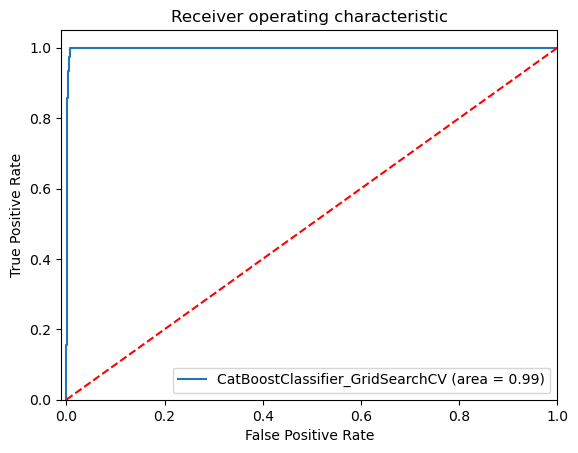

In [37]:
cat_roc_auc = roc_auc_score(y_test, model_grid.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_grid.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='CatBoostClassifier_GridSearchCV (area = %0.2f)' % cat_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()